In [1]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [2]:
#methods(add_genotypes)

In [3]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [4]:
    phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_survival_all_WI_FI_RR.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,false,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02


In [5]:
phenotypes= dropmissing(phenotypes, :FinPenBatch)
phenotypes

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,Bool,String,String?
1,0001,1,1,1B,A,1B_1715,false,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,false,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,false,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,false,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,false,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,false,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,false,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,false,1B_D02,1B_D02


In [6]:
WIDuration_model_equations = "WIDuration = intercept + Batch  + EntryAge + FinPenBatch + SowID"
WIDuration_R=4.71717
WIDuration_model=build_model(WIDuration_model_equations,WIDuration_R);

In [7]:
set_covariate(WIDuration_model,"EntryAge")

1-element Array{Symbol,1}:
 :EntryAge

In [8]:
WIDuration_G1=0.419625
set_random(WIDuration_model,"FinPenBatch",WIDuration_G1)

In [9]:
WIDuration_G2=0.563003
set_random(WIDuration_model,"SowID",WIDuration_G2)

In [10]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 19.285616 seconds (19.27 k allocations: 10.392 GiB, 0.14% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [11]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [12]:
WIDuration_G3=4.76869
@time add_genotypes(WIDuration_model,M,WIDuration_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The marker IDs are set to 1,2,...,#markers
#markers: 435172; #individuals: 3205
 48.116307 seconds (7.96 M allocations: 15.981 GiB, 0.48% gc time)


4.0f0

In [13]:
@time WIDuration_outB=runMCMC(WIDuration_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0005 in the row 4 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0009 in the row 6 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0010 in the row 7 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0011 in the row 8 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0012 in the row 9 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0013 in the row 10 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0014 in the row 11 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0015

running MCMC ...100%|███████████████████████████████████| Time: 4:24:16




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


15909.707408 seconds (90.25 G allocations: 2.019 TiB, 1.87% gc time)


Dict{Any,Any} with 8 entries:
  "ScaleEffectVargeno"           => 1×3 DataFrame…
  "EBV_WIDuration"               => 3205×3 DataFrame…
  "heritability"                 => 1×3 DataFrame…
  "location parameters"          => 935×5 DataFrame…
  "residual variance"            => 1×3 DataFrame…
  "marker effects geno"          => 435172×5 DataFrame. Omitted printing of 1 c…
  "genetic_variance"             => 1×3 DataFrame…
  "marker effects variance geno" => 1×3 DataFrame…

In [14]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,WIDuration
,Int64,Float64
1,1,0.429324
2,2,0.408761
3,3,0.419557
4,4,0.422575
5,5,0.368953
6,6,0.416508
7,7,0.374375
8,8,0.390175
9,9,0.394826


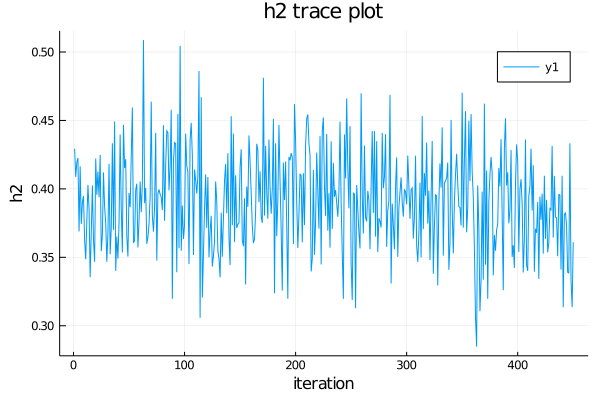

In [15]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [16]:
@time WIDuration_outB,WIDuration_winVarProps = GWAS("MCMC_samples_marker_effects_geno_WIDuration.txt",
    "/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",
    WIDuration_model;header=true,window_size="1 Mb",threshold=0.001)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


running GWAS...100%|████████████████████████████████████| Time: 0:20:41


BoundsError: BoundsError: attempt to access (2395×13 DataFrame
│ Row  │ trait │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │ numSNP │ estimateGenVar │ stdGenVar   │ prGenVar │ WPPA       │ PPA_t     │
│      │ Int64 │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │ Int64  │ Float64        │ Float64     │ Float64  │ Float64    │ Float64   │
├──────┼───────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┼────────┼────────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1    │ 1     │ 1269   │ 9      │ 40000000  │ 41000000  │ 40000657  │ 40992793  │ 249    │ 0.0703804      │ 0.080735    │ 1.55     │ 0.648889   │ 0.648889  │
│ 2    │ 1     │ 294    │ 2      │ 18000000  │ 19000000  │ 18002476  │ 18999678  │ 245    │ 0.0435347      │ 0.0657378   │ 0.97     │ 0.517778   │ 0.583333  │
│ 3    │ 1     │ 970    │ 7      │ 2000000   │ 3000000   │ 2000772   │ 2995872   │ 236    │ 0.0407617      │ 0.0633291   │ 0.9      │ 0.493333   │ 0.553333  │
│ 4    │ 1     │ 2088   │ 16     │ 15000000  │ 16000000  │ 15000858  │ 15995298  │ 98     │ 0.0484606      │ 0.0744776   │ 1.05     │ 0.488889   │ 0.537222  │
│ 5    │ 1     │ 1897   │ 14     │ 107000000 │ 108000000 │ 107000498 │ 107987938 │ 245    │ 0.0230695      │ 0.0372046   │ 0.51     │ 0.46       │ 0.521778  │
│ 6    │ 1     │ 1598   │ 13     │ 17000000  │ 18000000  │ 17002355  │ 17999537  │ 228    │ 0.0514247      │ 0.0854676   │ 1.12     │ 0.422222   │ 0.505185  │
│ 7    │ 1     │ 993    │ 7      │ 25000000  │ 26000000  │ 25001072  │ 25997123  │ 259    │ 0.0312422      │ 0.0582453   │ 0.68     │ 0.386667   │ 0.488254  │
│ 8    │ 1     │ 239    │ 1      │ 238000000 │ 239000000 │ 238002756 │ 238995914 │ 213    │ 0.0235128      │ 0.0458955   │ 0.52     │ 0.371111   │ 0.473611  │
│ 9    │ 1     │ 27     │ 1      │ 26000000  │ 27000000  │ 26001840  │ 26994896  │ 261    │ 0.0138243      │ 0.0279825   │ 0.31     │ 0.368889   │ 0.461975  │
│ 10   │ 1     │ 410    │ 2      │ 134000000 │ 135000000 │ 134002521 │ 134999864 │ 242    │ 0.0166504      │ 0.0324928   │ 0.37     │ 0.364444   │ 0.452222  │
│ 11   │ 1     │ 316    │ 2      │ 40000000  │ 41000000  │ 40001880  │ 40999735  │ 240    │ 0.0165661      │ 0.0362392   │ 0.37     │ 0.348889   │ 0.442828  │
│ 12   │ 1     │ 2092   │ 16     │ 19000000  │ 20000000  │ 19001572  │ 19994835  │ 212    │ 0.012809       │ 0.0264953   │ 0.29     │ 0.344444   │ 0.43463   │
│ 13   │ 1     │ 638    │ 4      │ 77000000  │ 78000000  │ 77003274  │ 77998869  │ 209    │ 0.0167079      │ 0.0334423   │ 0.37     │ 0.328889   │ 0.426496  │
│ 14   │ 1     │ 1237   │ 9      │ 8000000   │ 9000000   │ 8003885   │ 8997965   │ 222    │ 0.0166749      │ 0.0380901   │ 0.36     │ 0.326667   │ 0.419365  │
│ 15   │ 1     │ 425    │ 2      │ 149000000 │ 150000000 │ 149000090 │ 149998604 │ 267    │ 0.0134993      │ 0.0294338   │ 0.3      │ 0.322222   │ 0.412889  │
│ 16   │ 1     │ 1728   │ 13     │ 147000000 │ 148000000 │ 147001436 │ 147996319 │ 219    │ 0.0136382      │ 0.0312522   │ 0.3      │ 0.311111   │ 0.406528  │
│ 17   │ 1     │ 2162   │ 17     │ 9000000   │ 10000000  │ 9126682   │ 9998608   │ 149    │ 0.0167374      │ 0.0353554   │ 0.37     │ 0.308889   │ 0.400784  │
│ 18   │ 1     │ 32     │ 1      │ 31000000  │ 32000000  │ 31001089  │ 31978268  │ 231    │ 0.0136755      │ 0.0320628   │ 0.3      │ 0.297778   │ 0.395062  │
│ 19   │ 1     │ 409    │ 2      │ 133000000 │ 134000000 │ 133036088 │ 133983891 │ 200    │ 0.0129915      │ 0.0308782   │ 0.29     │ 0.295556   │ 0.389825  │
│ 20   │ 1     │ 723    │ 5      │ 31000000  │ 32000000  │ 31000167  │ 31997103  │ 237    │ 0.0124631      │ 0.0271191   │ 0.28     │ 0.295556   │ 0.385111  │
│ 21   │ 1     │ 1231   │ 9      │ 2000000   │ 3000000   │ 2001714   │ 2998476   │ 259    │ 0.0111533      │ 0.0265458   │ 0.24     │ 0.282222   │ 0.380212  │
│ 22   │ 1     │ 2075   │ 16     │ 2000000   │ 3000000   │ 2004411   │ 2999331   │ 208    │ 0.0130678      │ 0.0326726   │ 0.3      │ 0.277778   │ 0.375556  │
│ 23   │ 1     │ 2154   │ 17     │ 1000000   │ 2000000   │ 1005788   │ 1996694   │ 220    │ 0.0143229      │ 0.0348379   │ 0.31     │ 0.273333   │ 0.371111  │
│ 24   │ 1     │ 313    │ 2      │ 37000000  │ 38000000  │ 37000358  │ 37997305  │ 237    │ 0.0133539      │ 0.0348714   │ 0.3      │ 0.268889   │ 0.366852  │
│ 25   │ 1     │ 629    │ 4      │ 68000000  │ 69000000  │ 68004345  │ 68983838  │ 179    │ 0.0140959      │ 0.0331982   │ 0.31     │ 0.264444   │ 0.362756  │
│ 26   │ 1     │ 602    │ 4      │ 41000000  │ 42000000  │ 41003994  │ 41995315  │ 188    │ 0.0125401      │ 0.033683    │ 0.28     │ 0.262222   │ 0.358889  │
│ 27   │ 1     │ 1182   │ 8      │ 92000000  │ 93000000  │ 92003359  │ 92997323  │ 208    │ 0.013594       │ 0.0348368   │ 0.3      │ 0.26       │ 0.355226  │
│ 28   │ 1     │ 1050   │ 7      │ 82000000  │ 83000000  │ 82003699  │ 82934139  │ 179    │ 0.00894006     │ 0.0244725   │ 0.2      │ 0.257778   │ 0.351746  │
│ 29   │ 1     │ 437    │ 3      │ 9000000   │ 10000000  │ 9000187   │ 9994211   │ 232    │ 0.0142272      │ 0.037616    │ 0.31     │ 0.253333   │ 0.348352  │
│ 30   │ 1     │ 730    │ 5      │ 38000000  │ 39000000  │ 38001521  │ 38976922  │ 175    │ 0.0087361      │ 0.0223074   │ 0.19     │ 0.251111   │ 0.345111  │
│ 31   │ 1     │ 530    │ 3      │ 102000000 │ 103000000 │ 102004555 │ 102979052 │ 185    │ 0.00976245     │ 0.0254465   │ 0.22     │ 0.248889   │ 0.342007  │
│ 32   │ 1     │ 426    │ 2      │ 150000000 │ 151000000 │ 150000500 │ 150995892 │ 282    │ 0.00824844     │ 0.0208216   │ 0.18     │ 0.246667   │ 0.339028  │
│ 33   │ 1     │ 1917   │ 14     │ 127000000 │ 128000000 │ 127000716 │ 127998828 │ 215    │ 0.00828702     │ 0.0204977   │ 0.18     │ 0.24       │ 0.336027  │
│ 34   │ 1     │ 473    │ 3      │ 45000000  │ 46000000  │ 45001539  │ 45998479  │ 170    │ 0.011047       │ 0.0287903   │ 0.24     │ 0.235556   │ 0.333072  │
│ 35   │ 1     │ 1898   │ 14     │ 108000000 │ 109000000 │ 108009305 │ 108998978 │ 201    │ 0.0100682      │ 0.0258046   │ 0.23     │ 0.235556   │ 0.330286  │
│ 36   │ 1     │ 841    │ 6      │ 44000000  │ 45000000  │ 44007794  │ 44999321  │ 214    │ 0.0133898      │ 0.034119    │ 0.3      │ 0.233333   │ 0.327593  │
│ 37   │ 1     │ 2164   │ 17     │ 11000000  │ 12000000  │ 11001436  │ 11973027  │ 223    │ 0.00691506     │ 0.0184537   │ 0.15     │ 0.233333   │ 0.325045  │
│ 38   │ 1     │ 1338   │ 9      │ 109000000 │ 110000000 │ 109006614 │ 109998027 │ 216    │ 0.00925103     │ 0.0243486   │ 0.2      │ 0.228889   │ 0.322515  │
│ 39   │ 1     │ 26     │ 1      │ 25000000  │ 26000000  │ 25000643  │ 25998814  │ 277    │ 0.0058565      │ 0.0155221   │ 0.13     │ 0.226667   │ 0.320057  │
│ 40   │ 1     │ 1126   │ 8      │ 36000000  │ 37000000  │ 36003171  │ 36996067  │ 186    │ 0.010685       │ 0.0334679   │ 0.24     │ 0.224444   │ 0.317667  │
│ 41   │ 1     │ 404    │ 2      │ 128000000 │ 129000000 │ 128001588 │ 128999358 │ 277    │ 0.0061848      │ 0.0150165   │ 0.14     │ 0.22       │ 0.315285  │
│ 42   │ 1     │ 396    │ 2      │ 120000000 │ 121000000 │ 120000220 │ 120996518 │ 247    │ 0.00618063     │ 0.0166912   │ 0.14     │ 0.217778   │ 0.312963  │
│ 43   │ 1     │ 22     │ 1      │ 21000000  │ 22000000  │ 21014920  │ 21999344  │ 213    │ 0.00915861     │ 0.0247088   │ 0.21     │ 0.215556   │ 0.310698  │
│ 44   │ 1     │ 1464   │ 11     │ 25000000  │ 26000000  │ 25001041  │ 25993045  │ 195    │ 0.0113243      │ 0.0335941   │ 0.25     │ 0.215556   │ 0.308535  │
│ 45   │ 1     │ 1569   │ 12     │ 50000000  │ 51000000  │ 50001815  │ 50999769  │ 251    │ 0.00769041     │ 0.0229939   │ 0.17     │ 0.215556   │ 0.306469  │
│ 46   │ 1     │ 1592   │ 13     │ 11000000  │ 12000000  │ 11001967  │ 11997551  │ 250    │ 0.00897832     │ 0.0278895   │ 0.2      │ 0.213333   │ 0.304444  │
│ 47   │ 1     │ 33     │ 1      │ 32000000  │ 33000000  │ 32024388  │ 32995417  │ 229    │ 0.00875656     │ 0.0308049   │ 0.19     │ 0.211111   │ 0.302459  │
│ 48   │ 1     │ 298    │ 2      │ 22000000  │ 23000000  │ 22001883  │ 22996590  │ 226    │ 0.00774432     │ 0.0260036   │ 0.17     │ 0.211111   │ 0.300556  │
│ 49   │ 1     │ 684    │ 4      │ 123000000 │ 124000000 │ 123000467 │ 123998271 │ 238    │ 0.00750161     │ 0.0216732   │ 0.17     │ 0.211111   │ 0.29873   │
│ 50   │ 1     │ 1634   │ 13     │ 53000000  │ 54000000  │ 53001612  │ 53994927  │ 305    │ 0.0065308      │ 0.0197938   │ 0.14     │ 0.211111   │ 0.296978  │
│ 51   │ 1     │ 645    │ 4      │ 84000000  │ 85000000  │ 84000643  │ 84993977  │ 229    │ 0.00964768     │ 0.0334391   │ 0.2      │ 0.208889   │ 0.295251  │
│ 52   │ 1     │ 1613   │ 13     │ 32000000  │ 33000000  │ 32010962  │ 32997950  │ 211    │ 0.00652716     │ 0.0193871   │ 0.14     │ 0.208889   │ 0.29359   │
│ 53   │ 1     │ 1727   │ 13     │ 146000000 │ 147000000 │ 146001388 │ 146999624 │ 132    │ 0.00841281     │ 0.0229164   │ 0.19     │ 0.208889   │ 0.291992  │
│ 54   │ 1     │ 752    │ 5      │ 60000000  │ 61000000  │ 60058969  │ 60941677  │ 218    │ 0.0120151      │ 0.0339816   │ 0.26     │ 0.206667   │ 0.290412  │
│ 55   │ 1     │ 639    │ 4      │ 78000000  │ 79000000  │ 78004201  │ 78987036  │ 209    │ 0.00899952     │ 0.0256011   │ 0.2      │ 0.202222   │ 0.288808  │
│ 56   │ 1     │ 840    │ 6      │ 43000000  │ 44000000  │ 43004961  │ 43981578  │ 183    │ 0.0125703      │ 0.0419836   │ 0.27     │ 0.202222   │ 0.287262  │
│ 57   │ 1     │ 1945   │ 15     │ 13000000  │ 14000000  │ 13004351  │ 13990711  │ 225    │ 0.00616195     │ 0.0179484   │ 0.13     │ 0.202222   │ 0.28577   │
│ 58   │ 1     │ 1246   │ 9      │ 17000000  │ 18000000  │ 17003236  │ 17996542  │ 263    │ 0.00486354     │ 0.0128428   │ 0.11     │ 0.197778   │ 0.284253  │
│ 59   │ 1     │ 42     │ 1      │ 41000000  │ 42000000  │ 41001244  │ 41995556  │ 219    │ 0.0112335      │ 0.0309632   │ 0.25     │ 0.195556   │ 0.28275   │
│ 60   │ 1     │ 297    │ 2      │ 21000000  │ 22000000  │ 21006698  │ 21999021  │ 239    │ 0.0080744      │ 0.0242676   │ 0.18     │ 0.195556   │ 0.281296  │
│ 61   │ 1     │ 844    │ 6      │ 47000000  │ 48000000  │ 47001652  │ 47999899  │ 239    │ 0.00657102     │ 0.0180362   │ 0.15     │ 0.195556   │ 0.279891  │
│ 62   │ 1     │ 845    │ 6      │ 48000000  │ 49000000  │ 48004334  │ 48997629  │ 211    │ 0.00803971     │ 0.0243364   │ 0.18     │ 0.195556   │ 0.27853   │
│ 63   │ 1     │ 65     │ 1      │ 64000000  │ 65000000  │ 64000088  │ 64999142  │ 202    │ 0.00517549     │ 0.0163067   │ 0.11     │ 0.193333   │ 0.277178  │
│ 64   │ 1     │ 1099   │ 8      │ 9000000   │ 10000000  │ 9003113   │ 9994305   │ 243    │ 0.00640556     │ 0.0192042   │ 0.14     │ 0.191111   │ 0.275833  │
│ 65   │ 1     │ 1354   │ 9      │ 125000000 │ 126000000 │ 125005311 │ 125993313 │ 241    │ 0.00632118     │ 0.0179234   │ 0.14     │ 0.191111   │ 0.27453   │
│ 66   │ 1     │ 1421   │ 10     │ 52000000  │ 53000000  │ 52005271  │ 52998231  │ 213    │ 0.00458474     │ 0.0121709   │ 0.11     │ 0.191111   │ 0.273266  │
│ 67   │ 1     │ 44     │ 1      │ 43000000  │ 44000000  │ 43001431  │ 43999473  │ 237    │ 0.00876931     │ 0.027875    │ 0.2      │ 0.188889   │ 0.272007  │
│ 68   │ 1     │ 1314   │ 9      │ 85000000  │ 86000000  │ 85007060  │ 85957538  │ 213    │ 0.00586315     │ 0.0162498   │ 0.13     │ 0.188889   │ 0.270784  │
│ 69   │ 1     │ 1729   │ 13     │ 148000000 │ 149000000 │ 148000070 │ 148998193 │ 248    │ 0.00745699     │ 0.0234167   │ 0.16     │ 0.186667   │ 0.269565  │
│ 70   │ 1     │ 28     │ 1      │ 27000000  │ 28000000  │ 27000297  │ 27992242  │ 284    │ 0.00479534     │ 0.0139797   │ 0.11     │ 0.184444   │ 0.268349  │
│ 71   │ 1     │ 1594   │ 13     │ 13000000  │ 14000000  │ 13000934  │ 13999230  │ 233    │ 0.00737259     │ 0.0203881   │ 0.16     │ 0.184444   │ 0.267167  │
│ 72   │ 1     │ 1967   │ 15     │ 35000000  │ 36000000  │ 35000399  │ 35977028  │ 190    │ 0.00753345     │ 0.0232051   │ 0.17     │ 0.184444   │ 0.266019  │
│ 73   │ 1     │ 457    │ 3      │ 29000000  │ 30000000  │ 29000896  │ 29998112  │ 276    │ 0.00705519     │ 0.025411    │ 0.16     │ 0.182222   │ 0.264871  │
│ 74   │ 1     │ 1339   │ 9      │ 110000000 │ 111000000 │ 110000472 │ 110992792 │ 206    │ 0.00763865     │ 0.023163    │ 0.17     │ 0.182222   │ 0.263754  │
│ 75   │ 1     │ 1534   │ 12     │ 15000000  │ 16000000  │ 15004647  │ 15993017  │ 220    │ 0.0059524      │ 0.0167655   │ 0.13     │ 0.182222   │ 0.262667  │
│ 76   │ 1     │ 25     │ 1      │ 24000000  │ 25000000  │ 24001335  │ 24997798  │ 211    │ 0.00627292     │ 0.021106    │ 0.14     │ 0.177778   │ 0.26155   │
│ 77   │ 1     │ 394    │ 2      │ 118000000 │ 119000000 │ 118002281 │ 118999711 │ 219    │ 0.00618683     │ 0.0207856   │ 0.14     │ 0.177778   │ 0.260462  │
│ 78   │ 1     │ 559    │ 3      │ 131000000 │ 132000000 │ 131022107 │ 131996617 │ 240    │ 0.00784211     │ 0.0245039   │ 0.17     │ 0.177778   │ 0.259402  │
│ 79   │ 1     │ 757    │ 5      │ 65000000  │ 66000000  │ 65000007  │ 65997447  │ 302    │ 0.00640229     │ 0.0210153   │ 0.14     │ 0.177778   │ 0.258368  │
│ 80   │ 1     │ 1313   │ 9      │ 84000000  │ 85000000  │ 84001988  │ 84995225  │ 195    │ 0.00602101     │ 0.0176221   │ 0.13     │ 0.177778   │ 0.257361  │
│ 81   │ 1     │ 1416   │ 10     │ 47000000  │ 48000000  │ 47003394  │ 47999509  │ 276    │ 0.00500614     │ 0.0181727   │ 0.11     │ 0.177778   │ 0.256379  │
│ 82   │ 1     │ 1043   │ 7      │ 75000000  │ 76000000  │ 75003441  │ 75997346  │ 130    │ 0.0075061      │ 0.0242662   │ 0.17     │ 0.175556   │ 0.255393  │
│ 83   │ 1     │ 1506   │ 11     │ 67000000  │ 68000000  │ 67001214  │ 67999676  │ 244    │ 0.00431795     │ 0.012499    │ 0.09     │ 0.175556   │ 0.254431  │
│ 84   │ 1     │ 2091   │ 16     │ 18000000  │ 19000000  │ 18001119  │ 18995564  │ 228    │ 0.00593102     │ 0.0168234   │ 0.13     │ 0.175556   │ 0.253492  │
│ 85   │ 1     │ 7      │ 1      │ 6000000   │ 7000000   │ 6011062   │ 6992339   │ 258    │ 0.00517247     │ 0.01658     │ 0.12     │ 0.173333   │ 0.252549  │
│ 86   │ 1     │ 296    │ 2      │ 20000000  │ 21000000  │ 20003474  │ 20998357  │ 221    │ 0.00822098     │ 0.02542     │ 0.18     │ 0.173333   │ 0.251628  │
│ 87   │ 1     │ 1102   │ 8      │ 12000000  │ 13000000  │ 12003401  │ 12815222  │ 215    │ 0.00626494     │ 0.0172226   │ 0.14     │ 0.173333   │ 0.250728  │
│ 88   │ 1     │ 1186   │ 8      │ 96000000  │ 97000000  │ 96001032  │ 96994212  │ 229    │ 0.00620811     │ 0.0192995   │ 0.14     │ 0.173333   │ 0.249848  │
│ 89   │ 1     │ 1213   │ 8      │ 123000000 │ 124000000 │ 123000153 │ 123999102 │ 196    │ 0.00455272     │ 0.0138425   │ 0.1      │ 0.173333   │ 0.248989  │
│ 90   │ 1     │ 1245   │ 9      │ 16000000  │ 17000000  │ 16000738  │ 16998670  │ 272    │ 0.00406637     │ 0.0141936   │ 0.09     │ 0.173333   │ 0.248148  │
│ 91   │ 1     │ 148    │ 1      │ 147000000 │ 148000000 │ 147001436 │ 147997511 │ 211    │ 0.00621541     │ 0.0208865   │ 0.14     │ 0.171111   │ 0.247302  │
│ 92   │ 1     │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │ 188    │ 0.00879851     │ 0.0323388   │ 0.19     │ 0.171111   │ 0.246473  │
│ 93   │ 1     │ 1181   │ 8      │ 91000000  │ 92000000  │ 91002978  │ 91999517  │ 156    │ 0.00823717     │ 0.0308654   │ 0.18     │ 0.171111   │ 0.245663  │
│ 94   │ 1     │ 1224   │ 8      │ 134000000 │ 135000000 │ 134001251 │ 134996704 │ 243    │ 0.00669545     │ 0.0208548   │ 0.15     │ 0.171111   │ 0.24487   │
│ 95   │ 1     │ 1584   │ 13     │ 3000000   │ 4000000   │ 3003702   │ 3996499   │ 240    │ 0.00539845     │ 0.0162396   │ 0.12     │ 0.171111   │ 0.244094  │
│ 96   │ 1     │ 317    │ 2      │ 41000000  │ 42000000  │ 41003027  │ 41994631  │ 255    │ 0.00396742     │ 0.011384    │ 0.09     │ 0.168889   │ 0.24331   │
│ 97   │ 1     │ 1225   │ 8      │ 135000000 │ 136000000 │ 135003045 │ 135995736 │ 283    │ 0.00431274     │ 0.0131388   │ 0.09     │ 0.168889   │ 0.242543  │
│ 98   │ 1     │ 1358   │ 9      │ 129000000 │ 130000000 │ 129012278 │ 129998963 │ 263    │ 0.00437349     │ 0.0135403   │ 0.1      │ 0.168889   │ 0.241791  │
│ 99   │ 1     │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │ 267    │ 0.00450975     │ 0.015123    │ 0.1      │ 0.168889   │ 0.241055  │
│ 100  │ 1     │ 40     │ 1      │ 39000000  │ 40000000  │ 39000584  │ 39991606  │ 233    │ 0.00560982     │ 0.0203806   │ 0.12     │ 0.166667   │ 0.240311  │
│ 101  │ 1     │ 43     │ 1      │ 42000000  │ 43000000  │ 42004485  │ 42997288  │ 199    │ 0.00554215     │ 0.0167506   │ 0.12     │ 0.166667   │ 0.239582  │
│ 102  │ 1     │ 119    │ 1      │ 118000000 │ 119000000 │ 118001042 │ 118999237 │ 107    │ 0.00857489     │ 0.0281977   │ 0.19     │ 0.166667   │ 0.238867  │
│ 103  │ 1     │ 1085   │ 7      │ 117000000 │ 118000000 │ 117000432 │ 117999329 │ 215    │ 0.00561653     │ 0.0173504   │ 0.12     │ 0.166667   │ 0.238166  │
│ 104  │ 1     │ 1377   │ 10     │ 8000000   │ 9000000   │ 8000238   │ 8999313   │ 272    │ 0.00582862     │ 0.0180822   │ 0.13     │ 0.166667   │ 0.237479  │
│ 105  │ 1     │ 6      │ 1      │ 5000000   │ 6000000   │ 5000927   │ 5994381   │ 214    │ 0.00468233     │ 0.0139972   │ 0.1      │ 0.164444   │ 0.236783  │
│ 106  │ 1     │ 41     │ 1      │ 40000000  │ 41000000  │ 40017009  │ 40997806  │ 224    │ 0.00550035     │ 0.0202526   │ 0.12     │ 0.164444   │ 0.236101  │
│ 107  │ 1     │ 106    │ 1      │ 105000000 │ 106000000 │ 105000079 │ 105997010 │ 136    │ 0.00726729     │ 0.025411    │ 0.16     │ 0.164444   │ 0.235431  │
│ 108  │ 1     │ 118    │ 1      │ 117000000 │ 118000000 │ 117001841 │ 117988311 │ 182    │ 0.0054167      │ 0.0167061   │ 0.12     │ 0.164444   │ 0.234774  │
│ 109  │ 1     │ 521    │ 3      │ 93000000  │ 94000000  │ 93007283  │ 93998657  │ 190    │ 0.00697333     │ 0.0224215   │ 0.15     │ 0.164444   │ 0.234128  │
│ 110  │ 1     │ 531    │ 3      │ 103000000 │ 104000000 │ 103039803 │ 103998487 │ 251    │ 0.00476076     │ 0.0151348   │ 0.11     │ 0.164444   │ 0.233495  │
│ 111  │ 1     │ 673    │ 4      │ 112000000 │ 113000000 │ 112003198 │ 112997098 │ 256    │ 0.00449654     │ 0.0152985   │ 0.1      │ 0.164444   │ 0.232873  │
│ 112  │ 1     │ 749    │ 5      │ 57000000  │ 58000000  │ 57001023  │ 57999432  │ 219    │ 0.0050379      │ 0.0173459   │ 0.11     │ 0.164444   │ 0.232262  │
│ 113  │ 1     │ 818    │ 6      │ 21000000  │ 22000000  │ 21110339  │ 21999671  │ 253    │ 0.00484801     │ 0.0176217   │ 0.11     │ 0.164444   │ 0.231662  │
│ 114  │ 1     │ 874    │ 6      │ 77000000  │ 78000000  │ 77003280  │ 77994120  │ 215    │ 0.00519067     │ 0.0178519   │ 0.12     │ 0.164444   │ 0.231072  │
│ 115  │ 1     │ 1232   │ 9      │ 3000000   │ 4000000   │ 3005863   │ 3800634   │ 131    │ 0.00687255     │ 0.0215463   │ 0.15     │ 0.164444   │ 0.230493  │
│ 116  │ 1     │ 1277   │ 9      │ 48000000  │ 49000000  │ 48010280  │ 48990007  │ 200    │ 0.00610676     │ 0.0216313   │ 0.14     │ 0.164444   │ 0.229923  │
│ 117  │ 1     │ 1450   │ 11     │ 11000000  │ 12000000  │ 11001723  │ 11992693  │ 215    │ 0.00543324     │ 0.0180654   │ 0.12     │ 0.164444   │ 0.229364  │
│ 118  │ 1     │ 1732   │ 13     │ 151000000 │ 152000000 │ 151030326 │ 151999588 │ 232    │ 0.00473464     │ 0.0143752   │ 0.11     │ 0.164444   │ 0.228814  │
│ 119  │ 1     │ 2054   │ 15     │ 122000000 │ 123000000 │ 122000140 │ 122998178 │ 276    │ 0.00357443     │ 0.00998694  │ 0.08     │ 0.164444   │ 0.228273  │
│ 120  │ 1     │ 1335   │ 9      │ 106000000 │ 107000000 │ 106003716 │ 106934964 │ 200    │ 0.00755647     │ 0.0272715   │ 0.16     │ 0.162222   │ 0.227722  │
│ 121  │ 1     │ 2250   │ 18     │ 33000000  │ 34000000  │ 33002655  │ 33998685  │ 211    │ 0.00533232     │ 0.0180295   │ 0.12     │ 0.162222   │ 0.227181  │
│ 122  │ 1     │ 656    │ 4      │ 95000000  │ 96000000  │ 95000494  │ 95997593  │ 212    │ 0.00431616     │ 0.0138945   │ 0.1      │ 0.16       │ 0.22663   │
│ 123  │ 1     │ 972    │ 7      │ 4000000   │ 5000000   │ 4002464   │ 4999309   │ 209    │ 0.00577399     │ 0.0208802   │ 0.13     │ 0.16       │ 0.226089  │
│ 124  │ 1     │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │ 267    │ 0.0032574      │ 0.00981269  │ 0.07     │ 0.16       │ 0.225556  │
│ 125  │ 1     │ 2219   │ 18     │ 2000000   │ 3000000   │ 2004529   │ 2994394   │ 257    │ 0.00383956     │ 0.0118124   │ 0.09     │ 0.16       │ 0.225031  │
│ 126  │ 1     │ 9      │ 1      │ 8000000   │ 9000000   │ 8006283   │ 8996136   │ 276    │ 0.00400795     │ 0.0117959   │ 0.09     │ 0.157778   │ 0.224497  │
│ 127  │ 1     │ 668    │ 4      │ 107000000 │ 108000000 │ 107002287 │ 107996143 │ 179    │ 0.007249       │ 0.0256656   │ 0.15     │ 0.157778   │ 0.223972  │
│ 128  │ 1     │ 1362   │ 9      │ 133000000 │ 134000000 │ 133003177 │ 133999287 │ 222    │ 0.00406001     │ 0.0126707   │ 0.09     │ 0.157778   │ 0.223455  │
│ 129  │ 1     │ 1378   │ 10     │ 9000000   │ 10000000  │ 9003124   │ 9998051   │ 290    │ 0.0033502      │ 0.00977587  │ 0.07     │ 0.157778   │ 0.222946  │
│ 130  │ 1     │ 1593   │ 13     │ 12000000  │ 13000000  │ 12002261  │ 12991793  │ 252    │ 0.00437887     │ 0.0145285   │ 0.1      │ 0.157778   │ 0.222444  │
│ 131  │ 1     │ 1626   │ 13     │ 45000000  │ 46000000  │ 45001580  │ 45997291  │ 247    │ 0.00538587     │ 0.0191449   │ 0.12     │ 0.157778   │ 0.221951  │
│ 132  │ 1     │ 859    │ 6      │ 62000000  │ 63000000  │ 62017962  │ 62993091  │ 149    │ 0.00549523     │ 0.0174013   │ 0.12     │ 0.155556   │ 0.221448  │
│ 133  │ 1     │ 1392   │ 10     │ 23000000  │ 24000000  │ 23000257  │ 23998429  │ 196    │ 0.00523253     │ 0.016516    │ 0.11     │ 0.155556   │ 0.220952  │
│ 134  │ 1     │ 1533   │ 12     │ 14000000  │ 15000000  │ 14004791  │ 14999460  │ 153    │ 0.00525743     │ 0.0159085   │ 0.11     │ 0.155556   │ 0.220464  │
│ 135  │ 1     │ 15     │ 1      │ 14000000  │ 15000000  │ 14002294  │ 14993669  │ 263    │ 0.00306002     │ 0.0102698   │ 0.07     │ 0.153333   │ 0.219967  │
│ 136  │ 1     │ 18     │ 1      │ 17000000  │ 18000000  │ 17007778  │ 17999476  │ 199    │ 0.00571521     │ 0.0186299   │ 0.13     │ 0.153333   │ 0.219477  │
│ 137  │ 1     │ 479    │ 3      │ 51000000  │ 52000000  │ 51005536  │ 51998776  │ 194    │ 0.00676282     │ 0.0239962   │ 0.15     │ 0.153333   │ 0.218994  │
│ 138  │ 1     │ 822    │ 6      │ 25000000  │ 26000000  │ 25001451  │ 25998715  │ 241    │ 0.00412128     │ 0.0133149   │ 0.09     │ 0.153333   │ 0.218519  │
│ 139  │ 1     │ 861    │ 6      │ 64000000  │ 65000000  │ 64009586  │ 64999828  │ 187    │ 0.00476326     │ 0.0189558   │ 0.11     │ 0.153333   │ 0.21805   │
│ 140  │ 1     │ 1253   │ 9      │ 24000000  │ 25000000  │ 24004093  │ 24994001  │ 284    │ 0.0037058      │ 0.0124549   │ 0.08     │ 0.153333   │ 0.217587  │
│ 141  │ 1     │ 1264   │ 9      │ 35000000  │ 36000000  │ 35004365  │ 35999719  │ 179    │ 0.00395033     │ 0.0134507   │ 0.09     │ 0.153333   │ 0.217132  │
│ 142  │ 1     │ 1385   │ 10     │ 16000000  │ 17000000  │ 16005966  │ 16998009  │ 221    │ 0.00433966     │ 0.0148684   │ 0.09     │ 0.153333   │ 0.216682  │
│ 143  │ 1     │ 301    │ 2      │ 25000000  │ 26000000  │ 25001178  │ 25999526  │ 306    │ 0.0032189      │ 0.0105611   │ 0.07     │ 0.151111   │ 0.216224  │
│ 144  │ 1     │ 565    │ 4      │ 4000000   │ 5000000   │ 4004185   │ 4993072   │ 291    │ 0.00416716     │ 0.0140545   │ 0.09     │ 0.151111   │ 0.215772  │
│ 145  │ 1     │ 821    │ 6      │ 24000000  │ 25000000  │ 24125483  │ 24998378  │ 193    │ 0.00309671     │ 0.00882492  │ 0.07     │ 0.151111   │ 0.215326  │
│ 146  │ 1     │ 873    │ 6      │ 76000000  │ 77000000  │ 76010373  │ 76996113  │ 269    │ 0.00380356     │ 0.0124033   │ 0.09     │ 0.151111   │ 0.214886  │
│ 147  │ 1     │ 1821   │ 14     │ 31000000  │ 32000000  │ 31001096  │ 31997905  │ 191    │ 0.00346412     │ 0.0124557   │ 0.08     │ 0.151111   │ 0.214452  │
│ 148  │ 1     │ 408    │ 2      │ 132000000 │ 133000000 │ 132004620 │ 132982619 │ 246    │ 0.00375685     │ 0.0112765   │ 0.09     │ 0.148889   │ 0.214009  │
│ 149  │ 1     │ 431    │ 3      │ 3000000   │ 4000000   │ 3001527   │ 3996633   │ 238    │ 0.00474651     │ 0.0158664   │ 0.1      │ 0.148889   │ 0.213572  │
│ 150  │ 1     │ 540    │ 3      │ 112000000 │ 113000000 │ 112000154 │ 112997652 │ 235    │ 0.00348136     │ 0.0114207   │ 0.08     │ 0.148889   │ 0.213141  │
│ 151  │ 1     │ 704    │ 5      │ 12000000  │ 13000000  │ 12001289  │ 12999067  │ 256    │ 0.00403507     │ 0.0135632   │ 0.09     │ 0.148889   │ 0.212715  │
│ 152  │ 1     │ 932    │ 6      │ 135000000 │ 136000000 │ 135001414 │ 135998609 │ 238    │ 0.00517361     │ 0.0179875   │ 0.11     │ 0.148889   │ 0.212295  │
│ 153  │ 1     │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │ 304    │ 0.00384592     │ 0.013111    │ 0.09     │ 0.148889   │ 0.211881  │
│ 154  │ 1     │ 1389   │ 10     │ 20000000  │ 21000000  │ 20001357  │ 20992572  │ 206    │ 0.0048456      │ 0.0152762   │ 0.11     │ 0.148889   │ 0.211472  │
│ 155  │ 1     │ 1615   │ 13     │ 34000000  │ 35000000  │ 34004251  │ 34999535  │ 208    │ 0.00498612     │ 0.0194336   │ 0.11     │ 0.148889   │ 0.211068  │
│ 156  │ 1     │ 1776   │ 13     │ 195000000 │ 196000000 │ 195010145 │ 195968225 │ 140    │ 0.00785716     │ 0.0254252   │ 0.17     │ 0.148889   │ 0.21067   │
│ 157  │ 1     │ 549    │ 3      │ 121000000 │ 122000000 │ 121001446 │ 121999120 │ 265    │ 0.00295895     │ 0.00827999  │ 0.07     │ 0.146667   │ 0.210262  │
│ 158  │ 1     │ 571    │ 4      │ 10000000  │ 11000000  │ 10001816  │ 10995063  │ 233    │ 0.00291754     │ 0.00998385  │ 0.06     │ 0.146667   │ 0.209859  │
│ 159  │ 1     │ 1337   │ 9      │ 108000000 │ 109000000 │ 108000430 │ 108997767 │ 174    │ 0.00502248     │ 0.0180587   │ 0.11     │ 0.146667   │ 0.209462  │
│ 160  │ 1     │ 2161   │ 17     │ 8000000   │ 9000000   │ 8000855   │ 8849774   │ 144    │ 0.00517482     │ 0.0183459   │ 0.12     │ 0.146667   │ 0.209069  │
│ 161  │ 1     │ 255    │ 1      │ 254000000 │ 255000000 │ 254005981 │ 254998655 │ 257    │ 0.00446865     │ 0.0146716   │ 0.1      │ 0.144444   │ 0.208668  │
│ 162  │ 1     │ 299    │ 2      │ 23000000  │ 24000000  │ 23006617  │ 23997297  │ 243    │ 0.00467582     │ 0.0166571   │ 0.1      │ 0.144444   │ 0.208272  │
│ 163  │ 1     │ 650    │ 4      │ 89000000  │ 90000000  │ 89088205  │ 89998284  │ 214    │ 0.00443424     │ 0.015597    │ 0.1      │ 0.144444   │ 0.20788   │
│ 164  │ 1     │ 715    │ 5      │ 23000000  │ 24000000  │ 23038302  │ 23997180  │ 204    │ 0.0035912      │ 0.0111355   │ 0.08     │ 0.144444   │ 0.207493  │
│ 165  │ 1     │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │ 213    │ 0.00285442     │ 0.00945585  │ 0.06     │ 0.144444   │ 0.207111  │
│ 166  │ 1     │ 839    │ 6      │ 42000000  │ 43000000  │ 42002178  │ 42998265  │ 261    │ 0.00311216     │ 0.0116547   │ 0.07     │ 0.144444   │ 0.206734  │
│ 167  │ 1     │ 1420   │ 10     │ 51000000  │ 52000000  │ 51000236  │ 51999323  │ 248    │ 0.00462454     │ 0.0157016   │ 0.1      │ 0.144444   │ 0.206361  │
│ 168  │ 1     │ 1612   │ 13     │ 31000000  │ 32000000  │ 31012378  │ 31995446  │ 223    │ 0.00482482     │ 0.01789     │ 0.11     │ 0.144444   │ 0.205992  │
│ 169  │ 1     │ 1976   │ 15     │ 44000000  │ 45000000  │ 44006149  │ 44989602  │ 208    │ 0.00533921     │ 0.0190013   │ 0.12     │ 0.144444   │ 0.205628  │
│ 170  │ 1     │ 311    │ 2      │ 35000000  │ 36000000  │ 35001883  │ 35999450  │ 221    │ 0.00362889     │ 0.0134316   │ 0.08     │ 0.142222   │ 0.205255  │
│ 171  │ 1     │ 395    │ 2      │ 119000000 │ 120000000 │ 119002930 │ 119998454 │ 230    │ 0.00371026     │ 0.0122436   │ 0.08     │ 0.142222   │ 0.204886  │
│ 172  │ 1     │ 572    │ 4      │ 11000000  │ 12000000  │ 11001885  │ 11998453  │ 255    │ 0.00296353     │ 0.00959315  │ 0.07     │ 0.142222   │ 0.204522  │
│ 173  │ 1     │ 1273   │ 9      │ 44000000  │ 45000000  │ 44002488  │ 44960898  │ 186    │ 0.00547668     │ 0.0185512   │ 0.12     │ 0.142222   │ 0.204162  │
│ 174  │ 1     │ 1341   │ 9      │ 112000000 │ 113000000 │ 112005473 │ 112997608 │ 174    │ 0.00512193     │ 0.022842    │ 0.11     │ 0.142222   │ 0.203806  │
│ 175  │ 1     │ 2149   │ 16     │ 76000000  │ 77000000  │ 76010354  │ 76996245  │ 231    │ 0.00356398     │ 0.0122531   │ 0.08     │ 0.142222   │ 0.203454  │
│ 176  │ 1     │ 287    │ 2      │ 11000000  │ 12000000  │ 11003302  │ 11996496  │ 218    │ 0.00488766     │ 0.0183099   │ 0.11     │ 0.14       │ 0.203093  │
│ 177  │ 1     │ 308    │ 2      │ 32000000  │ 33000000  │ 32013622  │ 32991971  │ 185    │ 0.00557514     │ 0.0220743   │ 0.13     │ 0.14       │ 0.202737  │
│ 178  │ 1     │ 758    │ 5      │ 66000000  │ 67000000  │ 66000830  │ 66997593  │ 244    │ 0.00626264     │ 0.0243342   │ 0.14     │ 0.14       │ 0.202385  │
│ 179  │ 1     │ 843    │ 6      │ 46000000  │ 47000000  │ 46001718  │ 46999974  │ 204    │ 0.00369629     │ 0.012513    │ 0.08     │ 0.14       │ 0.202036  │
│ 180  │ 1     │ 1251   │ 9      │ 22000000  │ 23000000  │ 22001833  │ 22996082  │ 269    │ 0.00426496     │ 0.0162993   │ 0.09     │ 0.14       │ 0.201691  │
│ 181  │ 1     │ 1299   │ 9      │ 70000000  │ 71000000  │ 70004754  │ 70999233  │ 220    │ 0.00379596     │ 0.0119231   │ 0.08     │ 0.14       │ 0.201351  │
│ 182  │ 1     │ 1460   │ 11     │ 21000000  │ 22000000  │ 21002337  │ 21995476  │ 199    │ 0.00353546     │ 0.0143797   │ 0.08     │ 0.14       │ 0.201013  │
│ 183  │ 1     │ 2169   │ 17     │ 16000000  │ 17000000  │ 16019048  │ 16997180  │ 209    │ 0.00374757     │ 0.0133833   │ 0.09     │ 0.14       │ 0.20068   │
│ 184  │ 1     │ 34     │ 1      │ 33000000  │ 34000000  │ 33002217  │ 33999771  │ 284    │ 0.00250855     │ 0.00770271  │ 0.05     │ 0.137778   │ 0.200338  │
│ 185  │ 1     │ 241    │ 1      │ 240000000 │ 241000000 │ 240002385 │ 240997339 │ 209    │ 0.0047934      │ 0.0182573   │ 0.1      │ 0.137778   │ 0.2       │
│ 186  │ 1     │ 453    │ 3      │ 25000000  │ 26000000  │ 25001822  │ 25998487  │ 264    │ 0.0030292      │ 0.00963018  │ 0.07     │ 0.137778   │ 0.199665  │
│ 187  │ 1     │ 875    │ 6      │ 78000000  │ 79000000  │ 78000385  │ 78999521  │ 271    │ 0.00267094     │ 0.00801072  │ 0.06     │ 0.137778   │ 0.199335  │
│ 188  │ 1     │ 877    │ 6      │ 80000000  │ 81000000  │ 80013070  │ 80998399  │ 254    │ 0.00468499     │ 0.0166681   │ 0.1      │ 0.137778   │ 0.199007  │
│ 189  │ 1     │ 1167   │ 8      │ 77000000  │ 78000000  │ 77002839  │ 77998224  │ 213    │ 0.00318916     │ 0.0104508   │ 0.07     │ 0.137778   │ 0.198683  │
│ 190  │ 1     │ 1921   │ 14     │ 131000000 │ 132000000 │ 131002943 │ 131998574 │ 255    │ 0.00445972     │ 0.0159374   │ 0.1      │ 0.137778   │ 0.198363  │
│ 191  │ 1     │ 53     │ 1      │ 52000000  │ 53000000  │ 52000507  │ 52988384  │ 276    │ 0.00321851     │ 0.0110718   │ 0.07     │ 0.135556   │ 0.198034  │
│ 192  │ 1     │ 617    │ 4      │ 56000000  │ 57000000  │ 56004966  │ 56995249  │ 232    │ 0.00393315     │ 0.0126288   │ 0.09     │ 0.135556   │ 0.197708  │
│ 193  │ 1     │ 728    │ 5      │ 36000000  │ 37000000  │ 36007222  │ 36998077  │ 132    │ 0.0054715      │ 0.0220405   │ 0.12     │ 0.135556   │ 0.197386  │
│ 194  │ 1     │ 794    │ 5      │ 102000000 │ 103000000 │ 102003878 │ 102990446 │ 264    │ 0.00346931     │ 0.0143816   │ 0.08     │ 0.135556   │ 0.197068  │
│ 195  │ 1     │ 1505   │ 11     │ 66000000  │ 67000000  │ 66001158  │ 66995856  │ 254    │ 0.00311041     │ 0.0106876   │ 0.07     │ 0.135556   │ 0.196752  │
│ 196  │ 1     │ 1677   │ 13     │ 96000000  │ 97000000  │ 96003121  │ 96996214  │ 171    │ 0.00387002     │ 0.0136786   │ 0.09     │ 0.135556   │ 0.19644   │
│ 197  │ 1     │ 1734   │ 13     │ 153000000 │ 154000000 │ 153004508 │ 153999763 │ 184    │ 0.00520036     │ 0.0213889   │ 0.12     │ 0.135556   │ 0.196131  │
│ 198  │ 1     │ 1962   │ 15     │ 30000000  │ 31000000  │ 30001490  │ 30982083  │ 235    │ 0.00252491     │ 0.00870091  │ 0.05     │ 0.135556   │ 0.195825  │
│ 199  │ 1     │ 2069   │ 15     │ 137000000 │ 138000000 │ 137002628 │ 137995913 │ 216    │ 0.0030843      │ 0.0115238   │ 0.07     │ 0.135556   │ 0.195522  │
│ 200  │ 1     │ 2094   │ 16     │ 21000000  │ 22000000  │ 21001291  │ 21999443  │ 252    │ 0.00273634     │ 0.00878301  │ 0.06     │ 0.135556   │ 0.195222  │
│ 201  │ 1     │ 52     │ 1      │ 51000000  │ 52000000  │ 51001474  │ 51998674  │ 247    │ 0.00364498     │ 0.0161876   │ 0.08     │ 0.133333   │ 0.194914  │
│ 202  │ 1     │ 64     │ 1      │ 63000000  │ 64000000  │ 63000926  │ 63992807  │ 183    │ 0.0052923      │ 0.0234246   │ 0.12     │ 0.133333   │ 0.194609  │
│ 203  │ 1     │ 160    │ 1      │ 159000000 │ 160000000 │ 159002671 │ 159997351 │ 179    │ 0.00449922     │ 0.0171906   │ 0.1      │ 0.133333   │ 0.194308  │
│ 204  │ 1     │ 247    │ 1      │ 246000000 │ 247000000 │ 246003470 │ 246997834 │ 165    │ 0.00370907     │ 0.0130541   │ 0.09     │ 0.133333   │ 0.194009  │
│ 205  │ 1     │ 318    │ 2      │ 42000000  │ 43000000  │ 42000823  │ 42983351  │ 156    │ 0.00470834     │ 0.0166793   │ 0.11     │ 0.133333   │ 0.193713  │
│ 206  │ 1     │ 324    │ 2      │ 48000000  │ 49000000  │ 48003485  │ 48986881  │ 215    │ 0.00375323     │ 0.0147888   │ 0.08     │ 0.133333   │ 0.19342   │
│ 207  │ 1     │ 474    │ 3      │ 46000000  │ 47000000  │ 46003398  │ 46999803  │ 201    │ 0.00378686     │ 0.0146985   │ 0.09     │ 0.133333   │ 0.193129  │
│ 208  │ 1     │ 566    │ 4      │ 5000000   │ 6000000   │ 5000886   │ 5998661   │ 290    │ 0.00346317     │ 0.0116292   │ 0.08     │ 0.133333   │ 0.192842  │
│ 209  │ 1     │ 628    │ 4      │ 67000000  │ 68000000  │ 67064117  │ 67994797  │ 208    │ 0.00431575     │ 0.0158809   │ 0.1      │ 0.133333   │ 0.192557  │
│ 210  │ 1     │ 664    │ 4      │ 103000000 │ 104000000 │ 103001016 │ 103995836 │ 266    │ 0.00275048     │ 0.00873667  │ 0.06     │ 0.133333   │ 0.192275  │
│ 211  │ 1     │ 705    │ 5      │ 13000000  │ 14000000  │ 13002115  │ 13995572  │ 211    │ 0.0035029      │ 0.0114393   │ 0.08     │ 0.133333   │ 0.191996  │
│ 212  │ 1     │ 1105   │ 8      │ 15000000  │ 16000000  │ 15001504  │ 15998941  │ 274    │ 0.00381707     │ 0.0136996   │ 0.09     │ 0.133333   │ 0.191719  │
│ 213  │ 1     │ 1950   │ 15     │ 18000000  │ 19000000  │ 18007956  │ 18996465  │ 190    │ 0.00324096     │ 0.0109388   │ 0.07     │ 0.133333   │ 0.191445  │
│ 214  │ 1     │ 2089   │ 16     │ 16000000  │ 17000000  │ 16002411  │ 16997675  │ 183    │ 0.00458634     │ 0.0168494   │ 0.1      │ 0.133333   │ 0.191173  │
│ 215  │ 1     │ 2119   │ 16     │ 46000000  │ 47000000  │ 46005600  │ 46999109  │ 179    │ 0.00295242     │ 0.00958408  │ 0.07     │ 0.133333   │ 0.190904  │
│ 216  │ 1     │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │ 228    │ 0.00333997     │ 0.0108292   │ 0.07     │ 0.131111   │ 0.190628  │
│ 217  │ 1     │ 608    │ 4      │ 47000000  │ 48000000  │ 47001481  │ 47997790  │ 135    │ 0.00451384     │ 0.0153792   │ 0.1      │ 0.131111   │ 0.190353  │
│ 218  │ 1     │ 799    │ 6      │ 2000000   │ 3000000   │ 2002563   │ 2999538   │ 247    │ 0.00404852     │ 0.015455    │ 0.09     │ 0.131111   │ 0.190082  │
│ 219  │ 1     │ 813    │ 6      │ 16000000  │ 17000000  │ 16022825  │ 16998279  │ 244    │ 0.00340582     │ 0.0124721   │ 0.07     │ 0.131111   │ 0.189812  │
│ 220  │ 1     │ 857    │ 6      │ 60000000  │ 61000000  │ 60018305  │ 60998166  │ 218    │ 0.0032064      │ 0.0113636   │ 0.07     │ 0.131111   │ 0.189545  │
│ 221  │ 1     │ 1049   │ 7      │ 81000000  │ 82000000  │ 81017824  │ 81999432  │ 208    │ 0.00364442     │ 0.0140441   │ 0.08     │ 0.131111   │ 0.189281  │
│ 222  │ 1     │ 1236   │ 9      │ 7000000   │ 8000000   │ 7001898   │ 7997565   │ 216    │ 0.003327       │ 0.0111153   │ 0.07     │ 0.131111   │ 0.189019  │
│ 223  │ 1     │ 1272   │ 9      │ 43000000  │ 44000000  │ 43005954  │ 43998414  │ 226    │ 0.00266377     │ 0.00947325  │ 0.06     │ 0.131111   │ 0.188759  │
│ 224  │ 1     │ 1965   │ 15     │ 33000000  │ 34000000  │ 33009952  │ 33997827  │ 209    │ 0.0037009      │ 0.013225    │ 0.08     │ 0.131111   │ 0.188502  │
│ 225  │ 1     │ 124    │ 1      │ 123000000 │ 124000000 │ 123011728 │ 123995795 │ 196    │ 0.004616       │ 0.0166023   │ 0.1      │ 0.128889   │ 0.188237  │
│ 226  │ 1     │ 285    │ 2      │ 9000000   │ 10000000  │ 9003683   │ 9990081   │ 249    │ 0.00357625     │ 0.0178363   │ 0.08     │ 0.128889   │ 0.187974  │
│ 227  │ 1     │ 436    │ 3      │ 8000000   │ 9000000   │ 8076384   │ 8996583   │ 158    │ 0.00544746     │ 0.0206044   │ 0.12     │ 0.128889   │ 0.187714  │
│ 228  │ 1     │ 630    │ 4      │ 69000000  │ 70000000  │ 69006884  │ 69991162  │ 169    │ 0.00362322     │ 0.0138171   │ 0.08     │ 0.128889   │ 0.187456  │
│ 229  │ 1     │ 688    │ 4      │ 127000000 │ 128000000 │ 127002826 │ 127993436 │ 219    │ 0.0026961      │ 0.00983579  │ 0.06     │ 0.128889   │ 0.1872    │
│ 230  │ 1     │ 690    │ 4      │ 129000000 │ 130000000 │ 129000232 │ 129997909 │ 271    │ 0.00276343     │ 0.00954634  │ 0.06     │ 0.128889   │ 0.186947  │
│ 231  │ 1     │ 716    │ 5      │ 24000000  │ 25000000  │ 24000573  │ 24993832  │ 185    │ 0.00297796     │ 0.00995865  │ 0.07     │ 0.128889   │ 0.186696  │
│ 232  │ 1     │ 1384   │ 10     │ 15000000  │ 16000000  │ 15000580  │ 15999931  │ 251    │ 0.00441259     │ 0.0175582   │ 0.1      │ 0.128889   │ 0.186446  │
│ 233  │ 1     │ 1766   │ 13     │ 185000000 │ 186000000 │ 185009989 │ 185996326 │ 177    │ 0.00394222     │ 0.0230154   │ 0.08     │ 0.128889   │ 0.186199  │
│ 234  │ 1     │ 1964   │ 15     │ 32000000  │ 33000000  │ 32005861  │ 32980733  │ 121    │ 0.0050819      │ 0.0189915   │ 0.11     │ 0.128889   │ 0.185954  │
│ 235  │ 1     │ 2163   │ 17     │ 10000000  │ 11000000  │ 10004193  │ 10995434  │ 270    │ 0.0026205      │ 0.00799935  │ 0.06     │ 0.128889   │ 0.185712  │
│ 236  │ 1     │ 107    │ 1      │ 106000000 │ 107000000 │ 106000150 │ 106996346 │ 177    │ 0.00450275     │ 0.0156614   │ 0.1      │ 0.126667   │ 0.185461  │
│ 237  │ 1     │ 203    │ 1      │ 202000000 │ 203000000 │ 202008590 │ 202985244 │ 149    │ 0.00645646     │ 0.0256188   │ 0.14     │ 0.126667   │ 0.185213  │
│ 238  │ 1     │ 581    │ 4      │ 20000000  │ 21000000  │ 20000716  │ 20998807  │ 261    │ 0.00323313     │ 0.0112663   │ 0.07     │ 0.126667   │ 0.184967  │
│ 239  │ 1     │ 601    │ 4      │ 40000000  │ 41000000  │ 40000761  │ 40998021  │ 269    │ 0.00460501     │ 0.0171659   │ 0.1      │ 0.126667   │ 0.184723  │
│ 240  │ 1     │ 616    │ 4      │ 55000000  │ 56000000  │ 55002341  │ 55999499  │ 204    │ 0.00342208     │ 0.0136868   │ 0.08     │ 0.126667   │ 0.184481  │
│ 241  │ 1     │ 686    │ 4      │ 125000000 │ 126000000 │ 125001553 │ 125997761 │ 278    │ 0.00375182     │ 0.0137796   │ 0.09     │ 0.126667   │ 0.184242  │
│ 242  │ 1     │ 842    │ 6      │ 45000000  │ 46000000  │ 45003290  │ 45999881  │ 219    │ 0.00359474     │ 0.0124679   │ 0.08     │ 0.126667   │ 0.184004  │
│ 243  │ 1     │ 863    │ 6      │ 66000000  │ 67000000  │ 66003236  │ 66987107  │ 243    │ 0.00293903     │ 0.0098728   │ 0.07     │ 0.126667   │ 0.183768  │
│ 244  │ 1     │ 868    │ 6      │ 71000000  │ 72000000  │ 71001289  │ 71993130  │ 283    │ 0.00258892     │ 0.00969106  │ 0.06     │ 0.126667   │ 0.183534  │
│ 245  │ 1     │ 1000   │ 7      │ 32000000  │ 33000000  │ 32001514  │ 32998973  │ 252    │ 0.0031409      │ 0.0120554   │ 0.07     │ 0.126667   │ 0.183302  │
│ 246  │ 1     │ 1079   │ 7      │ 111000000 │ 112000000 │ 111007443 │ 111999958 │ 235    │ 0.00305781     │ 0.0113129   │ 0.07     │ 0.126667   │ 0.183071  │
│ 247  │ 1     │ 1081   │ 7      │ 113000000 │ 114000000 │ 113002015 │ 113999709 │ 226    │ 0.00344632     │ 0.0123018   │ 0.08     │ 0.126667   │ 0.182843  │
│ 248  │ 1     │ 1100   │ 8      │ 10000000  │ 11000000  │ 10001638  │ 10996186  │ 227    │ 0.0035102      │ 0.0123323   │ 0.08     │ 0.126667   │ 0.182616  │
│ 249  │ 1     │ 1110   │ 8      │ 20000000  │ 21000000  │ 20000311  │ 20992605  │ 247    │ 0.00295365     │ 0.0101735   │ 0.06     │ 0.126667   │ 0.182392  │
│ 250  │ 1     │ 1315   │ 9      │ 86000000  │ 87000000  │ 86011098  │ 86994798  │ 232    │ 0.00444446     │ 0.0187967   │ 0.1      │ 0.126667   │ 0.182169  │
│ 251  │ 1     │ 1735   │ 13     │ 154000000 │ 155000000 │ 154012540 │ 154989249 │ 162    │ 0.00277063     │ 0.00979024  │ 0.06     │ 0.126667   │ 0.181948  │
│ 252  │ 1     │ 1875   │ 14     │ 85000000  │ 86000000  │ 85002338  │ 85998405  │ 230    │ 0.00306232     │ 0.0113959   │ 0.07     │ 0.126667   │ 0.181728  │
│ 253  │ 1     │ 1915   │ 14     │ 125000000 │ 126000000 │ 125000212 │ 125999039 │ 247    │ 0.00267976     │ 0.0101079   │ 0.06     │ 0.126667   │ 0.181511  │
│ 254  │ 1     │ 1985   │ 15     │ 53000000  │ 54000000  │ 53003303  │ 53996147  │ 165    │ 0.0035981      │ 0.0135634   │ 0.08     │ 0.126667   │ 0.181295  │
│ 255  │ 1     │ 2245   │ 18     │ 28000000  │ 29000000  │ 28005791  │ 28991659  │ 199    │ 0.00333016     │ 0.0124843   │ 0.07     │ 0.126667   │ 0.181081  │
│ 256  │ 1     │ 116    │ 1      │ 115000000 │ 116000000 │ 115001730 │ 115993957 │ 92     │ 0.00632996     │ 0.0246003   │ 0.14     │ 0.124444   │ 0.180859  │
│ 257  │ 1     │ 486    │ 3      │ 58000000  │ 59000000  │ 58000307  │ 58995587  │ 246    │ 0.00259656     │ 0.00977853  │ 0.06     │ 0.124444   │ 0.18064   │
│ 258  │ 1     │ 631    │ 4      │ 70000000  │ 71000000  │ 70005673  │ 70997928  │ 198    │ 0.00344543     │ 0.0124225   │ 0.08     │ 0.124444   │ 0.180422  │
│ 259  │ 1     │ 632    │ 4      │ 71000000  │ 72000000  │ 71000510  │ 71999979  │ 244    │ 0.00259591     │ 0.00925407  │ 0.06     │ 0.124444   │ 0.180206  │
│ 260  │ 1     │ 1014   │ 7      │ 46000000  │ 47000000  │ 46001468  │ 46998696  │ 254    │ 0.00289187     │ 0.0104494   │ 0.07     │ 0.124444   │ 0.179991  │
│ 261  │ 1     │ 1052   │ 7      │ 84000000  │ 85000000  │ 84002432  │ 84999260  │ 208    │ 0.00338756     │ 0.0121158   │ 0.07     │ 0.124444   │ 0.179779  │
│ 262  │ 1     │ 1114   │ 8      │ 24000000  │ 25000000  │ 24008886  │ 24992573  │ 160    │ 0.00409723     │ 0.0145041   │ 0.09     │ 0.124444   │ 0.179567  │
│ 263  │ 1     │ 1116   │ 8      │ 26000000  │ 27000000  │ 26003622  │ 26994819  │ 182    │ 0.00511422     │ 0.0224266   │ 0.12     │ 0.124444   │ 0.179358  │
│ 264  │ 1     │ 1163   │ 8      │ 73000000  │ 74000000  │ 73000889  │ 73986542  │ 210    │ 0.00326944     │ 0.0137979   │ 0.07     │ 0.124444   │ 0.17915   │
│ 265  │ 1     │ 1228   │ 8      │ 138000000 │ 139000000 │ 138000902 │ 138943693 │ 276    │ 0.00288452     │ 0.0102432   │ 0.06     │ 0.124444   │ 0.178943  │
│ 266  │ 1     │ 1372   │ 10     │ 3000000   │ 4000000   │ 3000281   │ 3999351   │ 251    │ 0.00266092     │ 0.00844556  │ 0.06     │ 0.124444   │ 0.178739  │
│ 267  │ 1     │ 1424   │ 10     │ 55000000  │ 56000000  │ 55002916  │ 55998817  │ 193    │ 0.00363991     │ 0.0129031   │ 0.08     │ 0.124444   │ 0.178535  │
│ 268  │ 1     │ 1876   │ 14     │ 86000000  │ 87000000  │ 86003611  │ 86999536  │ 232    │ 0.00272758     │ 0.00889603  │ 0.06     │ 0.124444   │ 0.178333  │
│ 269  │ 1     │ 2221   │ 18     │ 4000000   │ 5000000   │ 4002471   │ 4995194   │ 267    │ 0.0027828      │ 0.0103517   │ 0.06     │ 0.124444   │ 0.178133  │
│ 270  │ 1     │ 2      │ 1      │ 1000000   │ 2000000   │ 1005658   │ 1991610   │ 280    │ 0.0020639      │ 0.00703713  │ 0.05     │ 0.122222   │ 0.177926  │
│ 271  │ 1     │ 49     │ 1      │ 48000000  │ 49000000  │ 48000402  │ 48997742  │ 212    │ 0.00308799     │ 0.0111883   │ 0.07     │ 0.122222   │ 0.17772   │
│ 272  │ 1     │ 405    │ 2      │ 129000000 │ 130000000 │ 129001454 │ 129997872 │ 255    │ 0.00281793     │ 0.0106098   │ 0.07     │ 0.122222   │ 0.177516  │
│ 273  │ 1     │ 575    │ 4      │ 14000000  │ 15000000  │ 14003029  │ 14999626  │ 237    │ 0.00264765     │ 0.00878116  │ 0.06     │ 0.122222   │ 0.177314  │
│ 274  │ 1     │ 963    │ 6      │ 166000000 │ 167000000 │ 166002527 │ 166991801 │ 224    │ 0.00226926     │ 0.00785028  │ 0.05     │ 0.122222   │ 0.177113  │
│ 275  │ 1     │ 1035   │ 7      │ 67000000  │ 68000000  │ 67000053  │ 67993785  │ 159    │ 0.00317114     │ 0.0121616   │ 0.07     │ 0.122222   │ 0.176913  │
│ 276  │ 1     │ 1075   │ 7      │ 107000000 │ 108000000 │ 107003414 │ 107993502 │ 211    │ 0.00300827     │ 0.0111078   │ 0.07     │ 0.122222   │ 0.176715  │
│ 277  │ 1     │ 1216   │ 8      │ 126000000 │ 127000000 │ 126001921 │ 126998421 │ 220    │ 0.00314571     │ 0.0118882   │ 0.07     │ 0.122222   │ 0.176518  │
│ 278  │ 1     │ 1432   │ 10     │ 63000000  │ 64000000  │ 63000776  │ 63999113  │ 209    │ 0.00308806     │ 0.0132889   │ 0.07     │ 0.122222   │ 0.176323  │
│ 279  │ 1     │ 1466   │ 11     │ 27000000  │ 28000000  │ 27003658  │ 27998400  │ 242    │ 0.0025269      │ 0.00958614  │ 0.06     │ 0.122222   │ 0.176129  │
│ 280  │ 1     │ 1536   │ 12     │ 17000000  │ 18000000  │ 17002863  │ 17995907  │ 222    │ 0.00383074     │ 0.014368    │ 0.08     │ 0.122222   │ 0.175937  │
│ 281  │ 1     │ 252    │ 1      │ 251000000 │ 252000000 │ 251002983 │ 251996484 │ 276    │ 0.00193882     │ 0.00676308  │ 0.04     │ 0.12       │ 0.175737  │
│ 282  │ 1     │ 414    │ 2      │ 138000000 │ 139000000 │ 138004354 │ 138997891 │ 263    │ 0.00341543     │ 0.0113871   │ 0.08     │ 0.12       │ 0.17554   │
│ 283  │ 1     │ 519    │ 3      │ 91000000  │ 92000000  │ 91000075  │ 91997047  │ 221    │ 0.00327724     │ 0.0119308   │ 0.07     │ 0.12       │ 0.175344  │
│ 284  │ 1     │ 820    │ 6      │ 23000000  │ 24000000  │ 23119642  │ 23957671  │ 195    │ 0.00294832     │ 0.0113703   │ 0.07     │ 0.12       │ 0.175149  │
│ 285  │ 1     │ 1019   │ 7      │ 51000000  │ 52000000  │ 51000085  │ 51999459  │ 270    │ 0.00185086     │ 0.00557795  │ 0.04     │ 0.12       │ 0.174955  │
│ 286  │ 1     │ 1084   │ 7      │ 116000000 │ 117000000 │ 116000136 │ 116996697 │ 264    │ 0.00204713     │ 0.00699165  │ 0.05     │ 0.12       │ 0.174763  │
│ 287  │ 1     │ 1278   │ 9      │ 49000000  │ 50000000  │ 49009733  │ 49997149  │ 213    │ 0.00280941     │ 0.0110034   │ 0.06     │ 0.12       │ 0.174572  │
│ 288  │ 1     │ 1345   │ 9      │ 116000000 │ 117000000 │ 116004781 │ 116997561 │ 169    │ 0.00309751     │ 0.0112913   │ 0.07     │ 0.12       │ 0.174383  │
│ 289  │ 1     │ 1870   │ 14     │ 80000000  │ 81000000  │ 80004609  │ 80981426  │ 113    │ 0.0053484      │ 0.0214285   │ 0.12     │ 0.12       │ 0.174195  │
│ 290  │ 1     │ 1871   │ 14     │ 81000000  │ 82000000  │ 81000749  │ 81983361  │ 187    │ 0.0039445      │ 0.0154094   │ 0.09     │ 0.12       │ 0.174008  │
│ 291  │ 1     │ 1946   │ 15     │ 14000000  │ 15000000  │ 14013036  │ 14964463  │ 198    │ 0.00238523     │ 0.00822618  │ 0.05     │ 0.12       │ 0.173822  │
│ 292  │ 1     │ 1966   │ 15     │ 34000000  │ 35000000  │ 34008906  │ 34996698  │ 228    │ 0.00335868     │ 0.0130203   │ 0.07     │ 0.12       │ 0.173638  │
│ 293  │ 1     │ 2073   │ 16     │ 0         │ 1000000   │ 57109     │ 992635    │ 191    │ 0.00266609     │ 0.00824498  │ 0.06     │ 0.12       │ 0.173455  │
│ 294  │ 1     │ 47     │ 1      │ 46000000  │ 47000000  │ 46000976  │ 46995468  │ 179    │ 0.00279978     │ 0.0110227   │ 0.06     │ 0.117778   │ 0.173265  │
│ 295  │ 1     │ 315    │ 2      │ 39000000  │ 40000000  │ 39002387  │ 39999794  │ 286    │ 0.00257275     │ 0.0101666   │ 0.06     │ 0.117778   │ 0.173077  │
│ 296  │ 1     │ 455    │ 3      │ 27000000  │ 28000000  │ 27002279  │ 27999660  │ 276    │ 0.00294576     │ 0.0114      │ 0.07     │ 0.117778   │ 0.17289   │
│ 297  │ 1     │ 472    │ 3      │ 44000000  │ 45000000  │ 44000093  │ 44989480  │ 117    │ 0.00366548     │ 0.0153624   │ 0.08     │ 0.117778   │ 0.172705  │
│ 298  │ 1     │ 477    │ 3      │ 49000000  │ 50000000  │ 49000352  │ 49997298  │ 237    │ 0.0026829      │ 0.00934487  │ 0.06     │ 0.117778   │ 0.172521  │
│ 299  │ 1     │ 917    │ 6      │ 120000000 │ 121000000 │ 120002571 │ 120999865 │ 240    │ 0.00239729     │ 0.00795923  │ 0.06     │ 0.117778   │ 0.172337  │
│ 300  │ 1     │ 1001   │ 7      │ 33000000  │ 34000000  │ 33005211  │ 33894594  │ 226    │ 0.00217388     │ 0.00681917  │ 0.05     │ 0.117778   │ 0.172156  │
│ 301  │ 1     │ 1107   │ 8      │ 17000000  │ 18000000  │ 17001930  │ 17998827  │ 249    │ 0.00247493     │ 0.00942647  │ 0.05     │ 0.117778   │ 0.171975  │
│ 302  │ 1     │ 1115   │ 8      │ 25000000  │ 26000000  │ 25006258  │ 25998293  │ 178    │ 0.0034987      │ 0.0143324   │ 0.08     │ 0.117778   │ 0.171795  │
│ 303  │ 1     │ 1425   │ 10     │ 56000000  │ 57000000  │ 56007735  │ 56998136  │ 263    │ 0.00214301     │ 0.00704482  │ 0.05     │ 0.117778   │ 0.171617  │
│ 304  │ 1     │ 1426   │ 10     │ 57000000  │ 58000000  │ 57000582  │ 57998402  │ 244    │ 0.00284763     │ 0.0109405   │ 0.06     │ 0.117778   │ 0.17144   │
│ 305  │ 1     │ 1565   │ 12     │ 46000000  │ 47000000  │ 46000592  │ 46993421  │ 256    │ 0.00265845     │ 0.00902287  │ 0.06     │ 0.117778   │ 0.171264  │
│ 306  │ 1     │ 1857   │ 14     │ 67000000  │ 68000000  │ 67000453  │ 67996849  │ 223    │ 0.00298209     │ 0.0116404   │ 0.07     │ 0.117778   │ 0.171089  │
│ 307  │ 1     │ 2066   │ 15     │ 134000000 │ 135000000 │ 134045619 │ 134994047 │ 242    │ 0.00242299     │ 0.00803851  │ 0.06     │ 0.117778   │ 0.170916  │
│ 308  │ 1     │ 2171   │ 17     │ 18000000  │ 19000000  │ 18000621  │ 18991191  │ 285    │ 0.00275657     │ 0.0110399   │ 0.06     │ 0.117778   │ 0.170743  │
│ 309  │ 1     │ 2208   │ 17     │ 55000000  │ 56000000  │ 55001404  │ 55998819  │ 271    │ 0.00276366     │ 0.00973889  │ 0.06     │ 0.117778   │ 0.170572  │
│ 310  │ 1     │ 2211   │ 17     │ 58000000  │ 59000000  │ 58012455  │ 58997844  │ 283    │ 0.00218374     │ 0.00822202  │ 0.05     │ 0.117778   │ 0.170401  │
│ 311  │ 1     │ 2243   │ 18     │ 26000000  │ 27000000  │ 26003006  │ 26996757  │ 205    │ 0.00244231     │ 0.0088289   │ 0.06     │ 0.117778   │ 0.170232  │
│ 312  │ 1     │ 5      │ 1      │ 4000000   │ 5000000   │ 4000817   │ 4992802   │ 230    │ 0.00230417     │ 0.00850603  │ 0.05     │ 0.115556   │ 0.170057  │
│ 313  │ 1     │ 17     │ 1      │ 16000000  │ 17000000  │ 16000593  │ 16988798  │ 198    │ 0.00279927     │ 0.0125672   │ 0.06     │ 0.115556   │ 0.169883  │
│ 314  │ 1     │ 23     │ 1      │ 22000000  │ 23000000  │ 22002506  │ 22991873  │ 246    │ 0.00290153     │ 0.0122958   │ 0.06     │ 0.115556   │ 0.16971   │
│ 315  │ 1     │ 90     │ 1      │ 89000000  │ 90000000  │ 89001945  │ 89996424  │ 216    │ 0.00330371     │ 0.0140753   │ 0.07     │ 0.115556   │ 0.169538  │
│ 316  │ 1     │ 165    │ 1      │ 164000000 │ 165000000 │ 164000402 │ 164996694 │ 207    │ 0.00361726     │ 0.0140456   │ 0.08     │ 0.115556   │ 0.169367  │
│ 317  │ 1     │ 199    │ 1      │ 198000000 │ 199000000 │ 198001378 │ 198995725 │ 158    │ 0.00290609     │ 0.0103013   │ 0.07     │ 0.115556   │ 0.169197  │
│ 318  │ 1     │ 207    │ 1      │ 206000000 │ 207000000 │ 206000872 │ 206987960 │ 212    │ 0.00264838     │ 0.00988763  │ 0.06     │ 0.115556   │ 0.169029  │
│ 319  │ 1     │ 248    │ 1      │ 247000000 │ 248000000 │ 247007196 │ 247998016 │ 158    │ 0.00472163     │ 0.0187142   │ 0.1      │ 0.115556   │ 0.168861  │
│ 320  │ 1     │ 464    │ 3      │ 36000000  │ 37000000  │ 36005512  │ 36996446  │ 238    │ 0.00215274     │ 0.00775324  │ 0.05     │ 0.115556   │ 0.168694  │
│ 321  │ 1     │ 537    │ 3      │ 109000000 │ 110000000 │ 109003670 │ 109999258 │ 206    │ 0.00258886     │ 0.0102101   │ 0.06     │ 0.115556   │ 0.168529  │
│ 322  │ 1     │ 711    │ 5      │ 19000000  │ 20000000  │ 19002497  │ 19997547  │ 233    │ 0.00246234     │ 0.0091893   │ 0.06     │ 0.115556   │ 0.168364  │
│ 323  │ 1     │ 918    │ 6      │ 121000000 │ 122000000 │ 121005974 │ 121830145 │ 211    │ 0.00299608     │ 0.0121495   │ 0.07     │ 0.115556   │ 0.168201  │
│ 324  │ 1     │ 946    │ 6      │ 149000000 │ 150000000 │ 149001148 │ 149984023 │ 212    │ 0.00279023     │ 0.0110452   │ 0.07     │ 0.115556   │ 0.168038  │
│ 325  │ 1     │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │ 243    │ 0.00348343     │ 0.0131777   │ 0.08     │ 0.115556   │ 0.167877  │
│ 326  │ 1     │ 996    │ 7      │ 28000000  │ 29000000  │ 28000991  │ 28999976  │ 234    │ 0.00273259     │ 0.0132723   │ 0.06     │ 0.115556   │ 0.167716  │
│ 327  │ 1     │ 1072   │ 7      │ 104000000 │ 105000000 │ 104010472 │ 104992883 │ 228    │ 0.00319089     │ 0.0112893   │ 0.07     │ 0.115556   │ 0.167557  │
│ 328  │ 1     │ 1380   │ 10     │ 11000000  │ 12000000  │ 11004581  │ 11998795  │ 290    │ 0.00331043     │ 0.0131982   │ 0.08     │ 0.115556   │ 0.167398  │
│ 329  │ 1     │ 1382   │ 10     │ 13000000  │ 14000000  │ 13000306  │ 13998342  │ 209    │ 0.00225875     │ 0.00917056  │ 0.05     │ 0.115556   │ 0.167241  │
│ 330  │ 1     │ 1418   │ 10     │ 49000000  │ 50000000  │ 49001308  │ 49998920  │ 241    │ 0.00224402     │ 0.00796183  │ 0.05     │ 0.115556   │ 0.167084  │
│ 331  │ 1     │ 1433   │ 10     │ 64000000  │ 65000000  │ 64001935  │ 64994211  │ 246    │ 0.00279116     │ 0.0110659   │ 0.06     │ 0.115556   │ 0.166928  │
│ 332  │ 1     │ 1504   │ 11     │ 65000000  │ 66000000  │ 65007560  │ 65992889  │ 260    │ 0.0023174      │ 0.00852357  │ 0.05     │ 0.115556   │ 0.166774  │
│ 333  │ 1     │ 1591   │ 13     │ 10000000  │ 11000000  │ 10003121  │ 10999616  │ 255    │ 0.00292065     │ 0.0137169   │ 0.07     │ 0.115556   │ 0.16662   │
│ 334  │ 1     │ 1796   │ 14     │ 6000000   │ 7000000   │ 6014643   │ 6996902   │ 209    │ 0.00332363     │ 0.0125643   │ 0.07     │ 0.115556   │ 0.166467  │
│ 335  │ 1     │ 1802   │ 14     │ 12000000  │ 13000000  │ 12006796  │ 12998431  │ 240    │ 0.00276555     │ 0.0116751   │ 0.06     │ 0.115556   │ 0.166315  │
│ 336  │ 1     │ 1815   │ 14     │ 25000000  │ 26000000  │ 25000729  │ 25989860  │ 257    │ 0.00215834     │ 0.00754869  │ 0.05     │ 0.115556   │ 0.166164  │
│ 337  │ 1     │ 1925   │ 14     │ 135000000 │ 136000000 │ 135000986 │ 135999248 │ 276    │ 0.00235495     │ 0.00903182  │ 0.05     │ 0.115556   │ 0.166014  │
│ 338  │ 1     │ 2017   │ 15     │ 85000000  │ 86000000  │ 85000161  │ 85999034  │ 158    │ 0.00492525     │ 0.0193858   │ 0.1      │ 0.115556   │ 0.165865  │
│ 339  │ 1     │ 2142   │ 16     │ 69000000  │ 70000000  │ 69000916  │ 69996877  │ 253    │ 0.00343748     │ 0.0137779   │ 0.08     │ 0.115556   │ 0.165716  │
│ 340  │ 1     │ 2202   │ 17     │ 49000000  │ 50000000  │ 49019171  │ 49999706  │ 221    │ 0.00342767     │ 0.0127682   │ 0.08     │ 0.115556   │ 0.165569  │
│ 341  │ 1     │ 2242   │ 18     │ 25000000  │ 26000000  │ 25003089  │ 25999264  │ 230    │ 0.00279784     │ 0.00964785  │ 0.06     │ 0.115556   │ 0.165422  │
│ 342  │ 1     │ 50     │ 1      │ 49000000  │ 50000000  │ 49000445  │ 49997984  │ 242    │ 0.00284802     │ 0.011483    │ 0.06     │ 0.113333   │ 0.16527   │
│ 343  │ 1     │ 63     │ 1      │ 62000000  │ 63000000  │ 62007848  │ 62993816  │ 164    │ 0.00292277     │ 0.0110498   │ 0.07     │ 0.113333   │ 0.165118  │
│ 344  │ 1     │ 238    │ 1      │ 237000000 │ 238000000 │ 237046657 │ 237994278 │ 188    │ 0.00326744     │ 0.0129574   │ 0.07     │ 0.113333   │ 0.164968  │
│ 345  │ 1     │ 240    │ 1      │ 239000000 │ 240000000 │ 239004635 │ 239999041 │ 243    │ 0.00291291     │ 0.0111162   │ 0.06     │ 0.113333   │ 0.164818  │
│ 346  │ 1     │ 419    │ 2      │ 143000000 │ 144000000 │ 143000961 │ 143999489 │ 248    │ 0.00280831     │ 0.0102699   │ 0.06     │ 0.113333   │ 0.164669  │
│ 347  │ 1     │ 447    │ 3      │ 19000000  │ 20000000  │ 19009885  │ 19986394  │ 222    │ 0.00202046     │ 0.00736113  │ 0.05     │ 0.113333   │ 0.164521  │
│ 348  │ 1     │ 546    │ 3      │ 118000000 │ 119000000 │ 118008871 │ 118986297 │ 182    │ 0.00350096     │ 0.0145943   │ 0.08     │ 0.113333   │ 0.164374  │
│ 349  │ 1     │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │ 230    │ 0.00280841     │ 0.0100789   │ 0.07     │ 0.113333   │ 0.164228  │
│ 350  │ 1     │ 588    │ 4      │ 27000000  │ 28000000  │ 27008677  │ 27995761  │ 198    │ 0.00314        │ 0.01128     │ 0.07     │ 0.113333   │ 0.164083  │
│ 351  │ 1     │ 687    │ 4      │ 126000000 │ 127000000 │ 126004065 │ 126996149 │ 295    │ 0.00257597     │ 0.00865316  │ 0.06     │ 0.113333   │ 0.163938  │
│ 352  │ 1     │ 725    │ 5      │ 33000000  │ 34000000  │ 33000654  │ 33999341  │ 196    │ 0.00320553     │ 0.0132635   │ 0.07     │ 0.113333   │ 0.163794  │
│ 353  │ 1     │ 761    │ 5      │ 69000000  │ 70000000  │ 69006206  │ 69997517  │ 211    │ 0.00314196     │ 0.0117341   │ 0.07     │ 0.113333   │ 0.163651  │
│ 354  │ 1     │ 819    │ 6      │ 22000000  │ 23000000  │ 22001444  │ 22999725  │ 177    │ 0.00268775     │ 0.0106736   │ 0.06     │ 0.113333   │ 0.163509  │
│ 355  │ 1     │ 962    │ 6      │ 165000000 │ 166000000 │ 165000002 │ 165997868 │ 198    │ 0.00229946     │ 0.0083223   │ 0.05     │ 0.113333   │ 0.163368  │
│ 356  │ 1     │ 1097   │ 8      │ 7000000   │ 8000000   │ 7003810   │ 7982448   │ 243    │ 0.00354167     │ 0.0161288   │ 0.08     │ 0.113333   │ 0.163227  │
│ 357  │ 1     │ 1249   │ 9      │ 20000000  │ 21000000  │ 20001064  │ 20997916  │ 255    │ 0.00221796     │ 0.00800621  │ 0.05     │ 0.113333   │ 0.163087  │
│ 358  │ 1     │ 1400   │ 10     │ 31000000  │ 32000000  │ 31007401  │ 31986275  │ 201    │ 0.00196007     │ 0.00705158  │ 0.05     │ 0.113333   │ 0.162948  │
│ 359  │ 1     │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │ 243    │ 0.00245732     │ 0.0089115   │ 0.06     │ 0.113333   │ 0.16281   │
│ 360  │ 1     │ 1521   │ 12     │ 2000000   │ 3000000   │ 2005645   │ 2997712   │ 213    │ 0.00201596     │ 0.00685309  │ 0.05     │ 0.113333   │ 0.162673  │
│ 361  │ 1     │ 1532   │ 12     │ 13000000  │ 14000000  │ 13008602  │ 13982775  │ 259    │ 0.00230351     │ 0.00894209  │ 0.05     │ 0.113333   │ 0.162536  │
│ 362  │ 1     │ 1801   │ 14     │ 11000000  │ 12000000  │ 11024678  │ 11996853  │ 253    │ 0.00277523     │ 0.0106812   │ 0.07     │ 0.113333   │ 0.1624    │
│ 363  │ 1     │ 1822   │ 14     │ 32000000  │ 33000000  │ 32001432  │ 32999542  │ 199    │ 0.00205898     │ 0.00662979  │ 0.05     │ 0.113333   │ 0.162265  │
│ 364  │ 1     │ 1939   │ 15     │ 7000000   │ 8000000   │ 7002091   │ 7957037   │ 240    │ 0.0031628      │ 0.0131528   │ 0.07     │ 0.113333   │ 0.162131  │
│ 365  │ 1     │ 2143   │ 16     │ 70000000  │ 71000000  │ 70000880  │ 70999408  │ 220    │ 0.00257595     │ 0.0101893   │ 0.06     │ 0.113333   │ 0.161997  │
│ 366  │ 1     │ 2148   │ 16     │ 75000000  │ 76000000  │ 75001305  │ 75998400  │ 221    │ 0.00252232     │ 0.00939296  │ 0.06     │ 0.113333   │ 0.161864  │
│ 367  │ 1     │ 302    │ 2      │ 26000000  │ 27000000  │ 26001259  │ 26996768  │ 283    │ 0.00337061     │ 0.0151703   │ 0.08     │ 0.111111   │ 0.161726  │
│ 368  │ 1     │ 420    │ 2      │ 144000000 │ 145000000 │ 144002611 │ 144982683 │ 258    │ 0.00255021     │ 0.0103579   │ 0.06     │ 0.111111   │ 0.161588  │
│ 369  │ 1     │ 451    │ 3      │ 23000000  │ 24000000  │ 23003889  │ 23992988  │ 245    │ 0.00198296     │ 0.00754993  │ 0.05     │ 0.111111   │ 0.161451  │
│ 370  │ 1     │ 487    │ 3      │ 59000000  │ 60000000  │ 59001725  │ 59994441  │ 254    │ 0.00287842     │ 0.011856    │ 0.06     │ 0.111111   │ 0.161315  │
│ 371  │ 1     │ 724    │ 5      │ 32000000  │ 33000000  │ 32000324  │ 32999440  │ 191    │ 0.00257941     │ 0.00992317  │ 0.06     │ 0.111111   │ 0.16118   │
│ 372  │ 1     │ 739    │ 5      │ 47000000  │ 48000000  │ 47004915  │ 47997173  │ 197    │ 0.00215928     │ 0.00710692  │ 0.05     │ 0.111111   │ 0.161045  │
│ 373  │ 1     │ 750    │ 5      │ 58000000  │ 59000000  │ 58001578  │ 58987988  │ 197    │ 0.00286948     │ 0.0107968   │ 0.07     │ 0.111111   │ 0.160912  │
│ 374  │ 1     │ 762    │ 5      │ 70000000  │ 71000000  │ 70006346  │ 70999169  │ 206    │ 0.00197418     │ 0.00765746  │ 0.05     │ 0.111111   │ 0.160778  │
│ 375  │ 1     │ 960    │ 6      │ 163000000 │ 164000000 │ 163014315 │ 163999013 │ 229    │ 0.00395665     │ 0.0163834   │ 0.09     │ 0.111111   │ 0.160646  │
│ 376  │ 1     │ 1053   │ 7      │ 85000000  │ 86000000  │ 85002499  │ 85996849  │ 221    │ 0.00216834     │ 0.00797467  │ 0.05     │ 0.111111   │ 0.160514  │
│ 377  │ 1     │ 1259   │ 9      │ 30000000  │ 31000000  │ 30000389  │ 30998948  │ 154    │ 0.00341414     │ 0.0127378   │ 0.08     │ 0.111111   │ 0.160383  │
│ 378  │ 1     │ 1375   │ 10     │ 6000000   │ 7000000   │ 6000857   │ 6996554   │ 254    │ 0.00227685     │ 0.00780689  │ 0.05     │ 0.111111   │ 0.160253  │
│ 379  │ 1     │ 1465   │ 11     │ 26000000  │ 27000000  │ 26016976  │ 26987955  │ 248    │ 0.00250241     │ 0.00912603  │ 0.05     │ 0.111111   │ 0.160123  │
│ 380  │ 1     │ 1485   │ 11     │ 46000000  │ 47000000  │ 46003055  │ 46997068  │ 222    │ 0.00353233     │ 0.0157833   │ 0.08     │ 0.111111   │ 0.159994  │
│ 381  │ 1     │ 1603   │ 13     │ 22000000  │ 23000000  │ 22000422  │ 22992518  │ 221    │ 0.00259637     │ 0.010873    │ 0.06     │ 0.111111   │ 0.159866  │
│ 382  │ 1     │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │ 213    │ 0.00249348     │ 0.00929242  │ 0.06     │ 0.111111   │ 0.159738  │
│ 383  │ 1     │ 1676   │ 13     │ 95000000  │ 96000000  │ 95004568  │ 95997995  │ 204    │ 0.00356122     │ 0.0150132   │ 0.08     │ 0.111111   │ 0.159611  │
│ 384  │ 1     │ 1733   │ 13     │ 152000000 │ 153000000 │ 152005693 │ 152995149 │ 229    │ 0.00246355     │ 0.0100622   │ 0.06     │ 0.111111   │ 0.159485  │
│ 385  │ 1     │ 1854   │ 14     │ 64000000  │ 65000000  │ 64000946  │ 64998434  │ 250    │ 0.00262556     │ 0.0102111   │ 0.06     │ 0.111111   │ 0.159359  │
│ 386  │ 1     │ 2090   │ 16     │ 17000000  │ 18000000  │ 17001516  │ 17996098  │ 250    │ 0.00274465     │ 0.0102537   │ 0.06     │ 0.111111   │ 0.159234  │
│ 387  │ 1     │ 36     │ 1      │ 35000000  │ 36000000  │ 35002738  │ 35989691  │ 200    │ 0.00187335     │ 0.00674029  │ 0.04     │ 0.108889   │ 0.159104  │
│ 388  │ 1     │ 206    │ 1      │ 205000000 │ 206000000 │ 205000612 │ 205998758 │ 208    │ 0.00195534     │ 0.00767112  │ 0.05     │ 0.108889   │ 0.158975  │
│ 389  │ 1     │ 846    │ 6      │ 49000000  │ 50000000  │ 49001879  │ 49993934  │ 181    │ 0.00253703     │ 0.00950427  │ 0.06     │ 0.108889   │ 0.158846  │
│ 390  │ 1     │ 915    │ 6      │ 118000000 │ 119000000 │ 118016270 │ 118990157 │ 185    │ 0.00246263     │ 0.00976711  │ 0.06     │ 0.108889   │ 0.158718  │
│ 391  │ 1     │ 1056   │ 7      │ 88000000  │ 89000000  │ 88017033  │ 88995313  │ 225    │ 0.00259257     │ 0.0106558   │ 0.06     │ 0.108889   │ 0.158591  │
│ 392  │ 1     │ 1276   │ 9      │ 47000000  │ 48000000  │ 47002079  │ 47992499  │ 157    │ 0.00419485     │ 0.016711    │ 0.1      │ 0.108889   │ 0.158464  │
│ 393  │ 1     │ 1332   │ 9      │ 103000000 │ 104000000 │ 103000703 │ 103996802 │ 159    │ 0.00255272     │ 0.0104154   │ 0.06     │ 0.108889   │ 0.158338  │
│ 394  │ 1     │ 1559   │ 12     │ 40000000  │ 41000000  │ 40000835  │ 40995926  │ 269    │ 0.00205406     │ 0.00751369  │ 0.04     │ 0.108889   │ 0.158212  │
│ 395  │ 1     │ 1607   │ 13     │ 26000000  │ 27000000  │ 26007656  │ 26998308  │ 248    │ 0.00180645     │ 0.00627688  │ 0.04     │ 0.108889   │ 0.158087  │
│ 396  │ 1     │ 1614   │ 13     │ 33000000  │ 34000000  │ 33003550  │ 33989109  │ 202    │ 0.0024242      │ 0.00921739  │ 0.05     │ 0.108889   │ 0.157963  │
│ 397  │ 1     │ 1820   │ 14     │ 30000000  │ 31000000  │ 30007051  │ 30997622  │ 171    │ 0.00280107     │ 0.0121347   │ 0.06     │ 0.108889   │ 0.157839  │
│ 398  │ 1     │ 2147   │ 16     │ 74000000  │ 75000000  │ 74000782  │ 74997386  │ 262    │ 0.00183055     │ 0.00604918  │ 0.04     │ 0.108889   │ 0.157716  │
│ 399  │ 1     │ 2181   │ 17     │ 28000000  │ 29000000  │ 28010758  │ 28996069  │ 247    │ 0.00289565     │ 0.0119103   │ 0.07     │ 0.108889   │ 0.157594  │
│ 400  │ 1     │ 2225   │ 18     │ 8000000   │ 9000000   │ 8000801   │ 8938737   │ 229    │ 0.00242003     │ 0.0104555   │ 0.05     │ 0.108889   │ 0.157472  │
│ 401  │ 1     │ 39     │ 1      │ 38000000  │ 39000000  │ 38000390  │ 38993167  │ 244    │ 0.00223192     │ 0.00834792  │ 0.05     │ 0.106667   │ 0.157346  │
│ 402  │ 1     │ 57     │ 1      │ 56000000  │ 57000000  │ 56003300  │ 56997558  │ 263    │ 0.00243487     │ 0.00925324  │ 0.05     │ 0.106667   │ 0.157219  │
│ 403  │ 1     │ 208    │ 1      │ 207000000 │ 208000000 │ 207000664 │ 207997671 │ 164    │ 0.00416028     │ 0.0221619   │ 0.09     │ 0.106667   │ 0.157094  │
│ 404  │ 1     │ 220    │ 1      │ 219000000 │ 220000000 │ 219043201 │ 219976872 │ 197    │ 0.00280021     │ 0.0109083   │ 0.06     │ 0.106667   │ 0.156969  │
│ 405  │ 1     │ 319    │ 2      │ 43000000  │ 44000000  │ 43000868  │ 43995441  │ 262    │ 0.00212498     │ 0.0084133   │ 0.05     │ 0.106667   │ 0.156845  │
│ 406  │ 1     │ 446    │ 3      │ 18000000  │ 19000000  │ 18008602  │ 18999939  │ 175    │ 0.00303486     │ 0.0124742   │ 0.07     │ 0.106667   │ 0.156721  │
│ 407  │ 1     │ 458    │ 3      │ 30000000  │ 31000000  │ 30000059  │ 30999216  │ 242    │ 0.00213363     │ 0.00867532  │ 0.05     │ 0.106667   │ 0.156598  │
│ 408  │ 1     │ 520    │ 3      │ 92000000  │ 93000000  │ 92007407  │ 92993974  │ 186    │ 0.00206249     │ 0.00885629  │ 0.05     │ 0.106667   │ 0.156476  │
│ 409  │ 1     │ 576    │ 4      │ 15000000  │ 16000000  │ 15003409  │ 15999904  │ 247    │ 0.00234084     │ 0.00968255  │ 0.05     │ 0.106667   │ 0.156354  │
│ 410  │ 1     │ 648    │ 4      │ 87000000  │ 88000000  │ 87001010  │ 87994867  │ 240    │ 0.00326106     │ 0.0138548   │ 0.07     │ 0.106667   │ 0.156233  │
│ 411  │ 1     │ 706    │ 5      │ 14000000  │ 15000000  │ 14001306  │ 14998063  │ 259    │ 0.00261612     │ 0.0118451   │ 0.06     │ 0.106667   │ 0.156112  │
│ 412  │ 1     │ 974    │ 7      │ 6000000   │ 7000000   │ 6005602   │ 6988259   │ 259    │ 0.00190651     │ 0.00658829  │ 0.04     │ 0.106667   │ 0.155992  │
│ 413  │ 1     │ 1068   │ 7      │ 100000000 │ 101000000 │ 100003085 │ 100998371 │ 185    │ 0.00229355     │ 0.00975201  │ 0.05     │ 0.106667   │ 0.155873  │
│ 414  │ 1     │ 1076   │ 7      │ 108000000 │ 109000000 │ 108003545 │ 108996302 │ 199    │ 0.00206186     │ 0.00897945  │ 0.05     │ 0.106667   │ 0.155754  │
│ 415  │ 1     │ 1083   │ 7      │ 115000000 │ 116000000 │ 115001346 │ 115997084 │ 216    │ 0.00273467     │ 0.010139    │ 0.06     │ 0.106667   │ 0.155636  │
│ 416  │ 1     │ 1117   │ 8      │ 27000000  │ 28000000  │ 27018514  │ 27999820  │ 207    │ 0.00220479     │ 0.00754049  │ 0.05     │ 0.106667   │ 0.155518  │
│ 417  │ 1     │ 1214   │ 8      │ 124000000 │ 125000000 │ 124008610 │ 124991605 │ 236    │ 0.00224347     │ 0.00800195  │ 0.05     │ 0.106667   │ 0.155401  │
│ 418  │ 1     │ 1252   │ 9      │ 23000000  │ 24000000  │ 23015572  │ 23998130  │ 244    │ 0.00272417     │ 0.0138316   │ 0.06     │ 0.106667   │ 0.155284  │
│ 419  │ 1     │ 1736   │ 13     │ 155000000 │ 156000000 │ 155002186 │ 155997441 │ 148    │ 0.00488043     │ 0.0244717   │ 0.11     │ 0.106667   │ 0.155168  │
│ 420  │ 1     │ 1916   │ 14     │ 126000000 │ 127000000 │ 126006582 │ 126997328 │ 262    │ 0.00305643     │ 0.0111255   │ 0.07     │ 0.106667   │ 0.155053  │
│ 421  │ 1     │ 1961   │ 15     │ 29000000  │ 30000000  │ 29002268  │ 29996306  │ 248    │ 0.0018825      │ 0.00650085  │ 0.04     │ 0.106667   │ 0.154938  │
│ 422  │ 1     │ 2048   │ 15     │ 116000000 │ 117000000 │ 116014169 │ 116985429 │ 175    │ 0.00250171     │ 0.00905977  │ 0.05     │ 0.106667   │ 0.154824  │
│ 423  │ 1     │ 2060   │ 15     │ 128000000 │ 129000000 │ 128006746 │ 128999950 │ 277    │ 0.00269229     │ 0.00948367  │ 0.06     │ 0.106667   │ 0.15471   │
│ 424  │ 1     │ 2249   │ 18     │ 32000000  │ 33000000  │ 32062521  │ 32995182  │ 102    │ 0.00355451     │ 0.0155006   │ 0.08     │ 0.106667   │ 0.154596  │
│ 425  │ 1     │ 72     │ 1      │ 71000000  │ 72000000  │ 71000195  │ 71999425  │ 251    │ 0.00230122     │ 0.00796492  │ 0.05     │ 0.104444   │ 0.154478  │
│ 426  │ 1     │ 152    │ 1      │ 151000000 │ 152000000 │ 151002114 │ 151999265 │ 173    │ 0.00223032     │ 0.00896638  │ 0.05     │ 0.104444   │ 0.154361  │
│ 427  │ 1     │ 243    │ 1      │ 242000000 │ 243000000 │ 242005704 │ 242965606 │ 175    │ 0.00321449     │ 0.0132347   │ 0.07     │ 0.104444   │ 0.154244  │
│ 428  │ 1     │ 466    │ 3      │ 38000000  │ 39000000  │ 38001523  │ 38993784  │ 151    │ 0.00268144     │ 0.00985719  │ 0.06     │ 0.104444   │ 0.154128  │
│ 429  │ 1     │ 691    │ 4      │ 130000000 │ 131000000 │ 130003831 │ 130881004 │ 211    │ 0.0021689      │ 0.00856276  │ 0.05     │ 0.104444   │ 0.154012  │
│ 430  │ 1     │ 931    │ 6      │ 134000000 │ 135000000 │ 134002906 │ 134988109 │ 198    │ 0.002294       │ 0.0104578   │ 0.05     │ 0.104444   │ 0.153897  │
│ 431  │ 1     │ 978    │ 7      │ 10000000  │ 11000000  │ 10003001  │ 10996197  │ 235    │ 0.00241842     │ 0.00889086  │ 0.06     │ 0.104444   │ 0.153782  │
│ 432  │ 1     │ 1162   │ 8      │ 72000000  │ 73000000  │ 72000801  │ 72997258  │ 255    │ 0.00233221     │ 0.00951696  │ 0.05     │ 0.104444   │ 0.153668  │
│ 433  │ 1     │ 1244   │ 9      │ 15000000  │ 16000000  │ 15005226  │ 15999083  │ 267    │ 0.00195039     │ 0.00663683  │ 0.04     │ 0.104444   │ 0.153554  │
│ 434  │ 1     │ 1267   │ 9      │ 38000000  │ 39000000  │ 38000328  │ 38997534  │ 228    │ 0.00225323     │ 0.00826374  │ 0.05     │ 0.104444   │ 0.153441  │
│ 435  │ 1     │ 1430   │ 10     │ 61000000  │ 62000000  │ 61002828  │ 61997554  │ 229    │ 0.00239777     │ 0.00976044  │ 0.05     │ 0.104444   │ 0.153328  │
│ 436  │ 1     │ 1445   │ 11     │ 6000000   │ 7000000   │ 6007631   │ 6997888   │ 210    │ 0.00278236     │ 0.0113568   │ 0.06     │ 0.104444   │ 0.153216  │
│ 437  │ 1     │ 1529   │ 12     │ 10000000  │ 11000000  │ 10005769  │ 10994771  │ 255    │ 0.00139247     │ 0.00448447  │ 0.03     │ 0.104444   │ 0.153105  │
│ 438  │ 1     │ 2079   │ 16     │ 6000000   │ 7000000   │ 6005896   │ 6998765   │ 243    │ 0.0022184      │ 0.00828403  │ 0.05     │ 0.104444   │ 0.152993  │
│ 439  │ 1     │ 2155   │ 17     │ 2000000   │ 3000000   │ 2000389   │ 2999192   │ 197    │ 0.00238867     │ 0.00899092  │ 0.05     │ 0.104444   │ 0.152883  │
│ 440  │ 1     │ 2160   │ 17     │ 7000000   │ 8000000   │ 7002195   │ 7998227   │ 204    │ 0.00197765     │ 0.00729671  │ 0.04     │ 0.104444   │ 0.152773  │
│ 441  │ 1     │ 38     │ 1      │ 37000000  │ 38000000  │ 37001580  │ 37998213  │ 250    │ 0.00213053     │ 0.00823007  │ 0.05     │ 0.102222   │ 0.152658  │
│ 442  │ 1     │ 295    │ 2      │ 19000000  │ 20000000  │ 19002276  │ 19999202  │ 226    │ 0.00251225     │ 0.0109145   │ 0.06     │ 0.102222   │ 0.152544  │
│ 443  │ 1     │ 393    │ 2      │ 117000000 │ 118000000 │ 117000589 │ 117998711 │ 256    │ 0.00289172     │ 0.0125228   │ 0.07     │ 0.102222   │ 0.15243   │
│ 444  │ 1     │ 411    │ 2      │ 135000000 │ 136000000 │ 135005920 │ 135998841 │ 254    │ 0.0018747      │ 0.00651002  │ 0.04     │ 0.102222   │ 0.152317  │
│ 445  │ 1     │ 413    │ 2      │ 137000000 │ 138000000 │ 137000413 │ 137999503 │ 253    │ 0.00210798     │ 0.00746627  │ 0.05     │ 0.102222   │ 0.152205  │
│ 446  │ 1     │ 442    │ 3      │ 14000000  │ 15000000  │ 14005702  │ 14993753  │ 248    │ 0.00195337     │ 0.00674335  │ 0.05     │ 0.102222   │ 0.152093  │
│ 447  │ 1     │ 544    │ 3      │ 116000000 │ 117000000 │ 116009800 │ 116998338 │ 191    │ 0.00355743     │ 0.0159521   │ 0.08     │ 0.102222   │ 0.151981  │
│ 448  │ 1     │ 626    │ 4      │ 65000000  │ 66000000  │ 65004977  │ 65980845  │ 232    │ 0.00248125     │ 0.0102212   │ 0.05     │ 0.102222   │ 0.15187   │
│ 449  │ 1     │ 633    │ 4      │ 72000000  │ 73000000  │ 72003837  │ 72997352  │ 267    │ 0.00151479     │ 0.00544083  │ 0.03     │ 0.102222   │ 0.151759  │
│ 450  │ 1     │ 695    │ 5      │ 3000000   │ 4000000   │ 3193973   │ 3993061   │ 144    │ 0.0034538      │ 0.0131503   │ 0.08     │ 0.102222   │ 0.151649  │
│ 451  │ 1     │ 722    │ 5      │ 30000000  │ 31000000  │ 30011796  │ 30996757  │ 200    │ 0.00234679     │ 0.00984731  │ 0.05     │ 0.102222   │ 0.15154   │
│ 452  │ 1     │ 729    │ 5      │ 37000000  │ 38000000  │ 37008161  │ 37992170  │ 129    │ 0.00325059     │ 0.0120987   │ 0.07     │ 0.102222   │ 0.151431  │
│ 453  │ 1     │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │ 174    │ 0.00219373     │ 0.00961888  │ 0.05     │ 0.102222   │ 0.151322  │
│ 454  │ 1     │ 997    │ 7      │ 29000000  │ 30000000  │ 29001223  │ 29997805  │ 291    │ 0.00206994     │ 0.00785944  │ 0.05     │ 0.102222   │ 0.151214  │
│ 455  │ 1     │ 1033   │ 7      │ 65000000  │ 66000000  │ 65004912  │ 65999783  │ 220    │ 0.00192702     │ 0.00674473  │ 0.04     │ 0.102222   │ 0.151106  │
│ 456  │ 1     │ 1054   │ 7      │ 86000000  │ 87000000  │ 86000701  │ 86997788  │ 263    │ 0.00172503     │ 0.00650478  │ 0.04     │ 0.102222   │ 0.150999  │
│ 457  │ 1     │ 1179   │ 8      │ 89000000  │ 90000000  │ 89008083  │ 89991311  │ 171    │ 0.00339651     │ 0.0146237   │ 0.07     │ 0.102222   │ 0.150892  │
│ 458  │ 1     │ 1185   │ 8      │ 95000000  │ 96000000  │ 95003776  │ 95998381  │ 175    │ 0.00313531     │ 0.0126376   │ 0.07     │ 0.102222   │ 0.150786  │
│ 459  │ 1     │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │ 297    │ 0.00182073     │ 0.00629941  │ 0.04     │ 0.102222   │ 0.15068   │
│ 460  │ 1     │ 1234   │ 9      │ 5000000   │ 6000000   │ 5019909   │ 5997466   │ 228    │ 0.00254754     │ 0.0105472   │ 0.06     │ 0.102222   │ 0.150575  │
│ 461  │ 1     │ 1344   │ 9      │ 115000000 │ 116000000 │ 115001746 │ 115995877 │ 124    │ 0.00289429     │ 0.0123034   │ 0.07     │ 0.102222   │ 0.15047   │
│ 462  │ 1     │ 1346   │ 9      │ 117000000 │ 118000000 │ 117000628 │ 117984788 │ 188    │ 0.00192037     │ 0.00626727  │ 0.04     │ 0.102222   │ 0.150366  │
│ 463  │ 1     │ 1427   │ 10     │ 58000000  │ 59000000  │ 58000026  │ 58998462  │ 216    │ 0.0031463      │ 0.0135987   │ 0.07     │ 0.102222   │ 0.150262  │
│ 464  │ 1     │ 1428   │ 10     │ 59000000  │ 60000000  │ 59006362  │ 59999679  │ 261    │ 0.00215233     │ 0.00824522  │ 0.05     │ 0.102222   │ 0.150158  │
│ 465  │ 1     │ 1527   │ 12     │ 8000000   │ 9000000   │ 8012809   │ 8997541   │ 250    │ 0.00210241     │ 0.00813409  │ 0.05     │ 0.102222   │ 0.150055  │
│ 466  │ 1     │ 1566   │ 12     │ 47000000  │ 48000000  │ 47024669  │ 47982083  │ 176    │ 0.00260348     │ 0.0114214   │ 0.06     │ 0.102222   │ 0.149952  │
│ 467  │ 1     │ 1627   │ 13     │ 46000000  │ 47000000  │ 46002824  │ 46996155  │ 234    │ 0.00287488     │ 0.012102    │ 0.06     │ 0.102222   │ 0.14985   │
│ 468  │ 1     │ 1769   │ 13     │ 188000000 │ 189000000 │ 188002315 │ 188935304 │ 143    │ 0.00293691     │ 0.0134763   │ 0.07     │ 0.102222   │ 0.149748  │
│ 469  │ 1     │ 1770   │ 13     │ 189000000 │ 190000000 │ 189009406 │ 189996490 │ 205    │ 0.00227565     │ 0.00950308  │ 0.05     │ 0.102222   │ 0.149647  │
│ 470  │ 1     │ 1785   │ 13     │ 204000000 │ 205000000 │ 204001448 │ 204998164 │ 203    │ 0.0028812      │ 0.0116842   │ 0.06     │ 0.102222   │ 0.149546  │
│ 471  │ 1     │ 1814   │ 14     │ 24000000  │ 25000000  │ 24000282  │ 24997921  │ 258    │ 0.00231665     │ 0.00885874  │ 0.05     │ 0.102222   │ 0.149446  │
│ 472  │ 1     │ 1913   │ 14     │ 123000000 │ 124000000 │ 123004709 │ 123988646 │ 241    │ 0.00201247     │ 0.00765428  │ 0.04     │ 0.102222   │ 0.149346  │
│ 473  │ 1     │ 1944   │ 15     │ 12000000  │ 13000000  │ 12002874  │ 12997362  │ 213    │ 0.00247713     │ 0.0105092   │ 0.05     │ 0.102222   │ 0.149246  │
│ 474  │ 1     │ 2078   │ 16     │ 5000000   │ 6000000   │ 5002482   │ 5999039   │ 301    │ 0.00190664     │ 0.00715308  │ 0.04     │ 0.102222   │ 0.149147  │
│ 475  │ 1     │ 2180   │ 17     │ 27000000  │ 28000000  │ 27001572  │ 27999153  │ 275    │ 0.00196155     │ 0.00729217  │ 0.05     │ 0.102222   │ 0.149048  │
│ 476  │ 1     │ 2214   │ 17     │ 61000000  │ 62000000  │ 61004370  │ 61937595  │ 158    │ 0.00286298     │ 0.0122934   │ 0.06     │ 0.102222   │ 0.14895   │
│ 477  │ 1     │ 14     │ 1      │ 13000000  │ 14000000  │ 13002602  │ 13999491  │ 261    │ 0.00251233     │ 0.009559    │ 0.06     │ 0.1        │ 0.148847  │
│ 478  │ 1     │ 149    │ 1      │ 148000000 │ 149000000 │ 148001218 │ 148997209 │ 201    │ 0.00333856     │ 0.0150107   │ 0.08     │ 0.1        │ 0.148745  │
│ 479  │ 1     │ 192    │ 1      │ 191000000 │ 192000000 │ 191000276 │ 191990219 │ 176    │ 0.00227249     │ 0.00953861  │ 0.05     │ 0.1        │ 0.148643  │
│ 480  │ 1     │ 213    │ 1      │ 212000000 │ 213000000 │ 212001677 │ 212956614 │ 186    │ 0.00295778     │ 0.0118789   │ 0.07     │ 0.1        │ 0.148542  │
│ 481  │ 1     │ 246    │ 1      │ 245000000 │ 246000000 │ 245015378 │ 245989729 │ 165    │ 0.00211047     │ 0.0089356   │ 0.05     │ 0.1        │ 0.148441  │
│ 482  │ 1     │ 262    │ 1      │ 261000000 │ 262000000 │ 261001702 │ 261961317 │ 249    │ 0.00197826     │ 0.00739078  │ 0.04     │ 0.1        │ 0.14834   │
│ 483  │ 1     │ 292    │ 2      │ 16000000  │ 17000000  │ 16003552  │ 16999821  │ 236    │ 0.00283445     │ 0.010368    │ 0.06     │ 0.1        │ 0.14824   │
│ 484  │ 1     │ 573    │ 4      │ 12000000  │ 13000000  │ 12000731  │ 12994734  │ 252    │ 0.00203206     │ 0.00689357  │ 0.04     │ 0.1        │ 0.14814   │
│ 485  │ 1     │ 637    │ 4      │ 76000000  │ 77000000  │ 76038547  │ 76999110  │ 144    │ 0.0051424      │ 0.0216606   │ 0.11     │ 0.1        │ 0.148041  │
│ 486  │ 1     │ 646    │ 4      │ 85000000  │ 86000000  │ 85000238  │ 85987161  │ 268    │ 0.00199692     │ 0.00791634  │ 0.04     │ 0.1        │ 0.147942  │
│ 487  │ 1     │ 709    │ 5      │ 17000000  │ 18000000  │ 17001893  │ 17998660  │ 199    │ 0.00251415     │ 0.0104333   │ 0.05     │ 0.1        │ 0.147844  │
│ 488  │ 1     │ 832    │ 6      │ 35000000  │ 36000000  │ 35000125  │ 35997826  │ 155    │ 0.00284335     │ 0.0105702   │ 0.06     │ 0.1        │ 0.147746  │
│ 489  │ 1     │ 838    │ 6      │ 41000000  │ 42000000  │ 41001533  │ 41999273  │ 250    │ 0.00258326     │ 0.00974968  │ 0.06     │ 0.1        │ 0.147648  │
│ 490  │ 1     │ 928    │ 6      │ 131000000 │ 132000000 │ 131001348 │ 131994799 │ 224    │ 0.00177128     │ 0.00619743  │ 0.04     │ 0.1        │ 0.147551  │
│ 491  │ 1     │ 1002   │ 7      │ 34000000  │ 35000000  │ 34087306  │ 34998791  │ 258    │ 0.0017141      │ 0.0063348   │ 0.04     │ 0.1        │ 0.147454  │
│ 492  │ 1     │ 1051   │ 7      │ 83000000  │ 84000000  │ 83056998  │ 83998615  │ 190    │ 0.00263749     │ 0.0116674   │ 0.06     │ 0.1        │ 0.147358  │
│ 493  │ 1     │ 1098   │ 8      │ 8000000   │ 9000000   │ 8003511   │ 8994563   │ 243    │ 0.00215751     │ 0.00808885  │ 0.05     │ 0.1        │ 0.147262  │
│ 494  │ 1     │ 1247   │ 9      │ 18000000  │ 19000000  │ 18002311  │ 18997798  │ 228    │ 0.00236076     │ 0.00996108  │ 0.05     │ 0.1        │ 0.147166  │
│ 495  │ 1     │ 1268   │ 9      │ 39000000  │ 40000000  │ 39001318  │ 39998534  │ 165    │ 0.00255097     │ 0.0101781   │ 0.06     │ 0.1        │ 0.147071  │
│ 496  │ 1     │ 1280   │ 9      │ 51000000  │ 52000000  │ 51003256  │ 51999003  │ 131    │ 0.00239504     │ 0.00953297  │ 0.06     │ 0.1        │ 0.146976  │
│ 497  │ 1     │ 1312   │ 9      │ 83000000  │ 84000000  │ 83008269  │ 83998854  │ 166    │ 0.00342841     │ 0.0144474   │ 0.08     │ 0.1        │ 0.146881  │
│ 498  │ 1     │ 1355   │ 9      │ 126000000 │ 127000000 │ 126000423 │ 126999164 │ 249    │ 0.00246927     │ 0.012024    │ 0.06     │ 0.1        │ 0.146787  │
│ 499  │ 1     │ 1387   │ 10     │ 18000000  │ 19000000  │ 18012398  │ 18988777  │ 232    │ 0.00225235     │ 0.00938966  │ 0.05     │ 0.1        │ 0.146693  │
│ 500  │ 1     │ 1390   │ 10     │ 21000000  │ 22000000  │ 21010664  │ 21999389  │ 192    │ 0.00156104     │ 0.00510317  │ 0.03     │ 0.1        │ 0.1466    │
│ 501  │ 1     │ 1399   │ 10     │ 30000000  │ 31000000  │ 30001562  │ 30997480  │ 262    │ 0.00176666     │ 0.00662666  │ 0.04     │ 0.1        │ 0.146507  │
│ 502  │ 1     │ 1401   │ 10     │ 32000000  │ 33000000  │ 32026753  │ 32992615  │ 189    │ 0.00186688     │ 0.00785287  │ 0.04     │ 0.1        │ 0.146414  │
│ 503  │ 1     │ 1444   │ 11     │ 5000000   │ 6000000   │ 5000468   │ 5998023   │ 214    │ 0.00194648     │ 0.00751022  │ 0.04     │ 0.1        │ 0.146322  │
│ 504  │ 1     │ 1488   │ 11     │ 49000000  │ 50000000  │ 49004506  │ 49995668  │ 169    │ 0.00280131     │ 0.0112419   │ 0.06     │ 0.1        │ 0.14623   │
│ 505  │ 1     │ 1563   │ 12     │ 44000000  │ 45000000  │ 44001579  │ 44992193  │ 277    │ 0.00209279     │ 0.00816567  │ 0.05     │ 0.1        │ 0.146139  │
│ 506  │ 1     │ 1568   │ 12     │ 49000000  │ 50000000  │ 49000593  │ 49985332  │ 140    │ 0.00228794     │ 0.00886242  │ 0.05     │ 0.1        │ 0.146047  │
│ 507  │ 1     │ 1578   │ 12     │ 59000000  │ 60000000  │ 59000386  │ 59999582  │ 228    │ 0.00199311     │ 0.00824012  │ 0.04     │ 0.1        │ 0.145957  │
│ 508  │ 1     │ 1590   │ 13     │ 9000000   │ 10000000  │ 9003326   │ 9999921   │ 254    │ 0.00187071     │ 0.00687621  │ 0.04     │ 0.1        │ 0.145866  │
│ 509  │ 1     │ 1635   │ 13     │ 54000000  │ 55000000  │ 54011001  │ 54999320  │ 237    │ 0.0018633      │ 0.00822397  │ 0.04     │ 0.1        │ 0.145776  │
│ 510  │ 1     │ 1678   │ 13     │ 97000000  │ 98000000  │ 97000012  │ 97977517  │ 133    │ 0.00328795     │ 0.0134967   │ 0.07     │ 0.1        │ 0.145686  │
│ 511  │ 1     │ 1860   │ 14     │ 70000000  │ 71000000  │ 70006052  │ 70997321  │ 201    │ 0.00256394     │ 0.00997625  │ 0.06     │ 0.1        │ 0.145597  │
│ 512  │ 1     │ 1895   │ 14     │ 105000000 │ 106000000 │ 105000792 │ 105990792 │ 239    │ 0.00301181     │ 0.0141256   │ 0.07     │ 0.1        │ 0.145508  │
│ 513  │ 1     │ 1959   │ 15     │ 27000000  │ 28000000  │ 27000553  │ 27999195  │ 275    │ 0.00191227     │ 0.00912845  │ 0.04     │ 0.1        │ 0.145419  │
│ 514  │ 1     │ 2056   │ 15     │ 124000000 │ 125000000 │ 124007839 │ 124994407 │ 278    │ 0.00176021     │ 0.00599618  │ 0.04     │ 0.1        │ 0.145331  │
│ 515  │ 1     │ 2198   │ 17     │ 45000000  │ 46000000  │ 45001680  │ 45999754  │ 279    │ 0.00278052     │ 0.0109991   │ 0.06     │ 0.1        │ 0.145243  │
│ 516  │ 1     │ 31     │ 1      │ 30000000  │ 31000000  │ 30000944  │ 30998818  │ 231    │ 0.00234679     │ 0.0100664   │ 0.05     │ 0.0977778  │ 0.145151  │
│ 517  │ 1     │ 89     │ 1      │ 88000000  │ 89000000  │ 88002139  │ 88996286  │ 219    │ 0.00212236     │ 0.00772701  │ 0.05     │ 0.0977778  │ 0.145059  │
│ 518  │ 1     │ 109    │ 1      │ 108000000 │ 109000000 │ 108003187 │ 108996346 │ 141    │ 0.00210132     │ 0.00824286  │ 0.05     │ 0.0977778  │ 0.144968  │
│ 519  │ 1     │ 271    │ 1      │ 270000000 │ 271000000 │ 270001548 │ 270998751 │ 235    │ 0.00218586     │ 0.00757073  │ 0.05     │ 0.0977778  │ 0.144877  │
│ 520  │ 1     │ 280    │ 2      │ 4000000   │ 5000000   │ 4012479   │ 4999397   │ 203    │ 0.00224424     │ 0.00886671  │ 0.05     │ 0.0977778  │ 0.144786  │
│ 521  │ 1     │ 286    │ 2      │ 10000000  │ 11000000  │ 10002414  │ 10975975  │ 202    │ 0.0022803      │ 0.00884516  │ 0.05     │ 0.0977778  │ 0.144696  │
│ 522  │ 1     │ 300    │ 2      │ 24000000  │ 25000000  │ 24003949  │ 24998492  │ 222    │ 0.00231906     │ 0.00940626  │ 0.05     │ 0.0977778  │ 0.144606  │
│ 523  │ 1     │ 450    │ 3      │ 22000000  │ 23000000  │ 22000037  │ 22985475  │ 206    │ 0.00207179     │ 0.00764915  │ 0.05     │ 0.0977778  │ 0.144517  │
│ 524  │ 1     │ 533    │ 3      │ 105000000 │ 106000000 │ 105000502 │ 105995823 │ 219    │ 0.00255857     │ 0.0105272   │ 0.06     │ 0.0977778  │ 0.144427  │
│ 525  │ 1     │ 534    │ 3      │ 106000000 │ 107000000 │ 106002704 │ 106999209 │ 262    │ 0.00210526     │ 0.00931798  │ 0.05     │ 0.0977778  │ 0.144339  │
│ 526  │ 1     │ 535    │ 3      │ 107000000 │ 108000000 │ 107002038 │ 107998561 │ 150    │ 0.00246582     │ 0.00943504  │ 0.05     │ 0.0977778  │ 0.14425   │
│ 527  │ 1     │ 545    │ 3      │ 117000000 │ 118000000 │ 117002565 │ 117983679 │ 223    │ 0.00218539     │ 0.00970528  │ 0.05     │ 0.0977778  │ 0.144162  │
│ 528  │ 1     │ 567    │ 4      │ 6000000   │ 7000000   │ 6000203   │ 6999460   │ 241    │ 0.0017141      │ 0.0062745   │ 0.04     │ 0.0977778  │ 0.144074  │
│ 529  │ 1     │ 649    │ 4      │ 88000000  │ 89000000  │ 88000708  │ 88973114  │ 220    │ 0.0027752      │ 0.0113419   │ 0.06     │ 0.0977778  │ 0.143987  │
│ 530  │ 1     │ 652    │ 4      │ 91000000  │ 92000000  │ 91003507  │ 91980413  │ 227    │ 0.00184632     │ 0.00647523  │ 0.04     │ 0.0977778  │ 0.143899  │
│ 531  │ 1     │ 689    │ 4      │ 128000000 │ 129000000 │ 128015990 │ 128996809 │ 233    │ 0.00244978     │ 0.00965629  │ 0.06     │ 0.0977778  │ 0.143813  │
│ 532  │ 1     │ 727    │ 5      │ 35000000  │ 36000000  │ 35001077  │ 35998192  │ 175    │ 0.00265566     │ 0.0103413   │ 0.06     │ 0.0977778  │ 0.143726  │
│ 533  │ 1     │ 870    │ 6      │ 73000000  │ 74000000  │ 73003014  │ 73996865  │ 252    │ 0.002058       │ 0.00741307  │ 0.05     │ 0.0977778  │ 0.14364   │
│ 534  │ 1     │ 955    │ 6      │ 158000000 │ 159000000 │ 158000143 │ 158992820 │ 215    │ 0.00320629     │ 0.0128003   │ 0.07     │ 0.0977778  │ 0.143554  │
│ 535  │ 1     │ 969    │ 7      │ 1000000   │ 2000000   │ 1006444   │ 1999960   │ 146    │ 0.00255211     │ 0.013331    │ 0.06     │ 0.0977778  │ 0.143468  │
│ 536  │ 1     │ 1008   │ 7      │ 40000000  │ 41000000  │ 40003757  │ 40999948  │ 197    │ 0.00181077     │ 0.00743574  │ 0.04     │ 0.0977778  │ 0.143383  │
│ 537  │ 1     │ 1041   │ 7      │ 73000000  │ 74000000  │ 73002153  │ 73999704  │ 183    │ 0.00229973     │ 0.00859964  │ 0.05     │ 0.0977778  │ 0.143298  │
│ 538  │ 1     │ 1122   │ 8      │ 32000000  │ 33000000  │ 32000065  │ 32989418  │ 259    │ 0.00175148     │ 0.00583276  │ 0.04     │ 0.0977778  │ 0.143214  │
│ 539  │ 1     │ 1184   │ 8      │ 94000000  │ 95000000  │ 94013567  │ 94999452  │ 150    │ 0.00177235     │ 0.00685758  │ 0.04     │ 0.0977778  │ 0.143129  │
│ 540  │ 1     │ 1242   │ 9      │ 13000000  │ 14000000  │ 13001616  │ 13993343  │ 238    │ 0.00152028     │ 0.00551353  │ 0.04     │ 0.0977778  │ 0.143045  │
│ 541  │ 1     │ 1274   │ 9      │ 45000000  │ 46000000  │ 45014421  │ 45991310  │ 190    │ 0.00300906     │ 0.0128332   │ 0.07     │ 0.0977778  │ 0.142962  │
│ 542  │ 1     │ 1288   │ 9      │ 59000000  │ 60000000  │ 59003035  │ 59999654  │ 263    │ 0.0018868      │ 0.00669418  │ 0.04     │ 0.0977778  │ 0.142878  │
│ 543  │ 1     │ 1376   │ 10     │ 7000000   │ 8000000   │ 7001294   │ 7998178   │ 257    │ 0.00253936     │ 0.0127995   │ 0.06     │ 0.0977778  │ 0.142795  │
│ 544  │ 1     │ 1463   │ 11     │ 24000000  │ 25000000  │ 24006118  │ 24998435  │ 279    │ 0.00139503     │ 0.00532703  │ 0.03     │ 0.0977778  │ 0.142712  │
│ 545  │ 1     │ 1659   │ 13     │ 78000000  │ 79000000  │ 78009133  │ 78989380  │ 143    │ 0.00334987     │ 0.0166624   │ 0.07     │ 0.0977778  │ 0.14263   │
│ 546  │ 1     │ 1800   │ 14     │ 10000000  │ 11000000  │ 10001094  │ 10984477  │ 258    │ 0.00265002     │ 0.0101863   │ 0.06     │ 0.0977778  │ 0.142548  │
│ 547  │ 1     │ 1850   │ 14     │ 60000000  │ 61000000  │ 60001837  │ 60999211  │ 233    │ 0.00209126     │ 0.00849498  │ 0.05     │ 0.0977778  │ 0.142466  │
│ 548  │ 1     │ 1856   │ 14     │ 66000000  │ 67000000  │ 66000643  │ 66986109  │ 194    │ 0.002287       │ 0.00883928  │ 0.05     │ 0.0977778  │ 0.142384  │
│ 549  │ 1     │ 1926   │ 14     │ 136000000 │ 137000000 │ 136002179 │ 136995396 │ 135    │ 0.00329329     │ 0.0131225   │ 0.07     │ 0.0977778  │ 0.142303  │
│ 550  │ 1     │ 1963   │ 15     │ 31000000  │ 32000000  │ 31047023  │ 31998840  │ 176    │ 0.00230314     │ 0.00924458  │ 0.05     │ 0.0977778  │ 0.142222  │
│ 551  │ 1     │ 2041   │ 15     │ 109000000 │ 110000000 │ 109001663 │ 109999732 │ 174    │ 0.0022447      │ 0.00806278  │ 0.05     │ 0.0977778  │ 0.142142  │
│ 552  │ 1     │ 2118   │ 16     │ 45000000  │ 46000000  │ 45002854  │ 45996614  │ 205    │ 0.00199662     │ 0.00733752  │ 0.04     │ 0.0977778  │ 0.142061  │
│ 553  │ 1     │ 2137   │ 16     │ 64000000  │ 65000000  │ 64001009  │ 64998441  │ 179    │ 0.00161827     │ 0.00577117  │ 0.04     │ 0.0977778  │ 0.141981  │
│ 554  │ 1     │ 2140   │ 16     │ 67000000  │ 68000000  │ 67000816  │ 67999181  │ 230    │ 0.00194078     │ 0.00730803  │ 0.04     │ 0.0977778  │ 0.141901  │
│ 555  │ 1     │ 2153   │ 17     │ 0         │ 1000000   │ 156735    │ 998891    │ 174    │ 0.00248857     │ 0.00973587  │ 0.06     │ 0.0977778  │ 0.141822  │
│ 556  │ 1     │ 2189   │ 17     │ 36000000  │ 37000000  │ 36001178  │ 36997342  │ 273    │ 0.00161289     │ 0.00585819  │ 0.04     │ 0.0977778  │ 0.141743  │
│ 557  │ 1     │ 96     │ 1      │ 95000000  │ 96000000  │ 95000322  │ 95999221  │ 260    │ 0.0019915      │ 0.00730248  │ 0.05     │ 0.0955556  │ 0.14166   │
│ 558  │ 1     │ 120    │ 1      │ 119000000 │ 120000000 │ 119009467 │ 119998335 │ 128    │ 0.00374033     │ 0.0141293   │ 0.09     │ 0.0955556  │ 0.141577  │
│ 559  │ 1     │ 379    │ 2      │ 103000000 │ 104000000 │ 103002992 │ 103948697 │ 212    │ 0.00189927     │ 0.00742199  │ 0.04     │ 0.0955556  │ 0.141495  │
│ 560  │ 1     │ 440    │ 3      │ 12000000  │ 13000000  │ 12005480  │ 12996879  │ 280    │ 0.00190455     │ 0.00634105  │ 0.04     │ 0.0955556  │ 0.141413  │
│ 561  │ 1     │ 454    │ 3      │ 26000000  │ 27000000  │ 26003466  │ 26998689  │ 221    │ 0.00165771     │ 0.00578574  │ 0.04     │ 0.0955556  │ 0.141331  │
│ 562  │ 1     │ 622    │ 4      │ 61000000  │ 62000000  │ 61002866  │ 61993682  │ 193    │ 0.00206179     │ 0.00828654  │ 0.05     │ 0.0955556  │ 0.14125   │
│ 563  │ 1     │ 683    │ 4      │ 122000000 │ 123000000 │ 122001885 │ 122999219 │ 232    │ 0.00204271     │ 0.0113751   │ 0.05     │ 0.0955556  │ 0.141168  │
│ 564  │ 1     │ 809    │ 6      │ 12000000  │ 13000000  │ 12000842  │ 12996787  │ 234    │ 0.00205389     │ 0.00808499  │ 0.05     │ 0.0955556  │ 0.141087  │
│ 565  │ 1     │ 893    │ 6      │ 96000000  │ 97000000  │ 96002562  │ 96996882  │ 185    │ 0.00216228     │ 0.00797849  │ 0.05     │ 0.0955556  │ 0.141007  │
│ 566  │ 1     │ 933    │ 6      │ 136000000 │ 137000000 │ 136000533 │ 136999743 │ 234    │ 0.00255726     │ 0.0107696   │ 0.06     │ 0.0955556  │ 0.140927  │
│ 567  │ 1     │ 1113   │ 8      │ 23000000  │ 24000000  │ 23001877  │ 23997865  │ 212    │ 0.00194707     │ 0.00745138  │ 0.04     │ 0.0955556  │ 0.140847  │
│ 568  │ 1     │ 1178   │ 8      │ 88000000  │ 89000000  │ 88003699  │ 88994716  │ 171    │ 0.00276542     │ 0.0112117   │ 0.06     │ 0.0955556  │ 0.140767  │
│ 569  │ 1     │ 1248   │ 9      │ 19000000  │ 20000000  │ 19000705  │ 19997651  │ 212    │ 0.00222103     │ 0.00904152  │ 0.05     │ 0.0955556  │ 0.140687  │
│ 570  │ 1     │ 1381   │ 10     │ 12000000  │ 13000000  │ 12001141  │ 12996034  │ 264    │ 0.00201446     │ 0.00897079  │ 0.04     │ 0.0955556  │ 0.140608  │
│ 571  │ 1     │ 1402   │ 10     │ 33000000  │ 34000000  │ 33002080  │ 33994117  │ 251    │ 0.00193279     │ 0.00817006  │ 0.04     │ 0.0955556  │ 0.140529  │
│ 572  │ 1     │ 1446   │ 11     │ 7000000   │ 8000000   │ 7001005   │ 7997420   │ 250    │ 0.00166088     │ 0.00663784  │ 0.04     │ 0.0955556  │ 0.140451  │
│ 573  │ 1     │ 1459   │ 11     │ 20000000  │ 21000000  │ 20015049  │ 20998438  │ 240    │ 0.00201912     │ 0.00749895  │ 0.04     │ 0.0955556  │ 0.140372  │
│ 574  │ 1     │ 1516   │ 11     │ 77000000  │ 78000000  │ 77000749  │ 77992952  │ 228    │ 0.0016122      │ 0.00575814  │ 0.04     │ 0.0955556  │ 0.140294  │
│ 575  │ 1     │ 1585   │ 13     │ 4000000   │ 5000000   │ 4002562   │ 4999515   │ 205    │ 0.00170188     │ 0.00612785  │ 0.04     │ 0.0955556  │ 0.140216  │
│ 576  │ 1     │ 1604   │ 13     │ 23000000  │ 24000000  │ 23008237  │ 23997082  │ 261    │ 0.00143725     │ 0.00516316  │ 0.03     │ 0.0955556  │ 0.140139  │
│ 577  │ 1     │ 1774   │ 13     │ 193000000 │ 194000000 │ 193001007 │ 193992812 │ 194    │ 0.00227767     │ 0.0119711   │ 0.05     │ 0.0955556  │ 0.140062  │
│ 578  │ 1     │ 1782   │ 13     │ 201000000 │ 202000000 │ 201000388 │ 201999102 │ 243    │ 0.00175983     │ 0.00653734  │ 0.04     │ 0.0955556  │ 0.139985  │
│ 579  │ 1     │ 1848   │ 14     │ 58000000  │ 59000000  │ 58002731  │ 58998786  │ 274    │ 0.00138224     │ 0.00406171  │ 0.03     │ 0.0955556  │ 0.139908  │
│ 580  │ 1     │ 1859   │ 14     │ 69000000  │ 70000000  │ 69000745  │ 69999911  │ 189    │ 0.00157292     │ 0.00664593  │ 0.04     │ 0.0955556  │ 0.139831  │
│ 581  │ 1     │ 2061   │ 15     │ 129000000 │ 130000000 │ 129002403 │ 129996887 │ 249    │ 0.00176652     │ 0.00740047  │ 0.04     │ 0.0955556  │ 0.139755  │
│ 582  │ 1     │ 2150   │ 16     │ 77000000  │ 78000000  │ 77000990  │ 77999672  │ 208    │ 0.00347106     │ 0.0147912   │ 0.08     │ 0.0955556  │ 0.139679  │
│ 583  │ 1     │ 2156   │ 17     │ 3000000   │ 4000000   │ 3005054   │ 3998447   │ 209    │ 0.00244261     │ 0.0108973   │ 0.05     │ 0.0955556  │ 0.139604  │
│ 584  │ 1     │ 2207   │ 17     │ 54000000  │ 55000000  │ 54003350  │ 54999214  │ 294    │ 0.00166211     │ 0.00565467  │ 0.04     │ 0.0955556  │ 0.139528  │
│ 585  │ 1     │ 2232   │ 18     │ 15000000  │ 16000000  │ 15000208  │ 15997269  │ 198    │ 0.00221117     │ 0.0104004   │ 0.05     │ 0.0955556  │ 0.139453  │
│ 586  │ 1     │ 13     │ 1      │ 12000000  │ 13000000  │ 12003243  │ 12997223  │ 224    │ 0.00243161     │ 0.0119466   │ 0.06     │ 0.0933333  │ 0.139374  │
│ 587  │ 1     │ 82     │ 1      │ 81000000  │ 82000000  │ 81001561  │ 81996397  │ 193    │ 0.00230903     │ 0.00923155  │ 0.05     │ 0.0933333  │ 0.139296  │
│ 588  │ 1     │ 215    │ 1      │ 214000000 │ 215000000 │ 214002759 │ 214997475 │ 206    │ 0.00249671     │ 0.00991416  │ 0.06     │ 0.0933333  │ 0.139218  │
│ 589  │ 1     │ 389    │ 2      │ 113000000 │ 114000000 │ 113000803 │ 113999051 │ 209    │ 0.0016407      │ 0.00737994  │ 0.04     │ 0.0933333  │ 0.13914   │
│ 590  │ 1     │ 423    │ 2      │ 147000000 │ 148000000 │ 147002764 │ 147999694 │ 283    │ 0.00195557     │ 0.00739119  │ 0.04     │ 0.0933333  │ 0.139062  │
│ 591  │ 1     │ 460    │ 3      │ 32000000  │ 33000000  │ 32003405  │ 32995581  │ 237    │ 0.00201928     │ 0.00826857  │ 0.04     │ 0.0933333  │ 0.138985  │
│ 592  │ 1     │ 468    │ 3      │ 40000000  │ 41000000  │ 40015767  │ 40999808  │ 44     │ 0.00389908     │ 0.0204316   │ 0.09     │ 0.0933333  │ 0.138908  │
│ 593  │ 1     │ 651    │ 4      │ 90000000  │ 91000000  │ 90001950  │ 90995247  │ 248    │ 0.00182604     │ 0.00740995  │ 0.04     │ 0.0933333  │ 0.138831  │
│ 594  │ 1     │ 697    │ 5      │ 5000000   │ 6000000   │ 5032757   │ 5995664   │ 193    │ 0.00208422     │ 0.00944433  │ 0.05     │ 0.0933333  │ 0.138754  │
│ 595  │ 1     │ 707    │ 5      │ 15000000  │ 16000000  │ 15004193  │ 15997198  │ 216    │ 0.00158805     │ 0.00559945  │ 0.04     │ 0.0933333  │ 0.138678  │
│ 596  │ 1     │ 763    │ 5      │ 71000000  │ 72000000  │ 71008362  │ 71993514  │ 176    │ 0.00160239     │ 0.00680888  │ 0.04     │ 0.0933333  │ 0.138602  │
│ 597  │ 1     │ 785    │ 5      │ 93000000  │ 94000000  │ 93007872  │ 93995640  │ 174    │ 0.0019576      │ 0.00730785  │ 0.05     │ 0.0933333  │ 0.138526  │
│ 598  │ 1     │ 807    │ 6      │ 10000000  │ 11000000  │ 10000307  │ 10997020  │ 206    │ 0.00178273     │ 0.00675124  │ 0.04     │ 0.0933333  │ 0.13845   │
│ 599  │ 1     │ 912    │ 6      │ 115000000 │ 116000000 │ 115002198 │ 115999711 │ 162    │ 0.00241648     │ 0.0103624   │ 0.06     │ 0.0933333  │ 0.138375  │
│ 600  │ 1     │ 983    │ 7      │ 15000000  │ 16000000  │ 15004764  │ 15985084  │ 246    │ 0.00143641     │ 0.00457765  │ 0.03     │ 0.0933333  │ 0.1383    │
│ 601  │ 1     │ 1006   │ 7      │ 38000000  │ 39000000  │ 38001363  │ 38998747  │ 242    │ 0.00143198     │ 0.00496725  │ 0.03     │ 0.0933333  │ 0.138225  │
│ 602  │ 1     │ 1038   │ 7      │ 70000000  │ 71000000  │ 70000432  │ 70998261  │ 157    │ 0.0020325      │ 0.0082493   │ 0.05     │ 0.0933333  │ 0.138151  │
│ 603  │ 1     │ 1086   │ 7      │ 118000000 │ 119000000 │ 118002343 │ 118995300 │ 218    │ 0.00274519     │ 0.0131581   │ 0.06     │ 0.0933333  │ 0.138076  │
│ 604  │ 1     │ 1195   │ 8      │ 105000000 │ 106000000 │ 105000579 │ 105999224 │ 212    │ 0.00118472     │ 0.00423958  │ 0.03     │ 0.0933333  │ 0.138002  │
│ 605  │ 1     │ 1342   │ 9      │ 113000000 │ 114000000 │ 113000142 │ 113999878 │ 149    │ 0.00225926     │ 0.0106464   │ 0.05     │ 0.0933333  │ 0.137928  │
│ 606  │ 1     │ 1370   │ 10     │ 1000000   │ 2000000   │ 1001021   │ 1998337   │ 268    │ 0.0021353      │ 0.0100243   │ 0.05     │ 0.0933333  │ 0.137855  │
│ 607  │ 1     │ 1419   │ 10     │ 50000000  │ 51000000  │ 50002842  │ 50996733  │ 241    │ 0.00184152     │ 0.00624933  │ 0.04     │ 0.0933333  │ 0.137781  │
│ 608  │ 1     │ 1434   │ 10     │ 65000000  │ 66000000  │ 65008063  │ 65992839  │ 193    │ 0.00239068     │ 0.00971966  │ 0.05     │ 0.0933333  │ 0.137708  │
│ 609  │ 1     │ 1553   │ 12     │ 34000000  │ 35000000  │ 34003193  │ 34998176  │ 238    │ 0.00216144     │ 0.0098972   │ 0.05     │ 0.0933333  │ 0.137635  │
│ 610  │ 1     │ 1572   │ 12     │ 53000000  │ 54000000  │ 53001251  │ 53995960  │ 261    │ 0.00144317     │ 0.00464209  │ 0.03     │ 0.0933333  │ 0.137563  │
│ 611  │ 1     │ 1575   │ 12     │ 56000000  │ 57000000  │ 56001397  │ 56989198  │ 251    │ 0.00175383     │ 0.00865796  │ 0.04     │ 0.0933333  │ 0.13749   │
│ 612  │ 1     │ 1576   │ 12     │ 57000000  │ 58000000  │ 57001278  │ 57996214  │ 282    │ 0.0014734      │ 0.00625378  │ 0.03     │ 0.0933333  │ 0.137418  │
│ 613  │ 1     │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │ 159    │ 0.00251097     │ 0.0104893   │ 0.06     │ 0.0933333  │ 0.137346  │
│ 614  │ 1     │ 1757   │ 13     │ 176000000 │ 177000000 │ 176010578 │ 176951393 │ 207    │ 0.00219817     │ 0.00956768  │ 0.05     │ 0.0933333  │ 0.137275  │
│ 615  │ 1     │ 1765   │ 13     │ 184000000 │ 185000000 │ 184010006 │ 184988161 │ 189    │ 0.00209333     │ 0.00841465  │ 0.05     │ 0.0933333  │ 0.137203  │
│ 616  │ 1     │ 1773   │ 13     │ 192000000 │ 193000000 │ 192003047 │ 192997488 │ 235    │ 0.00179763     │ 0.00716209  │ 0.04     │ 0.0933333  │ 0.137132  │
│ 617  │ 1     │ 1775   │ 13     │ 194000000 │ 195000000 │ 194003329 │ 194993757 │ 138    │ 0.00529199     │ 0.0254393   │ 0.11     │ 0.0933333  │ 0.137061  │
│ 618  │ 1     │ 1792   │ 14     │ 2000000   │ 3000000   │ 2002014   │ 2994973   │ 190    │ 0.00275398     │ 0.0152909   │ 0.06     │ 0.0933333  │ 0.13699   │
│ 619  │ 1     │ 1808   │ 14     │ 18000000  │ 19000000  │ 18000496  │ 18999757  │ 236    │ 0.00215293     │ 0.00812504  │ 0.05     │ 0.0933333  │ 0.13692   │
│ 620  │ 1     │ 1824   │ 14     │ 34000000  │ 35000000  │ 34009454  │ 34998680  │ 202    │ 0.00167188     │ 0.0061639   │ 0.04     │ 0.0933333  │ 0.136849  │
│ 621  │ 1     │ 1868   │ 14     │ 78000000  │ 79000000  │ 78001173  │ 78997017  │ 183    │ 0.00288073     │ 0.0126905   │ 0.07     │ 0.0933333  │ 0.136779  │
│ 622  │ 1     │ 1878   │ 14     │ 88000000  │ 89000000  │ 88003592  │ 88995928  │ 241    │ 0.00195701     │ 0.00735844  │ 0.04     │ 0.0933333  │ 0.13671   │
│ 623  │ 1     │ 1924   │ 14     │ 134000000 │ 135000000 │ 134001290 │ 134996889 │ 263    │ 0.00188184     │ 0.00755397  │ 0.04     │ 0.0933333  │ 0.13664   │
│ 624  │ 1     │ 1933   │ 15     │ 1000000   │ 2000000   │ 1001402   │ 1999028   │ 248    │ 0.00174532     │ 0.00696008  │ 0.04     │ 0.0933333  │ 0.136571  │
│ 625  │ 1     │ 2076   │ 16     │ 3000000   │ 4000000   │ 3001996   │ 3998921   │ 245    │ 0.00269585     │ 0.0117682   │ 0.06     │ 0.0933333  │ 0.136501  │
│ 626  │ 1     │ 2084   │ 16     │ 11000000  │ 12000000  │ 11003155  │ 11978197  │ 137    │ 0.0026319      │ 0.00964235  │ 0.06     │ 0.0933333  │ 0.136432  │
│ 627  │ 1     │ 2128   │ 16     │ 55000000  │ 56000000  │ 55000251  │ 55997272  │ 221    │ 0.00169234     │ 0.00653275  │ 0.04     │ 0.0933333  │ 0.136364  │
│ 628  │ 1     │ 2263   │ 18     │ 46000000  │ 47000000  │ 46008401  │ 46998911  │ 252    │ 0.00248298     │ 0.0112495   │ 0.06     │ 0.0933333  │ 0.136295  │
│ 629  │ 1     │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │ 224    │ 0.00140812     │ 0.00525953  │ 0.03     │ 0.0911111  │ 0.136223  │
│ 630  │ 1     │ 71     │ 1      │ 70000000  │ 71000000  │ 70001842  │ 70997605  │ 192    │ 0.00224346     │ 0.00887245  │ 0.05     │ 0.0911111  │ 0.136152  │
│ 631  │ 1     │ 260    │ 1      │ 259000000 │ 260000000 │ 259002162 │ 259996660 │ 238    │ 0.00259565     │ 0.0123215   │ 0.06     │ 0.0911111  │ 0.13608   │
│ 632  │ 1     │ 284    │ 2      │ 8000000   │ 9000000   │ 8001437   │ 8999588   │ 162    │ 0.00181839     │ 0.00766176  │ 0.04     │ 0.0911111  │ 0.136009  │
│ 633  │ 1     │ 314    │ 2      │ 38000000  │ 39000000  │ 38009044  │ 38995031  │ 210    │ 0.00188058     │ 0.0081388   │ 0.04     │ 0.0911111  │ 0.135938  │
│ 634  │ 1     │ 430    │ 3      │ 2000000   │ 3000000   │ 2002473   │ 2996059   │ 196    │ 0.00199302     │ 0.0101321   │ 0.04     │ 0.0911111  │ 0.135868  │
│ 635  │ 1     │ 517    │ 3      │ 89000000  │ 90000000  │ 89005540  │ 89993385  │ 175    │ 0.00155196     │ 0.00560252  │ 0.04     │ 0.0911111  │ 0.135797  │
│ 636  │ 1     │ 518    │ 3      │ 90000000  │ 91000000  │ 90005499  │ 90990801  │ 229    │ 0.00195036     │ 0.0075186   │ 0.04     │ 0.0911111  │ 0.135727  │
│ 637  │ 1     │ 606    │ 4      │ 45000000  │ 46000000  │ 45006343  │ 45928050  │ 131    │ 0.00247745     │ 0.00989432  │ 0.05     │ 0.0911111  │ 0.135657  │
│ 638  │ 1     │ 647    │ 4      │ 86000000  │ 87000000  │ 86005084  │ 86991254  │ 239    │ 0.0014187      │ 0.00530887  │ 0.03     │ 0.0911111  │ 0.135587  │
│ 639  │ 1     │ 753    │ 5      │ 61000000  │ 62000000  │ 61107413  │ 61991026  │ 214    │ 0.00187382     │ 0.0070063   │ 0.04     │ 0.0911111  │ 0.135517  │
│ 640  │ 1     │ 754    │ 5      │ 62000000  │ 63000000  │ 62006261  │ 62999146  │ 234    │ 0.00197519     │ 0.0084951   │ 0.04     │ 0.0911111  │ 0.135448  │
│ 641  │ 1     │ 780    │ 5      │ 88000000  │ 89000000  │ 88008270  │ 88994549  │ 193    │ 0.00235878     │ 0.0103476   │ 0.05     │ 0.0911111  │ 0.135379  │
│ 642  │ 1     │ 853    │ 6      │ 56000000  │ 57000000  │ 56001938  │ 56995852  │ 119    │ 0.00302701     │ 0.0140157   │ 0.07     │ 0.0911111  │ 0.13531   │
│ 643  │ 1     │ 856    │ 6      │ 59000000  │ 60000000  │ 59008180  │ 59989157  │ 139    │ 0.00314576     │ 0.0151121   │ 0.07     │ 0.0911111  │ 0.135241  │
│ 644  │ 1     │ 894    │ 6      │ 97000000  │ 98000000  │ 97010339  │ 97998157  │ 240    │ 0.00181263     │ 0.00713495  │ 0.04     │ 0.0911111  │ 0.135173  │
│ 645  │ 1     │ 947    │ 6      │ 150000000 │ 151000000 │ 150032914 │ 150998203 │ 233    │ 0.00132315     │ 0.00492486  │ 0.03     │ 0.0911111  │ 0.135104  │
│ 646  │ 1     │ 1036   │ 7      │ 68000000  │ 69000000  │ 68000910  │ 68976218  │ 139    │ 0.00221855     │ 0.00857858  │ 0.05     │ 0.0911111  │ 0.135036  │
│ 647  │ 1     │ 1055   │ 7      │ 87000000  │ 88000000  │ 87003720  │ 87935821  │ 249    │ 0.00140785     │ 0.00474161  │ 0.03     │ 0.0911111  │ 0.134968  │
│ 648  │ 1     │ 1160   │ 8      │ 70000000  │ 71000000  │ 70009084  │ 70998959  │ 193    │ 0.0018719      │ 0.00833997  │ 0.04     │ 0.0911111  │ 0.134901  │
│ 649  │ 1     │ 1164   │ 8      │ 74000000  │ 75000000  │ 74016052  │ 74999275  │ 229    │ 0.00208469     │ 0.0084377   │ 0.05     │ 0.0911111  │ 0.134833  │
│ 650  │ 1     │ 1285   │ 9      │ 56000000  │ 57000000  │ 56015537  │ 56998575  │ 214    │ 0.00231387     │ 0.010382    │ 0.05     │ 0.0911111  │ 0.134766  │
│ 651  │ 1     │ 1367   │ 9      │ 138000000 │ 139000000 │ 138001843 │ 138998103 │ 280    │ 0.00184352     │ 0.00770955  │ 0.04     │ 0.0911111  │ 0.134699  │
│ 652  │ 1     │ 1449   │ 11     │ 10000000  │ 11000000  │ 10001014  │ 10997846  │ 242    │ 0.0016456      │ 0.00622205  │ 0.04     │ 0.0911111  │ 0.134632  │
│ 653  │ 1     │ 1490   │ 11     │ 51000000  │ 52000000  │ 51000783  │ 51997126  │ 223    │ 0.00250178     │ 0.0127843   │ 0.05     │ 0.0911111  │ 0.134565  │
│ 654  │ 1     │ 1535   │ 12     │ 16000000  │ 17000000  │ 16000187  │ 16999844  │ 217    │ 0.00201832     │ 0.00787773  │ 0.04     │ 0.0911111  │ 0.134499  │
│ 655  │ 1     │ 1543   │ 12     │ 24000000  │ 25000000  │ 24004187  │ 24999455  │ 231    │ 0.00201876     │ 0.00883917  │ 0.04     │ 0.0911111  │ 0.134433  │
│ 656  │ 1     │ 1555   │ 12     │ 36000000  │ 37000000  │ 36011870  │ 36999953  │ 188    │ 0.0017038      │ 0.00704943  │ 0.04     │ 0.0911111  │ 0.134367  │
│ 657  │ 1     │ 1610   │ 13     │ 29000000  │ 30000000  │ 29003720  │ 29991280  │ 265    │ 0.00184291     │ 0.00631879  │ 0.04     │ 0.0911111  │ 0.134301  │
│ 658  │ 1     │ 1651   │ 13     │ 70000000  │ 71000000  │ 70001503  │ 70998813  │ 222    │ 0.00193373     │ 0.00838319  │ 0.04     │ 0.0911111  │ 0.134235  │
│ 659  │ 1     │ 1858   │ 14     │ 68000000  │ 69000000  │ 68001105  │ 68995223  │ 175    │ 0.0024553      │ 0.0114923   │ 0.05     │ 0.0911111  │ 0.13417   │
│ 660  │ 1     │ 1947   │ 15     │ 15000000  │ 16000000  │ 15006453  │ 15969221  │ 182    │ 0.00205593     │ 0.00845196  │ 0.05     │ 0.0911111  │ 0.134104  │
│ 661  │ 1     │ 2182   │ 17     │ 29000000  │ 30000000  │ 29004555  │ 29997765  │ 248    │ 0.00222223     │ 0.00825279  │ 0.05     │ 0.0911111  │ 0.134039  │
│ 662  │ 1     │ 2205   │ 17     │ 52000000  │ 53000000  │ 52001245  │ 52999509  │ 240    │ 0.0018746      │ 0.00838173  │ 0.04     │ 0.0911111  │ 0.133974  │
│ 663  │ 1     │ 2209   │ 17     │ 56000000  │ 57000000  │ 56000454  │ 56998744  │ 235    │ 0.00148735     │ 0.00542781  │ 0.03     │ 0.0911111  │ 0.13391   │
│ 664  │ 1     │ 66     │ 1      │ 65000000  │ 66000000  │ 65001837  │ 65999375  │ 199    │ 0.00199435     │ 0.0092367   │ 0.04     │ 0.0888889  │ 0.133842  │
│ 665  │ 1     │ 161    │ 1      │ 160000000 │ 161000000 │ 160005633 │ 160987711 │ 137    │ 0.00172022     │ 0.00772816  │ 0.04     │ 0.0888889  │ 0.133774  │
│ 666  │ 1     │ 361    │ 2      │ 85000000  │ 86000000  │ 85000251  │ 85999261  │ 289    │ 0.00155811     │ 0.00601853  │ 0.04     │ 0.0888889  │ 0.133707  │
│ 667  │ 1     │ 399    │ 2      │ 123000000 │ 124000000 │ 123001944 │ 123986510 │ 213    │ 0.00132005     │ 0.00473501  │ 0.03     │ 0.0888889  │ 0.13364   │
│ 668  │ 1     │ 433    │ 3      │ 5000000   │ 6000000   │ 5002140   │ 5997754   │ 282    │ 0.00210093     │ 0.00893265  │ 0.05     │ 0.0888889  │ 0.133573  │
│ 669  │ 1     │ 463    │ 3      │ 35000000  │ 36000000  │ 35002558  │ 35999759  │ 233    │ 0.00187367     │ 0.00808213  │ 0.04     │ 0.0888889  │ 0.133506  │
│ 670  │ 1     │ 654    │ 4      │ 93000000  │ 94000000  │ 93000546  │ 93995045  │ 216    │ 0.00155813     │ 0.00587221  │ 0.04     │ 0.0888889  │ 0.133439  │
│ 671  │ 1     │ 685    │ 4      │ 124000000 │ 125000000 │ 124002280 │ 124995785 │ 207    │ 0.00203007     │ 0.00911209  │ 0.04     │ 0.0888889  │ 0.133373  │
│ 672  │ 1     │ 717    │ 5      │ 25000000  │ 26000000  │ 25001966  │ 25996854  │ 191    │ 0.00316954     │ 0.0145449   │ 0.07     │ 0.0888889  │ 0.133307  │
│ 673  │ 1     │ 800    │ 6      │ 3000000   │ 4000000   │ 3000136   │ 3998114   │ 283    │ 0.00203797     │ 0.00889362  │ 0.04     │ 0.0888889  │ 0.133241  │
│ 674  │ 1     │ 862    │ 6      │ 65000000  │ 66000000  │ 65004525  │ 65999097  │ 231    │ 0.00201683     │ 0.00758607  │ 0.05     │ 0.0888889  │ 0.133175  │
│ 675  │ 1     │ 872    │ 6      │ 75000000  │ 76000000  │ 75000620  │ 75998821  │ 222    │ 0.0023757      │ 0.0100332   │ 0.05     │ 0.0888889  │ 0.133109  │
│ 676  │ 1     │ 986    │ 7      │ 18000000  │ 19000000  │ 18000280  │ 18996576  │ 193    │ 0.00335952     │ 0.0159277   │ 0.07     │ 0.0888889  │ 0.133044  │
│ 677  │ 1     │ 1003   │ 7      │ 35000000  │ 36000000  │ 35002703  │ 35999908  │ 268    │ 0.00152027     │ 0.00553441  │ 0.03     │ 0.0888889  │ 0.132979  │
│ 678  │ 1     │ 1017   │ 7      │ 49000000  │ 50000000  │ 49001175  │ 49998683  │ 285    │ 0.00170652     │ 0.00638398  │ 0.04     │ 0.0888889  │ 0.132914  │
│ 679  │ 1     │ 1031   │ 7      │ 63000000  │ 64000000  │ 63008670  │ 63999225  │ 194    │ 0.00152211     │ 0.00568643  │ 0.03     │ 0.0888889  │ 0.132849  │
│ 680  │ 1     │ 1044   │ 7      │ 76000000  │ 77000000  │ 76000645  │ 76932626  │ 178    │ 0.00255988     │ 0.0101591   │ 0.06     │ 0.0888889  │ 0.132784  │
│ 681  │ 1     │ 1048   │ 7      │ 80000000  │ 81000000  │ 80006072  │ 80980092  │ 140    │ 0.00239443     │ 0.0100018   │ 0.06     │ 0.0888889  │ 0.13272   │
│ 682  │ 1     │ 1108   │ 8      │ 18000000  │ 19000000  │ 18002033  │ 18998044  │ 269    │ 0.00167363     │ 0.00605614  │ 0.04     │ 0.0888889  │ 0.132656  │
│ 683  │ 1     │ 1120   │ 8      │ 30000000  │ 31000000  │ 30000607  │ 30996535  │ 254    │ 0.00148065     │ 0.00481003  │ 0.03     │ 0.0888889  │ 0.132592  │
│ 684  │ 1     │ 1191   │ 8      │ 101000000 │ 102000000 │ 101009629 │ 101993032 │ 219    │ 0.00131167     │ 0.00509489  │ 0.03     │ 0.0888889  │ 0.132528  │
│ 685  │ 1     │ 1239   │ 9      │ 10000000  │ 11000000  │ 10022102  │ 10999166  │ 245    │ 0.00208344     │ 0.00884745  │ 0.05     │ 0.0888889  │ 0.132464  │
│ 686  │ 1     │ 1250   │ 9      │ 21000000  │ 22000000  │ 21002022  │ 21993278  │ 247    │ 0.00181837     │ 0.00725227  │ 0.04     │ 0.0888889  │ 0.1324    │
│ 687  │ 1     │ 1271   │ 9      │ 42000000  │ 43000000  │ 42000446  │ 42999019  │ 205    │ 0.00189087     │ 0.00671114  │ 0.04     │ 0.0888889  │ 0.132337  │
│ 688  │ 1     │ 1293   │ 9      │ 64000000  │ 65000000  │ 64000934  │ 64998071  │ 248    │ 0.00229854     │ 0.0114825   │ 0.05     │ 0.0888889  │ 0.132274  │
│ 689  │ 1     │ 1336   │ 9      │ 107000000 │ 108000000 │ 107032509 │ 107997097 │ 222    │ 0.00188086     │ 0.00728537  │ 0.04     │ 0.0888889  │ 0.132211  │
│ 690  │ 1     │ 1513   │ 11     │ 74000000  │ 75000000  │ 74000057  │ 74999586  │ 271    │ 0.00213582     │ 0.0090947   │ 0.05     │ 0.0888889  │ 0.132148  │
│ 691  │ 1     │ 1561   │ 12     │ 42000000  │ 43000000  │ 42033475  │ 42991827  │ 227    │ 0.00152307     │ 0.00592005  │ 0.03     │ 0.0888889  │ 0.132086  │
│ 692  │ 1     │ 1712   │ 13     │ 131000000 │ 132000000 │ 131000061 │ 131988999 │ 198    │ 0.00171715     │ 0.00707349  │ 0.04     │ 0.0888889  │ 0.132023  │
│ 693  │ 1     │ 1794   │ 14     │ 4000000   │ 5000000   │ 4014029   │ 4998137   │ 206    │ 0.00178223     │ 0.00840226  │ 0.04     │ 0.0888889  │ 0.131961  │
│ 694  │ 1     │ 1832   │ 14     │ 42000000  │ 43000000  │ 42000735  │ 42998467  │ 247    │ 0.00148034     │ 0.0060499   │ 0.03     │ 0.0888889  │ 0.131899  │
│ 695  │ 1     │ 1862   │ 14     │ 72000000  │ 73000000  │ 72002695  │ 72995809  │ 240    │ 0.00145312     │ 0.00552521  │ 0.03     │ 0.0888889  │ 0.131837  │
│ 696  │ 1     │ 1938   │ 15     │ 6000000   │ 7000000   │ 6000085   │ 6997182   │ 177    │ 0.0021867      │ 0.0107148   │ 0.05     │ 0.0888889  │ 0.131775  │
│ 697  │ 1     │ 1949   │ 15     │ 17000000  │ 18000000  │ 17031310  │ 17998624  │ 233    │ 0.00138891     │ 0.00500981  │ 0.03     │ 0.0888889  │ 0.131714  │
│ 698  │ 1     │ 2010   │ 15     │ 78000000  │ 79000000  │ 78002072  │ 78999472  │ 179    │ 0.0020979      │ 0.00902667  │ 0.05     │ 0.0888889  │ 0.131652  │
│ 699  │ 1     │ 2059   │ 15     │ 127000000 │ 128000000 │ 127002598 │ 127995861 │ 243    │ 0.00149161     │ 0.00584078  │ 0.03     │ 0.0888889  │ 0.131591  │
│ 700  │ 1     │ 2063   │ 15     │ 131000000 │ 132000000 │ 131009980 │ 131998360 │ 227    │ 0.00166962     │ 0.00689267  │ 0.04     │ 0.0888889  │ 0.13153   │
│ 701  │ 1     │ 2083   │ 16     │ 10000000  │ 11000000  │ 10005210  │ 10995419  │ 222    │ 0.00124703     │ 0.00406341  │ 0.03     │ 0.0888889  │ 0.131469  │
│ 702  │ 1     │ 2103   │ 16     │ 30000000  │ 31000000  │ 30010304  │ 30996898  │ 224    │ 0.00181742     │ 0.008611    │ 0.04     │ 0.0888889  │ 0.131409  │
│ 703  │ 1     │ 2213   │ 17     │ 60000000  │ 61000000  │ 60001699  │ 60997712  │ 240    │ 0.00195486     │ 0.00771184  │ 0.04     │ 0.0888889  │ 0.131348  │
│ 704  │ 1     │ 105    │ 1      │ 104000000 │ 105000000 │ 104009778 │ 104988076 │ 141    │ 0.00157646     │ 0.00629986  │ 0.04     │ 0.0866667  │ 0.131285  │
│ 705  │ 1     │ 117    │ 1      │ 116000000 │ 117000000 │ 116003388 │ 116998626 │ 171    │ 0.00251302     │ 0.0155883   │ 0.06     │ 0.0866667  │ 0.131221  │
│ 706  │ 1     │ 141    │ 1      │ 140000000 │ 141000000 │ 140001245 │ 140916301 │ 190    │ 0.00148297     │ 0.00599223  │ 0.03     │ 0.0866667  │ 0.131158  │
│ 707  │ 1     │ 366    │ 2      │ 90000000  │ 91000000  │ 90002695  │ 90998852  │ 240    │ 0.0015568      │ 0.00688794  │ 0.03     │ 0.0866667  │ 0.131095  │
│ 708  │ 1     │ 378    │ 2      │ 102000000 │ 103000000 │ 102000568 │ 102998924 │ 214    │ 0.00221322     │ 0.00991519  │ 0.05     │ 0.0866667  │ 0.131033  │
│ 709  │ 1     │ 412    │ 2      │ 136000000 │ 137000000 │ 136002896 │ 136993097 │ 253    │ 0.00139919     │ 0.00495638  │ 0.03     │ 0.0866667  │ 0.13097   │
│ 710  │ 1     │ 452    │ 3      │ 24000000  │ 25000000  │ 24001695  │ 24983555  │ 214    │ 0.00207902     │ 0.00815799  │ 0.05     │ 0.0866667  │ 0.130908  │
│ 711  │ 1     │ 476    │ 3      │ 48000000  │ 49000000  │ 48002501  │ 48996757  │ 216    │ 0.00187883     │ 0.00878688  │ 0.04     │ 0.0866667  │ 0.130845  │
│ 712  │ 1     │ 481    │ 3      │ 53000000  │ 54000000  │ 53000052  │ 53999655  │ 220    │ 0.00166197     │ 0.00681083  │ 0.04     │ 0.0866667  │ 0.130783  │
│ 713  │ 1     │ 491    │ 3      │ 63000000  │ 64000000  │ 63004901  │ 63999017  │ 240    │ 0.0012922      │ 0.00480922  │ 0.03     │ 0.0866667  │ 0.130722  │
│ 714  │ 1     │ 513    │ 3      │ 85000000  │ 86000000  │ 85003412  │ 85992139  │ 194    │ 0.0036162      │ 0.0176681   │ 0.08     │ 0.0866667  │ 0.13066   │
│ 715  │ 1     │ 550    │ 3      │ 122000000 │ 123000000 │ 122002698 │ 122998767 │ 245    │ 0.00137661     │ 0.00485391  │ 0.03     │ 0.0866667  │ 0.130598  │
│ 716  │ 1     │ 657    │ 4      │ 96000000  │ 97000000  │ 96001092  │ 96996272  │ 242    │ 0.00163077     │ 0.00716646  │ 0.04     │ 0.0866667  │ 0.130537  │
│ 717  │ 1     │ 681    │ 4      │ 120000000 │ 121000000 │ 120003227 │ 120997236 │ 249    │ 0.00180522     │ 0.00626653  │ 0.04     │ 0.0866667  │ 0.130476  │
│ 718  │ 1     │ 708    │ 5      │ 16000000  │ 17000000  │ 16003709  │ 16999361  │ 170    │ 0.00221921     │ 0.011485    │ 0.05     │ 0.0866667  │ 0.130415  │
│ 719  │ 1     │ 781    │ 5      │ 89000000  │ 90000000  │ 89004418  │ 89838027  │ 162    │ 0.00374576     │ 0.0175083   │ 0.08     │ 0.0866667  │ 0.130354  │
│ 720  │ 1     │ 830    │ 6      │ 33000000  │ 34000000  │ 33021386  │ 33999933  │ 210    │ 0.00149256     │ 0.00578667  │ 0.03     │ 0.0866667  │ 0.130293  │
│ 721  │ 1     │ 871    │ 6      │ 74000000  │ 75000000  │ 74015961  │ 74987457  │ 229    │ 0.00115141     │ 0.00424337  │ 0.02     │ 0.0866667  │ 0.130233  │
│ 722  │ 1     │ 879    │ 6      │ 82000000  │ 83000000  │ 82002369  │ 82999598  │ 260    │ 0.00143938     │ 0.00487454  │ 0.03     │ 0.0866667  │ 0.130172  │
│ 723  │ 1     │ 887    │ 6      │ 90000000  │ 91000000  │ 90000787  │ 90991232  │ 207    │ 0.00133664     │ 0.00516964  │ 0.03     │ 0.0866667  │ 0.130112  │
│ 724  │ 1     │ 973    │ 7      │ 5000000   │ 6000000   │ 5000936   │ 5990741   │ 265    │ 0.00130551     │ 0.00443612  │ 0.03     │ 0.0866667  │ 0.130052  │
│ 725  │ 1     │ 1013   │ 7      │ 45000000  │ 46000000  │ 45006606  │ 45993155  │ 258    │ 0.00152711     │ 0.00539657  │ 0.03     │ 0.0866667  │ 0.129992  │
│ 726  │ 1     │ 1059   │ 7      │ 91000000  │ 92000000  │ 91004014  │ 91997133  │ 233    │ 0.00255412     │ 0.0129734   │ 0.06     │ 0.0866667  │ 0.129933  │
│ 727  │ 1     │ 1088   │ 7      │ 120000000 │ 121000000 │ 120001397 │ 120979499 │ 203    │ 0.00177201     │ 0.00720687  │ 0.04     │ 0.0866667  │ 0.129873  │
│ 728  │ 1     │ 1125   │ 8      │ 35000000  │ 36000000  │ 35006256  │ 35996593  │ 201    │ 0.00200483     │ 0.00837966  │ 0.04     │ 0.0866667  │ 0.129814  │
│ 729  │ 1     │ 1127   │ 8      │ 37000000  │ 38000000  │ 37006995  │ 37997272  │ 149    │ 0.00182171     │ 0.00792521  │ 0.04     │ 0.0866667  │ 0.129755  │
│ 730  │ 1     │ 1260   │ 9      │ 31000000  │ 32000000  │ 31000998  │ 31998179  │ 203    │ 0.00188379     │ 0.00765471  │ 0.04     │ 0.0866667  │ 0.129696  │
│ 731  │ 1     │ 1353   │ 9      │ 124000000 │ 125000000 │ 124010697 │ 124991294 │ 215    │ 0.00216097     │ 0.00911013  │ 0.05     │ 0.0866667  │ 0.129637  │
│ 732  │ 1     │ 1447   │ 11     │ 8000000   │ 9000000   │ 8001218   │ 8997478   │ 222    │ 0.00162275     │ 0.00586037  │ 0.04     │ 0.0866667  │ 0.129578  │
│ 733  │ 1     │ 1451   │ 11     │ 12000000  │ 13000000  │ 12008972  │ 12996406  │ 238    │ 0.00146396     │ 0.00499683  │ 0.03     │ 0.0866667  │ 0.129519  │
│ 734  │ 1     │ 1455   │ 11     │ 16000000  │ 17000000  │ 16000869  │ 16999399  │ 207    │ 0.00144133     │ 0.00614752  │ 0.03     │ 0.0866667  │ 0.129461  │
│ 735  │ 1     │ 1570   │ 12     │ 51000000  │ 52000000  │ 51002627  │ 51997436  │ 197    │ 0.00311359     │ 0.0159928   │ 0.07     │ 0.0866667  │ 0.129403  │
│ 736  │ 1     │ 1589   │ 13     │ 8000000   │ 9000000   │ 8013058   │ 8995547   │ 220    │ 0.00226137     │ 0.00963666  │ 0.05     │ 0.0866667  │ 0.129345  │
│ 737  │ 1     │ 1600   │ 13     │ 19000000  │ 20000000  │ 19006981  │ 19992160  │ 196    │ 0.00206481     │ 0.0105298   │ 0.05     │ 0.0866667  │ 0.129287  │
│ 738  │ 1     │ 1606   │ 13     │ 25000000  │ 26000000  │ 25003126  │ 25999180  │ 263    │ 0.00137788     │ 0.00518173  │ 0.03     │ 0.0866667  │ 0.129229  │
│ 739  │ 1     │ 1616   │ 13     │ 35000000  │ 36000000  │ 35004781  │ 35998368  │ 221    │ 0.00217897     │ 0.0116252   │ 0.05     │ 0.0866667  │ 0.129172  │
│ 740  │ 1     │ 1629   │ 13     │ 48000000  │ 49000000  │ 48000316  │ 48997442  │ 245    │ 0.00134518     │ 0.00511757  │ 0.03     │ 0.0866667  │ 0.129114  │
│ 741  │ 1     │ 1660   │ 13     │ 79000000  │ 80000000  │ 79004645  │ 79996222  │ 171    │ 0.00134131     │ 0.00515107  │ 0.03     │ 0.0866667  │ 0.129057  │
│ 742  │ 1     │ 1768   │ 13     │ 187000000 │ 188000000 │ 187003391 │ 187993435 │ 199    │ 0.00207911     │ 0.00912896  │ 0.05     │ 0.0866667  │ 0.129     │
│ 743  │ 1     │ 1797   │ 14     │ 7000000   │ 8000000   │ 7001829   │ 7998693   │ 237    │ 0.00190192     │ 0.00798139  │ 0.04     │ 0.0866667  │ 0.128943  │
│ 744  │ 1     │ 1831   │ 14     │ 41000000  │ 42000000  │ 41002054  │ 41995960  │ 248    │ 0.0017916      │ 0.00740323  │ 0.04     │ 0.0866667  │ 0.128886  │
│ 745  │ 1     │ 1872   │ 14     │ 82000000  │ 83000000  │ 82012183  │ 82996259  │ 198    │ 0.00211657     │ 0.0115536   │ 0.05     │ 0.0866667  │ 0.128829  │
│ 746  │ 1     │ 1879   │ 14     │ 89000000  │ 90000000  │ 89015921  │ 89997874  │ 208    │ 0.00137093     │ 0.00535394  │ 0.03     │ 0.0866667  │ 0.128773  │
│ 747  │ 1     │ 1889   │ 14     │ 99000000  │ 100000000 │ 99001304  │ 99997194  │ 264    │ 0.00143846     │ 0.00516046  │ 0.03     │ 0.0866667  │ 0.128716  │
│ 748  │ 1     │ 1942   │ 15     │ 10000000  │ 11000000  │ 10004095  │ 10990135  │ 200    │ 0.00128563     │ 0.0051176   │ 0.03     │ 0.0866667  │ 0.12866   │
│ 749  │ 1     │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │ 220    │ 0.00142914     │ 0.00509092  │ 0.03     │ 0.0866667  │ 0.128604  │
│ 750  │ 1     │ 2183   │ 17     │ 30000000  │ 31000000  │ 30002660  │ 30993815  │ 252    │ 0.00175726     │ 0.00758036  │ 0.04     │ 0.0866667  │ 0.128548  │
│ 751  │ 1     │ 2266   │ 18     │ 49000000  │ 50000000  │ 49015412  │ 49999960  │ 192    │ 0.0024946      │ 0.0110088   │ 0.05     │ 0.0866667  │ 0.128492  │
│ 752  │ 1     │ 10     │ 1      │ 9000000   │ 10000000  │ 9009759   │ 9995902   │ 239    │ 0.00137439     │ 0.00595248  │ 0.03     │ 0.0844444  │ 0.128434  │
│ 753  │ 1     │ 30     │ 1      │ 29000000  │ 30000000  │ 29001421  │ 29999664  │ 247    │ 0.00161751     │ 0.00602235  │ 0.04     │ 0.0844444  │ 0.128375  │
│ 754  │ 1     │ 75     │ 1      │ 74000000  │ 75000000  │ 74008732  │ 74999519  │ 250    │ 0.00141298     │ 0.00574357  │ 0.03     │ 0.0844444  │ 0.128317  │
│ 755  │ 1     │ 258    │ 1      │ 257000000 │ 258000000 │ 257005908 │ 257981656 │ 251    │ 0.00125973     │ 0.00426915  │ 0.03     │ 0.0844444  │ 0.128259  │
│ 756  │ 1     │ 432    │ 3      │ 4000000   │ 5000000   │ 4003207   │ 4995089   │ 139    │ 0.00158109     │ 0.00581357  │ 0.04     │ 0.0844444  │ 0.128201  │
│ 757  │ 1     │ 439    │ 3      │ 11000000  │ 12000000  │ 11001814  │ 11999563  │ 265    │ 0.00163454     │ 0.00628213  │ 0.04     │ 0.0844444  │ 0.128143  │
│ 758  │ 1     │ 456    │ 3      │ 28000000  │ 29000000  │ 28009836  │ 28996380  │ 231    │ 0.0020538      │ 0.00921701  │ 0.04     │ 0.0844444  │ 0.128086  │
│ 759  │ 1     │ 461    │ 3      │ 33000000  │ 34000000  │ 33001353  │ 33999597  │ 265    │ 0.00183497     │ 0.00695785  │ 0.04     │ 0.0844444  │ 0.128028  │
│ 760  │ 1     │ 465    │ 3      │ 37000000  │ 38000000  │ 37005762  │ 37997101  │ 142    │ 0.00208701     │ 0.00998598  │ 0.05     │ 0.0844444  │ 0.127971  │
│ 761  │ 1     │ 541    │ 3      │ 113000000 │ 114000000 │ 113000985 │ 113997746 │ 228    │ 0.00173357     │ 0.00731407  │ 0.04     │ 0.0844444  │ 0.127914  │
│ 762  │ 1     │ 554    │ 3      │ 126000000 │ 127000000 │ 126001056 │ 126999389 │ 203    │ 0.00167218     │ 0.00690365  │ 0.04     │ 0.0844444  │ 0.127857  │
│ 763  │ 1     │ 555    │ 3      │ 127000000 │ 128000000 │ 127002517 │ 127998185 │ 230    │ 0.00220313     │ 0.00963955  │ 0.05     │ 0.0844444  │ 0.1278    │
│ 764  │ 1     │ 564    │ 4      │ 3000000   │ 4000000   │ 3000583   │ 3998029   │ 277    │ 0.00126563     │ 0.00468977  │ 0.03     │ 0.0844444  │ 0.127743  │
│ 765  │ 1     │ 569    │ 4      │ 8000000   │ 9000000   │ 8001550   │ 8998174   │ 231    │ 0.00146518     │ 0.00548077  │ 0.03     │ 0.0844444  │ 0.127686  │
│ 766  │ 1     │ 585    │ 4      │ 24000000  │ 25000000  │ 24003588  │ 24983636  │ 172    │ 0.00138628     │ 0.00547991  │ 0.03     │ 0.0844444  │ 0.12763   │
│ 767  │ 1     │ 610    │ 4      │ 49000000  │ 50000000  │ 49002111  │ 49997689  │ 155    │ 0.00180364     │ 0.00788083  │ 0.04     │ 0.0844444  │ 0.127574  │
│ 768  │ 1     │ 769    │ 5      │ 77000000  │ 78000000  │ 77000223  │ 77997876  │ 268    │ 0.00142954     │ 0.00572899  │ 0.03     │ 0.0844444  │ 0.127517  │
│ 769  │ 1     │ 786    │ 5      │ 94000000  │ 95000000  │ 94002819  │ 94995182  │ 203    │ 0.00225862     │ 0.0112899   │ 0.05     │ 0.0844444  │ 0.127461  │
│ 770  │ 1     │ 860    │ 6      │ 63000000  │ 64000000  │ 63001354  │ 63987700  │ 122    │ 0.00256627     │ 0.0121364   │ 0.06     │ 0.0844444  │ 0.127405  │
│ 771  │ 1     │ 987    │ 7      │ 19000000  │ 20000000  │ 19005336  │ 19998274  │ 254    │ 0.00118749     │ 0.00445976  │ 0.03     │ 0.0844444  │ 0.12735   │
│ 772  │ 1     │ 1018   │ 7      │ 50000000  │ 51000000  │ 50001617  │ 50996708  │ 251    │ 0.00139599     │ 0.00501233  │ 0.03     │ 0.0844444  │ 0.127294  │
│ 773  │ 1     │ 1039   │ 7      │ 71000000  │ 72000000  │ 71008434  │ 71994312  │ 131    │ 0.00271505     │ 0.0126268   │ 0.06     │ 0.0844444  │ 0.127239  │
│ 774  │ 1     │ 1174   │ 8      │ 84000000  │ 85000000  │ 84009681  │ 84998298  │ 200    │ 0.00150377     │ 0.00638128  │ 0.03     │ 0.0844444  │ 0.127183  │
│ 775  │ 1     │ 1177   │ 8      │ 87000000  │ 88000000  │ 87002058  │ 87999483  │ 245    │ 0.00195335     │ 0.00932677  │ 0.04     │ 0.0844444  │ 0.127128  │
│ 776  │ 1     │ 1180   │ 8      │ 90000000  │ 91000000  │ 90005047  │ 90970592  │ 181    │ 0.00296822     │ 0.0154877   │ 0.06     │ 0.0844444  │ 0.127073  │
│ 777  │ 1     │ 1221   │ 8      │ 131000000 │ 132000000 │ 131003752 │ 131999439 │ 262    │ 0.00152887     │ 0.006007    │ 0.03     │ 0.0844444  │ 0.127018  │
│ 778  │ 1     │ 1235   │ 9      │ 6000000   │ 7000000   │ 6001171   │ 6998992   │ 264    │ 0.00169658     │ 0.0074469   │ 0.04     │ 0.0844444  │ 0.126964  │
│ 779  │ 1     │ 1243   │ 9      │ 14000000  │ 15000000  │ 14002914  │ 14998227  │ 228    │ 0.00186252     │ 0.00758876  │ 0.04     │ 0.0844444  │ 0.126909  │
│ 780  │ 1     │ 1300   │ 9      │ 71000000  │ 72000000  │ 71001828  │ 71999660  │ 225    │ 0.00190138     │ 0.00736423  │ 0.04     │ 0.0844444  │ 0.126855  │
│ 781  │ 1     │ 1361   │ 9      │ 132000000 │ 133000000 │ 132029193 │ 132998192 │ 248    │ 0.00111621     │ 0.00374103  │ 0.03     │ 0.0844444  │ 0.1268    │
│ 782  │ 1     │ 1422   │ 10     │ 53000000  │ 54000000  │ 53001759  │ 53996652  │ 231    │ 0.00182519     │ 0.00752749  │ 0.04     │ 0.0844444  │ 0.126746  │
│ 783  │ 1     │ 1441   │ 11     │ 2000000   │ 3000000   │ 2001289   │ 2995603   │ 217    │ 0.00222764     │ 0.0107691   │ 0.05     │ 0.0844444  │ 0.126692  │
│ 784  │ 1     │ 1546   │ 12     │ 27000000  │ 28000000  │ 27003028  │ 27996678  │ 209    │ 0.00118063     │ 0.00441698  │ 0.03     │ 0.0844444  │ 0.126638  │
│ 785  │ 1     │ 1552   │ 12     │ 33000000  │ 34000000  │ 33001559  │ 33999741  │ 224    │ 0.0019937      │ 0.00851376  │ 0.04     │ 0.0844444  │ 0.126585  │
│ 786  │ 1     │ 1577   │ 12     │ 58000000  │ 59000000  │ 58000054  │ 58995430  │ 199    │ 0.00171037     │ 0.00722436  │ 0.04     │ 0.0844444  │ 0.126531  │
│ 787  │ 1     │ 1804   │ 14     │ 14000000  │ 15000000  │ 14002604  │ 14998750  │ 227    │ 0.0014713      │ 0.00559038  │ 0.03     │ 0.0844444  │ 0.126477  │
│ 788  │ 1     │ 1830   │ 14     │ 40000000  │ 41000000  │ 40003077  │ 40995716  │ 193    │ 0.00165595     │ 0.00725283  │ 0.04     │ 0.0844444  │ 0.126424  │
│ 789  │ 1     │ 1877   │ 14     │ 87000000  │ 88000000  │ 87001402  │ 87999535  │ 197    │ 0.00113066     │ 0.0042855   │ 0.03     │ 0.0844444  │ 0.126371  │
│ 790  │ 1     │ 1912   │ 14     │ 122000000 │ 123000000 │ 122009808 │ 122994783 │ 248    │ 0.00146153     │ 0.00626906  │ 0.03     │ 0.0844444  │ 0.126318  │
│ 791  │ 1     │ 1923   │ 14     │ 133000000 │ 134000000 │ 133004109 │ 133999067 │ 268    │ 0.0014658      │ 0.00543245  │ 0.03     │ 0.0844444  │ 0.126265  │
│ 792  │ 1     │ 1927   │ 14     │ 137000000 │ 138000000 │ 137000956 │ 137998069 │ 261    │ 0.00176951     │ 0.00732354  │ 0.04     │ 0.0844444  │ 0.126212  │
│ 793  │ 1     │ 2012   │ 15     │ 80000000  │ 81000000  │ 80002846  │ 80973208  │ 184    │ 0.00181973     │ 0.00719242  │ 0.04     │ 0.0844444  │ 0.126159  │
│ 794  │ 1     │ 2024   │ 15     │ 92000000  │ 93000000  │ 92029516  │ 92997097  │ 116    │ 0.00208859     │ 0.00965484  │ 0.05     │ 0.0844444  │ 0.126107  │
│ 795  │ 1     │ 2055   │ 15     │ 123000000 │ 124000000 │ 123002910 │ 123990939 │ 263    │ 0.001323       │ 0.00547313  │ 0.03     │ 0.0844444  │ 0.126055  │
│ 796  │ 1     │ 2080   │ 16     │ 7000000   │ 8000000   │ 7005236   │ 7990445   │ 149    │ 0.00174667     │ 0.00774547  │ 0.04     │ 0.0844444  │ 0.126002  │
│ 797  │ 1     │ 2096   │ 16     │ 23000000  │ 24000000  │ 23002426  │ 23997380  │ 252    │ 0.00122832     │ 0.00480762  │ 0.03     │ 0.0844444  │ 0.12595   │
│ 798  │ 1     │ 2194   │ 17     │ 41000000  │ 42000000  │ 41000054  │ 41998620  │ 245    │ 0.00155274     │ 0.0074864   │ 0.03     │ 0.0844444  │ 0.125898  │
│ 799  │ 1     │ 2199   │ 17     │ 46000000  │ 47000000  │ 46002822  │ 46991792  │ 252    │ 0.00146008     │ 0.00561635  │ 0.03     │ 0.0844444  │ 0.125846  │
│ 800  │ 1     │ 2240   │ 18     │ 23000000  │ 24000000  │ 23000967  │ 23998256  │ 226    │ 0.00160328     │ 0.00705697  │ 0.04     │ 0.0844444  │ 0.125794  │
│ 801  │ 1     │ 12     │ 1      │ 11000000  │ 12000000  │ 11000101  │ 11999490  │ 216    │ 0.00142517     │ 0.00593927  │ 0.03     │ 0.0822222  │ 0.12574   │
│ 802  │ 1     │ 20     │ 1      │ 19000000  │ 20000000  │ 19001152  │ 19982000  │ 211    │ 0.00245251     │ 0.0111041   │ 0.05     │ 0.0822222  │ 0.125686  │
│ 803  │ 1     │ 48     │ 1      │ 47000000  │ 48000000  │ 47006446  │ 47995992  │ 193    │ 0.00213204     │ 0.0122785   │ 0.05     │ 0.0822222  │ 0.125632  │
│ 804  │ 1     │ 67     │ 1      │ 66000000  │ 67000000  │ 66002610  │ 66999558  │ 216    │ 0.00158686     │ 0.00634896  │ 0.04     │ 0.0822222  │ 0.125578  │
│ 805  │ 1     │ 125    │ 1      │ 124000000 │ 125000000 │ 124001275 │ 124999688 │ 174    │ 0.0015286      │ 0.0057904   │ 0.03     │ 0.0822222  │ 0.125524  │
│ 806  │ 1     │ 162    │ 1      │ 161000000 │ 162000000 │ 161005018 │ 161999307 │ 223    │ 0.00168592     │ 0.00778035  │ 0.04     │ 0.0822222  │ 0.12547   │
│ 807  │ 1     │ 186    │ 1      │ 185000000 │ 186000000 │ 185012878 │ 185994661 │ 223    │ 0.0022349      │ 0.0112475   │ 0.05     │ 0.0822222  │ 0.125416  │
│ 808  │ 1     │ 216    │ 1      │ 215000000 │ 216000000 │ 215001239 │ 215977821 │ 147    │ 0.00224346     │ 0.0100804   │ 0.05     │ 0.0822222  │ 0.125363  │
│ 809  │ 1     │ 306    │ 2      │ 30000000  │ 31000000  │ 30001557  │ 30997341  │ 216    │ 0.00187166     │ 0.00764225  │ 0.04     │ 0.0822222  │ 0.12531   │
│ 810  │ 1     │ 392    │ 2      │ 116000000 │ 117000000 │ 116000379 │ 116995291 │ 269    │ 0.00163026     │ 0.00646033  │ 0.04     │ 0.0822222  │ 0.125257  │
│ 811  │ 1     │ 422    │ 2      │ 146000000 │ 147000000 │ 146001237 │ 146994948 │ 240    │ 0.00118695     │ 0.00488435  │ 0.03     │ 0.0822222  │ 0.125203  │
│ 812  │ 1     │ 485    │ 3      │ 57000000  │ 58000000  │ 57027695  │ 57997464  │ 201    │ 0.00174992     │ 0.00727087  │ 0.04     │ 0.0822222  │ 0.125151  │
│ 813  │ 1     │ 570    │ 4      │ 9000000   │ 10000000  │ 9002400   │ 9997747   │ 241    │ 0.00162205     │ 0.00670977  │ 0.04     │ 0.0822222  │ 0.125098  │
│ 814  │ 1     │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │ 215    │ 0.00183031     │ 0.00789178  │ 0.04     │ 0.0822222  │ 0.125045  │
│ 815  │ 1     │ 580    │ 4      │ 19000000  │ 20000000  │ 19001591  │ 19998363  │ 241    │ 0.00150439     │ 0.00574337  │ 0.03     │ 0.0822222  │ 0.124993  │
│ 816  │ 1     │ 603    │ 4      │ 42000000  │ 43000000  │ 42001625  │ 42973158  │ 124    │ 0.00247917     │ 0.0106467   │ 0.06     │ 0.0822222  │ 0.12494   │
│ 817  │ 1     │ 609    │ 4      │ 48000000  │ 49000000  │ 48005374  │ 48997154  │ 134    │ 0.0026169      │ 0.0124851   │ 0.06     │ 0.0822222  │ 0.124888  │
│ 818  │ 1     │ 719    │ 5      │ 27000000  │ 28000000  │ 27015037  │ 27999952  │ 203    │ 0.00182149     │ 0.00815321  │ 0.04     │ 0.0822222  │ 0.124836  │
│ 819  │ 1     │ 726    │ 5      │ 34000000  │ 35000000  │ 34000744  │ 34994745  │ 179    │ 0.00157736     │ 0.00552792  │ 0.03     │ 0.0822222  │ 0.124784  │
│ 820  │ 1     │ 741    │ 5      │ 49000000  │ 50000000  │ 49003496  │ 49981227  │ 154    │ 0.00202088     │ 0.0111562   │ 0.05     │ 0.0822222  │ 0.124732  │
│ 821  │ 1     │ 778    │ 5      │ 86000000  │ 87000000  │ 86009966  │ 86872108  │ 194    │ 0.00116305     │ 0.00441771  │ 0.03     │ 0.0822222  │ 0.12468   │
│ 822  │ 1     │ 883    │ 6      │ 86000000  │ 87000000  │ 86000851  │ 86902731  │ 219    │ 0.00177957     │ 0.00751473  │ 0.04     │ 0.0822222  │ 0.124628  │
│ 823  │ 1     │ 909    │ 6      │ 112000000 │ 113000000 │ 112007928 │ 112995811 │ 226    │ 0.0023464      │ 0.0105195   │ 0.05     │ 0.0822222  │ 0.124577  │
│ 824  │ 1     │ 954    │ 6      │ 157000000 │ 158000000 │ 157010367 │ 157991553 │ 159    │ 0.00149237     │ 0.00617809  │ 0.03     │ 0.0822222  │ 0.124525  │
│ 825  │ 1     │ 975    │ 7      │ 7000000   │ 8000000   │ 7004353   │ 7990990   │ 205    │ 0.00143183     │ 0.00568475  │ 0.03     │ 0.0822222  │ 0.124474  │
│ 826  │ 1     │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │ 256    │ 0.00147446     │ 0.00679716  │ 0.03     │ 0.0822222  │ 0.124423  │
│ 827  │ 1     │ 1034   │ 7      │ 66000000  │ 67000000  │ 66005079  │ 66987155  │ 147    │ 0.00213228     │ 0.00865048  │ 0.05     │ 0.0822222  │ 0.124372  │
│ 828  │ 1     │ 1119   │ 8      │ 29000000  │ 30000000  │ 29001693  │ 29996164  │ 276    │ 0.00139367     │ 0.00514597  │ 0.03     │ 0.0822222  │ 0.124321  │
│ 829  │ 1     │ 1124   │ 8      │ 34000000  │ 35000000  │ 34002159  │ 34998881  │ 205    │ 0.00187979     │ 0.00787288  │ 0.04     │ 0.0822222  │ 0.12427   │
│ 830  │ 1     │ 1202   │ 8      │ 112000000 │ 113000000 │ 112005632 │ 112991309 │ 165    │ 0.00139037     │ 0.00608007  │ 0.03     │ 0.0822222  │ 0.12422   │
│ 831  │ 1     │ 1211   │ 8      │ 121000000 │ 122000000 │ 121004321 │ 121940439 │ 201    │ 0.00177734     │ 0.00820315  │ 0.04     │ 0.0822222  │ 0.124169  │
│ 832  │ 1     │ 1217   │ 8      │ 127000000 │ 128000000 │ 127000766 │ 127993152 │ 211    │ 0.00178533     │ 0.00781072  │ 0.04     │ 0.0822222  │ 0.124119  │
│ 833  │ 1     │ 1229   │ 9      │ 0         │ 1000000   │ 42279     │ 994046    │ 255    │ 0.0018433      │ 0.00700347  │ 0.04     │ 0.0822222  │ 0.124068  │
│ 834  │ 1     │ 1240   │ 9      │ 11000000  │ 12000000  │ 11004124  │ 11997512  │ 226    │ 0.00162706     │ 0.008634    │ 0.04     │ 0.0822222  │ 0.124018  │
│ 835  │ 1     │ 1284   │ 9      │ 55000000  │ 56000000  │ 55000216  │ 55997883  │ 228    │ 0.00168883     │ 0.00672197  │ 0.04     │ 0.0822222  │ 0.123968  │
│ 836  │ 1     │ 1357   │ 9      │ 128000000 │ 129000000 │ 128001989 │ 128999372 │ 226    │ 0.00151214     │ 0.00572346  │ 0.03     │ 0.0822222  │ 0.123918  │
│ 837  │ 1     │ 1374   │ 10     │ 5000000   │ 6000000   │ 5008611   │ 5997111   │ 249    │ 0.00170246     │ 0.00686327  │ 0.04     │ 0.0822222  │ 0.123868  │
│ 838  │ 1     │ 1414   │ 10     │ 45000000  │ 46000000  │ 45001616  │ 45999491  │ 259    │ 0.00152954     │ 0.00562186  │ 0.03     │ 0.0822222  │ 0.123819  │
│ 839  │ 1     │ 1448   │ 11     │ 9000000   │ 10000000  │ 9002820   │ 9997784   │ 219    │ 0.00182294     │ 0.00712365  │ 0.04     │ 0.0822222  │ 0.123769  │
│ 840  │ 1     │ 1500   │ 11     │ 61000000  │ 62000000  │ 61002195  │ 61993162  │ 242    │ 0.00163806     │ 0.0079174   │ 0.04     │ 0.0822222  │ 0.12372   │
│ 841  │ 1     │ 1537   │ 12     │ 18000000  │ 19000000  │ 18001496  │ 18998267  │ 266    │ 0.00156115     │ 0.00799329  │ 0.04     │ 0.0822222  │ 0.12367   │
│ 842  │ 1     │ 1582   │ 13     │ 1000000   │ 2000000   │ 1000279   │ 1991523   │ 207    │ 0.00179473     │ 0.0081578   │ 0.04     │ 0.0822222  │ 0.123621  │
│ 843  │ 1     │ 1587   │ 13     │ 6000000   │ 7000000   │ 6000488   │ 6999595   │ 219    │ 0.00145197     │ 0.00557849  │ 0.03     │ 0.0822222  │ 0.123572  │
│ 844  │ 1     │ 1596   │ 13     │ 15000000  │ 16000000  │ 15014599  │ 15993930  │ 267    │ 0.00132729     │ 0.00502598  │ 0.03     │ 0.0822222  │ 0.123523  │
│ 845  │ 1     │ 1601   │ 13     │ 20000000  │ 21000000  │ 20001244  │ 20999217  │ 224    │ 0.00230283     │ 0.0102602   │ 0.05     │ 0.0822222  │ 0.123474  │
│ 846  │ 1     │ 1628   │ 13     │ 47000000  │ 48000000  │ 47001646  │ 47997581  │ 228    │ 0.00158869     │ 0.00726111  │ 0.04     │ 0.0822222  │ 0.123425  │
│ 847  │ 1     │ 1725   │ 13     │ 144000000 │ 145000000 │ 144002335 │ 144984105 │ 171    │ 0.00176715     │ 0.00669531  │ 0.04     │ 0.0822222  │ 0.123377  │
│ 848  │ 1     │ 1756   │ 13     │ 175000000 │ 176000000 │ 175036405 │ 175998055 │ 198    │ 0.00186014     │ 0.00767337  │ 0.04     │ 0.0822222  │ 0.123328  │
│ 849  │ 1     │ 1760   │ 13     │ 179000000 │ 180000000 │ 179003533 │ 179999152 │ 248    │ 0.00168685     │ 0.00662271  │ 0.04     │ 0.0822222  │ 0.12328   │
│ 850  │ 1     │ 1803   │ 14     │ 13000000  │ 14000000  │ 13001454  │ 13994109  │ 245    │ 0.00147255     │ 0.00629813  │ 0.03     │ 0.0822222  │ 0.123231  │
│ 851  │ 1     │ 1958   │ 15     │ 26000000  │ 27000000  │ 26000931  │ 26999005  │ 215    │ 0.00161928     │ 0.00624275  │ 0.04     │ 0.0822222  │ 0.123183  │
│ 852  │ 1     │ 1983   │ 15     │ 51000000  │ 52000000  │ 51007285  │ 51984373  │ 183    │ 0.00197494     │ 0.00813686  │ 0.04     │ 0.0822222  │ 0.123135  │
│ 853  │ 1     │ 2009   │ 15     │ 77000000  │ 78000000  │ 77000574  │ 77988000  │ 200    │ 0.00148185     │ 0.00568015  │ 0.03     │ 0.0822222  │ 0.123087  │
│ 854  │ 1     │ 2011   │ 15     │ 79000000  │ 80000000  │ 79006559  │ 79992667  │ 212    │ 0.00152837     │ 0.00655481  │ 0.04     │ 0.0822222  │ 0.123039  │
│ 855  │ 1     │ 2082   │ 16     │ 9000000   │ 10000000  │ 9006943   │ 9994767   │ 201    │ 0.00168215     │ 0.0069995   │ 0.04     │ 0.0822222  │ 0.122992  │
│ 856  │ 1     │ 2107   │ 16     │ 34000000  │ 35000000  │ 34002361  │ 34993549  │ 228    │ 0.00214792     │ 0.00921679  │ 0.05     │ 0.0822222  │ 0.122944  │
│ 857  │ 1     │ 2110   │ 16     │ 37000000  │ 38000000  │ 37001445  │ 37995007  │ 176    │ 0.00155064     │ 0.00632337  │ 0.03     │ 0.0822222  │ 0.122896  │
│ 858  │ 1     │ 2186   │ 17     │ 33000000  │ 34000000  │ 33003841  │ 33998498  │ 258    │ 0.00131241     │ 0.00496557  │ 0.03     │ 0.0822222  │ 0.122849  │
│ 859  │ 1     │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │ 254    │ 0.00159813     │ 0.00695974  │ 0.04     │ 0.0822222  │ 0.122802  │
│ 860  │ 1     │ 87     │ 1      │ 86000000  │ 87000000  │ 86005404  │ 86999929  │ 216    │ 0.00169492     │ 0.00695973  │ 0.04     │ 0.08       │ 0.122752  │
│ 861  │ 1     │ 98     │ 1      │ 97000000  │ 98000000  │ 97003511  │ 97996706  │ 245    │ 0.00162842     │ 0.0078278   │ 0.04     │ 0.08       │ 0.122702  │
│ 862  │ 1     │ 147    │ 1      │ 146000000 │ 147000000 │ 146001912 │ 146997990 │ 187    │ 0.00207159     │ 0.0101275   │ 0.04     │ 0.08       │ 0.122653  │
│ 863  │ 1     │ 193    │ 1      │ 192000000 │ 193000000 │ 192008668 │ 192990195 │ 191    │ 0.00176974     │ 0.00894339  │ 0.04     │ 0.08       │ 0.122603  │
│ 864  │ 1     │ 209    │ 1      │ 208000000 │ 209000000 │ 208005987 │ 208999734 │ 209    │ 0.00125262     │ 0.00519412  │ 0.03     │ 0.08       │ 0.122554  │
│ 865  │ 1     │ 323    │ 2      │ 47000000  │ 48000000  │ 47002489  │ 47997430  │ 138    │ 0.00151641     │ 0.00652654  │ 0.03     │ 0.08       │ 0.122505  │
│ 866  │ 1     │ 325    │ 2      │ 49000000  │ 50000000  │ 49001520  │ 49994889  │ 177    │ 0.00167965     │ 0.00776775  │ 0.04     │ 0.08       │ 0.122456  │
│ 867  │ 1     │ 424    │ 2      │ 148000000 │ 149000000 │ 148002378 │ 148999160 │ 239    │ 0.00161298     │ 0.00726463  │ 0.04     │ 0.08       │ 0.122407  │
│ 868  │ 1     │ 514    │ 3      │ 86000000  │ 87000000  │ 86000360  │ 86997000  │ 205    │ 0.00201746     │ 0.00970161  │ 0.04     │ 0.08       │ 0.122358  │
│ 869  │ 1     │ 527    │ 3      │ 99000000  │ 100000000 │ 99007714  │ 99988426  │ 115    │ 0.00205359     │ 0.00866374  │ 0.05     │ 0.08       │ 0.122309  │
│ 870  │ 1     │ 532    │ 3      │ 104000000 │ 105000000 │ 104003625 │ 104996622 │ 177    │ 0.00151497     │ 0.00596092  │ 0.03     │ 0.08       │ 0.122261  │
│ 871  │ 1     │ 574    │ 4      │ 13000000  │ 14000000  │ 13000977  │ 13998827  │ 179    │ 0.00238928     │ 0.0106215   │ 0.05     │ 0.08       │ 0.122212  │
│ 872  │ 1     │ 584    │ 4      │ 23000000  │ 24000000  │ 23028415  │ 23989282  │ 160    │ 0.00185407     │ 0.00843081  │ 0.04     │ 0.08       │ 0.122164  │
│ 873  │ 1     │ 607    │ 4      │ 46000000  │ 47000000  │ 46009175  │ 46998530  │ 151    │ 0.00229689     │ 0.0099799   │ 0.05     │ 0.08       │ 0.122115  │
│ 874  │ 1     │ 672    │ 4      │ 111000000 │ 112000000 │ 111013891 │ 111995964 │ 282    │ 0.00141145     │ 0.00534993  │ 0.03     │ 0.08       │ 0.122067  │
│ 875  │ 1     │ 702    │ 5      │ 10000000  │ 11000000  │ 10001303  │ 10999692  │ 246    │ 0.00117878     │ 0.00400248  │ 0.03     │ 0.08       │ 0.122019  │
│ 876  │ 1     │ 792    │ 5      │ 100000000 │ 101000000 │ 100064063 │ 100955310 │ 196    │ 0.00155371     │ 0.00658393  │ 0.03     │ 0.08       │ 0.121971  │
│ 877  │ 1     │ 801    │ 6      │ 4000000   │ 5000000   │ 4004938   │ 4998954   │ 209    │ 0.00213406     │ 0.0101702   │ 0.05     │ 0.08       │ 0.121923  │
│ 878  │ 1     │ 896    │ 6      │ 99000000  │ 100000000 │ 99001060  │ 99997769  │ 227    │ 0.00147077     │ 0.00579292  │ 0.03     │ 0.08       │ 0.121875  │
│ 879  │ 1     │ 916    │ 6      │ 119000000 │ 120000000 │ 119000489 │ 119996184 │ 221    │ 0.00149205     │ 0.00619827  │ 0.03     │ 0.08       │ 0.121828  │
│ 880  │ 1     │ 920    │ 6      │ 123000000 │ 124000000 │ 123003461 │ 123996985 │ 216    │ 0.00118616     │ 0.00451723  │ 0.03     │ 0.08       │ 0.12178   │
│ 881  │ 1     │ 926    │ 6      │ 129000000 │ 130000000 │ 129001285 │ 129990928 │ 202    │ 0.00149302     │ 0.00641736  │ 0.03     │ 0.08       │ 0.121733  │
│ 882  │ 1     │ 930    │ 6      │ 133000000 │ 134000000 │ 133012779 │ 133998191 │ 186    │ 0.00182902     │ 0.00973373  │ 0.04     │ 0.08       │ 0.121686  │
│ 883  │ 1     │ 951    │ 6      │ 154000000 │ 155000000 │ 154003539 │ 154998189 │ 264    │ 0.00131418     │ 0.00551146  │ 0.03     │ 0.08       │ 0.121638  │
│ 884  │ 1     │ 1042   │ 7      │ 74000000  │ 75000000  │ 74004222  │ 74993155  │ 185    │ 0.00190143     │ 0.00895289  │ 0.04     │ 0.08       │ 0.121591  │
│ 885  │ 1     │ 1057   │ 7      │ 89000000  │ 90000000  │ 89005643  │ 89999875  │ 214    │ 0.00191403     │ 0.00884665  │ 0.04     │ 0.08       │ 0.121544  │
│ 886  │ 1     │ 1060   │ 7      │ 92000000  │ 93000000  │ 92001227  │ 92992472  │ 246    │ 0.00144829     │ 0.00598509  │ 0.03     │ 0.08       │ 0.121497  │
│ 887  │ 1     │ 1069   │ 7      │ 101000000 │ 102000000 │ 101000409 │ 101997489 │ 234    │ 0.00176427     │ 0.00852232  │ 0.04     │ 0.08       │ 0.121451  │
│ 888  │ 1     │ 1078   │ 7      │ 110000000 │ 111000000 │ 110006808 │ 110993875 │ 209    │ 0.00149883     │ 0.00756133  │ 0.03     │ 0.08       │ 0.121404  │
│ 889  │ 1     │ 1109   │ 8      │ 19000000  │ 20000000  │ 19000245  │ 19996073  │ 250    │ 0.00129049     │ 0.00608927  │ 0.03     │ 0.08       │ 0.121357  │
│ 890  │ 1     │ 1219   │ 8      │ 129000000 │ 130000000 │ 129000359 │ 129999587 │ 236    │ 0.00179184     │ 0.00937322  │ 0.04     │ 0.08       │ 0.121311  │
│ 891  │ 1     │ 1286   │ 9      │ 57000000  │ 58000000  │ 57001883  │ 57992186  │ 215    │ 0.00148347     │ 0.006589    │ 0.03     │ 0.08       │ 0.121264  │
│ 892  │ 1     │ 1319   │ 9      │ 90000000  │ 91000000  │ 90000954  │ 90998982  │ 255    │ 0.00138132     │ 0.00570904  │ 0.03     │ 0.08       │ 0.121218  │
│ 893  │ 1     │ 1352   │ 9      │ 123000000 │ 124000000 │ 123001818 │ 123999702 │ 248    │ 0.00163416     │ 0.00702761  │ 0.04     │ 0.08       │ 0.121172  │
│ 894  │ 1     │ 1356   │ 9      │ 127000000 │ 128000000 │ 127010830 │ 127999769 │ 193    │ 0.0018831      │ 0.00946494  │ 0.04     │ 0.08       │ 0.121126  │
│ 895  │ 1     │ 1413   │ 10     │ 44000000  │ 45000000  │ 44002230  │ 44991759  │ 246    │ 0.00176952     │ 0.00772262  │ 0.04     │ 0.08       │ 0.12108   │
│ 896  │ 1     │ 1454   │ 11     │ 15000000  │ 16000000  │ 15000250  │ 15998769  │ 189    │ 0.00241344     │ 0.0107112   │ 0.05     │ 0.08       │ 0.121034  │
│ 897  │ 1     │ 1509   │ 11     │ 70000000  │ 71000000  │ 70000786  │ 70998776  │ 279    │ 0.00116035     │ 0.00421589  │ 0.03     │ 0.08       │ 0.120988  │
│ 898  │ 1     │ 1526   │ 12     │ 7000000   │ 8000000   │ 7006069   │ 7982108   │ 270    │ 0.00155199     │ 0.00853103  │ 0.03     │ 0.08       │ 0.120943  │
│ 899  │ 1     │ 1562   │ 12     │ 43000000  │ 44000000  │ 43011071  │ 43999717  │ 196    │ 0.00143286     │ 0.00563481  │ 0.03     │ 0.08       │ 0.120897  │
│ 900  │ 1     │ 1633   │ 13     │ 52000000  │ 53000000  │ 52008461  │ 52997382  │ 246    │ 0.00145066     │ 0.00590072  │ 0.03     │ 0.08       │ 0.120852  │
│ 901  │ 1     │ 1641   │ 13     │ 60000000  │ 61000000  │ 60002688  │ 60997664  │ 216    │ 0.0011792      │ 0.00423011  │ 0.03     │ 0.08       │ 0.120807  │
│ 902  │ 1     │ 1654   │ 13     │ 73000000  │ 74000000  │ 73002024  │ 73999923  │ 223    │ 0.00130616     │ 0.00516255  │ 0.03     │ 0.08       │ 0.120761  │
│ 903  │ 1     │ 1746   │ 13     │ 165000000 │ 166000000 │ 165001598 │ 165999470 │ 197    │ 0.00189956     │ 0.0085517   │ 0.04     │ 0.08       │ 0.120716  │
│ 904  │ 1     │ 1806   │ 14     │ 16000000  │ 17000000  │ 16001978  │ 16996500  │ 221    │ 0.00127999     │ 0.00544617  │ 0.03     │ 0.08       │ 0.120671  │
│ 905  │ 1     │ 1807   │ 14     │ 17000000  │ 18000000  │ 17000319  │ 17997381  │ 221    │ 0.00118933     │ 0.00474507  │ 0.03     │ 0.08       │ 0.120626  │
│ 906  │ 1     │ 1811   │ 14     │ 21000000  │ 22000000  │ 21002406  │ 21998093  │ 220    │ 0.00165889     │ 0.00623172  │ 0.04     │ 0.08       │ 0.120581  │
│ 907  │ 1     │ 1834   │ 14     │ 44000000  │ 45000000  │ 44001184  │ 44992256  │ 235    │ 0.00140094     │ 0.00523873  │ 0.03     │ 0.08       │ 0.120537  │
│ 908  │ 1     │ 1952   │ 15     │ 20000000  │ 21000000  │ 20000859  │ 20968390  │ 191    │ 0.00167593     │ 0.00750918  │ 0.04     │ 0.08       │ 0.120492  │
│ 909  │ 1     │ 2042   │ 15     │ 110000000 │ 111000000 │ 110011379 │ 110998217 │ 211    │ 0.00185318     │ 0.0110238   │ 0.04     │ 0.08       │ 0.120447  │
│ 910  │ 1     │ 2074   │ 16     │ 1000000   │ 2000000   │ 1001972   │ 1997491   │ 162    │ 0.00165936     │ 0.00696534  │ 0.03     │ 0.08       │ 0.120403  │
│ 911  │ 1     │ 2117   │ 16     │ 44000000  │ 45000000  │ 44036706  │ 44998422  │ 157    │ 0.00123064     │ 0.00479693  │ 0.03     │ 0.08       │ 0.120359  │
│ 912  │ 1     │ 2151   │ 16     │ 78000000  │ 79000000  │ 78005346  │ 78995586  │ 205    │ 0.00108094     │ 0.00466805  │ 0.02     │ 0.08       │ 0.120314  │
│ 913  │ 1     │ 2174   │ 17     │ 21000000  │ 22000000  │ 21000295  │ 21996788  │ 195    │ 0.00147034     │ 0.0059618   │ 0.03     │ 0.08       │ 0.12027   │
│ 914  │ 1     │ 2222   │ 18     │ 5000000   │ 6000000   │ 5005969   │ 5996706   │ 242    │ 0.0015479      │ 0.00690218  │ 0.04     │ 0.08       │ 0.120226  │
│ 915  │ 1     │ 2251   │ 18     │ 34000000  │ 35000000  │ 34007636  │ 34988064  │ 166    │ 0.00193157     │ 0.0100402   │ 0.04     │ 0.08       │ 0.120182  │
│ 916  │ 1     │ 24     │ 1      │ 23000000  │ 24000000  │ 23002334  │ 23996828  │ 182    │ 0.00168568     │ 0.00688453  │ 0.04     │ 0.0777778  │ 0.120136  │
│ 917  │ 1     │ 29     │ 1      │ 28000000  │ 29000000  │ 28002478  │ 28997086  │ 238    │ 0.00136895     │ 0.00533732  │ 0.03     │ 0.0777778  │ 0.12009   │
│ 918  │ 1     │ 68     │ 1      │ 67000000  │ 68000000  │ 67001376  │ 67999059  │ 217    │ 0.00135789     │ 0.00535139  │ 0.03     │ 0.0777778  │ 0.120044  │
│ 919  │ 1     │ 175    │ 1      │ 174000000 │ 175000000 │ 174003287 │ 174992575 │ 151    │ 0.00157314     │ 0.00618387  │ 0.04     │ 0.0777778  │ 0.119998  │
│ 920  │ 1     │ 223    │ 1      │ 222000000 │ 223000000 │ 222001818 │ 222993680 │ 246    │ 0.00184582     │ 0.00792535  │ 0.04     │ 0.0777778  │ 0.119952  │
│ 921  │ 1     │ 254    │ 1      │ 253000000 │ 254000000 │ 253003350 │ 253992920 │ 244    │ 0.00113789     │ 0.00406782  │ 0.03     │ 0.0777778  │ 0.119906  │
│ 922  │ 1     │ 261    │ 1      │ 260000000 │ 261000000 │ 260000287 │ 260998364 │ 217    │ 0.0018521      │ 0.0112354   │ 0.04     │ 0.0777778  │ 0.11986   │
│ 923  │ 1     │ 279    │ 2      │ 3000000   │ 4000000   │ 3001881   │ 3985548   │ 224    │ 0.00242125     │ 0.0101674   │ 0.05     │ 0.0777778  │ 0.119815  │
│ 924  │ 1     │ 360    │ 2      │ 84000000  │ 85000000  │ 84008293  │ 84997704  │ 250    │ 0.00118783     │ 0.00435733  │ 0.03     │ 0.0777778  │ 0.119769  │
│ 925  │ 1     │ 416    │ 2      │ 140000000 │ 141000000 │ 140002900 │ 140999901 │ 214    │ 0.00155946     │ 0.0064655   │ 0.03     │ 0.0777778  │ 0.119724  │
│ 926  │ 1     │ 443    │ 3      │ 15000000  │ 16000000  │ 15002999  │ 15991838  │ 235    │ 0.00147539     │ 0.00663775  │ 0.03     │ 0.0777778  │ 0.119678  │
│ 927  │ 1     │ 548    │ 3      │ 120000000 │ 121000000 │ 120001184 │ 120997364 │ 231    │ 0.00122784     │ 0.00523674  │ 0.03     │ 0.0777778  │ 0.119633  │
│ 928  │ 1     │ 568    │ 4      │ 7000000   │ 8000000   │ 7000962   │ 7999400   │ 259    │ 0.00143159     │ 0.00555078  │ 0.03     │ 0.0777778  │ 0.119588  │
│ 929  │ 1     │ 577    │ 4      │ 16000000  │ 17000000  │ 16002595  │ 16995953  │ 249    │ 0.00173226     │ 0.00691636  │ 0.04     │ 0.0777778  │ 0.119543  │
│ 930  │ 1     │ 589    │ 4      │ 28000000  │ 29000000  │ 28001744  │ 28999793  │ 165    │ 0.00237765     │ 0.0124297   │ 0.06     │ 0.0777778  │ 0.119498  │
│ 931  │ 1     │ 653    │ 4      │ 92000000  │ 93000000  │ 92005234  │ 92991619  │ 244    │ 0.00180823     │ 0.00924069  │ 0.04     │ 0.0777778  │ 0.119453  │
│ 932  │ 1     │ 670    │ 4      │ 109000000 │ 110000000 │ 109000526 │ 109996318 │ 223    │ 0.00144201     │ 0.00692182  │ 0.03     │ 0.0777778  │ 0.119409  │
│ 933  │ 1     │ 674    │ 4      │ 113000000 │ 114000000 │ 113001261 │ 113995694 │ 239    │ 0.00128528     │ 0.00537403  │ 0.03     │ 0.0777778  │ 0.119364  │
│ 934  │ 1     │ 680    │ 4      │ 119000000 │ 120000000 │ 119000782 │ 119990133 │ 218    │ 0.0015936      │ 0.00671994  │ 0.04     │ 0.0777778  │ 0.11932   │
│ 935  │ 1     │ 718    │ 5      │ 26000000  │ 27000000  │ 26003321  │ 26975822  │ 195    │ 0.00162476     │ 0.00629502  │ 0.04     │ 0.0777778  │ 0.119275  │
│ 936  │ 1     │ 788    │ 5      │ 96000000  │ 97000000  │ 96010082  │ 96989449  │ 181    │ 0.00202018     │ 0.00961597  │ 0.05     │ 0.0777778  │ 0.119231  │
│ 937  │ 1     │ 805    │ 6      │ 8000000   │ 9000000   │ 8019205   │ 8992477   │ 224    │ 0.00176469     │ 0.00826582  │ 0.04     │ 0.0777778  │ 0.119187  │
│ 938  │ 1     │ 908    │ 6      │ 111000000 │ 112000000 │ 111005596 │ 111996298 │ 192    │ 0.00132209     │ 0.00468287  │ 0.03     │ 0.0777778  │ 0.119142  │
│ 939  │ 1     │ 934    │ 6      │ 137000000 │ 138000000 │ 137003240 │ 137996946 │ 176    │ 0.00161388     │ 0.00751179  │ 0.03     │ 0.0777778  │ 0.119098  │
│ 940  │ 1     │ 945    │ 6      │ 148000000 │ 149000000 │ 148004247 │ 148999157 │ 220    │ 0.00173568     │ 0.00766363  │ 0.04     │ 0.0777778  │ 0.119054  │
│ 941  │ 1     │ 971    │ 7      │ 3000000   │ 4000000   │ 3001119   │ 3994603   │ 220    │ 0.00156682     │ 0.00701674  │ 0.04     │ 0.0777778  │ 0.119011  │
│ 942  │ 1     │ 1011   │ 7      │ 43000000  │ 44000000  │ 43002291  │ 43998322  │ 237    │ 0.0015087      │ 0.00623424  │ 0.03     │ 0.0777778  │ 0.118967  │
│ 943  │ 1     │ 1020   │ 7      │ 52000000  │ 53000000  │ 52002198  │ 52999923  │ 214    │ 0.00155429     │ 0.00620819  │ 0.04     │ 0.0777778  │ 0.118923  │
│ 944  │ 1     │ 1106   │ 8      │ 16000000  │ 17000000  │ 16009853  │ 16999617  │ 274    │ 0.00122127     │ 0.00480312  │ 0.03     │ 0.0777778  │ 0.118879  │
│ 945  │ 1     │ 1183   │ 8      │ 93000000  │ 94000000  │ 93000042  │ 93962546  │ 145    │ 0.00160741     │ 0.00709875  │ 0.04     │ 0.0777778  │ 0.118836  │
│ 946  │ 1     │ 1311   │ 9      │ 82000000  │ 83000000  │ 82005042  │ 82992384  │ 204    │ 0.00148333     │ 0.00606304  │ 0.03     │ 0.0777778  │ 0.118793  │
│ 947  │ 1     │ 1343   │ 9      │ 114000000 │ 115000000 │ 114006674 │ 114946341 │ 114    │ 0.00276578     │ 0.0134226   │ 0.06     │ 0.0777778  │ 0.118749  │
│ 948  │ 1     │ 1409   │ 10     │ 40000000  │ 41000000  │ 40000791  │ 40999605  │ 254    │ 0.00130139     │ 0.00470618  │ 0.03     │ 0.0777778  │ 0.118706  │
│ 949  │ 1     │ 1423   │ 10     │ 54000000  │ 55000000  │ 54003286  │ 54992513  │ 263    │ 0.00130294     │ 0.00523156  │ 0.03     │ 0.0777778  │ 0.118663  │
│ 950  │ 1     │ 1519   │ 12     │ 0         │ 1000000   │ 26544     │ 982454    │ 181    │ 0.00175918     │ 0.00835446  │ 0.04     │ 0.0777778  │ 0.11862   │
│ 951  │ 1     │ 1550   │ 12     │ 31000000  │ 32000000  │ 31004962  │ 31995513  │ 215    │ 0.00156744     │ 0.0066742   │ 0.03     │ 0.0777778  │ 0.118577  │
│ 952  │ 1     │ 1564   │ 12     │ 45000000  │ 46000000  │ 45002695  │ 45996395  │ 213    │ 0.00137505     │ 0.00495048  │ 0.03     │ 0.0777778  │ 0.118534  │
│ 953  │ 1     │ 1608   │ 13     │ 27000000  │ 28000000  │ 27001607  │ 27990503  │ 224    │ 0.00147071     │ 0.00557226  │ 0.03     │ 0.0777778  │ 0.118491  │
│ 954  │ 1     │ 1609   │ 13     │ 28000000  │ 29000000  │ 28001643  │ 28995961  │ 256    │ 0.00125356     │ 0.00502943  │ 0.03     │ 0.0777778  │ 0.118449  │
│ 955  │ 1     │ 1645   │ 13     │ 64000000  │ 65000000  │ 64002972  │ 64999497  │ 250    │ 0.00150134     │ 0.00649222  │ 0.03     │ 0.0777778  │ 0.118406  │
│ 956  │ 1     │ 1828   │ 14     │ 38000000  │ 39000000  │ 38016878  │ 38985697  │ 222    │ 0.00130621     │ 0.00553556  │ 0.03     │ 0.0777778  │ 0.118364  │
│ 957  │ 1     │ 1853   │ 14     │ 63000000  │ 64000000  │ 63000046  │ 63991663  │ 231    │ 0.00256939     │ 0.0147276   │ 0.06     │ 0.0777778  │ 0.118321  │
│ 958  │ 1     │ 1890   │ 14     │ 100000000 │ 101000000 │ 100000585 │ 100999535 │ 271    │ 0.00136762     │ 0.00509346  │ 0.03     │ 0.0777778  │ 0.118279  │
│ 959  │ 1     │ 1908   │ 14     │ 118000000 │ 119000000 │ 118016099 │ 118998047 │ 165    │ 0.00187956     │ 0.0087085   │ 0.04     │ 0.0777778  │ 0.118237  │
│ 960  │ 1     │ 1975   │ 15     │ 43000000  │ 44000000  │ 43004366  │ 43991749  │ 173    │ 0.00216826     │ 0.0109134   │ 0.05     │ 0.0777778  │ 0.118194  │
│ 961  │ 1     │ 2106   │ 16     │ 33000000  │ 34000000  │ 33006305  │ 33999511  │ 238    │ 0.00127807     │ 0.00583982  │ 0.03     │ 0.0777778  │ 0.118152  │
│ 962  │ 1     │ 2108   │ 16     │ 35000000  │ 36000000  │ 35006355  │ 35994847  │ 244    │ 0.00107257     │ 0.00367865  │ 0.02     │ 0.0777778  │ 0.11811   │
│ 963  │ 1     │ 2200   │ 17     │ 47000000  │ 48000000  │ 47000593  │ 47998181  │ 221    │ 0.0011394      │ 0.0044145   │ 0.03     │ 0.0777778  │ 0.118069  │
│ 964  │ 1     │ 51     │ 1      │ 50000000  │ 51000000  │ 50004551  │ 50997988  │ 229    │ 0.00165962     │ 0.00892435  │ 0.04     │ 0.0755556  │ 0.118024  │
│ 965  │ 1     │ 69     │ 1      │ 68000000  │ 69000000  │ 68002588  │ 68996339  │ 199    │ 0.00197403     │ 0.00951825  │ 0.04     │ 0.0755556  │ 0.11798   │
│ 966  │ 1     │ 157    │ 1      │ 156000000 │ 157000000 │ 156002318 │ 156997313 │ 155    │ 0.00179151     │ 0.00851554  │ 0.04     │ 0.0755556  │ 0.117937  │
│ 967  │ 1     │ 167    │ 1      │ 166000000 │ 167000000 │ 166003026 │ 166999086 │ 196    │ 0.00224635     │ 0.0106768   │ 0.05     │ 0.0755556  │ 0.117893  │
│ 968  │ 1     │ 272    │ 1      │ 271000000 │ 272000000 │ 271002876 │ 271991310 │ 225    │ 0.00102415     │ 0.00406853  │ 0.02     │ 0.0755556  │ 0.117849  │
│ 969  │ 1     │ 309    │ 2      │ 33000000  │ 34000000  │ 33000819  │ 33995755  │ 210    │ 0.00128064     │ 0.0056227   │ 0.03     │ 0.0755556  │ 0.117805  │
│ 970  │ 1     │ 322    │ 2      │ 46000000  │ 47000000  │ 46007353  │ 46993599  │ 217    │ 0.0016623      │ 0.0107446   │ 0.04     │ 0.0755556  │ 0.117762  │
│ 971  │ 1     │ 384    │ 2      │ 108000000 │ 109000000 │ 108003265 │ 108998867 │ 218    │ 0.00128456     │ 0.00504889  │ 0.03     │ 0.0755556  │ 0.117718  │
│ 972  │ 1     │ 441    │ 3      │ 13000000  │ 14000000  │ 13004192  │ 13959763  │ 236    │ 0.00118188     │ 0.00427187  │ 0.03     │ 0.0755556  │ 0.117675  │
│ 973  │ 1     │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │ 225    │ 0.00135401     │ 0.00538077  │ 0.03     │ 0.0755556  │ 0.117632  │
│ 974  │ 1     │ 669    │ 4      │ 108000000 │ 109000000 │ 108000319 │ 108996804 │ 226    │ 0.00172428     │ 0.00681401  │ 0.04     │ 0.0755556  │ 0.117588  │
│ 975  │ 1     │ 764    │ 5      │ 72000000  │ 73000000  │ 72002250  │ 72994204  │ 206    │ 0.00133245     │ 0.00495347  │ 0.03     │ 0.0755556  │ 0.117545  │
│ 976  │ 1     │ 790    │ 5      │ 98000000  │ 99000000  │ 98061367  │ 98998425  │ 209    │ 0.00132435     │ 0.00602373  │ 0.03     │ 0.0755556  │ 0.117502  │
│ 977  │ 1     │ 923    │ 6      │ 126000000 │ 127000000 │ 126011940 │ 126993224 │ 162    │ 0.0023671      │ 0.0123479   │ 0.05     │ 0.0755556  │ 0.117459  │
│ 978  │ 1     │ 961    │ 6      │ 164000000 │ 165000000 │ 164001404 │ 164993693 │ 143    │ 0.00143898     │ 0.00660405  │ 0.03     │ 0.0755556  │ 0.117416  │
│ 979  │ 1     │ 992    │ 7      │ 24000000  │ 25000000  │ 24003441  │ 24993022  │ 142    │ 0.00256983     │ 0.0151457   │ 0.06     │ 0.0755556  │ 0.117374  │
│ 980  │ 1     │ 1061   │ 7      │ 93000000  │ 94000000  │ 93000355  │ 93980818  │ 228    │ 0.0014185      │ 0.00683457  │ 0.03     │ 0.0755556  │ 0.117331  │
│ 981  │ 1     │ 1091   │ 8      │ 1000000   │ 2000000   │ 1005267   │ 1997315   │ 247    │ 0.00150297     │ 0.00627823  │ 0.03     │ 0.0755556  │ 0.117288  │
│ 982  │ 1     │ 1161   │ 8      │ 71000000  │ 72000000  │ 71002215  │ 71999108  │ 246    │ 0.00123874     │ 0.00494071  │ 0.03     │ 0.0755556  │ 0.117246  │
│ 983  │ 1     │ 1193   │ 8      │ 103000000 │ 104000000 │ 103001148 │ 103996644 │ 220    │ 0.00145504     │ 0.00585024  │ 0.03     │ 0.0755556  │ 0.117204  │
│ 984  │ 1     │ 1257   │ 9      │ 28000000  │ 29000000  │ 28002255  │ 28997584  │ 206    │ 0.00150373     │ 0.00606495  │ 0.03     │ 0.0755556  │ 0.117161  │
│ 985  │ 1     │ 1263   │ 9      │ 34000000  │ 35000000  │ 34000802  │ 34988112  │ 211    │ 0.00127606     │ 0.0048702   │ 0.03     │ 0.0755556  │ 0.117119  │
│ 986  │ 1     │ 1364   │ 9      │ 135000000 │ 136000000 │ 135002727 │ 135997392 │ 202    │ 0.0015868      │ 0.00806703  │ 0.04     │ 0.0755556  │ 0.117077  │
│ 987  │ 1     │ 1366   │ 9      │ 137000000 │ 138000000 │ 137002017 │ 137996923 │ 255    │ 0.00114741     │ 0.00444472  │ 0.03     │ 0.0755556  │ 0.117035  │
│ 988  │ 1     │ 1412   │ 10     │ 43000000  │ 44000000  │ 43010618  │ 43997605  │ 260    │ 0.00149788     │ 0.00698697  │ 0.03     │ 0.0755556  │ 0.116993  │
│ 989  │ 1     │ 1429   │ 10     │ 60000000  │ 61000000  │ 60003552  │ 60999298  │ 279    │ 0.000984509    │ 0.00390463  │ 0.02     │ 0.0755556  │ 0.116951  │
│ 990  │ 1     │ 1599   │ 13     │ 18000000  │ 19000000  │ 18006278  │ 18999933  │ 184    │ 0.00221945     │ 0.0107169   │ 0.05     │ 0.0755556  │ 0.116909  │
│ 991  │ 1     │ 1675   │ 13     │ 94000000  │ 95000000  │ 94000375  │ 94997891  │ 220    │ 0.00134798     │ 0.00565078  │ 0.03     │ 0.0755556  │ 0.116867  │
│ 992  │ 1     │ 1737   │ 13     │ 156000000 │ 157000000 │ 156001968 │ 156986020 │ 211    │ 0.00210455     │ 0.0127719   │ 0.05     │ 0.0755556  │ 0.116826  │
│ 993  │ 1     │ 1739   │ 13     │ 158000000 │ 159000000 │ 158008097 │ 158997555 │ 178    │ 0.00130269     │ 0.00526272  │ 0.03     │ 0.0755556  │ 0.116784  │
│ 994  │ 1     │ 1781   │ 13     │ 200000000 │ 201000000 │ 200015227 │ 200992556 │ 207    │ 0.00164136     │ 0.00762165  │ 0.04     │ 0.0755556  │ 0.116743  │
│ 995  │ 1     │ 1833   │ 14     │ 43000000  │ 44000000  │ 43000400  │ 43996993  │ 255    │ 0.00110761     │ 0.00443243  │ 0.02     │ 0.0755556  │ 0.116701  │
│ 996  │ 1     │ 1847   │ 14     │ 57000000  │ 58000000  │ 57000936  │ 57998868  │ 263    │ 0.000994614    │ 0.00363404  │ 0.02     │ 0.0755556  │ 0.11666   │
│ 997  │ 1     │ 1880   │ 14     │ 90000000  │ 91000000  │ 90001876  │ 90974577  │ 213    │ 0.00136824     │ 0.00694454  │ 0.03     │ 0.0755556  │ 0.116619  │
│ 998  │ 1     │ 1914   │ 14     │ 124000000 │ 125000000 │ 124064721 │ 124998323 │ 212    │ 0.00153995     │ 0.00669067  │ 0.03     │ 0.0755556  │ 0.116578  │
│ 999  │ 1     │ 1974   │ 15     │ 42000000  │ 43000000  │ 42002747  │ 42995139  │ 156    │ 0.00152068     │ 0.00601473  │ 0.03     │ 0.0755556  │ 0.116537  │
│ 1000 │ 1     │ 1996   │ 15     │ 64000000  │ 65000000  │ 64252008  │ 64976797  │ 83     │ 0.00197428     │ 0.00965368  │ 0.04     │ 0.0755556  │ 0.116496  │
│ 1001 │ 1     │ 2077   │ 16     │ 4000000   │ 5000000   │ 4002367   │ 4994366   │ 243    │ 0.00143476     │ 0.00656605  │ 0.03     │ 0.0755556  │ 0.116455  │
│ 1002 │ 1     │ 2093   │ 16     │ 20000000  │ 21000000  │ 20000699  │ 20997407  │ 271    │ 0.00119914     │ 0.00468053  │ 0.03     │ 0.0755556  │ 0.116414  │
│ 1003 │ 1     │ 2120   │ 16     │ 47000000  │ 48000000  │ 47001764  │ 47992131  │ 183    │ 0.00248127     │ 0.0106335   │ 0.05     │ 0.0755556  │ 0.116373  │
│ 1004 │ 1     │ 2134   │ 16     │ 61000000  │ 62000000  │ 61002486  │ 61999546  │ 200    │ 0.00156419     │ 0.00633504  │ 0.04     │ 0.0755556  │ 0.116332  │
│ 1005 │ 1     │ 2144   │ 16     │ 71000000  │ 72000000  │ 71022969  │ 71995274  │ 257    │ 0.00170478     │ 0.0070334   │ 0.04     │ 0.0755556  │ 0.116292  │
│ 1006 │ 1     │ 2210   │ 17     │ 57000000  │ 58000000  │ 57006273  │ 57998390  │ 238    │ 0.00123833     │ 0.00495775  │ 0.03     │ 0.0755556  │ 0.116251  │
│ 1007 │ 1     │ 2218   │ 18     │ 1000000   │ 2000000   │ 1000160   │ 1998326   │ 213    │ 0.00223434     │ 0.0106722   │ 0.05     │ 0.0755556  │ 0.116211  │
│ 1008 │ 1     │ 2253   │ 18     │ 36000000  │ 37000000  │ 36000925  │ 36998442  │ 198    │ 0.00167152     │ 0.00709109  │ 0.04     │ 0.0755556  │ 0.116171  │
│ 1009 │ 1     │ 2254   │ 18     │ 37000000  │ 38000000  │ 37004911  │ 37999889  │ 237    │ 0.00117659     │ 0.00482892  │ 0.03     │ 0.0755556  │ 0.11613   │
│ 1010 │ 1     │ 55     │ 1      │ 54000000  │ 55000000  │ 54000704  │ 54998449  │ 210    │ 0.00107432     │ 0.00402184  │ 0.02     │ 0.0733333  │ 0.116088  │
│ 1011 │ 1     │ 76     │ 1      │ 75000000  │ 76000000  │ 75002773  │ 75981624  │ 219    │ 0.00146346     │ 0.00682306  │ 0.03     │ 0.0733333  │ 0.116046  │
│ 1012 │ 1     │ 159    │ 1      │ 158000000 │ 159000000 │ 158000129 │ 158999535 │ 179    │ 0.00147518     │ 0.0063758   │ 0.03     │ 0.0733333  │ 0.116004  │
│ 1013 │ 1     │ 163    │ 1      │ 162000000 │ 163000000 │ 162004596 │ 162998721 │ 193    │ 0.00147124     │ 0.00724029  │ 0.03     │ 0.0733333  │ 0.115961  │
│ 1014 │ 1     │ 166    │ 1      │ 165000000 │ 166000000 │ 165001760 │ 165994631 │ 142    │ 0.0012845      │ 0.0061487   │ 0.03     │ 0.0733333  │ 0.115919  │
│ 1015 │ 1     │ 222    │ 1      │ 221000000 │ 222000000 │ 221013400 │ 221999900 │ 225    │ 0.00119984     │ 0.0046104   │ 0.03     │ 0.0733333  │ 0.115877  │
│ 1016 │ 1     │ 242    │ 1      │ 241000000 │ 242000000 │ 241009458 │ 241991594 │ 119    │ 0.00303412     │ 0.0146421   │ 0.06     │ 0.0733333  │ 0.115836  │
│ 1017 │ 1     │ 244    │ 1      │ 243000000 │ 244000000 │ 243035494 │ 243926410 │ 157    │ 0.00139811     │ 0.00686821  │ 0.03     │ 0.0733333  │ 0.115794  │
│ 1018 │ 1     │ 267    │ 1      │ 266000000 │ 267000000 │ 266007499 │ 266998158 │ 196    │ 0.00179252     │ 0.00782379  │ 0.04     │ 0.0733333  │ 0.115752  │
│ 1019 │ 1     │ 270    │ 1      │ 269000000 │ 270000000 │ 269000418 │ 269999953 │ 208    │ 0.00175134     │ 0.0089007   │ 0.04     │ 0.0733333  │ 0.11571   │
│ 1020 │ 1     │ 293    │ 2      │ 17000000  │ 18000000  │ 17006473  │ 17993589  │ 213    │ 0.00147607     │ 0.00628626  │ 0.03     │ 0.0733333  │ 0.115669  │
│ 1021 │ 1     │ 359    │ 2      │ 83000000  │ 84000000  │ 83018196  │ 83995823  │ 200    │ 0.0011647      │ 0.00431997  │ 0.03     │ 0.0733333  │ 0.115627  │
│ 1022 │ 1     │ 400    │ 2      │ 124000000 │ 125000000 │ 124007765 │ 124994787 │ 219    │ 0.00153089     │ 0.00758354  │ 0.04     │ 0.0733333  │ 0.115586  │
│ 1023 │ 1     │ 403    │ 2      │ 127000000 │ 128000000 │ 127000238 │ 127999320 │ 235    │ 0.00113878     │ 0.00510725  │ 0.03     │ 0.0733333  │ 0.115545  │
│ 1024 │ 1     │ 448    │ 3      │ 20000000  │ 21000000  │ 20012454  │ 20989760  │ 243    │ 0.00127181     │ 0.00464927  │ 0.03     │ 0.0733333  │ 0.115503  │
│ 1025 │ 1     │ 501    │ 3      │ 73000000  │ 74000000  │ 73001685  │ 73992267  │ 171    │ 0.00124346     │ 0.00520256  │ 0.03     │ 0.0733333  │ 0.115462  │
│ 1026 │ 1     │ 522    │ 3      │ 94000000  │ 95000000  │ 94002162  │ 94991792  │ 194    │ 0.00156428     │ 0.00868938  │ 0.04     │ 0.0733333  │ 0.115421  │
│ 1027 │ 1     │ 563    │ 4      │ 2000000   │ 3000000   │ 2002107   │ 2999722   │ 222    │ 0.00137337     │ 0.00652095  │ 0.03     │ 0.0733333  │ 0.11538   │
│ 1028 │ 1     │ 710    │ 5      │ 18000000  │ 19000000  │ 18001026  │ 18998498  │ 247    │ 0.00121542     │ 0.00453107  │ 0.03     │ 0.0733333  │ 0.115339  │
│ 1029 │ 1     │ 736    │ 5      │ 44000000  │ 45000000  │ 44002618  │ 44977257  │ 180    │ 0.001337       │ 0.00573066  │ 0.03     │ 0.0733333  │ 0.115299  │
│ 1030 │ 1     │ 791    │ 5      │ 99000000  │ 100000000 │ 99002953  │ 99926406  │ 184    │ 0.00136181     │ 0.00551698  │ 0.03     │ 0.0733333  │ 0.115258  │
│ 1031 │ 1     │ 865    │ 6      │ 68000000  │ 69000000  │ 68006113  │ 68999679  │ 191    │ 0.00145169     │ 0.00746666  │ 0.03     │ 0.0733333  │ 0.115217  │
│ 1032 │ 1     │ 876    │ 6      │ 79000000  │ 80000000  │ 79001177  │ 79984257  │ 214    │ 0.00119864     │ 0.00529786  │ 0.03     │ 0.0733333  │ 0.115177  │
│ 1033 │ 1     │ 929    │ 6      │ 132000000 │ 133000000 │ 132002947 │ 132999380 │ 207    │ 0.00197246     │ 0.0117459   │ 0.04     │ 0.0733333  │ 0.115136  │
│ 1034 │ 1     │ 943    │ 6      │ 146000000 │ 147000000 │ 146001490 │ 146997249 │ 194    │ 0.00224062     │ 0.0120043   │ 0.05     │ 0.0733333  │ 0.115096  │
│ 1035 │ 1     │ 998    │ 7      │ 30000000  │ 31000000  │ 30000596  │ 30998307  │ 262    │ 0.0013697      │ 0.00512737  │ 0.03     │ 0.0733333  │ 0.115055  │
│ 1036 │ 1     │ 1064   │ 7      │ 96000000  │ 97000000  │ 96002107  │ 96999998  │ 169    │ 0.00188077     │ 0.00925649  │ 0.04     │ 0.0733333  │ 0.115015  │
│ 1037 │ 1     │ 1089   │ 7      │ 121000000 │ 122000000 │ 121001006 │ 121791035 │ 167    │ 0.00155293     │ 0.00649403  │ 0.03     │ 0.0733333  │ 0.114975  │
│ 1038 │ 1     │ 1123   │ 8      │ 33000000  │ 34000000  │ 33001959  │ 33994137  │ 230    │ 0.00137269     │ 0.00542983  │ 0.03     │ 0.0733333  │ 0.114935  │
│ 1039 │ 1     │ 1158   │ 8      │ 68000000  │ 69000000  │ 68001033  │ 68998573  │ 144    │ 0.00188848     │ 0.00838167  │ 0.04     │ 0.0733333  │ 0.114895  │
│ 1040 │ 1     │ 1233   │ 9      │ 4000000   │ 5000000   │ 4041245   │ 4912307   │ 121    │ 0.00183579     │ 0.00775713  │ 0.04     │ 0.0733333  │ 0.114855  │
│ 1041 │ 1     │ 1391   │ 10     │ 22000000  │ 23000000  │ 22001649  │ 22995215  │ 175    │ 0.00159162     │ 0.00748577  │ 0.03     │ 0.0733333  │ 0.114815  │
│ 1042 │ 1     │ 1415   │ 10     │ 46000000  │ 47000000  │ 46003211  │ 46997126  │ 231    │ 0.00121737     │ 0.00492008  │ 0.03     │ 0.0733333  │ 0.114775  │
│ 1043 │ 1     │ 1457   │ 11     │ 18000000  │ 19000000  │ 18002296  │ 18995925  │ 199    │ 0.00097888     │ 0.00351128  │ 0.02     │ 0.0733333  │ 0.114735  │
│ 1044 │ 1     │ 1491   │ 11     │ 52000000  │ 53000000  │ 52000487  │ 52999467  │ 210    │ 0.00121767     │ 0.00505973  │ 0.03     │ 0.0733333  │ 0.114696  │
│ 1045 │ 1     │ 1492   │ 11     │ 53000000  │ 54000000  │ 53002442  │ 53995214  │ 176    │ 0.00109638     │ 0.00435248  │ 0.03     │ 0.0733333  │ 0.114656  │
│ 1046 │ 1     │ 1560   │ 12     │ 41000000  │ 42000000  │ 41001232  │ 41950202  │ 230    │ 0.00148482     │ 0.00646906  │ 0.03     │ 0.0733333  │ 0.114617  │
│ 1047 │ 1     │ 1648   │ 13     │ 67000000  │ 68000000  │ 67002032  │ 67999278  │ 225    │ 0.00141411     │ 0.0058367   │ 0.03     │ 0.0733333  │ 0.114577  │
│ 1048 │ 1     │ 1650   │ 13     │ 69000000  │ 70000000  │ 69001328  │ 69996439  │ 199    │ 0.00178161     │ 0.00778252  │ 0.04     │ 0.0733333  │ 0.114538  │
│ 1049 │ 1     │ 1740   │ 13     │ 159000000 │ 160000000 │ 159008015 │ 159991709 │ 176    │ 0.00161914     │ 0.00645906  │ 0.04     │ 0.0733333  │ 0.114498  │
│ 1050 │ 1     │ 1818   │ 14     │ 28000000  │ 29000000  │ 28007583  │ 28989519  │ 183    │ 0.0015222      │ 0.00713378  │ 0.03     │ 0.0733333  │ 0.114459  │
│ 1051 │ 1     │ 1827   │ 14     │ 37000000  │ 38000000  │ 37002918  │ 37998853  │ 211    │ 0.00132654     │ 0.00534412  │ 0.03     │ 0.0733333  │ 0.11442   │
│ 1052 │ 1     │ 1838   │ 14     │ 48000000  │ 49000000  │ 48005641  │ 48998602  │ 174    │ 0.00155809     │ 0.00748291  │ 0.03     │ 0.0733333  │ 0.114381  │
│ 1053 │ 1     │ 1874   │ 14     │ 84000000  │ 85000000  │ 84006294  │ 84999344  │ 191    │ 0.00163999     │ 0.00792243  │ 0.04     │ 0.0733333  │ 0.114342  │
│ 1054 │ 1     │ 1887   │ 14     │ 97000000  │ 98000000  │ 97001027  │ 97990791  │ 216    │ 0.00115803     │ 0.00439567  │ 0.03     │ 0.0733333  │ 0.114303  │
│ 1055 │ 1     │ 1928   │ 14     │ 138000000 │ 139000000 │ 138002903 │ 138998054 │ 211    │ 0.00166319     │ 0.00716791  │ 0.04     │ 0.0733333  │ 0.114264  │
│ 1056 │ 1     │ 1968   │ 15     │ 36000000  │ 37000000  │ 36153147  │ 36998024  │ 173    │ 0.00137369     │ 0.00576747  │ 0.03     │ 0.0733333  │ 0.114226  │
│ 1057 │ 1     │ 2097   │ 16     │ 24000000  │ 25000000  │ 24000735  │ 24998106  │ 214    │ 0.00128944     │ 0.00564037  │ 0.03     │ 0.0733333  │ 0.114187  │
│ 1058 │ 1     │ 2133   │ 16     │ 60000000  │ 61000000  │ 60001022  │ 60996089  │ 227    │ 0.0017088      │ 0.00816333  │ 0.04     │ 0.0733333  │ 0.114148  │
│ 1059 │ 1     │ 2159   │ 17     │ 6000000   │ 7000000   │ 6002142   │ 6997846   │ 183    │ 0.00146852     │ 0.00585672  │ 0.03     │ 0.0733333  │ 0.11411   │
│ 1060 │ 1     │ 2172   │ 17     │ 19000000  │ 20000000  │ 19001078  │ 19999960  │ 248    │ 0.00142585     │ 0.00522858  │ 0.03     │ 0.0733333  │ 0.114071  │
│ 1061 │ 1     │ 2203   │ 17     │ 50000000  │ 51000000  │ 50006522  │ 50999548  │ 234    │ 0.00161106     │ 0.00894039  │ 0.04     │ 0.0733333  │ 0.114033  │
│ 1062 │ 1     │ 2223   │ 18     │ 6000000   │ 7000000   │ 6006402   │ 6998466   │ 212    │ 0.00115834     │ 0.00437634  │ 0.03     │ 0.0733333  │ 0.113995  │
│ 1063 │ 1     │ 2229   │ 18     │ 12000000  │ 13000000  │ 12001141  │ 12991966  │ 199    │ 0.00124755     │ 0.00461343  │ 0.03     │ 0.0733333  │ 0.113956  │
│ 1064 │ 1     │ 2256   │ 18     │ 39000000  │ 40000000  │ 39001192  │ 39997710  │ 184    │ 0.00113262     │ 0.0043291   │ 0.03     │ 0.0733333  │ 0.113918  │
│ 1065 │ 1     │ 58     │ 1      │ 57000000  │ 58000000  │ 57002360  │ 57996588  │ 214    │ 0.00135583     │ 0.00550818  │ 0.03     │ 0.0711111  │ 0.113878  │
│ 1066 │ 1     │ 62     │ 1      │ 61000000  │ 62000000  │ 61000205  │ 61990491  │ 142    │ 0.00164963     │ 0.0076445   │ 0.04     │ 0.0711111  │ 0.113838  │
│ 1067 │ 1     │ 80     │ 1      │ 79000000  │ 80000000  │ 79004139  │ 79998526  │ 167    │ 0.00150932     │ 0.00663866  │ 0.03     │ 0.0711111  │ 0.113798  │
│ 1068 │ 1     │ 115    │ 1      │ 114000000 │ 115000000 │ 114015704 │ 114995932 │ 115    │ 0.00226334     │ 0.0121636   │ 0.05     │ 0.0711111  │ 0.113758  │
│ 1069 │ 1     │ 211    │ 1      │ 210000000 │ 211000000 │ 210000765 │ 210987509 │ 149    │ 0.00114546     │ 0.00456178  │ 0.03     │ 0.0711111  │ 0.113718  │
│ 1070 │ 1     │ 228    │ 1      │ 227000000 │ 228000000 │ 227017822 │ 227998370 │ 128    │ 0.00191787     │ 0.0109551   │ 0.05     │ 0.0711111  │ 0.113678  │
│ 1071 │ 1     │ 232    │ 1      │ 231000000 │ 232000000 │ 231002406 │ 231997177 │ 193    │ 0.00144563     │ 0.00911069  │ 0.03     │ 0.0711111  │ 0.113638  │
│ 1072 │ 1     │ 371    │ 2      │ 95000000  │ 96000000  │ 95004512  │ 95999632  │ 194    │ 0.00114983     │ 0.00525911  │ 0.03     │ 0.0711111  │ 0.113599  │
│ 1073 │ 1     │ 374    │ 2      │ 98000000  │ 99000000  │ 98001290  │ 98997887  │ 167    │ 0.00132539     │ 0.0056065   │ 0.03     │ 0.0711111  │ 0.113559  │
│ 1074 │ 1     │ 390    │ 2      │ 114000000 │ 115000000 │ 114001748 │ 114996369 │ 198    │ 0.00117643     │ 0.00476724  │ 0.03     │ 0.0711111  │ 0.11352   │
│ 1075 │ 1     │ 415    │ 2      │ 139000000 │ 140000000 │ 139000185 │ 139998786 │ 256    │ 0.00160744     │ 0.00879539  │ 0.04     │ 0.0711111  │ 0.11348   │
│ 1076 │ 1     │ 529    │ 3      │ 101000000 │ 102000000 │ 101005910 │ 101988890 │ 176    │ 0.00144068     │ 0.007615    │ 0.03     │ 0.0711111  │ 0.113441  │
│ 1077 │ 1     │ 826    │ 6      │ 29000000  │ 30000000  │ 29002258  │ 29999972  │ 161    │ 0.00196749     │ 0.00919236  │ 0.04     │ 0.0711111  │ 0.113401  │
│ 1078 │ 1     │ 927    │ 6      │ 130000000 │ 131000000 │ 130002995 │ 130994450 │ 179    │ 0.00164792     │ 0.0078041   │ 0.04     │ 0.0711111  │ 0.113362  │
│ 1079 │ 1     │ 981    │ 7      │ 13000000  │ 14000000  │ 13002660  │ 13998175  │ 192    │ 0.00143427     │ 0.00608203  │ 0.03     │ 0.0711111  │ 0.113323  │
│ 1080 │ 1     │ 984    │ 7      │ 16000000  │ 17000000  │ 16003704  │ 16998532  │ 243    │ 0.00119791     │ 0.00481059  │ 0.03     │ 0.0711111  │ 0.113284  │
│ 1081 │ 1     │ 994    │ 7      │ 26000000  │ 27000000  │ 26007598  │ 26997638  │ 265    │ 0.00128408     │ 0.00492363  │ 0.03     │ 0.0711111  │ 0.113245  │
│ 1082 │ 1     │ 1092   │ 8      │ 2000000   │ 3000000   │ 2002063   │ 2996467   │ 159    │ 0.00126685     │ 0.00531679  │ 0.03     │ 0.0711111  │ 0.113206  │
│ 1083 │ 1     │ 1208   │ 8      │ 118000000 │ 119000000 │ 118015075 │ 118987283 │ 194    │ 0.00135493     │ 0.00561832  │ 0.03     │ 0.0711111  │ 0.113167  │
│ 1084 │ 1     │ 1238   │ 9      │ 9000000   │ 10000000  │ 9000641   │ 9954551   │ 220    │ 0.00147876     │ 0.00715049  │ 0.03     │ 0.0711111  │ 0.113128  │
│ 1085 │ 1     │ 1241   │ 9      │ 12000000  │ 13000000  │ 12000199  │ 12998175  │ 241    │ 0.00110371     │ 0.00466467  │ 0.02     │ 0.0711111  │ 0.11309   │
│ 1086 │ 1     │ 1262   │ 9      │ 33000000  │ 34000000  │ 33003512  │ 33995675  │ 180    │ 0.00111488     │ 0.0043335   │ 0.03     │ 0.0711111  │ 0.113051  │
│ 1087 │ 1     │ 1265   │ 9      │ 36000000  │ 37000000  │ 36000763  │ 36998327  │ 188    │ 0.00202645     │ 0.00977939  │ 0.05     │ 0.0711111  │ 0.113012  │
│ 1088 │ 1     │ 1275   │ 9      │ 46000000  │ 47000000  │ 46021257  │ 46997330  │ 195    │ 0.00169558     │ 0.00751692  │ 0.04     │ 0.0711111  │ 0.112974  │
│ 1089 │ 1     │ 1386   │ 10     │ 17000000  │ 18000000  │ 17000037  │ 17977608  │ 224    │ 0.00156304     │ 0.00843262  │ 0.03     │ 0.0711111  │ 0.112935  │
│ 1090 │ 1     │ 1395   │ 10     │ 26000000  │ 27000000  │ 26004430  │ 26999239  │ 241    │ 0.00113887     │ 0.00460391  │ 0.03     │ 0.0711111  │ 0.112897  │
│ 1091 │ 1     │ 1436   │ 10     │ 67000000  │ 68000000  │ 67000332  │ 67999635  │ 250    │ 0.00107813     │ 0.00503406  │ 0.02     │ 0.0711111  │ 0.112859  │
│ 1092 │ 1     │ 1452   │ 11     │ 13000000  │ 14000000  │ 13011748  │ 13993989  │ 211    │ 0.00185115     │ 0.0079543   │ 0.04     │ 0.0711111  │ 0.112821  │
│ 1093 │ 1     │ 1453   │ 11     │ 14000000  │ 15000000  │ 14009075  │ 14996877  │ 157    │ 0.00135437     │ 0.00695898  │ 0.03     │ 0.0711111  │ 0.112782  │
│ 1094 │ 1     │ 1499   │ 11     │ 60000000  │ 61000000  │ 60007249  │ 60999334  │ 202    │ 0.00134023     │ 0.00605566  │ 0.03     │ 0.0711111  │ 0.112744  │
│ 1095 │ 1     │ 1510   │ 11     │ 71000000  │ 72000000  │ 71000992  │ 71995416  │ 231    │ 0.00120412     │ 0.00490121  │ 0.03     │ 0.0711111  │ 0.112706  │
│ 1096 │ 1     │ 1514   │ 11     │ 75000000  │ 76000000  │ 75000503  │ 75998918  │ 248    │ 0.00130075     │ 0.00703952  │ 0.03     │ 0.0711111  │ 0.112668  │
│ 1097 │ 1     │ 1549   │ 12     │ 30000000  │ 31000000  │ 30003136  │ 30993421  │ 171    │ 0.00112051     │ 0.00458326  │ 0.03     │ 0.0711111  │ 0.11263   │
│ 1098 │ 1     │ 1551   │ 12     │ 32000000  │ 33000000  │ 32000629  │ 32998605  │ 224    │ 0.00149504     │ 0.00652994  │ 0.03     │ 0.0711111  │ 0.112593  │
│ 1099 │ 1     │ 1618   │ 13     │ 37000000  │ 38000000  │ 37000117  │ 37996587  │ 158    │ 0.00152982     │ 0.00799206  │ 0.03     │ 0.0711111  │ 0.112555  │
│ 1100 │ 1     │ 1639   │ 13     │ 58000000  │ 59000000  │ 58006608  │ 58997844  │ 226    │ 0.00136771     │ 0.00610616  │ 0.03     │ 0.0711111  │ 0.112517  │
│ 1101 │ 1     │ 1647   │ 13     │ 66000000  │ 67000000  │ 66001059  │ 66999309  │ 248    │ 0.00130248     │ 0.00610142  │ 0.03     │ 0.0711111  │ 0.11248   │
│ 1102 │ 1     │ 1664   │ 13     │ 83000000  │ 84000000  │ 83003064  │ 83999657  │ 208    │ 0.0015149      │ 0.00586713  │ 0.03     │ 0.0711111  │ 0.112442  │
│ 1103 │ 1     │ 1709   │ 13     │ 128000000 │ 129000000 │ 128000534 │ 128999318 │ 148    │ 0.00197515     │ 0.0096542   │ 0.05     │ 0.0711111  │ 0.112405  │
│ 1104 │ 1     │ 1755   │ 13     │ 174000000 │ 175000000 │ 174003090 │ 174974862 │ 158    │ 0.00160981     │ 0.00809687  │ 0.04     │ 0.0711111  │ 0.112367  │
│ 1105 │ 1     │ 1826   │ 14     │ 36000000  │ 37000000  │ 36008678  │ 36989843  │ 207    │ 0.0013299      │ 0.0058388   │ 0.03     │ 0.0711111  │ 0.11233   │
│ 1106 │ 1     │ 1836   │ 14     │ 46000000  │ 47000000  │ 46022297  │ 46998737  │ 213    │ 0.00153019     │ 0.00876153  │ 0.04     │ 0.0711111  │ 0.112293  │
│ 1107 │ 1     │ 1844   │ 14     │ 54000000  │ 55000000  │ 54006810  │ 54993594  │ 264    │ 0.00138243     │ 0.00598981  │ 0.03     │ 0.0711111  │ 0.112255  │
│ 1108 │ 1     │ 1852   │ 14     │ 62000000  │ 63000000  │ 62003851  │ 62997202  │ 184    │ 0.00156021     │ 0.00703552  │ 0.03     │ 0.0711111  │ 0.112218  │
│ 1109 │ 1     │ 1922   │ 14     │ 132000000 │ 133000000 │ 132003108 │ 132998713 │ 222    │ 0.00123058     │ 0.00550033  │ 0.03     │ 0.0711111  │ 0.112181  │
│ 1110 │ 1     │ 1931   │ 14     │ 141000000 │ 142000000 │ 141007106 │ 141729714 │ 106    │ 0.00132273     │ 0.0055072   │ 0.03     │ 0.0711111  │ 0.112144  │
│ 1111 │ 1     │ 1943   │ 15     │ 11000000  │ 12000000  │ 11003166  │ 11997973  │ 209    │ 0.00151028     │ 0.00720374  │ 0.03     │ 0.0711111  │ 0.112107  │
│ 1112 │ 1     │ 1951   │ 15     │ 19000000  │ 20000000  │ 19000134  │ 19994125  │ 219    │ 0.00123783     │ 0.00481284  │ 0.03     │ 0.0711111  │ 0.11207   │
│ 1113 │ 1     │ 2050   │ 15     │ 118000000 │ 119000000 │ 118000415 │ 118998748 │ 246    │ 0.00137232     │ 0.00560666  │ 0.03     │ 0.0711111  │ 0.112034  │
│ 1114 │ 1     │ 2141   │ 16     │ 68000000  │ 69000000  │ 68004445  │ 68997660  │ 212    │ 0.0012039      │ 0.00472531  │ 0.03     │ 0.0711111  │ 0.111997  │
│ 1115 │ 1     │ 2146   │ 16     │ 73000000  │ 74000000  │ 73002992  │ 73998828  │ 251    │ 0.00119082     │ 0.0047865   │ 0.03     │ 0.0711111  │ 0.11196   │
│ 1116 │ 1     │ 2158   │ 17     │ 5000000   │ 6000000   │ 5004823   │ 5996688   │ 243    │ 0.0010062      │ 0.00358964  │ 0.02     │ 0.0711111  │ 0.111924  │
│ 1117 │ 1     │ 2212   │ 17     │ 59000000  │ 60000000  │ 59004476  │ 59998341  │ 242    │ 0.000990715    │ 0.00345192  │ 0.02     │ 0.0711111  │ 0.111887  │
│ 1118 │ 1     │ 2258   │ 18     │ 41000000  │ 42000000  │ 41007612  │ 41997754  │ 244    │ 0.00123934     │ 0.00468178  │ 0.03     │ 0.0711111  │ 0.111851  │
│ 1119 │ 1     │ 73     │ 1      │ 72000000  │ 73000000  │ 72002524  │ 72998025  │ 233    │ 0.00152004     │ 0.00606759  │ 0.03     │ 0.0688889  │ 0.111812  │
│ 1120 │ 1     │ 97     │ 1      │ 96000000  │ 97000000  │ 96001995  │ 96999587  │ 203    │ 0.00100497     │ 0.00436793  │ 0.02     │ 0.0688889  │ 0.111774  │
│ 1121 │ 1     │ 140    │ 1      │ 139000000 │ 140000000 │ 139004072 │ 139999096 │ 225    │ 0.00172234     │ 0.00825861  │ 0.04     │ 0.0688889  │ 0.111736  │
│ 1122 │ 1     │ 151    │ 1      │ 150000000 │ 151000000 │ 150000496 │ 150984488 │ 162    │ 0.00145592     │ 0.00882599  │ 0.03     │ 0.0688889  │ 0.111697  │
│ 1123 │ 1     │ 164    │ 1      │ 163000000 │ 164000000 │ 163003130 │ 163990350 │ 183    │ 0.00191574     │ 0.0105692   │ 0.04     │ 0.0688889  │ 0.111659  │
│ 1124 │ 1     │ 237    │ 1      │ 236000000 │ 237000000 │ 236001433 │ 236979237 │ 183    │ 0.00127869     │ 0.00546585  │ 0.03     │ 0.0688889  │ 0.111621  │
│ 1125 │ 1     │ 251    │ 1      │ 250000000 │ 251000000 │ 250007490 │ 250994543 │ 215    │ 0.00115276     │ 0.00478942  │ 0.03     │ 0.0688889  │ 0.111583  │
│ 1126 │ 1     │ 265    │ 1      │ 264000000 │ 265000000 │ 264011397 │ 264992347 │ 138    │ 0.00137292     │ 0.00578155  │ 0.03     │ 0.0688889  │ 0.111545  │
│ 1127 │ 1     │ 310    │ 2      │ 34000000  │ 35000000  │ 34003742  │ 34998101  │ 214    │ 0.00154113     │ 0.00798557  │ 0.03     │ 0.0688889  │ 0.111507  │
│ 1128 │ 1     │ 312    │ 2      │ 36000000  │ 37000000  │ 36001739  │ 36998614  │ 205    │ 0.00199388     │ 0.010407    │ 0.05     │ 0.0688889  │ 0.11147   │
│ 1129 │ 1     │ 321    │ 2      │ 45000000  │ 46000000  │ 45001028  │ 45995075  │ 206    │ 0.00146253     │ 0.00724142  │ 0.03     │ 0.0688889  │ 0.111432  │
│ 1130 │ 1     │ 365    │ 2      │ 89000000  │ 90000000  │ 89000241  │ 89999357  │ 234    │ 0.00124992     │ 0.00504852  │ 0.03     │ 0.0688889  │ 0.111394  │
│ 1131 │ 1     │ 376    │ 2      │ 100000000 │ 101000000 │ 100001598 │ 100990857 │ 208    │ 0.00170235     │ 0.00873178  │ 0.04     │ 0.0688889  │ 0.111357  │
│ 1132 │ 1     │ 383    │ 2      │ 107000000 │ 108000000 │ 107001372 │ 107999648 │ 225    │ 0.00148504     │ 0.00689921  │ 0.03     │ 0.0688889  │ 0.111319  │
│ 1133 │ 1     │ 401    │ 2      │ 125000000 │ 126000000 │ 125246649 │ 125999643 │ 156    │ 0.00135725     │ 0.00573742  │ 0.03     │ 0.0688889  │ 0.111282  │
│ 1134 │ 1     │ 406    │ 2      │ 130000000 │ 131000000 │ 130005707 │ 130990463 │ 228    │ 0.00139728     │ 0.00593436  │ 0.03     │ 0.0688889  │ 0.111244  │
│ 1135 │ 1     │ 462    │ 3      │ 34000000  │ 35000000  │ 34006372  │ 34999889  │ 237    │ 0.00127449     │ 0.005489    │ 0.03     │ 0.0688889  │ 0.111207  │
│ 1136 │ 1     │ 478    │ 3      │ 50000000  │ 51000000  │ 50001016  │ 50994111  │ 200    │ 0.00145701     │ 0.00657888  │ 0.03     │ 0.0688889  │ 0.11117   │
│ 1137 │ 1     │ 482    │ 3      │ 54000000  │ 55000000  │ 54003037  │ 54986924  │ 210    │ 0.00144646     │ 0.00747165  │ 0.03     │ 0.0688889  │ 0.111133  │
│ 1138 │ 1     │ 512    │ 3      │ 84000000  │ 85000000  │ 84003648  │ 84996056  │ 166    │ 0.0013394      │ 0.00578481  │ 0.03     │ 0.0688889  │ 0.111095  │
│ 1139 │ 1     │ 536    │ 3      │ 108000000 │ 109000000 │ 108001127 │ 108999830 │ 192    │ 0.00111102     │ 0.00458274  │ 0.03     │ 0.0688889  │ 0.111058  │
│ 1140 │ 1     │ 618    │ 4      │ 57000000  │ 58000000  │ 57000232  │ 57997888  │ 221    │ 0.00148931     │ 0.00693831  │ 0.03     │ 0.0688889  │ 0.111021  │
│ 1141 │ 1     │ 665    │ 4      │ 104000000 │ 105000000 │ 104002031 │ 104999857 │ 269    │ 0.00107208     │ 0.00362485  │ 0.02     │ 0.0688889  │ 0.110985  │
│ 1142 │ 1     │ 694    │ 5      │ 2000000   │ 3000000   │ 2051058   │ 2923148   │ 109    │ 0.00185718     │ 0.0110194   │ 0.04     │ 0.0688889  │ 0.110948  │
│ 1143 │ 1     │ 771    │ 5      │ 79000000  │ 80000000  │ 79007679  │ 79999346  │ 216    │ 0.00127789     │ 0.00564179  │ 0.03     │ 0.0688889  │ 0.110911  │
│ 1144 │ 1     │ 772    │ 5      │ 80000000  │ 81000000  │ 80004447  │ 80998897  │ 229    │ 0.00139429     │ 0.00550379  │ 0.03     │ 0.0688889  │ 0.110874  │
│ 1145 │ 1     │ 808    │ 6      │ 11000000  │ 12000000  │ 11002381  │ 11996440  │ 231    │ 0.00133968     │ 0.00588965  │ 0.03     │ 0.0688889  │ 0.110837  │
│ 1146 │ 1     │ 835    │ 6      │ 38000000  │ 39000000  │ 38053245  │ 38998476  │ 142    │ 0.00112922     │ 0.00484206  │ 0.02     │ 0.0688889  │ 0.110801  │
│ 1147 │ 1     │ 850    │ 6      │ 53000000  │ 54000000  │ 53001644  │ 53986822  │ 211    │ 0.000946909    │ 0.00372147  │ 0.02     │ 0.0688889  │ 0.110764  │
│ 1148 │ 1     │ 880    │ 6      │ 83000000  │ 84000000  │ 83006198  │ 83995868  │ 230    │ 0.00127669     │ 0.00522288  │ 0.03     │ 0.0688889  │ 0.110728  │
│ 1149 │ 1     │ 938    │ 6      │ 141000000 │ 142000000 │ 141001519 │ 141999302 │ 186    │ 0.00119058     │ 0.00462312  │ 0.03     │ 0.0688889  │ 0.110691  │
│ 1150 │ 1     │ 1032   │ 7      │ 64000000  │ 65000000  │ 64003225  │ 64991158  │ 179    │ 0.000906787    │ 0.00328271  │ 0.02     │ 0.0688889  │ 0.110655  │
│ 1151 │ 1     │ 1037   │ 7      │ 69000000  │ 70000000  │ 69013011  │ 69998926  │ 132    │ 0.00180388     │ 0.00852709  │ 0.04     │ 0.0688889  │ 0.110619  │
│ 1152 │ 1     │ 1082   │ 7      │ 114000000 │ 115000000 │ 114002077 │ 114999265 │ 194    │ 0.00119206     │ 0.00537051  │ 0.03     │ 0.0688889  │ 0.110583  │
│ 1153 │ 1     │ 1101   │ 8      │ 11000000  │ 12000000  │ 11001859  │ 11995518  │ 281    │ 0.00118585     │ 0.0055774   │ 0.03     │ 0.0688889  │ 0.110546  │
│ 1154 │ 1     │ 1104   │ 8      │ 14000000  │ 15000000  │ 14000387  │ 14996010  │ 234    │ 0.000977201    │ 0.00353678  │ 0.02     │ 0.0688889  │ 0.11051   │
│ 1155 │ 1     │ 1128   │ 8      │ 38000000  │ 39000000  │ 38000661  │ 38997849  │ 184    │ 0.00107126     │ 0.0048713   │ 0.03     │ 0.0688889  │ 0.110474  │
│ 1156 │ 1     │ 1166   │ 8      │ 76000000  │ 77000000  │ 76002028  │ 76996247  │ 227    │ 0.00130981     │ 0.00573456  │ 0.03     │ 0.0688889  │ 0.110438  │
│ 1157 │ 1     │ 1207   │ 8      │ 117000000 │ 118000000 │ 117001923 │ 117993437 │ 212    │ 0.00114051     │ 0.00466359  │ 0.03     │ 0.0688889  │ 0.110402  │
│ 1158 │ 1     │ 1255   │ 9      │ 26000000  │ 27000000  │ 26002283  │ 26997617  │ 235    │ 0.00120216     │ 0.00430189  │ 0.03     │ 0.0688889  │ 0.110367  │
│ 1159 │ 1     │ 1258   │ 9      │ 29000000  │ 30000000  │ 29001236  │ 29997197  │ 179    │ 0.00113434     │ 0.00460467  │ 0.02     │ 0.0688889  │ 0.110331  │
│ 1160 │ 1     │ 1266   │ 9      │ 37000000  │ 38000000  │ 37007599  │ 37999243  │ 212    │ 0.00109929     │ 0.00484718  │ 0.03     │ 0.0688889  │ 0.110295  │
│ 1161 │ 1     │ 1289   │ 9      │ 60000000  │ 61000000  │ 60001318  │ 60999036  │ 256    │ 0.000991218    │ 0.00433723  │ 0.02     │ 0.0688889  │ 0.110259  │
│ 1162 │ 1     │ 1304   │ 9      │ 75000000  │ 76000000  │ 75000208  │ 75988228  │ 215    │ 0.0010878      │ 0.00429728  │ 0.02     │ 0.0688889  │ 0.110224  │
│ 1163 │ 1     │ 1461   │ 11     │ 22000000  │ 23000000  │ 22003212  │ 22997599  │ 240    │ 0.00127619     │ 0.00573158  │ 0.03     │ 0.0688889  │ 0.110188  │
│ 1164 │ 1     │ 1544   │ 12     │ 25000000  │ 26000000  │ 25003594  │ 25998088  │ 220    │ 0.00163877     │ 0.00846875  │ 0.04     │ 0.0688889  │ 0.110153  │
│ 1165 │ 1     │ 1567   │ 12     │ 48000000  │ 49000000  │ 48003845  │ 48998732  │ 196    │ 0.00110831     │ 0.00466016  │ 0.03     │ 0.0688889  │ 0.110117  │
│ 1166 │ 1     │ 1586   │ 13     │ 5000000   │ 6000000   │ 5003476   │ 5994494   │ 202    │ 0.00173844     │ 0.00865171  │ 0.04     │ 0.0688889  │ 0.110082  │
│ 1167 │ 1     │ 1623   │ 13     │ 42000000  │ 43000000  │ 42000608  │ 42994944  │ 206    │ 0.0011233      │ 0.00464171  │ 0.02     │ 0.0688889  │ 0.110047  │
│ 1168 │ 1     │ 1642   │ 13     │ 61000000  │ 62000000  │ 61007899  │ 61997713  │ 235    │ 0.00140805     │ 0.00596575  │ 0.03     │ 0.0688889  │ 0.110011  │
│ 1169 │ 1     │ 1643   │ 13     │ 62000000  │ 63000000  │ 62000186  │ 62991534  │ 220    │ 0.00119114     │ 0.00484576  │ 0.03     │ 0.0688889  │ 0.109976  │
│ 1170 │ 1     │ 1649   │ 13     │ 68000000  │ 69000000  │ 68007567  │ 68998306  │ 194    │ 0.00194176     │ 0.00949195  │ 0.04     │ 0.0688889  │ 0.109941  │
│ 1171 │ 1     │ 1706   │ 13     │ 125000000 │ 126000000 │ 125011811 │ 125997975 │ 112    │ 0.00191173     │ 0.0100228   │ 0.04     │ 0.0688889  │ 0.109906  │
│ 1172 │ 1     │ 1813   │ 14     │ 23000000  │ 24000000  │ 23001988  │ 23996549  │ 246    │ 0.00110318     │ 0.00393435  │ 0.02     │ 0.0688889  │ 0.109871  │
│ 1173 │ 1     │ 1837   │ 14     │ 47000000  │ 48000000  │ 47005710  │ 47999414  │ 228    │ 0.00122255     │ 0.00495938  │ 0.03     │ 0.0688889  │ 0.109836  │
│ 1174 │ 1     │ 1896   │ 14     │ 106000000 │ 107000000 │ 106004313 │ 106997098 │ 116    │ 0.00185506     │ 0.00957962  │ 0.04     │ 0.0688889  │ 0.109801  │
│ 1175 │ 1     │ 1911   │ 14     │ 121000000 │ 122000000 │ 121014644 │ 121992372 │ 189    │ 0.00144743     │ 0.0066426   │ 0.03     │ 0.0688889  │ 0.109766  │
│ 1176 │ 1     │ 1936   │ 15     │ 4000000   │ 5000000   │ 4012233   │ 4999963   │ 230    │ 0.00125254     │ 0.00527944  │ 0.03     │ 0.0688889  │ 0.109732  │
│ 1177 │ 1     │ 2062   │ 15     │ 130000000 │ 131000000 │ 130004539 │ 130999697 │ 227    │ 0.000947897    │ 0.00387329  │ 0.02     │ 0.0688889  │ 0.109697  │
│ 1178 │ 1     │ 2087   │ 16     │ 14000000  │ 15000000  │ 14001456  │ 14999165  │ 180    │ 0.00180276     │ 0.00867217  │ 0.04     │ 0.0688889  │ 0.109662  │
│ 1179 │ 1     │ 2100   │ 16     │ 27000000  │ 28000000  │ 27006632  │ 27998336  │ 198    │ 0.0015914      │ 0.00766692  │ 0.03     │ 0.0688889  │ 0.109628  │
│ 1180 │ 1     │ 2104   │ 16     │ 31000000  │ 32000000  │ 31000320  │ 31997915  │ 201    │ 0.00089706     │ 0.00344069  │ 0.02     │ 0.0688889  │ 0.109593  │
│ 1181 │ 1     │ 2111   │ 16     │ 38000000  │ 39000000  │ 38006112  │ 38999366  │ 175    │ 0.00121058     │ 0.00478082  │ 0.03     │ 0.0688889  │ 0.109559  │
│ 1182 │ 1     │ 2139   │ 16     │ 66000000  │ 67000000  │ 66005903  │ 66998058  │ 190    │ 0.00134874     │ 0.00569107  │ 0.03     │ 0.0688889  │ 0.109524  │
│ 1183 │ 1     │ 2201   │ 17     │ 48000000  │ 49000000  │ 48005217  │ 48984494  │ 238    │ 0.00139817     │ 0.00720744  │ 0.03     │ 0.0688889  │ 0.10949   │
│ 1184 │ 1     │ 2244   │ 18     │ 27000000  │ 28000000  │ 27006791  │ 27997287  │ 123    │ 0.00132845     │ 0.0063904   │ 0.03     │ 0.0688889  │ 0.109456  │
│ 1185 │ 1     │ 2248   │ 18     │ 31000000  │ 32000000  │ 31000781  │ 31940216  │ 178    │ 0.00156063     │ 0.00776842  │ 0.03     │ 0.0688889  │ 0.109421  │
│ 1186 │ 1     │ 2264   │ 18     │ 47000000  │ 48000000  │ 47009663  │ 47996889  │ 258    │ 0.00141312     │ 0.00571842  │ 0.03     │ 0.0688889  │ 0.109387  │
│ 1187 │ 1     │ 1      │ 1      │ 0         │ 1000000   │ 10204     │ 998132    │ 193    │ 0.00117236     │ 0.00499882  │ 0.03     │ 0.0666667  │ 0.109351  │
│ 1188 │ 1     │ 56     │ 1      │ 55000000  │ 56000000  │ 55000843  │ 55999195  │ 233    │ 0.0011871      │ 0.00527481  │ 0.03     │ 0.0666667  │ 0.109315  │
│ 1189 │ 1     │ 83     │ 1      │ 82000000  │ 83000000  │ 82000359  │ 82998024  │ 177    │ 0.00134659     │ 0.00632872  │ 0.03     │ 0.0666667  │ 0.10928   │
│ 1190 │ 1     │ 185    │ 1      │ 184000000 │ 185000000 │ 184002653 │ 184988663 │ 196    │ 0.00105962     │ 0.00455203  │ 0.02     │ 0.0666667  │ 0.109244  │
│ 1191 │ 1     │ 249    │ 1      │ 248000000 │ 249000000 │ 248001591 │ 248999553 │ 230    │ 0.00143527     │ 0.00632166  │ 0.03     │ 0.0666667  │ 0.109208  │
│ 1192 │ 1     │ 391    │ 2      │ 115000000 │ 116000000 │ 115002760 │ 115999406 │ 216    │ 0.00106769     │ 0.00429489  │ 0.02     │ 0.0666667  │ 0.109172  │
│ 1193 │ 1     │ 398    │ 2      │ 122000000 │ 123000000 │ 122000482 │ 122988585 │ 236    │ 0.00103297     │ 0.00528916  │ 0.02     │ 0.0666667  │ 0.109137  │
│ 1194 │ 1     │ 438    │ 3      │ 10000000  │ 11000000  │ 10004557  │ 10997821  │ 197    │ 0.00127407     │ 0.00644743  │ 0.03     │ 0.0666667  │ 0.109101  │
│ 1195 │ 1     │ 538    │ 3      │ 110000000 │ 111000000 │ 110002293 │ 110989284 │ 205    │ 0.00105466     │ 0.00512334  │ 0.02     │ 0.0666667  │ 0.109066  │
│ 1196 │ 1     │ 552    │ 3      │ 124000000 │ 125000000 │ 124004026 │ 124999448 │ 228    │ 0.00101403     │ 0.00421604  │ 0.02     │ 0.0666667  │ 0.10903   │
│ 1197 │ 1     │ 591    │ 4      │ 30000000  │ 31000000  │ 30014659  │ 30999242  │ 167    │ 0.00125421     │ 0.00550417  │ 0.03     │ 0.0666667  │ 0.108995  │
│ 1198 │ 1     │ 596    │ 4      │ 35000000  │ 36000000  │ 35001447  │ 35999152  │ 144    │ 0.00144356     │ 0.00615547  │ 0.03     │ 0.0666667  │ 0.108959  │
│ 1199 │ 1     │ 640    │ 4      │ 79000000  │ 80000000  │ 79003012  │ 79996444  │ 220    │ 0.00118127     │ 0.00475497  │ 0.03     │ 0.0666667  │ 0.108924  │
│ 1200 │ 1     │ 667    │ 4      │ 106000000 │ 107000000 │ 106002452 │ 106995854 │ 176    │ 0.00119644     │ 0.00533233  │ 0.03     │ 0.0666667  │ 0.108889  │
│ 1201 │ 1     │ 699    │ 5      │ 7000000   │ 8000000   │ 7003116   │ 7997195   │ 179    │ 0.00119561     │ 0.00483983  │ 0.03     │ 0.0666667  │ 0.108854  │
│ 1202 │ 1     │ 700    │ 5      │ 8000000   │ 9000000   │ 8004360   │ 8998287   │ 223    │ 0.00201571     │ 0.0108619   │ 0.04     │ 0.0666667  │ 0.108819  │
│ 1203 │ 1     │ 738    │ 5      │ 46000000  │ 47000000  │ 46008027  │ 46993961  │ 196    │ 0.00141831     │ 0.00611246  │ 0.03     │ 0.0666667  │ 0.108784  │
│ 1204 │ 1     │ 740    │ 5      │ 48000000  │ 49000000  │ 48002280  │ 48998769  │ 184    │ 0.00143707     │ 0.00629369  │ 0.03     │ 0.0666667  │ 0.108749  │
│ 1205 │ 1     │ 767    │ 5      │ 75000000  │ 76000000  │ 75000259  │ 75998326  │ 148    │ 0.00128779     │ 0.00492764  │ 0.03     │ 0.0666667  │ 0.108714  │
│ 1206 │ 1     │ 802    │ 6      │ 5000000   │ 6000000   │ 5006887   │ 5998640   │ 272    │ 0.000999168    │ 0.00391935  │ 0.02     │ 0.0666667  │ 0.108679  │
│ 1207 │ 1     │ 814    │ 6      │ 17000000  │ 18000000  │ 17001146  │ 17803618  │ 176    │ 0.00156181     │ 0.00796304  │ 0.04     │ 0.0666667  │ 0.108644  │
│ 1208 │ 1     │ 816    │ 6      │ 19000000  │ 20000000  │ 19006965  │ 19999946  │ 235    │ 0.000891502    │ 0.0032868   │ 0.02     │ 0.0666667  │ 0.108609  │
│ 1209 │ 1     │ 867    │ 6      │ 70000000  │ 71000000  │ 70000335  │ 70999043  │ 250    │ 0.00134108     │ 0.00765291  │ 0.03     │ 0.0666667  │ 0.108575  │
│ 1210 │ 1     │ 925    │ 6      │ 128000000 │ 129000000 │ 128003734 │ 128998532 │ 175    │ 0.00138238     │ 0.00789211  │ 0.03     │ 0.0666667  │ 0.10854   │
│ 1211 │ 1     │ 952    │ 6      │ 155000000 │ 156000000 │ 155002417 │ 155999302 │ 241    │ 0.00131664     │ 0.00645957  │ 0.03     │ 0.0666667  │ 0.108505  │
│ 1212 │ 1     │ 982    │ 7      │ 14000000  │ 15000000  │ 14000259  │ 14996585  │ 207    │ 0.00109877     │ 0.00475071  │ 0.02     │ 0.0666667  │ 0.108471  │
│ 1213 │ 1     │ 1007   │ 7      │ 39000000  │ 40000000  │ 39001990  │ 39991914  │ 168    │ 0.00141442     │ 0.00599544  │ 0.03     │ 0.0666667  │ 0.108436  │
│ 1214 │ 1     │ 1074   │ 7      │ 106000000 │ 107000000 │ 106008255 │ 106994711 │ 181    │ 0.00128597     │ 0.00558533  │ 0.03     │ 0.0666667  │ 0.108402  │
│ 1215 │ 1     │ 1159   │ 8      │ 69000000  │ 70000000  │ 69000999  │ 69988491  │ 184    │ 0.00118561     │ 0.00530501  │ 0.03     │ 0.0666667  │ 0.108368  │
│ 1216 │ 1     │ 1187   │ 8      │ 97000000  │ 98000000  │ 97005357  │ 97996950  │ 187    │ 0.00156423     │ 0.00732957  │ 0.04     │ 0.0666667  │ 0.108333  │
│ 1217 │ 1     │ 1223   │ 8      │ 133000000 │ 134000000 │ 133005049 │ 133999293 │ 272    │ 0.00101511     │ 0.00388917  │ 0.02     │ 0.0666667  │ 0.108299  │
│ 1218 │ 1     │ 1310   │ 9      │ 81000000  │ 82000000  │ 81002355  │ 81999295  │ 177    │ 0.00138024     │ 0.00636592  │ 0.03     │ 0.0666667  │ 0.108265  │
│ 1219 │ 1     │ 1349   │ 9      │ 120000000 │ 121000000 │ 120001416 │ 120995072 │ 178    │ 0.00141865     │ 0.00677507  │ 0.03     │ 0.0666667  │ 0.108231  │
│ 1220 │ 1     │ 1360   │ 9      │ 131000000 │ 132000000 │ 131001569 │ 131975063 │ 242    │ 0.00139861     │ 0.0070877   │ 0.03     │ 0.0666667  │ 0.108197  │
│ 1221 │ 1     │ 1369   │ 10     │ 0         │ 1000000   │ 168761    │ 998239    │ 216    │ 0.00120124     │ 0.00501785  │ 0.03     │ 0.0666667  │ 0.108163  │
│ 1222 │ 1     │ 1406   │ 10     │ 37000000  │ 38000000  │ 37006878  │ 37985314  │ 178    │ 0.00104752     │ 0.00445956  │ 0.02     │ 0.0666667  │ 0.108129  │
│ 1223 │ 1     │ 1407   │ 10     │ 38000000  │ 39000000  │ 38037640  │ 38993251  │ 206    │ 0.00139702     │ 0.00669769  │ 0.03     │ 0.0666667  │ 0.108095  │
│ 1224 │ 1     │ 1440   │ 11     │ 1000000   │ 2000000   │ 1004053   │ 1994195   │ 157    │ 0.00166265     │ 0.00777535  │ 0.04     │ 0.0666667  │ 0.108061  │
│ 1225 │ 1     │ 1442   │ 11     │ 3000000   │ 4000000   │ 3001510   │ 3999891   │ 208    │ 0.00146904     │ 0.00635778  │ 0.03     │ 0.0666667  │ 0.108027  │
│ 1226 │ 1     │ 1497   │ 11     │ 58000000  │ 59000000  │ 58001695  │ 58983069  │ 204    │ 0.00121844     │ 0.00592171  │ 0.03     │ 0.0666667  │ 0.107993  │
│ 1227 │ 1     │ 1512   │ 11     │ 73000000  │ 74000000  │ 73004835  │ 73993401  │ 240    │ 0.0014298      │ 0.00682265  │ 0.03     │ 0.0666667  │ 0.10796   │
│ 1228 │ 1     │ 1523   │ 12     │ 4000000   │ 5000000   │ 4000815   │ 4996379   │ 242    │ 0.00164458     │ 0.009944    │ 0.04     │ 0.0666667  │ 0.107926  │
│ 1229 │ 1     │ 1530   │ 12     │ 11000000  │ 12000000  │ 11001264  │ 11993411  │ 247    │ 0.0010473      │ 0.003923    │ 0.02     │ 0.0666667  │ 0.107893  │
│ 1230 │ 1     │ 1611   │ 13     │ 30000000  │ 31000000  │ 30068506  │ 30958102  │ 148    │ 0.00155422     │ 0.00894987  │ 0.04     │ 0.0666667  │ 0.107859  │
│ 1231 │ 1     │ 1636   │ 13     │ 55000000  │ 56000000  │ 55002845  │ 55999252  │ 241    │ 0.00128568     │ 0.00635516  │ 0.03     │ 0.0666667  │ 0.107826  │
│ 1232 │ 1     │ 1697   │ 13     │ 116000000 │ 117000000 │ 116004113 │ 116998765 │ 176    │ 0.00120214     │ 0.00511081  │ 0.03     │ 0.0666667  │ 0.107792  │
│ 1233 │ 1     │ 1722   │ 13     │ 141000000 │ 142000000 │ 141009542 │ 141977918 │ 163    │ 0.00136958     │ 0.00626496  │ 0.03     │ 0.0666667  │ 0.107759  │
│ 1234 │ 1     │ 1738   │ 13     │ 157000000 │ 158000000 │ 157000161 │ 157996816 │ 216    │ 0.00106936     │ 0.00440543  │ 0.02     │ 0.0666667  │ 0.107726  │
│ 1235 │ 1     │ 1786   │ 13     │ 205000000 │ 206000000 │ 205004172 │ 205988867 │ 205    │ 0.0013252      │ 0.00629841  │ 0.03     │ 0.0666667  │ 0.107692  │
│ 1236 │ 1     │ 1791   │ 14     │ 1000000   │ 2000000   │ 1002911   │ 1995407   │ 199    │ 0.000956706    │ 0.00391537  │ 0.02     │ 0.0666667  │ 0.107659  │
│ 1237 │ 1     │ 1851   │ 14     │ 61000000  │ 62000000  │ 61008648  │ 61999596  │ 209    │ 0.00117742     │ 0.00520581  │ 0.03     │ 0.0666667  │ 0.107626  │
│ 1238 │ 1     │ 1863   │ 14     │ 73000000  │ 74000000  │ 73028354  │ 73996521  │ 207    │ 0.00105509     │ 0.00456335  │ 0.02     │ 0.0666667  │ 0.107593  │
│ 1239 │ 1     │ 1864   │ 14     │ 74000000  │ 75000000  │ 74000370  │ 74997667  │ 254    │ 0.00119636     │ 0.0059548   │ 0.03     │ 0.0666667  │ 0.10756   │
│ 1240 │ 1     │ 1891   │ 14     │ 101000000 │ 102000000 │ 101001254 │ 101996657 │ 252    │ 0.00115175     │ 0.00585797  │ 0.03     │ 0.0666667  │ 0.107527  │
│ 1241 │ 1     │ 1899   │ 14     │ 109000000 │ 110000000 │ 109002090 │ 109994937 │ 211    │ 0.00116814     │ 0.00484582  │ 0.03     │ 0.0666667  │ 0.107494  │
│ 1242 │ 1     │ 1919   │ 14     │ 129000000 │ 130000000 │ 129007506 │ 129998870 │ 244    │ 0.000887335    │ 0.00318797  │ 0.02     │ 0.0666667  │ 0.107461  │
│ 1243 │ 1     │ 2043   │ 15     │ 111000000 │ 112000000 │ 111000897 │ 111997726 │ 183    │ 0.00194885     │ 0.0104569   │ 0.04     │ 0.0666667  │ 0.107428  │
│ 1244 │ 1     │ 2126   │ 16     │ 53000000  │ 54000000  │ 53002422  │ 53995795  │ 200    │ 0.00110719     │ 0.00457685  │ 0.02     │ 0.0666667  │ 0.107395  │
│ 1245 │ 1     │ 2132   │ 16     │ 59000000  │ 60000000  │ 59001049  │ 59999133  │ 187    │ 0.00170177     │ 0.00762605  │ 0.04     │ 0.0666667  │ 0.107363  │
│ 1246 │ 1     │ 2136   │ 16     │ 63000000  │ 64000000  │ 63004405  │ 63987153  │ 189    │ 0.0009393      │ 0.00389582  │ 0.02     │ 0.0666667  │ 0.10733   │
│ 1247 │ 1     │ 2237   │ 18     │ 20000000  │ 21000000  │ 20007968  │ 20992711  │ 153    │ 0.00105152     │ 0.00399108  │ 0.02     │ 0.0666667  │ 0.107298  │
│ 1248 │ 1     │ 2261   │ 18     │ 44000000  │ 45000000  │ 44003130  │ 44993621  │ 199    │ 0.00155388     │ 0.00807209  │ 0.03     │ 0.0666667  │ 0.107265  │
│ 1249 │ 1     │ 45     │ 1      │ 44000000  │ 45000000  │ 44006026  │ 44994173  │ 204    │ 0.00153544     │ 0.0109488   │ 0.03     │ 0.0644444  │ 0.107231  │
│ 1250 │ 1     │ 81     │ 1      │ 80000000  │ 81000000  │ 80015980  │ 80998979  │ 206    │ 0.00121879     │ 0.00535848  │ 0.03     │ 0.0644444  │ 0.107196  │
│ 1251 │ 1     │ 113    │ 1      │ 112000000 │ 113000000 │ 112000233 │ 112996255 │ 166    │ 0.00195481     │ 0.0113088   │ 0.04     │ 0.0644444  │ 0.107162  │
│ 1252 │ 1     │ 196    │ 1      │ 195000000 │ 196000000 │ 195003570 │ 195967590 │ 96     │ 0.0016173      │ 0.00743347  │ 0.04     │ 0.0644444  │ 0.107128  │
│ 1253 │ 1     │ 281    │ 2      │ 5000000   │ 6000000   │ 5002263   │ 5998495   │ 148    │ 0.0011175      │ 0.00522098  │ 0.03     │ 0.0644444  │ 0.107094  │
│ 1254 │ 1     │ 484    │ 3      │ 56000000  │ 57000000  │ 56012179  │ 56964058  │ 204    │ 0.00159284     │ 0.00711968  │ 0.04     │ 0.0644444  │ 0.10706   │
│ 1255 │ 1     │ 504    │ 3      │ 76000000  │ 77000000  │ 76006097  │ 76998798  │ 175    │ 0.00111399     │ 0.00498806  │ 0.02     │ 0.0644444  │ 0.107026  │
│ 1256 │ 1     │ 600    │ 4      │ 39000000  │ 40000000  │ 39000577  │ 39999581  │ 177    │ 0.00129119     │ 0.00585882  │ 0.03     │ 0.0644444  │ 0.106992  │
│ 1257 │ 1     │ 678    │ 4      │ 117000000 │ 118000000 │ 117003311 │ 117988547 │ 199    │ 0.00131006     │ 0.00590778  │ 0.03     │ 0.0644444  │ 0.106958  │
│ 1258 │ 1     │ 759    │ 5      │ 67000000  │ 68000000  │ 67003698  │ 67999593  │ 229    │ 0.00163876     │ 0.00825016  │ 0.04     │ 0.0644444  │ 0.106925  │
│ 1259 │ 1     │ 760    │ 5      │ 68000000  │ 69000000  │ 68008083  │ 68997896  │ 199    │ 0.0010983      │ 0.0044281   │ 0.02     │ 0.0644444  │ 0.106891  │
│ 1260 │ 1     │ 773    │ 5      │ 81000000  │ 82000000  │ 81004643  │ 81998173  │ 222    │ 0.00111857     │ 0.00474271  │ 0.03     │ 0.0644444  │ 0.106857  │
│ 1261 │ 1     │ 777    │ 5      │ 85000000  │ 86000000  │ 85001640  │ 85998523  │ 192    │ 0.0013638      │ 0.00664319  │ 0.03     │ 0.0644444  │ 0.106824  │
│ 1262 │ 1     │ 782    │ 5      │ 90000000  │ 91000000  │ 90013977  │ 90999137  │ 229    │ 0.00119212     │ 0.00489388  │ 0.03     │ 0.0644444  │ 0.10679   │
│ 1263 │ 1     │ 837    │ 6      │ 40000000  │ 41000000  │ 40000532  │ 40994989  │ 232    │ 0.000971045    │ 0.00404288  │ 0.02     │ 0.0644444  │ 0.106756  │
│ 1264 │ 1     │ 891    │ 6      │ 94000000  │ 95000000  │ 94011223  │ 94976822  │ 211    │ 0.00141653     │ 0.00733633  │ 0.03     │ 0.0644444  │ 0.106723  │
│ 1265 │ 1     │ 922    │ 6      │ 125000000 │ 126000000 │ 125002684 │ 125997565 │ 217    │ 0.00182417     │ 0.00986539  │ 0.04     │ 0.0644444  │ 0.10669   │
│ 1266 │ 1     │ 939    │ 6      │ 142000000 │ 143000000 │ 142000861 │ 142997731 │ 184    │ 0.00110968     │ 0.00567892  │ 0.02     │ 0.0644444  │ 0.106656  │
│ 1267 │ 1     │ 965    │ 6      │ 168000000 │ 169000000 │ 168002831 │ 168935232 │ 185    │ 0.00125244     │ 0.00599298  │ 0.03     │ 0.0644444  │ 0.106623  │
│ 1268 │ 1     │ 976    │ 7      │ 8000000   │ 9000000   │ 8004153   │ 8998941   │ 191    │ 0.00144208     │ 0.0062324   │ 0.03     │ 0.0644444  │ 0.10659   │
│ 1269 │ 1     │ 979    │ 7      │ 11000000  │ 12000000  │ 11003222  │ 11989354  │ 199    │ 0.000957769    │ 0.00384917  │ 0.02     │ 0.0644444  │ 0.106556  │
│ 1270 │ 1     │ 1004   │ 7      │ 36000000  │ 37000000  │ 36005167  │ 36992566  │ 247    │ 0.0010971      │ 0.00532516  │ 0.03     │ 0.0644444  │ 0.106523  │
│ 1271 │ 1     │ 1040   │ 7      │ 72000000  │ 73000000  │ 72001035  │ 72981596  │ 107    │ 0.00131863     │ 0.00606041  │ 0.03     │ 0.0644444  │ 0.10649   │
│ 1272 │ 1     │ 1080   │ 7      │ 112000000 │ 113000000 │ 112003882 │ 112999052 │ 209    │ 0.00149877     │ 0.00715572  │ 0.03     │ 0.0644444  │ 0.106457  │
│ 1273 │ 1     │ 1112   │ 8      │ 22000000  │ 23000000  │ 22000126  │ 22997278  │ 215    │ 0.000989887    │ 0.00482931  │ 0.02     │ 0.0644444  │ 0.106424  │
│ 1274 │ 1     │ 1155   │ 8      │ 65000000  │ 66000000  │ 65002821  │ 65989539  │ 199    │ 0.00108521     │ 0.00528647  │ 0.02     │ 0.0644444  │ 0.106391  │
│ 1275 │ 1     │ 1189   │ 8      │ 99000000  │ 100000000 │ 99000318  │ 99995528  │ 211    │ 0.00136057     │ 0.0060121   │ 0.03     │ 0.0644444  │ 0.106358  │
│ 1276 │ 1     │ 1206   │ 8      │ 116000000 │ 117000000 │ 116000633 │ 116999307 │ 212    │ 0.00102606     │ 0.00443068  │ 0.02     │ 0.0644444  │ 0.106325  │
│ 1277 │ 1     │ 1283   │ 9      │ 54000000  │ 55000000  │ 54018630  │ 54996747  │ 157    │ 0.00141592     │ 0.00687809  │ 0.03     │ 0.0644444  │ 0.106293  │
│ 1278 │ 1     │ 1365   │ 9      │ 136000000 │ 137000000 │ 136002936 │ 136996049 │ 159    │ 0.00100217     │ 0.00431802  │ 0.02     │ 0.0644444  │ 0.10626   │
│ 1279 │ 1     │ 1373   │ 10     │ 4000000   │ 5000000   │ 4003053   │ 4996597   │ 159    │ 0.000943394    │ 0.00403499  │ 0.02     │ 0.0644444  │ 0.106227  │
│ 1280 │ 1     │ 1435   │ 10     │ 66000000  │ 67000000  │ 66001638  │ 66995986  │ 247    │ 0.00115661     │ 0.00511252  │ 0.03     │ 0.0644444  │ 0.106194  │
│ 1281 │ 1     │ 1443   │ 11     │ 4000000   │ 5000000   │ 4005778   │ 4997011   │ 214    │ 0.00119191     │ 0.00479846  │ 0.03     │ 0.0644444  │ 0.106162  │
│ 1282 │ 1     │ 1501   │ 11     │ 62000000  │ 63000000  │ 62003503  │ 62999512  │ 272    │ 0.00133003     │ 0.00776053  │ 0.03     │ 0.0644444  │ 0.106129  │
│ 1283 │ 1     │ 1595   │ 13     │ 14000000  │ 15000000  │ 14000314  │ 14992413  │ 219    │ 0.00108093     │ 0.00512514  │ 0.02     │ 0.0644444  │ 0.106097  │
│ 1284 │ 1     │ 1622   │ 13     │ 41000000  │ 42000000  │ 41001528  │ 41990513  │ 217    │ 0.00113174     │ 0.00481213  │ 0.02     │ 0.0644444  │ 0.106064  │
│ 1285 │ 1     │ 1638   │ 13     │ 57000000  │ 58000000  │ 57004735  │ 57998818  │ 227    │ 0.000882453    │ 0.00312907  │ 0.02     │ 0.0644444  │ 0.106032  │
│ 1286 │ 1     │ 1657   │ 13     │ 76000000  │ 77000000  │ 76006529  │ 76981838  │ 191    │ 0.00127929     │ 0.00585493  │ 0.03     │ 0.0644444  │ 0.106     │
│ 1287 │ 1     │ 1658   │ 13     │ 77000000  │ 78000000  │ 77027782  │ 77998072  │ 132    │ 0.00146218     │ 0.00687413  │ 0.03     │ 0.0644444  │ 0.105967  │
│ 1288 │ 1     │ 1672   │ 13     │ 91000000  │ 92000000  │ 91001101  │ 91847476  │ 175    │ 0.000900082    │ 0.00343402  │ 0.02     │ 0.0644444  │ 0.105935  │
│ 1289 │ 1     │ 1705   │ 13     │ 124000000 │ 125000000 │ 124002274 │ 124998812 │ 139    │ 0.00151097     │ 0.00759587  │ 0.03     │ 0.0644444  │ 0.105903  │
│ 1290 │ 1     │ 1708   │ 13     │ 127000000 │ 128000000 │ 127019001 │ 127997778 │ 121    │ 0.00135645     │ 0.00631691  │ 0.03     │ 0.0644444  │ 0.105871  │
│ 1291 │ 1     │ 1750   │ 13     │ 169000000 │ 170000000 │ 169014194 │ 169996104 │ 151    │ 0.00108586     │ 0.00492917  │ 0.02     │ 0.0644444  │ 0.105839  │
│ 1292 │ 1     │ 1761   │ 13     │ 180000000 │ 181000000 │ 180002565 │ 180999700 │ 234    │ 0.000767963    │ 0.00282588  │ 0.02     │ 0.0644444  │ 0.105807  │
│ 1293 │ 1     │ 1817   │ 14     │ 27000000  │ 28000000  │ 27000438  │ 27992389  │ 175    │ 0.00136297     │ 0.00706316  │ 0.03     │ 0.0644444  │ 0.105775  │
│ 1294 │ 1     │ 1845   │ 14     │ 55000000  │ 56000000  │ 55009586  │ 55999131  │ 226    │ 0.00115852     │ 0.00559768  │ 0.03     │ 0.0644444  │ 0.105743  │
│ 1295 │ 1     │ 1892   │ 14     │ 102000000 │ 103000000 │ 102014072 │ 102987801 │ 231    │ 0.00108558     │ 0.00437305  │ 0.02     │ 0.0644444  │ 0.105711  │
│ 1296 │ 1     │ 1907   │ 14     │ 117000000 │ 118000000 │ 117001044 │ 117995166 │ 138    │ 0.00295443     │ 0.014019    │ 0.06     │ 0.0644444  │ 0.105679  │
│ 1297 │ 1     │ 2047   │ 15     │ 115000000 │ 116000000 │ 115009353 │ 115995128 │ 161    │ 0.00124738     │ 0.00561243  │ 0.03     │ 0.0644444  │ 0.105647  │
│ 1298 │ 1     │ 2071   │ 15     │ 139000000 │ 140000000 │ 139000150 │ 139995461 │ 142    │ 0.00182766     │ 0.00882529  │ 0.04     │ 0.0644444  │ 0.105615  │
│ 1299 │ 1     │ 2185   │ 17     │ 32000000  │ 33000000  │ 32000858  │ 32998532  │ 260    │ 0.00125256     │ 0.0058284   │ 0.03     │ 0.0644444  │ 0.105584  │
│ 1300 │ 1     │ 2187   │ 17     │ 34000000  │ 35000000  │ 34000909  │ 34995452  │ 234    │ 0.00122117     │ 0.00582825  │ 0.03     │ 0.0644444  │ 0.105552  │
│ 1301 │ 1     │ 2188   │ 17     │ 35000000  │ 36000000  │ 35004576  │ 35997507  │ 239    │ 0.000980288    │ 0.00376099  │ 0.02     │ 0.0644444  │ 0.105521  │
│ 1302 │ 1     │ 2192   │ 17     │ 39000000  │ 40000000  │ 39005690  │ 39998170  │ 238    │ 0.00111994     │ 0.00540325  │ 0.02     │ 0.0644444  │ 0.105489  │
│ 1303 │ 1     │ 2193   │ 17     │ 40000000  │ 41000000  │ 40005226  │ 40997253  │ 219    │ 0.00113269     │ 0.0054502   │ 0.03     │ 0.0644444  │ 0.105457  │
│ 1304 │ 1     │ 2260   │ 18     │ 43000000  │ 44000000  │ 43002622  │ 43999665  │ 269    │ 0.00115259     │ 0.00536096  │ 0.03     │ 0.0644444  │ 0.105426  │
│ 1305 │ 1     │ 2262   │ 18     │ 45000000  │ 46000000  │ 45004125  │ 45995488  │ 230    │ 0.00108329     │ 0.00452809  │ 0.02     │ 0.0644444  │ 0.105395  │
│ 1306 │ 1     │ 19     │ 1      │ 18000000  │ 19000000  │ 18007380  │ 18993361  │ 147    │ 0.00176472     │ 0.00925728  │ 0.04     │ 0.0622222  │ 0.105362  │
│ 1307 │ 1     │ 37     │ 1      │ 36000000  │ 37000000  │ 36012903  │ 36999985  │ 227    │ 0.00112743     │ 0.00541302  │ 0.02     │ 0.0622222  │ 0.105329  │
│ 1308 │ 1     │ 95     │ 1      │ 94000000  │ 95000000  │ 94002702  │ 94994646  │ 215    │ 0.000863449    │ 0.00354143  │ 0.02     │ 0.0622222  │ 0.105296  │
│ 1309 │ 1     │ 104    │ 1      │ 103000000 │ 104000000 │ 103015496 │ 103989409 │ 153    │ 0.00122568     │ 0.00545748  │ 0.03     │ 0.0622222  │ 0.105263  │
│ 1310 │ 1     │ 112    │ 1      │ 111000000 │ 112000000 │ 111010212 │ 111979389 │ 158    │ 0.00126385     │ 0.00782696  │ 0.03     │ 0.0622222  │ 0.10523   │
│ 1311 │ 1     │ 224    │ 1      │ 223000000 │ 224000000 │ 223018146 │ 223998344 │ 215    │ 0.000835493    │ 0.0032217   │ 0.02     │ 0.0622222  │ 0.105197  │
│ 1312 │ 1     │ 263    │ 1      │ 262000000 │ 263000000 │ 262012437 │ 262994287 │ 134    │ 0.00121601     │ 0.00641714  │ 0.03     │ 0.0622222  │ 0.105164  │
│ 1313 │ 1     │ 304    │ 2      │ 28000000  │ 29000000  │ 28007525  │ 28999309  │ 224    │ 0.00107363     │ 0.0048031   │ 0.02     │ 0.0622222  │ 0.105132  │
│ 1314 │ 1     │ 307    │ 2      │ 31000000  │ 32000000  │ 31014526  │ 31993346  │ 162    │ 0.00202133     │ 0.010712    │ 0.05     │ 0.0622222  │ 0.105099  │
│ 1315 │ 1     │ 377    │ 2      │ 101000000 │ 102000000 │ 101000616 │ 101996802 │ 204    │ 0.00126604     │ 0.00587235  │ 0.03     │ 0.0622222  │ 0.105066  │
│ 1316 │ 1     │ 381    │ 2      │ 105000000 │ 106000000 │ 105000048 │ 105989893 │ 201    │ 0.00133324     │ 0.00681763  │ 0.03     │ 0.0622222  │ 0.105034  │
│ 1317 │ 1     │ 496    │ 3      │ 68000000  │ 69000000  │ 68019829  │ 68998156  │ 209    │ 0.00119819     │ 0.00513959  │ 0.03     │ 0.0622222  │ 0.105001  │
│ 1318 │ 1     │ 579    │ 4      │ 18000000  │ 19000000  │ 18000592  │ 18996573  │ 227    │ 0.00123828     │ 0.00519999  │ 0.03     │ 0.0622222  │ 0.104969  │
│ 1319 │ 1     │ 583    │ 4      │ 22000000  │ 23000000  │ 22012792  │ 22995083  │ 147    │ 0.00136828     │ 0.00659491  │ 0.03     │ 0.0622222  │ 0.104936  │
│ 1320 │ 1     │ 592    │ 4      │ 31000000  │ 32000000  │ 31005318  │ 31999916  │ 178    │ 0.00081095     │ 0.00341626  │ 0.02     │ 0.0622222  │ 0.104904  │
│ 1321 │ 1     │ 594    │ 4      │ 33000000  │ 34000000  │ 33002035  │ 33996671  │ 208    │ 0.00109577     │ 0.00463299  │ 0.03     │ 0.0622222  │ 0.104872  │
│ 1322 │ 1     │ 658    │ 4      │ 97000000  │ 98000000  │ 97001016  │ 97999480  │ 267    │ 0.00110776     │ 0.00472435  │ 0.02     │ 0.0622222  │ 0.104839  │
│ 1323 │ 1     │ 735    │ 5      │ 43000000  │ 44000000  │ 43015230  │ 43999847  │ 171    │ 0.000908274    │ 0.00444556  │ 0.02     │ 0.0622222  │ 0.104807  │
│ 1324 │ 1     │ 748    │ 5      │ 56000000  │ 57000000  │ 56010724  │ 56997987  │ 165    │ 0.00134948     │ 0.00704358  │ 0.03     │ 0.0622222  │ 0.104775  │
│ 1325 │ 1     │ 793    │ 5      │ 101000000 │ 102000000 │ 101034865 │ 101995416 │ 241    │ 0.00115931     │ 0.00682303  │ 0.03     │ 0.0622222  │ 0.104743  │
│ 1326 │ 1     │ 825    │ 6      │ 28000000  │ 29000000  │ 28034661  │ 28999369  │ 157    │ 0.000963339    │ 0.004523    │ 0.02     │ 0.0622222  │ 0.104711  │
│ 1327 │ 1     │ 897    │ 6      │ 100000000 │ 101000000 │ 100004962 │ 100999255 │ 217    │ 0.00165139     │ 0.00806433  │ 0.04     │ 0.0622222  │ 0.104679  │
│ 1328 │ 1     │ 1012   │ 7      │ 44000000  │ 45000000  │ 44006459  │ 44986763  │ 220    │ 0.00131888     │ 0.00633855  │ 0.03     │ 0.0622222  │ 0.104647  │
│ 1329 │ 1     │ 1025   │ 7      │ 57000000  │ 58000000  │ 57022789  │ 57985363  │ 190    │ 0.00108611     │ 0.00528317  │ 0.03     │ 0.0622222  │ 0.104615  │
│ 1330 │ 1     │ 1029   │ 7      │ 61000000  │ 62000000  │ 61017207  │ 61993981  │ 151    │ 0.00137207     │ 0.0070225   │ 0.03     │ 0.0622222  │ 0.104583  │
│ 1331 │ 1     │ 1058   │ 7      │ 90000000  │ 91000000  │ 90006547  │ 90997809  │ 155    │ 0.00108234     │ 0.00584022  │ 0.02     │ 0.0622222  │ 0.104551  │
│ 1332 │ 1     │ 1063   │ 7      │ 95000000  │ 96000000  │ 95003365  │ 95999110  │ 172    │ 0.00112638     │ 0.00527616  │ 0.02     │ 0.0622222  │ 0.10452   │
│ 1333 │ 1     │ 1121   │ 8      │ 31000000  │ 32000000  │ 31006994  │ 31995066  │ 209    │ 0.00142326     │ 0.00695272  │ 0.03     │ 0.0622222  │ 0.104488  │
│ 1334 │ 1     │ 1169   │ 8      │ 79000000  │ 80000000  │ 79002684  │ 79996809  │ 209    │ 0.00103675     │ 0.00417765  │ 0.02     │ 0.0622222  │ 0.104456  │
│ 1335 │ 1     │ 1190   │ 8      │ 100000000 │ 101000000 │ 100000924 │ 100991708 │ 216    │ 0.00126134     │ 0.00475951  │ 0.03     │ 0.0622222  │ 0.104424  │
│ 1336 │ 1     │ 1203   │ 8      │ 113000000 │ 114000000 │ 113013443 │ 113999998 │ 161    │ 0.0012377      │ 0.00649754  │ 0.03     │ 0.0622222  │ 0.104393  │
│ 1337 │ 1     │ 1209   │ 8      │ 119000000 │ 120000000 │ 119019419 │ 119998373 │ 159    │ 0.00103509     │ 0.00463454  │ 0.02     │ 0.0622222  │ 0.104361  │
│ 1338 │ 1     │ 1220   │ 8      │ 130000000 │ 131000000 │ 130001772 │ 130854052 │ 150    │ 0.00120446     │ 0.00532757  │ 0.03     │ 0.0622222  │ 0.10433   │
│ 1339 │ 1     │ 1227   │ 8      │ 137000000 │ 138000000 │ 137001623 │ 137997531 │ 225    │ 0.000935042    │ 0.00345471  │ 0.02     │ 0.0622222  │ 0.104298  │
│ 1340 │ 1     │ 1317   │ 9      │ 88000000  │ 89000000  │ 88002562  │ 88997505  │ 207    │ 0.00153775     │ 0.00774969  │ 0.03     │ 0.0622222  │ 0.104267  │
│ 1341 │ 1     │ 1318   │ 9      │ 89000000  │ 90000000  │ 89004411  │ 89997932  │ 202    │ 0.00123515     │ 0.0073507   │ 0.03     │ 0.0622222  │ 0.104236  │
│ 1342 │ 1     │ 1322   │ 9      │ 93000000  │ 94000000  │ 93002531  │ 93993421  │ 136    │ 0.00152372     │ 0.0074955   │ 0.04     │ 0.0622222  │ 0.104204  │
│ 1343 │ 1     │ 1340   │ 9      │ 111000000 │ 112000000 │ 111000814 │ 111992173 │ 188    │ 0.00125937     │ 0.00639901  │ 0.03     │ 0.0622222  │ 0.104173  │
│ 1344 │ 1     │ 1462   │ 11     │ 23000000  │ 24000000  │ 23001541  │ 23997546  │ 253    │ 0.00112129     │ 0.00505708  │ 0.02     │ 0.0622222  │ 0.104142  │
│ 1345 │ 1     │ 1489   │ 11     │ 50000000  │ 51000000  │ 50002168  │ 50994652  │ 182    │ 0.00110142     │ 0.00463882  │ 0.03     │ 0.0622222  │ 0.104111  │
│ 1346 │ 1     │ 1525   │ 12     │ 6000000   │ 7000000   │ 6004868   │ 6998493   │ 222    │ 0.00128267     │ 0.00561522  │ 0.03     │ 0.0622222  │ 0.10408   │
│ 1347 │ 1     │ 1558   │ 12     │ 39000000  │ 40000000  │ 39008834  │ 39997367  │ 179    │ 0.00110876     │ 0.0044748   │ 0.02     │ 0.0622222  │ 0.104049  │
│ 1348 │ 1     │ 1617   │ 13     │ 36000000  │ 37000000  │ 36007489  │ 36996375  │ 181    │ 0.00141058     │ 0.008704    │ 0.03     │ 0.0622222  │ 0.104017  │
│ 1349 │ 1     │ 1662   │ 13     │ 81000000  │ 82000000  │ 81006231  │ 81978170  │ 216    │ 0.00109028     │ 0.00512973  │ 0.02     │ 0.0622222  │ 0.103986  │
│ 1350 │ 1     │ 1681   │ 13     │ 100000000 │ 101000000 │ 100000258 │ 100998658 │ 190    │ 0.00136746     │ 0.00743068  │ 0.03     │ 0.0622222  │ 0.103956  │
│ 1351 │ 1     │ 1771   │ 13     │ 190000000 │ 191000000 │ 190004332 │ 190999021 │ 204    │ 0.00101122     │ 0.00394042  │ 0.02     │ 0.0622222  │ 0.103925  │
│ 1352 │ 1     │ 1795   │ 14     │ 5000000   │ 6000000   │ 5000978   │ 5889257   │ 187    │ 0.00149569     │ 0.0084558   │ 0.03     │ 0.0622222  │ 0.103894  │
│ 1353 │ 1     │ 1825   │ 14     │ 35000000  │ 36000000  │ 35000445  │ 35999529  │ 239    │ 0.00124246     │ 0.00696549  │ 0.03     │ 0.0622222  │ 0.103863  │
│ 1354 │ 1     │ 1855   │ 14     │ 65000000  │ 66000000  │ 65001983  │ 65996530  │ 199    │ 0.00124627     │ 0.00552072  │ 0.03     │ 0.0622222  │ 0.103832  │
│ 1355 │ 1     │ 1910   │ 14     │ 120000000 │ 121000000 │ 120005553 │ 120994363 │ 179    │ 0.00143622     │ 0.00760383  │ 0.03     │ 0.0622222  │ 0.103802  │
│ 1356 │ 1     │ 1920   │ 14     │ 130000000 │ 131000000 │ 130000022 │ 130998592 │ 244    │ 0.00100888     │ 0.00446529  │ 0.02     │ 0.0622222  │ 0.103771  │
│ 1357 │ 1     │ 1930   │ 14     │ 140000000 │ 141000000 │ 140005921 │ 140995047 │ 138    │ 0.00144763     │ 0.00636991  │ 0.03     │ 0.0622222  │ 0.10374   │
│ 1358 │ 1     │ 1956   │ 15     │ 24000000  │ 25000000  │ 24003511  │ 24993092  │ 165    │ 0.000997591    │ 0.00427669  │ 0.02     │ 0.0622222  │ 0.10371   │
│ 1359 │ 1     │ 1972   │ 15     │ 40000000  │ 41000000  │ 40009009  │ 40998369  │ 87     │ 0.00214147     │ 0.0127794   │ 0.05     │ 0.0622222  │ 0.103679  │
│ 1360 │ 1     │ 1988   │ 15     │ 56000000  │ 57000000  │ 56002614  │ 56999075  │ 160    │ 0.0019461      │ 0.010184    │ 0.05     │ 0.0622222  │ 0.103649  │
│ 1361 │ 1     │ 2067   │ 15     │ 135000000 │ 136000000 │ 135179763 │ 135998552 │ 211    │ 0.00108508     │ 0.00481859  │ 0.02     │ 0.0622222  │ 0.103618  │
│ 1362 │ 1     │ 2109   │ 16     │ 36000000  │ 37000000  │ 36000513  │ 36999043  │ 182    │ 0.00101208     │ 0.00423661  │ 0.02     │ 0.0622222  │ 0.103588  │
│ 1363 │ 1     │ 2157   │ 17     │ 4000000   │ 5000000   │ 4002223   │ 4999254   │ 213    │ 0.00102462     │ 0.00418364  │ 0.02     │ 0.0622222  │ 0.103558  │
│ 1364 │ 1     │ 2247   │ 18     │ 30000000  │ 31000000  │ 30000120  │ 30996754  │ 149    │ 0.00125671     │ 0.00627238  │ 0.03     │ 0.0622222  │ 0.103527  │
│ 1365 │ 1     │ 2252   │ 18     │ 35000000  │ 36000000  │ 35005202  │ 35998977  │ 172    │ 0.000715991    │ 0.00277031  │ 0.02     │ 0.0622222  │ 0.103497  │
│ 1366 │ 1     │ 3      │ 1      │ 2000000   │ 3000000   │ 2000553   │ 2998071   │ 280    │ 0.000953942    │ 0.00411242  │ 0.02     │ 0.06       │ 0.103465  │
│ 1367 │ 1     │ 11     │ 1      │ 10000000  │ 11000000  │ 10008047  │ 10992034  │ 243    │ 0.00119772     │ 0.00661088  │ 0.03     │ 0.06       │ 0.103433  │
│ 1368 │ 1     │ 46     │ 1      │ 45000000  │ 46000000  │ 45009954  │ 45999436  │ 183    │ 0.00118604     │ 0.00627219  │ 0.03     │ 0.06       │ 0.103402  │
│ 1369 │ 1     │ 123    │ 1      │ 122000000 │ 123000000 │ 122003486 │ 122985685 │ 125    │ 0.00152871     │ 0.00721406  │ 0.03     │ 0.06       │ 0.10337   │
│ 1370 │ 1     │ 154    │ 1      │ 153000000 │ 154000000 │ 153023518 │ 153994073 │ 127    │ 0.00102291     │ 0.00594625  │ 0.02     │ 0.06       │ 0.103338  │
│ 1371 │ 1     │ 183    │ 1      │ 182000000 │ 183000000 │ 182003531 │ 182988561 │ 162    │ 0.00119471     │ 0.00589122  │ 0.03     │ 0.06       │ 0.103307  │
│ 1372 │ 1     │ 214    │ 1      │ 213000000 │ 214000000 │ 213006956 │ 213998621 │ 172    │ 0.00126988     │ 0.00656068  │ 0.03     │ 0.06       │ 0.103275  │
│ 1373 │ 1     │ 227    │ 1      │ 226000000 │ 227000000 │ 226002283 │ 226997199 │ 165    │ 0.00114372     │ 0.00479222  │ 0.03     │ 0.06       │ 0.103244  │
│ 1374 │ 1     │ 282    │ 2      │ 6000000   │ 7000000   │ 6000720   │ 6999483   │ 216    │ 0.00150381     │ 0.00829331  │ 0.03     │ 0.06       │ 0.103212  │
│ 1375 │ 1     │ 283    │ 2      │ 7000000   │ 8000000   │ 7012200   │ 7993131   │ 222    │ 0.00116262     │ 0.00607325  │ 0.03     │ 0.06       │ 0.103181  │
│ 1376 │ 1     │ 358    │ 2      │ 82000000  │ 83000000  │ 82020316  │ 82992603  │ 189    │ 0.0010614      │ 0.00486271  │ 0.02     │ 0.06       │ 0.103149  │
│ 1377 │ 1     │ 385    │ 2      │ 109000000 │ 110000000 │ 109002239 │ 109999433 │ 174    │ 0.00127974     │ 0.00671077  │ 0.03     │ 0.06       │ 0.103118  │
│ 1378 │ 1     │ 459    │ 3      │ 31000000  │ 32000000  │ 31002224  │ 31998911  │ 241    │ 0.00122536     │ 0.00514031  │ 0.03     │ 0.06       │ 0.103087  │
│ 1379 │ 1     │ 503    │ 3      │ 75000000  │ 76000000  │ 75005583  │ 75999116  │ 204    │ 0.00131261     │ 0.00726743  │ 0.03     │ 0.06       │ 0.103055  │
│ 1380 │ 1     │ 542    │ 3      │ 114000000 │ 115000000 │ 114008047 │ 114997670 │ 210    │ 0.000933468    │ 0.00344796  │ 0.02     │ 0.06       │ 0.103024  │
│ 1381 │ 1     │ 671    │ 4      │ 110000000 │ 111000000 │ 110003682 │ 110995943 │ 184    │ 0.00115932     │ 0.00549196  │ 0.03     │ 0.06       │ 0.102993  │
│ 1382 │ 1     │ 696    │ 5      │ 4000000   │ 5000000   │ 4066031   │ 4986323   │ 183    │ 0.00128301     │ 0.00589698  │ 0.03     │ 0.06       │ 0.102962  │
│ 1383 │ 1     │ 817    │ 6      │ 20000000  │ 21000000  │ 20002651  │ 20956433  │ 240    │ 0.000953356    │ 0.0050011   │ 0.02     │ 0.06       │ 0.102931  │
│ 1384 │ 1     │ 831    │ 6      │ 34000000  │ 35000000  │ 34006354  │ 34996123  │ 108    │ 0.00142078     │ 0.00798044  │ 0.03     │ 0.06       │ 0.1029    │
│ 1385 │ 1     │ 999    │ 7      │ 31000000  │ 32000000  │ 31003408  │ 31996106  │ 236    │ 0.00098694     │ 0.00422493  │ 0.02     │ 0.06       │ 0.102869  │
│ 1386 │ 1     │ 1009   │ 7      │ 41000000  │ 42000000  │ 41003627  │ 41986320  │ 194    │ 0.000992288    │ 0.00439928  │ 0.02     │ 0.06       │ 0.102838  │
│ 1387 │ 1     │ 1015   │ 7      │ 47000000  │ 48000000  │ 47000575  │ 47998980  │ 198    │ 0.00105508     │ 0.00630845  │ 0.02     │ 0.06       │ 0.102807  │
│ 1388 │ 1     │ 1230   │ 9      │ 1000000   │ 2000000   │ 1002718   │ 1998281   │ 160    │ 0.00128581     │ 0.00840642  │ 0.03     │ 0.06       │ 0.102776  │
│ 1389 │ 1     │ 1295   │ 9      │ 66000000  │ 67000000  │ 66004378  │ 66994338  │ 180    │ 0.00110973     │ 0.00471444  │ 0.02     │ 0.06       │ 0.102745  │
│ 1390 │ 1     │ 1296   │ 9      │ 67000000  │ 68000000  │ 67020035  │ 67999761  │ 214    │ 0.00102968     │ 0.00442617  │ 0.02     │ 0.06       │ 0.102715  │
│ 1391 │ 1     │ 1306   │ 9      │ 77000000  │ 78000000  │ 77001263  │ 77960135  │ 181    │ 0.000793074    │ 0.00335112  │ 0.02     │ 0.06       │ 0.102684  │
│ 1392 │ 1     │ 1331   │ 9      │ 102000000 │ 103000000 │ 102002550 │ 102997097 │ 158    │ 0.00131399     │ 0.00566141  │ 0.03     │ 0.06       │ 0.102653  │
│ 1393 │ 1     │ 1410   │ 10     │ 41000000  │ 42000000  │ 41003708  │ 41997951  │ 215    │ 0.000693527    │ 0.00290753  │ 0.01     │ 0.06       │ 0.102623  │
│ 1394 │ 1     │ 1417   │ 10     │ 48000000  │ 49000000  │ 48001571  │ 48998044  │ 171    │ 0.00180284     │ 0.00979217  │ 0.04     │ 0.06       │ 0.102592  │
│ 1395 │ 1     │ 1487   │ 11     │ 48000000  │ 49000000  │ 48017285  │ 48997952  │ 180    │ 0.00112265     │ 0.00649186  │ 0.02     │ 0.06       │ 0.102562  │
│ 1396 │ 1     │ 1511   │ 11     │ 72000000  │ 73000000  │ 72000796  │ 72998064  │ 245    │ 0.00129221     │ 0.00559337  │ 0.03     │ 0.06       │ 0.102531  │
│ 1397 │ 1     │ 1540   │ 12     │ 21000000  │ 22000000  │ 21006253  │ 21996928  │ 198    │ 0.0010652      │ 0.00521214  │ 0.02     │ 0.06       │ 0.102501  │
│ 1398 │ 1     │ 1574   │ 12     │ 55000000  │ 56000000  │ 55000050  │ 55998317  │ 200    │ 0.00108575     │ 0.0042314   │ 0.02     │ 0.06       │ 0.10247   │
│ 1399 │ 1     │ 1602   │ 13     │ 21000000  │ 22000000  │ 21004582  │ 21994628  │ 179    │ 0.00111247     │ 0.00555107  │ 0.02     │ 0.06       │ 0.10244   │
│ 1400 │ 1     │ 1605   │ 13     │ 24000000  │ 25000000  │ 24000724  │ 24999439  │ 221    │ 0.000969555    │ 0.00439628  │ 0.02     │ 0.06       │ 0.10241   │
│ 1401 │ 1     │ 1624   │ 13     │ 43000000  │ 44000000  │ 43000453  │ 43997741  │ 164    │ 0.00142079     │ 0.00747111  │ 0.03     │ 0.06       │ 0.102379  │
│ 1402 │ 1     │ 1630   │ 13     │ 49000000  │ 50000000  │ 49004461  │ 49993340  │ 211    │ 0.00108682     │ 0.0046407   │ 0.02     │ 0.06       │ 0.102349  │
│ 1403 │ 1     │ 1679   │ 13     │ 98000000  │ 99000000  │ 98029965  │ 98996971  │ 128    │ 0.00123256     │ 0.00616036  │ 0.03     │ 0.06       │ 0.102319  │
│ 1404 │ 1     │ 1684   │ 13     │ 103000000 │ 104000000 │ 103003465 │ 103998872 │ 146    │ 0.00120048     │ 0.0077629   │ 0.03     │ 0.06       │ 0.102289  │
│ 1405 │ 1     │ 1717   │ 13     │ 136000000 │ 137000000 │ 136015147 │ 136996866 │ 153    │ 0.00120435     │ 0.00530627  │ 0.03     │ 0.06       │ 0.102259  │
│ 1406 │ 1     │ 1778   │ 13     │ 197000000 │ 198000000 │ 197048116 │ 197999145 │ 234    │ 0.000987908    │ 0.00366802  │ 0.02     │ 0.06       │ 0.102229  │
│ 1407 │ 1     │ 1799   │ 14     │ 9000000   │ 10000000  │ 9004188   │ 9996775   │ 284    │ 0.00108267     │ 0.0043319   │ 0.02     │ 0.06       │ 0.102199  │
│ 1408 │ 1     │ 1819   │ 14     │ 29000000  │ 30000000  │ 29001692  │ 29997165  │ 187    │ 0.00149359     │ 0.00696051  │ 0.03     │ 0.06       │ 0.102169  │
│ 1409 │ 1     │ 1823   │ 14     │ 33000000  │ 34000000  │ 33005424  │ 33999981  │ 205    │ 0.000861095    │ 0.00331769  │ 0.02     │ 0.06       │ 0.102139  │
│ 1410 │ 1     │ 1839   │ 14     │ 49000000  │ 50000000  │ 49012254  │ 49983551  │ 220    │ 0.00109881     │ 0.00489757  │ 0.02     │ 0.06       │ 0.102109  │
│ 1411 │ 1     │ 1909   │ 14     │ 119000000 │ 120000000 │ 119004944 │ 119998828 │ 186    │ 0.000921351    │ 0.0042994   │ 0.02     │ 0.06       │ 0.102079  │
│ 1412 │ 1     │ 1929   │ 14     │ 139000000 │ 140000000 │ 139006152 │ 139999296 │ 223    │ 0.000998276    │ 0.00436295  │ 0.02     │ 0.06       │ 0.102049  │
│ 1413 │ 1     │ 1953   │ 15     │ 21000000  │ 22000000  │ 21002773  │ 21990476  │ 155    │ 0.0010715      │ 0.00525333  │ 0.02     │ 0.06       │ 0.102019  │
│ 1414 │ 1     │ 1982   │ 15     │ 50000000  │ 51000000  │ 50001547  │ 50996984  │ 218    │ 0.000876862    │ 0.00320895  │ 0.02     │ 0.06       │ 0.10199   │
│ 1415 │ 1     │ 2044   │ 15     │ 112000000 │ 113000000 │ 112005831 │ 112992060 │ 165    │ 0.000995797    │ 0.00466567  │ 0.02     │ 0.06       │ 0.10196   │
│ 1416 │ 1     │ 2052   │ 15     │ 120000000 │ 121000000 │ 120001924 │ 120990883 │ 216    │ 0.000915168    │ 0.00385011  │ 0.02     │ 0.06       │ 0.10193   │
│ 1417 │ 1     │ 2053   │ 15     │ 121000000 │ 122000000 │ 121002687 │ 121992925 │ 205    │ 0.00123355     │ 0.00628326  │ 0.03     │ 0.06       │ 0.101901  │
│ 1418 │ 1     │ 2057   │ 15     │ 125000000 │ 126000000 │ 125001537 │ 125995930 │ 192    │ 0.000791504    │ 0.00314146  │ 0.02     │ 0.06       │ 0.101871  │
│ 1419 │ 1     │ 2064   │ 15     │ 132000000 │ 133000000 │ 132000316 │ 132992940 │ 204    │ 0.00129365     │ 0.00674017  │ 0.03     │ 0.06       │ 0.101842  │
│ 1420 │ 1     │ 2086   │ 16     │ 13000000  │ 14000000  │ 13000758  │ 13988343  │ 167    │ 0.000885724    │ 0.00404849  │ 0.02     │ 0.06       │ 0.101812  │
│ 1421 │ 1     │ 2098   │ 16     │ 25000000  │ 26000000  │ 25009115  │ 25998926  │ 232    │ 0.000818138    │ 0.00334982  │ 0.02     │ 0.06       │ 0.101783  │
│ 1422 │ 1     │ 2099   │ 16     │ 26000000  │ 27000000  │ 26005303  │ 26971326  │ 228    │ 0.00102093     │ 0.00635427  │ 0.03     │ 0.06       │ 0.101753  │
│ 1423 │ 1     │ 2116   │ 16     │ 43000000  │ 44000000  │ 43001631  │ 43995877  │ 183    │ 0.000855666    │ 0.00332799  │ 0.02     │ 0.06       │ 0.101724  │
│ 1424 │ 1     │ 2177   │ 17     │ 24000000  │ 25000000  │ 24099163  │ 24996793  │ 229    │ 0.000968076    │ 0.00419673  │ 0.02     │ 0.06       │ 0.101695  │
│ 1425 │ 1     │ 2178   │ 17     │ 25000000  │ 26000000  │ 25001988  │ 25997624  │ 236    │ 0.00122742     │ 0.00516109  │ 0.03     │ 0.06       │ 0.101665  │
│ 1426 │ 1     │ 2241   │ 18     │ 24000000  │ 25000000  │ 24002131  │ 24999354  │ 241    │ 0.00109542     │ 0.0046869   │ 0.02     │ 0.06       │ 0.101636  │
│ 1427 │ 1     │ 2255   │ 18     │ 38000000  │ 39000000  │ 38000927  │ 38986025  │ 117    │ 0.00143608     │ 0.00692505  │ 0.03     │ 0.06       │ 0.101607  │
│ 1428 │ 1     │ 16     │ 1      │ 15000000  │ 16000000  │ 15001004  │ 15972270  │ 194    │ 0.000899277    │ 0.00408664  │ 0.02     │ 0.0577778  │ 0.101576  │
│ 1429 │ 1     │ 59     │ 1      │ 58000000  │ 59000000  │ 58007741  │ 58999705  │ 221    │ 0.000953128    │ 0.00476823  │ 0.02     │ 0.0577778  │ 0.101546  │
│ 1430 │ 1     │ 85     │ 1      │ 84000000  │ 85000000  │ 84003966  │ 84994820  │ 192    │ 0.00138611     │ 0.00647914  │ 0.03     │ 0.0577778  │ 0.101515  │
│ 1431 │ 1     │ 150    │ 1      │ 149000000 │ 150000000 │ 149002313 │ 149993355 │ 176    │ 0.00137699     │ 0.00719795  │ 0.03     │ 0.0577778  │ 0.101485  │
│ 1432 │ 1     │ 189    │ 1      │ 188000000 │ 189000000 │ 188010236 │ 188969445 │ 148    │ 0.00106041     │ 0.00417496  │ 0.02     │ 0.0577778  │ 0.101454  │
│ 1433 │ 1     │ 210    │ 1      │ 209000000 │ 210000000 │ 209004896 │ 209996034 │ 203    │ 0.00112258     │ 0.00634378  │ 0.03     │ 0.0577778  │ 0.101424  │
│ 1434 │ 1     │ 253    │ 1      │ 252000000 │ 253000000 │ 252008666 │ 252997229 │ 231    │ 0.000780292    │ 0.0032857   │ 0.02     │ 0.0577778  │ 0.101393  │
│ 1435 │ 1     │ 257    │ 1      │ 256000000 │ 257000000 │ 256004810 │ 256993292 │ 261    │ 0.00104404     │ 0.00445039  │ 0.02     │ 0.0577778  │ 0.101363  │
│ 1436 │ 1     │ 276    │ 2      │ 0         │ 1000000   │ 1420      │ 869318    │ 133    │ 0.00102607     │ 0.00481524  │ 0.02     │ 0.0577778  │ 0.101332  │
│ 1437 │ 1     │ 291    │ 2      │ 15000000  │ 16000000  │ 15000499  │ 15999015  │ 195    │ 0.0007779      │ 0.00299376  │ 0.02     │ 0.0577778  │ 0.101302  │
│ 1438 │ 1     │ 367    │ 2      │ 91000000  │ 92000000  │ 91002673  │ 91997849  │ 226    │ 0.000805437    │ 0.00355045  │ 0.02     │ 0.0577778  │ 0.101272  │
│ 1439 │ 1     │ 368    │ 2      │ 92000000  │ 93000000  │ 92001580  │ 92998862  │ 210    │ 0.000848407    │ 0.00403162  │ 0.02     │ 0.0577778  │ 0.101242  │
│ 1440 │ 1     │ 402    │ 2      │ 126000000 │ 127000000 │ 126004600 │ 126995449 │ 196    │ 0.000900877    │ 0.00444662  │ 0.02     │ 0.0577778  │ 0.101211  │
│ 1441 │ 1     │ 407    │ 2      │ 131000000 │ 132000000 │ 131002030 │ 131991172 │ 192    │ 0.00175417     │ 0.00937958  │ 0.04     │ 0.0577778  │ 0.101181  │
│ 1442 │ 1     │ 421    │ 2      │ 145000000 │ 146000000 │ 145004602 │ 145998586 │ 174    │ 0.00106887     │ 0.00509483  │ 0.02     │ 0.0577778  │ 0.101151  │
│ 1443 │ 1     │ 449    │ 3      │ 21000000  │ 22000000  │ 21001639  │ 21996174  │ 190    │ 0.00091581     │ 0.00453491  │ 0.02     │ 0.0577778  │ 0.101121  │
│ 1444 │ 1     │ 543    │ 3      │ 115000000 │ 116000000 │ 115012855 │ 115980907 │ 236    │ 0.00119973     │ 0.00549911  │ 0.03     │ 0.0577778  │ 0.101091  │
│ 1445 │ 1     │ 561    │ 4      │ 0         │ 1000000   │ 27691     │ 994415    │ 121    │ 0.00143847     │ 0.00756555  │ 0.04     │ 0.0577778  │ 0.101061  │
│ 1446 │ 1     │ 605    │ 4      │ 44000000  │ 45000000  │ 44002145  │ 44999873  │ 191    │ 0.00124129     │ 0.0106543   │ 0.03     │ 0.0577778  │ 0.101031  │
│ 1447 │ 1     │ 621    │ 4      │ 60000000  │ 61000000  │ 60000583  │ 60988280  │ 163    │ 0.00126751     │ 0.00625769  │ 0.03     │ 0.0577778  │ 0.101001  │
│ 1448 │ 1     │ 624    │ 4      │ 63000000  │ 64000000  │ 63001075  │ 63995039  │ 221    │ 0.00105977     │ 0.00504294  │ 0.02     │ 0.0577778  │ 0.100971  │
│ 1449 │ 1     │ 635    │ 4      │ 74000000  │ 75000000  │ 74002300  │ 74992884  │ 203    │ 0.000828048    │ 0.00343126  │ 0.02     │ 0.0577778  │ 0.100942  │
│ 1450 │ 1     │ 663    │ 4      │ 102000000 │ 103000000 │ 102003131 │ 102997480 │ 213    │ 0.00104101     │ 0.00451937  │ 0.02     │ 0.0577778  │ 0.100912  │
│ 1451 │ 1     │ 676    │ 4      │ 115000000 │ 116000000 │ 115000371 │ 115998511 │ 175    │ 0.000850471    │ 0.00374338  │ 0.02     │ 0.0577778  │ 0.100882  │
│ 1452 │ 1     │ 679    │ 4      │ 118000000 │ 119000000 │ 118017560 │ 118998248 │ 238    │ 0.000873633    │ 0.00448635  │ 0.02     │ 0.0577778  │ 0.100852  │
│ 1453 │ 1     │ 703    │ 5      │ 11000000  │ 12000000  │ 11001667  │ 11996380  │ 235    │ 0.000868879    │ 0.00374065  │ 0.02     │ 0.0577778  │ 0.100823  │
│ 1454 │ 1     │ 765    │ 5      │ 73000000  │ 74000000  │ 73002857  │ 73999216  │ 143    │ 0.00093557     │ 0.00383582  │ 0.02     │ 0.0577778  │ 0.100793  │
│ 1455 │ 1     │ 787    │ 5      │ 95000000  │ 96000000  │ 95005622  │ 95986242  │ 185    │ 0.00093587     │ 0.00355795  │ 0.02     │ 0.0577778  │ 0.100764  │
│ 1456 │ 1     │ 811    │ 6      │ 14000000  │ 15000000  │ 14004420  │ 14998202  │ 212    │ 0.000842278    │ 0.0035458   │ 0.02     │ 0.0577778  │ 0.100734  │
│ 1457 │ 1     │ 827    │ 6      │ 30000000  │ 31000000  │ 30007247  │ 30999284  │ 175    │ 0.00147233     │ 0.0074908   │ 0.03     │ 0.0577778  │ 0.100705  │
│ 1458 │ 1     │ 907    │ 6      │ 110000000 │ 111000000 │ 110004102 │ 110985111 │ 127    │ 0.00105657     │ 0.00484756  │ 0.02     │ 0.0577778  │ 0.100675  │
│ 1459 │ 1     │ 942    │ 6      │ 145000000 │ 146000000 │ 145001024 │ 145998528 │ 160    │ 0.00123821     │ 0.00645214  │ 0.03     │ 0.0577778  │ 0.100646  │
│ 1460 │ 1     │ 944    │ 6      │ 147000000 │ 148000000 │ 147000268 │ 147995891 │ 181    │ 0.00139987     │ 0.00649065  │ 0.03     │ 0.0577778  │ 0.100616  │
│ 1461 │ 1     │ 964    │ 6      │ 167000000 │ 168000000 │ 167000574 │ 167996655 │ 202    │ 0.00133853     │ 0.00567185  │ 0.03     │ 0.0577778  │ 0.100587  │
│ 1462 │ 1     │ 1118   │ 8      │ 28000000  │ 29000000  │ 28003225  │ 28999930  │ 224    │ 0.00127676     │ 0.00634025  │ 0.03     │ 0.0577778  │ 0.100558  │
│ 1463 │ 1     │ 1222   │ 8      │ 132000000 │ 133000000 │ 132008266 │ 132996052 │ 278    │ 0.00119335     │ 0.00520232  │ 0.03     │ 0.0577778  │ 0.100529  │
│ 1464 │ 1     │ 1279   │ 9      │ 50000000  │ 51000000  │ 50018017  │ 50997171  │ 141    │ 0.00101563     │ 0.00451922  │ 0.02     │ 0.0577778  │ 0.100499  │
│ 1465 │ 1     │ 1298   │ 9      │ 69000000  │ 70000000  │ 69000120  │ 69999326  │ 205    │ 0.000806114    │ 0.0037562   │ 0.02     │ 0.0577778  │ 0.10047   │
│ 1466 │ 1     │ 1307   │ 9      │ 78000000  │ 79000000  │ 78066081  │ 78999228  │ 190    │ 0.00100988     │ 0.00464636  │ 0.02     │ 0.0577778  │ 0.100441  │
│ 1467 │ 1     │ 1333   │ 9      │ 104000000 │ 105000000 │ 104001157 │ 104986788 │ 158    │ 0.00084508     │ 0.00372561  │ 0.02     │ 0.0577778  │ 0.100412  │
│ 1468 │ 1     │ 1348   │ 9      │ 119000000 │ 120000000 │ 119000691 │ 119994601 │ 152    │ 0.00130881     │ 0.00811098  │ 0.03     │ 0.0577778  │ 0.100383  │
│ 1469 │ 1     │ 1359   │ 9      │ 130000000 │ 131000000 │ 130005999 │ 130982218 │ 253    │ 0.000989622    │ 0.00431933  │ 0.02     │ 0.0577778  │ 0.100354  │
│ 1470 │ 1     │ 1363   │ 9      │ 134000000 │ 135000000 │ 134002433 │ 134999851 │ 215    │ 0.00117075     │ 0.00488946  │ 0.03     │ 0.0577778  │ 0.100325  │
│ 1471 │ 1     │ 1371   │ 10     │ 2000000   │ 3000000   │ 2000609   │ 2996701   │ 185    │ 0.000790471    │ 0.00324666  │ 0.02     │ 0.0577778  │ 0.100296  │
│ 1472 │ 1     │ 1467   │ 11     │ 28000000  │ 29000000  │ 28001468  │ 28999035  │ 166    │ 0.00148922     │ 0.00763046  │ 0.03     │ 0.0577778  │ 0.100267  │
│ 1473 │ 1     │ 1502   │ 11     │ 63000000  │ 64000000  │ 63010760  │ 63994069  │ 175    │ 0.000930471    │ 0.00381784  │ 0.02     │ 0.0577778  │ 0.100238  │
│ 1474 │ 1     │ 1528   │ 12     │ 9000000   │ 10000000  │ 9001175   │ 9997294   │ 263    │ 0.00077872     │ 0.00323139  │ 0.02     │ 0.0577778  │ 0.10021   │
│ 1475 │ 1     │ 1545   │ 12     │ 26000000  │ 27000000  │ 26003111  │ 26998030  │ 228    │ 0.00112163     │ 0.005087    │ 0.03     │ 0.0577778  │ 0.100181  │
│ 1476 │ 1     │ 1547   │ 12     │ 28000000  │ 29000000  │ 28000451  │ 28998086  │ 172    │ 0.000789254    │ 0.00391907  │ 0.02     │ 0.0577778  │ 0.100152  │
│ 1477 │ 1     │ 1557   │ 12     │ 38000000  │ 39000000  │ 38000462  │ 38997596  │ 233    │ 0.00135759     │ 0.00750063  │ 0.03     │ 0.0577778  │ 0.100123  │
│ 1478 │ 1     │ 1707   │ 13     │ 126000000 │ 127000000 │ 126009393 │ 126974611 │ 117    │ 0.000908724    │ 0.00483271  │ 0.02     │ 0.0577778  │ 0.100095  │
│ 1479 │ 1     │ 1710   │ 13     │ 129000000 │ 130000000 │ 129003666 │ 129999806 │ 140    │ 0.00139235     │ 0.00776566  │ 0.03     │ 0.0577778  │ 0.100066  │
│ 1480 │ 1     │ 1726   │ 13     │ 145000000 │ 146000000 │ 145036458 │ 145995493 │ 138    │ 0.00116859     │ 0.00831295  │ 0.03     │ 0.0577778  │ 0.100038  │
│ 1481 │ 1     │ 1745   │ 13     │ 164000000 │ 165000000 │ 164004407 │ 164986838 │ 148    │ 0.00115618     │ 0.00670872  │ 0.03     │ 0.0577778  │ 0.100009  │
│ 1482 │ 1     │ 1790   │ 14     │ 0         │ 1000000   │ 11088     │ 995159    │ 233    │ 0.00124572     │ 0.00556804  │ 0.03     │ 0.0577778  │ 0.0999805 │
│ 1483 │ 1     │ 1798   │ 14     │ 8000000   │ 9000000   │ 8001609   │ 8994023   │ 208    │ 0.00123389     │ 0.00615848  │ 0.03     │ 0.0577778  │ 0.099952  │
│ 1484 │ 1     │ 1809   │ 14     │ 19000000  │ 20000000  │ 19002350  │ 19994871  │ 195    │ 0.00100532     │ 0.00460837  │ 0.02     │ 0.0577778  │ 0.0999236 │
│ 1485 │ 1     │ 1846   │ 14     │ 56000000  │ 57000000  │ 56000888  │ 56995943  │ 259    │ 0.00093456     │ 0.00412616  │ 0.02     │ 0.0577778  │ 0.0998952 │
│ 1486 │ 1     │ 1867   │ 14     │ 77000000  │ 78000000  │ 77008912  │ 77998661  │ 236    │ 0.00104498     │ 0.00443906  │ 0.02     │ 0.0577778  │ 0.0998669 │
│ 1487 │ 1     │ 1894   │ 14     │ 104000000 │ 105000000 │ 104002403 │ 104994028 │ 209    │ 0.00137949     │ 0.00695734  │ 0.03     │ 0.0577778  │ 0.0998386 │
│ 1488 │ 1     │ 1903   │ 14     │ 113000000 │ 114000000 │ 113001063 │ 113998187 │ 193    │ 0.00107382     │ 0.00512091  │ 0.02     │ 0.0577778  │ 0.0998103 │
│ 1489 │ 1     │ 1904   │ 14     │ 114000000 │ 115000000 │ 114010346 │ 114989583 │ 166    │ 0.000995523    │ 0.00458783  │ 0.02     │ 0.0577778  │ 0.0997821 │
│ 1490 │ 1     │ 1978   │ 15     │ 46000000  │ 47000000  │ 46001421  │ 46988929  │ 201    │ 0.00132156     │ 0.00678676  │ 0.03     │ 0.0577778  │ 0.0997539 │
│ 1491 │ 1     │ 2016   │ 15     │ 84000000  │ 85000000  │ 84006590  │ 84992994  │ 173    │ 0.00195847     │ 0.0129162   │ 0.04     │ 0.0577778  │ 0.0997258 │
│ 1492 │ 1     │ 2051   │ 15     │ 119000000 │ 120000000 │ 119000935 │ 119998878 │ 259    │ 0.00100773     │ 0.00424784  │ 0.02     │ 0.0577778  │ 0.0996976 │
│ 1493 │ 1     │ 2130   │ 16     │ 57000000  │ 58000000  │ 57000048  │ 57997919  │ 166    │ 0.001372       │ 0.00672511  │ 0.03     │ 0.0577778  │ 0.0996696 │
│ 1494 │ 1     │ 2170   │ 17     │ 17000000  │ 18000000  │ 17000621  │ 17997825  │ 247    │ 0.00139196     │ 0.00741398  │ 0.03     │ 0.0577778  │ 0.0996415 │
│ 1495 │ 1     │ 2239   │ 18     │ 22000000  │ 23000000  │ 22002178  │ 22997223  │ 168    │ 0.000863552    │ 0.00380005  │ 0.02     │ 0.0577778  │ 0.0996135 │
│ 1496 │ 1     │ 2269   │ 18     │ 52000000  │ 53000000  │ 52000481  │ 52990731  │ 217    │ 0.000910274    │ 0.00372896  │ 0.02     │ 0.0577778  │ 0.0995856 │
│ 1497 │ 1     │ 54     │ 1      │ 53000000  │ 54000000  │ 53000537  │ 53998155  │ 234    │ 0.00100862     │ 0.00549228  │ 0.02     │ 0.0555556  │ 0.0995561 │
│ 1498 │ 1     │ 70     │ 1      │ 69000000  │ 70000000  │ 69003694  │ 69998202  │ 164    │ 0.0014329      │ 0.00830461  │ 0.03     │ 0.0555556  │ 0.0995268 │
│ 1499 │ 1     │ 127    │ 1      │ 126000000 │ 127000000 │ 126005634 │ 126993674 │ 143    │ 0.000833141    │ 0.00381801  │ 0.02     │ 0.0555556  │ 0.0994974 │
│ 1500 │ 1     │ 235    │ 1      │ 234000000 │ 235000000 │ 234011249 │ 234999703 │ 197    │ 0.00117125     │ 0.00572415  │ 0.03     │ 0.0555556  │ 0.0994681 │
│ 1501 │ 1     │ 278    │ 2      │ 2000000   │ 3000000   │ 2001990   │ 2998479   │ 196    │ 0.00192453     │ 0.0101597   │ 0.04     │ 0.0555556  │ 0.0994389 │
│ 1502 │ 1     │ 347    │ 2      │ 71000000  │ 72000000  │ 71006342  │ 71935181  │ 155    │ 0.000997368    │ 0.00552775  │ 0.02     │ 0.0555556  │ 0.0994097 │
│ 1503 │ 1     │ 380    │ 2      │ 104000000 │ 105000000 │ 104064504 │ 104995959 │ 196    │ 0.00112002     │ 0.00472145  │ 0.02     │ 0.0555556  │ 0.0993805 │
│ 1504 │ 1     │ 386    │ 2      │ 110000000 │ 111000000 │ 110025798 │ 110969262 │ 168    │ 0.00103005     │ 0.00458351  │ 0.02     │ 0.0555556  │ 0.0993514 │
│ 1505 │ 1     │ 388    │ 2      │ 112000000 │ 113000000 │ 112002628 │ 112994275 │ 223    │ 0.00091263     │ 0.00366491  │ 0.02     │ 0.0555556  │ 0.0993223 │
│ 1506 │ 1     │ 397    │ 2      │ 121000000 │ 122000000 │ 121021366 │ 121996522 │ 192    │ 0.000752958    │ 0.0027831   │ 0.02     │ 0.0555556  │ 0.0992932 │
│ 1507 │ 1     │ 480    │ 3      │ 52000000  │ 53000000  │ 52001575  │ 52993670  │ 197    │ 0.00119334     │ 0.00669582  │ 0.03     │ 0.0555556  │ 0.0992642 │
│ 1508 │ 1     │ 492    │ 3      │ 64000000  │ 65000000  │ 64000437  │ 64999103  │ 185    │ 0.000928982    │ 0.00398222  │ 0.02     │ 0.0555556  │ 0.0992352 │
│ 1509 │ 1     │ 495    │ 3      │ 67000000  │ 68000000  │ 67002448  │ 67924560  │ 98     │ 0.00111097     │ 0.00599611  │ 0.03     │ 0.0555556  │ 0.0992062 │
│ 1510 │ 1     │ 528    │ 3      │ 100000000 │ 101000000 │ 100011046 │ 100998249 │ 158    │ 0.000870783    │ 0.00375746  │ 0.02     │ 0.0555556  │ 0.0991773 │
│ 1511 │ 1     │ 553    │ 3      │ 125000000 │ 126000000 │ 125000519 │ 125996584 │ 226    │ 0.00117838     │ 0.00513996  │ 0.03     │ 0.0555556  │ 0.0991485 │
│ 1512 │ 1     │ 558    │ 3      │ 130000000 │ 131000000 │ 130000414 │ 130976523 │ 187    │ 0.00109135     │ 0.00587997  │ 0.03     │ 0.0555556  │ 0.0991196 │
│ 1513 │ 1     │ 619    │ 4      │ 58000000  │ 59000000  │ 58000723  │ 58996669  │ 173    │ 0.00139112     │ 0.00755235  │ 0.03     │ 0.0555556  │ 0.0990908 │
│ 1514 │ 1     │ 641    │ 4      │ 80000000  │ 81000000  │ 80001559  │ 80992426  │ 178    │ 0.00128365     │ 0.00927339  │ 0.03     │ 0.0555556  │ 0.0990621 │
│ 1515 │ 1     │ 642    │ 4      │ 81000000  │ 82000000  │ 81003261  │ 81996876  │ 213    │ 0.000655551    │ 0.00227768  │ 0.01     │ 0.0555556  │ 0.0990334 │
│ 1516 │ 1     │ 701    │ 5      │ 9000000   │ 10000000  │ 9002088   │ 9995640   │ 184    │ 0.000968047    │ 0.00440608  │ 0.02     │ 0.0555556  │ 0.0990047 │
│ 1517 │ 1     │ 742    │ 5      │ 50000000  │ 51000000  │ 50007362  │ 50879263  │ 161    │ 0.00107214     │ 0.00516948  │ 0.02     │ 0.0555556  │ 0.098976  │
│ 1518 │ 1     │ 810    │ 6      │ 13000000  │ 14000000  │ 13000752  │ 13998714  │ 189    │ 0.00123684     │ 0.0058697   │ 0.03     │ 0.0555556  │ 0.0989474 │
│ 1519 │ 1     │ 895    │ 6      │ 98000000  │ 99000000  │ 98002771  │ 98999093  │ 188    │ 0.00118848     │ 0.00647111  │ 0.03     │ 0.0555556  │ 0.0989189 │
│ 1520 │ 1     │ 940    │ 6      │ 143000000 │ 144000000 │ 143005148 │ 143879284 │ 177    │ 0.001035       │ 0.00515051  │ 0.02     │ 0.0555556  │ 0.0988904 │
│ 1521 │ 1     │ 977    │ 7      │ 9000000   │ 10000000  │ 9001952   │ 9999146   │ 187    │ 0.0012095      │ 0.00645492  │ 0.03     │ 0.0555556  │ 0.0988619 │
│ 1522 │ 1     │ 995    │ 7      │ 27000000  │ 28000000  │ 27000204  │ 27997745  │ 230    │ 0.0010526      │ 0.00448274  │ 0.02     │ 0.0555556  │ 0.0988334 │
│ 1523 │ 1     │ 1073   │ 7      │ 105000000 │ 106000000 │ 105017008 │ 105998175 │ 196    │ 0.00103002     │ 0.00493013  │ 0.02     │ 0.0555556  │ 0.098805  │
│ 1524 │ 1     │ 1094   │ 8      │ 4000000   │ 5000000   │ 4002508   │ 4992908   │ 182    │ 0.000800702    │ 0.00374212  │ 0.02     │ 0.0555556  │ 0.0987766 │
│ 1525 │ 1     │ 1096   │ 8      │ 6000000   │ 7000000   │ 6000883   │ 6999129   │ 209    │ 0.00104509     │ 0.00531581  │ 0.02     │ 0.0555556  │ 0.0987483 │
│ 1526 │ 1     │ 1103   │ 8      │ 13000000  │ 14000000  │ 13043014  │ 13997222  │ 187    │ 0.000789631    │ 0.00370696  │ 0.02     │ 0.0555556  │ 0.09872   │
│ 1527 │ 1     │ 1176   │ 8      │ 86000000  │ 87000000  │ 86001621  │ 86999541  │ 261    │ 0.00100113     │ 0.00411476  │ 0.02     │ 0.0555556  │ 0.0986917 │
│ 1528 │ 1     │ 1210   │ 8      │ 120000000 │ 121000000 │ 120002228 │ 120996281 │ 231    │ 0.000927934    │ 0.00424469  │ 0.02     │ 0.0555556  │ 0.0986635 │
│ 1529 │ 1     │ 1215   │ 8      │ 125000000 │ 126000000 │ 125001558 │ 125999733 │ 212    │ 0.00106969     │ 0.00480528  │ 0.02     │ 0.0555556  │ 0.0986353 │
│ 1530 │ 1     │ 1256   │ 9      │ 27000000  │ 28000000  │ 27001161  │ 27997577  │ 201    │ 0.000939192    │ 0.0039488   │ 0.02     │ 0.0555556  │ 0.0986071 │
│ 1531 │ 1     │ 1290   │ 9      │ 61000000  │ 62000000  │ 61002388  │ 61933999  │ 172    │ 0.00104451     │ 0.00540411  │ 0.02     │ 0.0555556  │ 0.098579  │
│ 1532 │ 1     │ 1297   │ 9      │ 68000000  │ 69000000  │ 68001607  │ 68994672  │ 164    │ 0.000821345    │ 0.00406094  │ 0.02     │ 0.0555556  │ 0.0985509 │
│ 1533 │ 1     │ 1325   │ 9      │ 96000000  │ 97000000  │ 96003299  │ 96964397  │ 161    │ 0.00168966     │ 0.0101916   │ 0.04     │ 0.0555556  │ 0.0985229 │
│ 1534 │ 1     │ 1379   │ 10     │ 10000000  │ 11000000  │ 10000677  │ 10998944  │ 209    │ 0.000851757    │ 0.00352061  │ 0.02     │ 0.0555556  │ 0.0984949 │
│ 1535 │ 1     │ 1388   │ 10     │ 19000000  │ 20000000  │ 19006397  │ 19992830  │ 127    │ 0.00118697     │ 0.00634756  │ 0.03     │ 0.0555556  │ 0.0984669 │
│ 1536 │ 1     │ 1394   │ 10     │ 25000000  │ 26000000  │ 25051832  │ 25999771  │ 163    │ 0.00120919     │ 0.00718115  │ 0.03     │ 0.0555556  │ 0.0984389 │
│ 1537 │ 1     │ 1408   │ 10     │ 39000000  │ 40000000  │ 39003462  │ 39992625  │ 227    │ 0.000774554    │ 0.00354813  │ 0.02     │ 0.0555556  │ 0.098411  │
│ 1538 │ 1     │ 1411   │ 10     │ 42000000  │ 43000000  │ 42021072  │ 42991004  │ 202    │ 0.000866795    │ 0.00462979  │ 0.02     │ 0.0555556  │ 0.0983832 │
│ 1539 │ 1     │ 1431   │ 10     │ 62000000  │ 63000000  │ 62003873  │ 62999619  │ 210    │ 0.00151601     │ 0.0126298   │ 0.03     │ 0.0555556  │ 0.0983554 │
│ 1540 │ 1     │ 1478   │ 11     │ 39000000  │ 40000000  │ 39004167  │ 39996016  │ 190    │ 0.000954239    │ 0.00472905  │ 0.02     │ 0.0555556  │ 0.0983276 │
│ 1541 │ 1     │ 1508   │ 11     │ 69000000  │ 70000000  │ 69004070  │ 69997665  │ 214    │ 0.000918626    │ 0.00377129  │ 0.02     │ 0.0555556  │ 0.0982998 │
│ 1542 │ 1     │ 1515   │ 11     │ 76000000  │ 77000000  │ 76001870  │ 76995102  │ 188    │ 0.00112559     │ 0.00688764  │ 0.02     │ 0.0555556  │ 0.0982721 │
│ 1543 │ 1     │ 1517   │ 11     │ 78000000  │ 79000000  │ 78002475  │ 78996684  │ 138    │ 0.00116695     │ 0.00591619  │ 0.03     │ 0.0555556  │ 0.0982444 │
│ 1544 │ 1     │ 1531   │ 12     │ 12000000  │ 13000000  │ 12000020  │ 12986787  │ 189    │ 0.000947126    │ 0.00419888  │ 0.02     │ 0.0555556  │ 0.0982168 │
│ 1545 │ 1     │ 1539   │ 12     │ 20000000  │ 21000000  │ 20024452  │ 20977547  │ 152    │ 0.00102975     │ 0.00461733  │ 0.02     │ 0.0555556  │ 0.0981891 │
│ 1546 │ 1     │ 1571   │ 12     │ 52000000  │ 53000000  │ 52009939  │ 52997996  │ 216    │ 0.000779089    │ 0.00348974  │ 0.02     │ 0.0555556  │ 0.0981616 │
│ 1547 │ 1     │ 1583   │ 13     │ 2000000   │ 3000000   │ 2021069   │ 2991963   │ 212    │ 0.000938029    │ 0.0041087   │ 0.02     │ 0.0555556  │ 0.098134  │
│ 1548 │ 1     │ 1668   │ 13     │ 87000000  │ 88000000  │ 87001041  │ 87996300  │ 147    │ 0.00105959     │ 0.00615371  │ 0.02     │ 0.0555556  │ 0.0981065 │
│ 1549 │ 1     │ 1686   │ 13     │ 105000000 │ 106000000 │ 105004316 │ 105992519 │ 157    │ 0.00116035     │ 0.00529714  │ 0.03     │ 0.0555556  │ 0.098079  │
│ 1550 │ 1     │ 1690   │ 13     │ 109000000 │ 110000000 │ 109004918 │ 109999581 │ 175    │ 0.00110594     │ 0.00496916  │ 0.03     │ 0.0555556  │ 0.0980516 │
│ 1551 │ 1     │ 1716   │ 13     │ 135000000 │ 136000000 │ 135045318 │ 135997483 │ 167    │ 0.000940702    │ 0.00447911  │ 0.02     │ 0.0555556  │ 0.0980242 │
│ 1552 │ 1     │ 1730   │ 13     │ 149000000 │ 150000000 │ 149000874 │ 149933541 │ 134    │ 0.00112349     │ 0.00531834  │ 0.02     │ 0.0555556  │ 0.0979968 │
│ 1553 │ 1     │ 1810   │ 14     │ 20000000  │ 21000000  │ 20001647  │ 20994152  │ 240    │ 0.000967951    │ 0.0039389   │ 0.02     │ 0.0555556  │ 0.0979695 │
│ 1554 │ 1     │ 1816   │ 14     │ 26000000  │ 27000000  │ 26000790  │ 26988155  │ 224    │ 0.00107059     │ 0.00639051  │ 0.03     │ 0.0555556  │ 0.0979422 │
│ 1555 │ 1     │ 1861   │ 14     │ 71000000  │ 72000000  │ 71000515  │ 71999625  │ 177    │ 0.000954794    │ 0.00451827  │ 0.02     │ 0.0555556  │ 0.097915  │
│ 1556 │ 1     │ 1869   │ 14     │ 79000000  │ 80000000  │ 79005518  │ 79997421  │ 128    │ 0.00116296     │ 0.00569301  │ 0.03     │ 0.0555556  │ 0.0978877 │
│ 1557 │ 1     │ 1969   │ 15     │ 37000000  │ 38000000  │ 37006182  │ 37992104  │ 179    │ 0.000841513    │ 0.0043293   │ 0.02     │ 0.0555556  │ 0.0978606 │
│ 1558 │ 1     │ 1987   │ 15     │ 55000000  │ 56000000  │ 55002102  │ 55991031  │ 183    │ 0.00111469     │ 0.00528235  │ 0.02     │ 0.0555556  │ 0.0978334 │
│ 1559 │ 1     │ 2007   │ 15     │ 75000000  │ 76000000  │ 75002754  │ 75985932  │ 162    │ 0.00108228     │ 0.00483361  │ 0.02     │ 0.0555556  │ 0.0978063 │
│ 1560 │ 1     │ 2023   │ 15     │ 91000000  │ 92000000  │ 91007348  │ 91988818  │ 121    │ 0.00147964     │ 0.00906442  │ 0.03     │ 0.0555556  │ 0.0977792 │
│ 1561 │ 1     │ 2065   │ 15     │ 133000000 │ 134000000 │ 133003695 │ 133981312 │ 236    │ 0.000804822    │ 0.00363844  │ 0.02     │ 0.0555556  │ 0.0977522 │
│ 1562 │ 1     │ 2070   │ 15     │ 138000000 │ 139000000 │ 138003374 │ 138997397 │ 192    │ 0.00137841     │ 0.00855255  │ 0.03     │ 0.0555556  │ 0.0977251 │
│ 1563 │ 1     │ 2085   │ 16     │ 12000000  │ 13000000  │ 12024200  │ 12998846  │ 206    │ 0.00115964     │ 0.00592803  │ 0.03     │ 0.0555556  │ 0.0976982 │
│ 1564 │ 1     │ 2095   │ 16     │ 22000000  │ 23000000  │ 22004333  │ 22998327  │ 222    │ 0.00100428     │ 0.00463277  │ 0.02     │ 0.0555556  │ 0.0976712 │
│ 1565 │ 1     │ 2135   │ 16     │ 62000000  │ 63000000  │ 62001741  │ 62999696  │ 196    │ 0.000848311    │ 0.00341216  │ 0.02     │ 0.0555556  │ 0.0976443 │
│ 1566 │ 1     │ 2165   │ 17     │ 12000000  │ 13000000  │ 12038013  │ 12999322  │ 190    │ 0.00109388     │ 0.00554633  │ 0.02     │ 0.0555556  │ 0.0976174 │
│ 1567 │ 1     │ 2204   │ 17     │ 51000000  │ 52000000  │ 51003279  │ 51997722  │ 203    │ 0.00077891     │ 0.00302508  │ 0.02     │ 0.0555556  │ 0.0975906 │
│ 1568 │ 1     │ 2220   │ 18     │ 3000000   │ 4000000   │ 3004929   │ 3999029   │ 228    │ 0.000985182    │ 0.00469849  │ 0.02     │ 0.0555556  │ 0.0975638 │
│ 1569 │ 1     │ 2224   │ 18     │ 7000000   │ 8000000   │ 7004683   │ 7992494   │ 200    │ 0.000890243    │ 0.0034061   │ 0.02     │ 0.0555556  │ 0.097537  │
│ 1570 │ 1     │ 2246   │ 18     │ 29000000  │ 30000000  │ 29006412  │ 29996793  │ 184    │ 0.00113393     │ 0.00594586  │ 0.02     │ 0.0555556  │ 0.0975103 │
│ 1571 │ 1     │ 2259   │ 18     │ 42000000  │ 43000000  │ 42004068  │ 42999919  │ 218    │ 0.000883984    │ 0.00414403  │ 0.02     │ 0.0555556  │ 0.0974836 │
│ 1572 │ 1     │ 61     │ 1      │ 60000000  │ 61000000  │ 60006991  │ 60997004  │ 174    │ 0.000913748    │ 0.00396265  │ 0.02     │ 0.0533333  │ 0.0974555 │
│ 1573 │ 1     │ 79     │ 1      │ 78000000  │ 79000000  │ 78005125  │ 78998462  │ 188    │ 0.000923404    │ 0.00358832  │ 0.02     │ 0.0533333  │ 0.0974274 │
│ 1574 │ 1     │ 84     │ 1      │ 83000000  │ 84000000  │ 83001395  │ 83997119  │ 193    │ 0.00146597     │ 0.00882513  │ 0.03     │ 0.0533333  │ 0.0973994 │
│ 1575 │ 1     │ 86     │ 1      │ 85000000  │ 86000000  │ 85000728  │ 85997978  │ 173    │ 0.000919404    │ 0.00419601  │ 0.02     │ 0.0533333  │ 0.0973714 │
│ 1576 │ 1     │ 100    │ 1      │ 99000000  │ 100000000 │ 99008941  │ 99996469  │ 178    │ 0.00100194     │ 0.00458338  │ 0.02     │ 0.0533333  │ 0.0973435 │
│ 1577 │ 1     │ 179    │ 1      │ 178000000 │ 179000000 │ 178002219 │ 178994918 │ 172    │ 0.000787955    │ 0.00355436  │ 0.02     │ 0.0533333  │ 0.0973156 │
│ 1578 │ 1     │ 198    │ 1      │ 197000000 │ 198000000 │ 197002296 │ 197997386 │ 147    │ 0.000948664    │ 0.00449363  │ 0.02     │ 0.0533333  │ 0.0972877 │
│ 1579 │ 1     │ 230    │ 1      │ 229000000 │ 230000000 │ 229000928 │ 229999238 │ 196    │ 0.000763237    │ 0.00325028  │ 0.02     │ 0.0533333  │ 0.0972599 │
│ 1580 │ 1     │ 269    │ 1      │ 268000000 │ 269000000 │ 268000680 │ 268997655 │ 214    │ 0.00113569     │ 0.00498128  │ 0.03     │ 0.0533333  │ 0.0972321 │
│ 1581 │ 1     │ 273    │ 1      │ 272000000 │ 273000000 │ 272001272 │ 272980046 │ 165    │ 0.00123662     │ 0.00617501  │ 0.03     │ 0.0533333  │ 0.0972043 │
│ 1582 │ 1     │ 288    │ 2      │ 12000000  │ 13000000  │ 12006992  │ 12999460  │ 215    │ 0.00133371     │ 0.00619191  │ 0.03     │ 0.0533333  │ 0.0971766 │
│ 1583 │ 1     │ 483    │ 3      │ 55000000  │ 56000000  │ 55001430  │ 55932716  │ 169    │ 0.000939442    │ 0.00422577  │ 0.02     │ 0.0533333  │ 0.0971489 │
│ 1584 │ 1     │ 489    │ 3      │ 61000000  │ 62000000  │ 61000274  │ 61998334  │ 176    │ 0.00117547     │ 0.00583645  │ 0.03     │ 0.0533333  │ 0.0971212 │
│ 1585 │ 1     │ 490    │ 3      │ 62000000  │ 63000000  │ 62000761  │ 62999517  │ 161    │ 0.000873683    │ 0.0040501   │ 0.02     │ 0.0533333  │ 0.0970936 │
│ 1586 │ 1     │ 497    │ 3      │ 69000000  │ 70000000  │ 69000055  │ 69972742  │ 233    │ 0.000771468    │ 0.00269745  │ 0.02     │ 0.0533333  │ 0.097066  │
│ 1587 │ 1     │ 582    │ 4      │ 21000000  │ 22000000  │ 21000187  │ 21991293  │ 186    │ 0.000812623    │ 0.00358184  │ 0.02     │ 0.0533333  │ 0.0970384 │
│ 1588 │ 1     │ 599    │ 4      │ 38000000  │ 39000000  │ 38003861  │ 38995425  │ 121    │ 0.000901842    │ 0.00429647  │ 0.02     │ 0.0533333  │ 0.0970109 │
│ 1589 │ 1     │ 659    │ 4      │ 98000000  │ 99000000  │ 98002607  │ 98999075  │ 229    │ 0.000718053    │ 0.00325724  │ 0.02     │ 0.0533333  │ 0.0969834 │
│ 1590 │ 1     │ 662    │ 4      │ 101000000 │ 102000000 │ 101001525 │ 101996784 │ 169    │ 0.000847537    │ 0.00406752  │ 0.02     │ 0.0533333  │ 0.096956  │
│ 1591 │ 1     │ 677    │ 4      │ 116000000 │ 117000000 │ 116009255 │ 116994503 │ 211    │ 0.00077187     │ 0.0030771   │ 0.02     │ 0.0533333  │ 0.0969286 │
│ 1592 │ 1     │ 776    │ 5      │ 84000000  │ 85000000  │ 84052735  │ 84996048  │ 218    │ 0.000940463    │ 0.00407479  │ 0.02     │ 0.0533333  │ 0.0969012 │
│ 1593 │ 1     │ 803    │ 6      │ 6000000   │ 7000000   │ 6004854   │ 6995932   │ 221    │ 0.000833648    │ 0.00366569  │ 0.02     │ 0.0533333  │ 0.0968738 │
│ 1594 │ 1     │ 812    │ 6      │ 15000000  │ 16000000  │ 15000303  │ 15977371  │ 175    │ 0.000818121    │ 0.00376864  │ 0.02     │ 0.0533333  │ 0.0968465 │
│ 1595 │ 1     │ 834    │ 6      │ 37000000  │ 38000000  │ 37014791  │ 37983160  │ 92     │ 0.00100601     │ 0.00523317  │ 0.02     │ 0.0533333  │ 0.0968192 │
│ 1596 │ 1     │ 905    │ 6      │ 108000000 │ 109000000 │ 108000897 │ 108995164 │ 199    │ 0.00125527     │ 0.00679963  │ 0.03     │ 0.0533333  │ 0.096792  │
│ 1597 │ 1     │ 966    │ 6      │ 169000000 │ 170000000 │ 169084556 │ 169991113 │ 182    │ 0.000866404    │ 0.00378944  │ 0.02     │ 0.0533333  │ 0.0967648 │
│ 1598 │ 1     │ 1067   │ 7      │ 99000000  │ 100000000 │ 99015944  │ 99997199  │ 207    │ 0.00130385     │ 0.00623741  │ 0.03     │ 0.0533333  │ 0.0967376 │
│ 1599 │ 1     │ 1071   │ 7      │ 103000000 │ 104000000 │ 103003730 │ 103979734 │ 154    │ 0.00110309     │ 0.0055146   │ 0.02     │ 0.0533333  │ 0.0967104 │
│ 1600 │ 1     │ 1093   │ 8      │ 3000000   │ 4000000   │ 3002328   │ 3999807   │ 191    │ 0.00136463     │ 0.00860444  │ 0.03     │ 0.0533333  │ 0.0966833 │
│ 1601 │ 1     │ 1153   │ 8      │ 63000000  │ 64000000  │ 63005341  │ 63995691  │ 173    │ 0.000885862    │ 0.00419134  │ 0.02     │ 0.0533333  │ 0.0966563 │
│ 1602 │ 1     │ 1194   │ 8      │ 104000000 │ 105000000 │ 104000801 │ 104996962 │ 194    │ 0.000733653    │ 0.00331826  │ 0.02     │ 0.0533333  │ 0.0966292 │
│ 1603 │ 1     │ 1368   │ 9      │ 139000000 │ 140000000 │ 139001457 │ 139480094 │ 114    │ 0.000758789    │ 0.0039289   │ 0.02     │ 0.0533333  │ 0.0966022 │
│ 1604 │ 1     │ 1403   │ 10     │ 34000000  │ 35000000  │ 34006816  │ 34999513  │ 190    │ 0.000809677    │ 0.00363026  │ 0.02     │ 0.0533333  │ 0.0965752 │
│ 1605 │ 1     │ 1468   │ 11     │ 29000000  │ 30000000  │ 29018624  │ 29992496  │ 134    │ 0.000772166    │ 0.00366398  │ 0.02     │ 0.0533333  │ 0.0965483 │
│ 1606 │ 1     │ 1522   │ 12     │ 3000000   │ 4000000   │ 3000825   │ 3998905   │ 173    │ 0.000832301    │ 0.00341589  │ 0.02     │ 0.0533333  │ 0.0965214 │
│ 1607 │ 1     │ 1538   │ 12     │ 19000000  │ 20000000  │ 19000407  │ 19872507  │ 170    │ 0.00113273     │ 0.00614144  │ 0.03     │ 0.0533333  │ 0.0964945 │
│ 1608 │ 1     │ 1542   │ 12     │ 23000000  │ 24000000  │ 23002390  │ 23998745  │ 167    │ 0.000980193    │ 0.00432447  │ 0.02     │ 0.0533333  │ 0.0964677 │
│ 1609 │ 1     │ 1554   │ 12     │ 35000000  │ 36000000  │ 35017720  │ 35999309  │ 177    │ 0.000932511    │ 0.00427188  │ 0.02     │ 0.0533333  │ 0.0964409 │
│ 1610 │ 1     │ 1556   │ 12     │ 37000000  │ 38000000  │ 37002706  │ 37997411  │ 145    │ 0.00104539     │ 0.00654707  │ 0.02     │ 0.0533333  │ 0.0964141 │
│ 1611 │ 1     │ 1573   │ 12     │ 54000000  │ 55000000  │ 54004044  │ 54998709  │ 226    │ 0.000763367    │ 0.00325057  │ 0.02     │ 0.0533333  │ 0.0963873 │
│ 1612 │ 1     │ 1632   │ 13     │ 51000000  │ 52000000  │ 51002730  │ 51999050  │ 233    │ 0.00098964     │ 0.00487451  │ 0.02     │ 0.0533333  │ 0.0963606 │
│ 1613 │ 1     │ 1637   │ 13     │ 56000000  │ 57000000  │ 56003654  │ 56998388  │ 162    │ 0.000953692    │ 0.00448646  │ 0.02     │ 0.0533333  │ 0.096334  │
│ 1614 │ 1     │ 1674   │ 13     │ 93000000  │ 94000000  │ 93004647  │ 93996604  │ 171    │ 0.000828293    │ 0.0045402   │ 0.02     │ 0.0533333  │ 0.0963073 │
│ 1615 │ 1     │ 1694   │ 13     │ 113000000 │ 114000000 │ 113002671 │ 113958591 │ 155    │ 0.00121457     │ 0.00677603  │ 0.03     │ 0.0533333  │ 0.0962807 │
│ 1616 │ 1     │ 1711   │ 13     │ 130000000 │ 131000000 │ 130002556 │ 130991380 │ 135    │ 0.000863263    │ 0.00409984  │ 0.02     │ 0.0533333  │ 0.0962541 │
│ 1617 │ 1     │ 1758   │ 13     │ 177000000 │ 178000000 │ 177023550 │ 177988506 │ 204    │ 0.00095528     │ 0.00479643  │ 0.02     │ 0.0533333  │ 0.0962276 │
│ 1618 │ 1     │ 1784   │ 13     │ 203000000 │ 204000000 │ 203001704 │ 203997549 │ 168    │ 0.00115321     │ 0.00654695  │ 0.03     │ 0.0533333  │ 0.0962011 │
│ 1619 │ 1     │ 2167   │ 17     │ 14000000  │ 15000000  │ 14013396  │ 14971038  │ 119    │ 0.00110772     │ 0.00520237  │ 0.03     │ 0.0533333  │ 0.0961746 │
│ 1620 │ 1     │ 2226   │ 18     │ 9000000   │ 10000000  │ 9010257   │ 9997862   │ 221    │ 0.000826947    │ 0.00408692  │ 0.02     │ 0.0533333  │ 0.0961481 │
│ 1621 │ 1     │ 2231   │ 18     │ 14000000  │ 15000000  │ 14002845  │ 14995923  │ 164    │ 0.000895463    │ 0.00437618  │ 0.02     │ 0.0533333  │ 0.0961217 │
│ 1622 │ 1     │ 78     │ 1      │ 77000000  │ 78000000  │ 77001359  │ 77999996  │ 223    │ 0.000795418    │ 0.003867    │ 0.02     │ 0.0511111  │ 0.096094  │
│ 1623 │ 1     │ 114    │ 1      │ 113000000 │ 114000000 │ 113004134 │ 113927500 │ 128    │ 0.00141581     │ 0.00711553  │ 0.03     │ 0.0511111  │ 0.0960663 │
│ 1624 │ 1     │ 126    │ 1      │ 125000000 │ 126000000 │ 125006739 │ 125999448 │ 168    │ 0.000859081    │ 0.00384331  │ 0.02     │ 0.0511111  │ 0.0960386 │
│ 1625 │ 1     │ 131    │ 1      │ 130000000 │ 131000000 │ 130002594 │ 130996899 │ 157    │ 0.0011151      │ 0.00688165  │ 0.03     │ 0.0511111  │ 0.0960109 │
│ 1626 │ 1     │ 156    │ 1      │ 155000000 │ 156000000 │ 155003614 │ 155997278 │ 146    │ 0.00094066     │ 0.00507246  │ 0.02     │ 0.0511111  │ 0.0959833 │
│ 1627 │ 1     │ 204    │ 1      │ 203000000 │ 204000000 │ 203002163 │ 203988743 │ 154    │ 0.000809454    │ 0.00382352  │ 0.02     │ 0.0511111  │ 0.0959557 │
│ 1628 │ 1     │ 217    │ 1      │ 216000000 │ 217000000 │ 216006860 │ 216994654 │ 179    │ 0.00101162     │ 0.00617211  │ 0.02     │ 0.0511111  │ 0.0959282 │
│ 1629 │ 1     │ 229    │ 1      │ 228000000 │ 229000000 │ 228030099 │ 228999076 │ 163    │ 0.000584003    │ 0.00277924  │ 0.01     │ 0.0511111  │ 0.0959007 │
│ 1630 │ 1     │ 234    │ 1      │ 233000000 │ 234000000 │ 233012703 │ 233987267 │ 159    │ 0.000931618    │ 0.00444707  │ 0.02     │ 0.0511111  │ 0.0958732 │
│ 1631 │ 1     │ 256    │ 1      │ 255000000 │ 256000000 │ 255002622 │ 255999886 │ 257    │ 0.000783745    │ 0.00276736  │ 0.02     │ 0.0511111  │ 0.0958458 │
│ 1632 │ 1     │ 336    │ 2      │ 60000000  │ 61000000  │ 60002225  │ 60988578  │ 161    │ 0.000718012    │ 0.00314866  │ 0.02     │ 0.0511111  │ 0.0958184 │
│ 1633 │ 1     │ 362    │ 2      │ 86000000  │ 87000000  │ 86002826  │ 86998119  │ 241    │ 0.00127488     │ 0.00675909  │ 0.03     │ 0.0511111  │ 0.095791  │
│ 1634 │ 1     │ 387    │ 2      │ 111000000 │ 112000000 │ 111078402 │ 111998640 │ 143    │ 0.00114186     │ 0.00689521  │ 0.03     │ 0.0511111  │ 0.0957636 │
│ 1635 │ 1     │ 444    │ 3      │ 16000000  │ 17000000  │ 16000461  │ 16991704  │ 205    │ 0.000780432    │ 0.00402712  │ 0.02     │ 0.0511111  │ 0.0957363 │
│ 1636 │ 1     │ 516    │ 3      │ 88000000  │ 89000000  │ 88008569  │ 88982809  │ 164    │ 0.000990158    │ 0.00562146  │ 0.02     │ 0.0511111  │ 0.095709  │
│ 1637 │ 1     │ 523    │ 3      │ 95000000  │ 96000000  │ 95012364  │ 95998761  │ 192    │ 0.00082118     │ 0.0033848   │ 0.02     │ 0.0511111  │ 0.0956818 │
│ 1638 │ 1     │ 526    │ 3      │ 98000000  │ 99000000  │ 98001598  │ 98977271  │ 154    │ 0.00153085     │ 0.00836131  │ 0.03     │ 0.0511111  │ 0.0956546 │
│ 1639 │ 1     │ 590    │ 4      │ 29000000  │ 30000000  │ 29010632  │ 29997950  │ 166    │ 0.000900014    │ 0.00432802  │ 0.02     │ 0.0511111  │ 0.0956274 │
│ 1640 │ 1     │ 756    │ 5      │ 64000000  │ 65000000  │ 64006730  │ 64996554  │ 170    │ 0.00106134     │ 0.00519995  │ 0.02     │ 0.0511111  │ 0.0956003 │
│ 1641 │ 1     │ 770    │ 5      │ 78000000  │ 79000000  │ 78003390  │ 78975667  │ 180    │ 0.000948679    │ 0.00466294  │ 0.02     │ 0.0511111  │ 0.0955732 │
│ 1642 │ 1     │ 798    │ 6      │ 1000000   │ 2000000   │ 1235037   │ 1997795   │ 100    │ 0.00136961     │ 0.0106006   │ 0.03     │ 0.0511111  │ 0.0955461 │
│ 1643 │ 1     │ 823    │ 6      │ 26000000  │ 27000000  │ 26001357  │ 26998337  │ 212    │ 0.000791363    │ 0.00379633  │ 0.02     │ 0.0511111  │ 0.095519  │
│ 1644 │ 1     │ 829    │ 6      │ 32000000  │ 33000000  │ 32003286  │ 32982427  │ 188    │ 0.000737097    │ 0.00352742  │ 0.02     │ 0.0511111  │ 0.095492  │
│ 1645 │ 1     │ 836    │ 6      │ 39000000  │ 40000000  │ 39000452  │ 39998633  │ 200    │ 0.00126907     │ 0.00734775  │ 0.03     │ 0.0511111  │ 0.095465  │
│ 1646 │ 1     │ 852    │ 6      │ 55000000  │ 56000000  │ 55001449  │ 55999294  │ 169    │ 0.00116005     │ 0.00686197  │ 0.02     │ 0.0511111  │ 0.0954381 │
│ 1647 │ 1     │ 858    │ 6      │ 61000000  │ 62000000  │ 61001947  │ 61450238  │ 71     │ 0.00161857     │ 0.0088319   │ 0.03     │ 0.0511111  │ 0.0954112 │
│ 1648 │ 1     │ 869    │ 6      │ 72000000  │ 73000000  │ 72000305  │ 72999532  │ 183    │ 0.00109766     │ 0.00564204  │ 0.02     │ 0.0511111  │ 0.0953843 │
│ 1649 │ 1     │ 881    │ 6      │ 84000000  │ 85000000  │ 84012010  │ 84999474  │ 231    │ 0.000838886    │ 0.00438045  │ 0.02     │ 0.0511111  │ 0.0953575 │
│ 1650 │ 1     │ 890    │ 6      │ 93000000  │ 94000000  │ 93003431  │ 93994971  │ 134    │ 0.00073827     │ 0.00344509  │ 0.02     │ 0.0511111  │ 0.0953306 │
│ 1651 │ 1     │ 948    │ 6      │ 151000000 │ 152000000 │ 151001470 │ 151994661 │ 172    │ 0.000942999    │ 0.00521011  │ 0.02     │ 0.0511111  │ 0.0953039 │
│ 1652 │ 1     │ 950    │ 6      │ 153000000 │ 154000000 │ 153001762 │ 153999285 │ 276    │ 0.000904164    │ 0.00388899  │ 0.02     │ 0.0511111  │ 0.0952771 │
│ 1653 │ 1     │ 980    │ 7      │ 12000000  │ 13000000  │ 12008520  │ 12999951  │ 220    │ 0.0010238      │ 0.00481018  │ 0.02     │ 0.0511111  │ 0.0952504 │
│ 1654 │ 1     │ 1022   │ 7      │ 54000000  │ 55000000  │ 54000823  │ 54996866  │ 131    │ 0.00078415     │ 0.00364626  │ 0.02     │ 0.0511111  │ 0.0952237 │
│ 1655 │ 1     │ 1077   │ 7      │ 109000000 │ 110000000 │ 109001736 │ 109976377 │ 219    │ 0.00104092     │ 0.00512489  │ 0.02     │ 0.0511111  │ 0.095197  │
│ 1656 │ 1     │ 1188   │ 8      │ 98000000  │ 99000000  │ 98000122  │ 98996606  │ 140    │ 0.00118426     │ 0.00692988  │ 0.03     │ 0.0511111  │ 0.0951704 │
│ 1657 │ 1     │ 1309   │ 9      │ 80000000  │ 81000000  │ 80007910  │ 80996316  │ 184    │ 0.00136479     │ 0.0112183   │ 0.03     │ 0.0511111  │ 0.0951438 │
│ 1658 │ 1     │ 1320   │ 9      │ 91000000  │ 92000000  │ 91001182  │ 91999338  │ 219    │ 0.00100657     │ 0.00530668  │ 0.02     │ 0.0511111  │ 0.0951173 │
│ 1659 │ 1     │ 1396   │ 10     │ 27000000  │ 28000000  │ 27009150  │ 27998066  │ 269    │ 0.0009949      │ 0.00493807  │ 0.02     │ 0.0511111  │ 0.0950908 │
│ 1660 │ 1     │ 1458   │ 11     │ 19000000  │ 20000000  │ 19001678  │ 19987013  │ 152    │ 0.000735888    │ 0.00340078  │ 0.02     │ 0.0511111  │ 0.0950643 │
│ 1661 │ 1     │ 1507   │ 11     │ 68000000  │ 69000000  │ 68002275  │ 68994666  │ 213    │ 0.000901926    │ 0.0037787   │ 0.02     │ 0.0511111  │ 0.0950378 │
│ 1662 │ 1     │ 1520   │ 12     │ 1000000   │ 2000000   │ 1054083   │ 1999386   │ 184    │ 0.000905988    │ 0.00383044  │ 0.02     │ 0.0511111  │ 0.0950114 │
│ 1663 │ 1     │ 1524   │ 12     │ 5000000   │ 6000000   │ 5001388   │ 5995747   │ 178    │ 0.000942124    │ 0.00427395  │ 0.02     │ 0.0511111  │ 0.094985  │
│ 1664 │ 1     │ 1588   │ 13     │ 7000000   │ 8000000   │ 7001076   │ 7988873   │ 201    │ 0.00117156     │ 0.00649795  │ 0.03     │ 0.0511111  │ 0.0949586 │
│ 1665 │ 1     │ 1644   │ 13     │ 63000000  │ 64000000  │ 63004485  │ 63994715  │ 190    │ 0.000664555    │ 0.0028006   │ 0.01     │ 0.0511111  │ 0.0949323 │
│ 1666 │ 1     │ 1655   │ 13     │ 74000000  │ 75000000  │ 74006963  │ 74999566  │ 194    │ 0.000950917    │ 0.00453218  │ 0.02     │ 0.0511111  │ 0.094906  │
│ 1667 │ 1     │ 1661   │ 13     │ 80000000  │ 81000000  │ 80000384  │ 80998155  │ 245    │ 0.000870975    │ 0.00383876  │ 0.02     │ 0.0511111  │ 0.0948797 │
│ 1668 │ 1     │ 1665   │ 13     │ 84000000  │ 85000000  │ 84001572  │ 84998690  │ 184    │ 0.00104781     │ 0.00506747  │ 0.02     │ 0.0511111  │ 0.0948535 │
│ 1669 │ 1     │ 1680   │ 13     │ 99000000  │ 100000000 │ 99003132  │ 99987231  │ 201    │ 0.00120711     │ 0.00590294  │ 0.03     │ 0.0511111  │ 0.0948272 │
│ 1670 │ 1     │ 1703   │ 13     │ 122000000 │ 123000000 │ 122004591 │ 122986053 │ 149    │ 0.000882886    │ 0.00465094  │ 0.02     │ 0.0511111  │ 0.0948011 │
│ 1671 │ 1     │ 1793   │ 14     │ 3000000   │ 4000000   │ 3003355   │ 3999910   │ 105    │ 0.00115643     │ 0.00680466  │ 0.03     │ 0.0511111  │ 0.0947749 │
│ 1672 │ 1     │ 1849   │ 14     │ 59000000  │ 60000000  │ 59014476  │ 59998949  │ 227    │ 0.00107607     │ 0.00574211  │ 0.02     │ 0.0511111  │ 0.0947488 │
│ 1673 │ 1     │ 1888   │ 14     │ 98000000  │ 99000000  │ 98003202  │ 98999414  │ 244    │ 0.00083627     │ 0.0035277   │ 0.02     │ 0.0511111  │ 0.0947227 │
│ 1674 │ 1     │ 1948   │ 15     │ 16000000  │ 17000000  │ 16020934  │ 16985477  │ 156    │ 0.00129755     │ 0.00885247  │ 0.03     │ 0.0511111  │ 0.0946967 │
│ 1675 │ 1     │ 2027   │ 15     │ 95000000  │ 96000000  │ 95009625  │ 95987879  │ 149    │ 0.00105834     │ 0.00503034  │ 0.02     │ 0.0511111  │ 0.0946706 │
│ 1676 │ 1     │ 2035   │ 15     │ 103000000 │ 104000000 │ 103012680 │ 103995883 │ 123    │ 0.00107904     │ 0.00597139  │ 0.02     │ 0.0511111  │ 0.0946447 │
│ 1677 │ 1     │ 2101   │ 16     │ 28000000  │ 29000000  │ 28004236  │ 28996064  │ 196    │ 0.00121358     │ 0.00626496  │ 0.03     │ 0.0511111  │ 0.0946187 │
│ 1678 │ 1     │ 2190   │ 17     │ 37000000  │ 38000000  │ 37003496  │ 37994920  │ 229    │ 0.000900484    │ 0.00423996  │ 0.02     │ 0.0511111  │ 0.0945928 │
│ 1679 │ 1     │ 2270   │ 18     │ 53000000  │ 54000000  │ 53000166  │ 53996539  │ 139    │ 0.0011301      │ 0.00628258  │ 0.02     │ 0.0511111  │ 0.0945669 │
│ 1680 │ 1     │ 103    │ 1      │ 102000000 │ 103000000 │ 102000871 │ 102997193 │ 156    │ 0.000957526    │ 0.00456741  │ 0.02     │ 0.0488889  │ 0.0945397 │
│ 1681 │ 1     │ 195    │ 1      │ 194000000 │ 195000000 │ 194000273 │ 194999558 │ 126    │ 0.00193872     │ 0.0150145   │ 0.05     │ 0.0488889  │ 0.0945125 │
│ 1682 │ 1     │ 212    │ 1      │ 211000000 │ 212000000 │ 211001187 │ 211962978 │ 102    │ 0.000658201    │ 0.00321886  │ 0.01     │ 0.0488889  │ 0.0944854 │
│ 1683 │ 1     │ 226    │ 1      │ 225000000 │ 226000000 │ 225002603 │ 225998235 │ 194    │ 0.000694741    │ 0.0034175   │ 0.02     │ 0.0488889  │ 0.0944583 │
│ 1684 │ 1     │ 268    │ 1      │ 267000000 │ 268000000 │ 267004702 │ 267999461 │ 222    │ 0.00097914     │ 0.00509599  │ 0.02     │ 0.0488889  │ 0.0944312 │
│ 1685 │ 1     │ 274    │ 1      │ 273000000 │ 274000000 │ 273019490 │ 273971386 │ 177    │ 0.000973352    │ 0.00466471  │ 0.02     │ 0.0488889  │ 0.0944042 │
│ 1686 │ 1     │ 350    │ 2      │ 74000000  │ 75000000  │ 74010068  │ 74991397  │ 100    │ 0.000735077    │ 0.00329754  │ 0.02     │ 0.0488889  │ 0.0943772 │
│ 1687 │ 1     │ 364    │ 2      │ 88000000  │ 89000000  │ 88001262  │ 88998495  │ 213    │ 0.000910355    │ 0.00400761  │ 0.02     │ 0.0488889  │ 0.0943503 │
│ 1688 │ 1     │ 417    │ 2      │ 141000000 │ 142000000 │ 141004867 │ 141996830 │ 175    │ 0.000635775    │ 0.002342    │ 0.01     │ 0.0488889  │ 0.0943233 │
│ 1689 │ 1     │ 475    │ 3      │ 47000000  │ 48000000  │ 47005350  │ 47999924  │ 236    │ 0.000730898    │ 0.00285542  │ 0.02     │ 0.0488889  │ 0.0942964 │
│ 1690 │ 1     │ 494    │ 3      │ 66000000  │ 67000000  │ 66011782  │ 66982192  │ 149    │ 0.000755646    │ 0.00360428  │ 0.02     │ 0.0488889  │ 0.0942696 │
│ 1691 │ 1     │ 515    │ 3      │ 87000000  │ 88000000  │ 87002363  │ 87997350  │ 191    │ 0.000853792    │ 0.00424929  │ 0.02     │ 0.0488889  │ 0.0942427 │
│ 1692 │ 1     │ 560    │ 3      │ 132000000 │ 133000000 │ 132000962 │ 132837883 │ 124    │ 0.0013068      │ 0.00721767  │ 0.03     │ 0.0488889  │ 0.0942159 │
│ 1693 │ 1     │ 623    │ 4      │ 62000000  │ 63000000  │ 62001106  │ 62999337  │ 214    │ 0.000971911    │ 0.00510984  │ 0.02     │ 0.0488889  │ 0.0941891 │
│ 1694 │ 1     │ 625    │ 4      │ 64000000  │ 65000000  │ 64003654  │ 64996694  │ 190    │ 0.000874656    │ 0.00466679  │ 0.02     │ 0.0488889  │ 0.0941624 │
│ 1695 │ 1     │ 795    │ 5      │ 103000000 │ 104000000 │ 103002119 │ 103990568 │ 224    │ 0.000686289    │ 0.00301897  │ 0.02     │ 0.0488889  │ 0.0941357 │
│ 1696 │ 1     │ 804    │ 6      │ 7000000   │ 8000000   │ 7006809   │ 7991406   │ 83     │ 0.00106072     │ 0.00579151  │ 0.02     │ 0.0488889  │ 0.094109  │
│ 1697 │ 1     │ 851    │ 6      │ 54000000  │ 55000000  │ 54018783  │ 54998234  │ 169    │ 0.0011998      │ 0.00762524  │ 0.03     │ 0.0488889  │ 0.0940824 │
│ 1698 │ 1     │ 878    │ 6      │ 81000000  │ 82000000  │ 81000734  │ 81998261  │ 206    │ 0.00112121     │ 0.00806276  │ 0.02     │ 0.0488889  │ 0.0940558 │
│ 1699 │ 1     │ 882    │ 6      │ 85000000  │ 86000000  │ 85001910  │ 85997279  │ 197    │ 0.000734163    │ 0.00327937  │ 0.02     │ 0.0488889  │ 0.0940292 │
│ 1700 │ 1     │ 967    │ 6      │ 170000000 │ 171000000 │ 170004534 │ 170789746 │ 123    │ 0.00135673     │ 0.00805539  │ 0.03     │ 0.0488889  │ 0.0940026 │
│ 1701 │ 1     │ 1087   │ 7      │ 119000000 │ 120000000 │ 119008795 │ 119998518 │ 189    │ 0.000961583    │ 0.00544437  │ 0.02     │ 0.0488889  │ 0.0939761 │
│ 1702 │ 1     │ 1149   │ 8      │ 59000000  │ 60000000  │ 59005319  │ 59995149  │ 133    │ 0.00070455     │ 0.00370679  │ 0.02     │ 0.0488889  │ 0.0939496 │
│ 1703 │ 1     │ 1170   │ 8      │ 80000000  │ 81000000  │ 80000311  │ 80995030  │ 204    │ 0.00103408     │ 0.00512066  │ 0.02     │ 0.0488889  │ 0.0939231 │
│ 1704 │ 1     │ 1218   │ 8      │ 128000000 │ 129000000 │ 128001103 │ 128998337 │ 195    │ 0.000963507    │ 0.00480783  │ 0.02     │ 0.0488889  │ 0.0938967 │
│ 1705 │ 1     │ 1261   │ 9      │ 32000000  │ 33000000  │ 32003783  │ 32998067  │ 162    │ 0.000727774    │ 0.00339858  │ 0.02     │ 0.0488889  │ 0.0938703 │
│ 1706 │ 1     │ 1270   │ 9      │ 41000000  │ 42000000  │ 41001092  │ 41998615  │ 166    │ 0.00127588     │ 0.00884392  │ 0.03     │ 0.0488889  │ 0.0938439 │
│ 1707 │ 1     │ 1282   │ 9      │ 53000000  │ 54000000  │ 53010138  │ 53993676  │ 148    │ 0.00111182     │ 0.00545645  │ 0.03     │ 0.0488889  │ 0.0938176 │
│ 1708 │ 1     │ 1383   │ 10     │ 14000000  │ 15000000  │ 14026569  │ 14996779  │ 206    │ 0.00104148     │ 0.0051688   │ 0.02     │ 0.0488889  │ 0.0937913 │
│ 1709 │ 1     │ 1393   │ 10     │ 24000000  │ 25000000  │ 24001388  │ 24954723  │ 173    │ 0.00083042     │ 0.00327796  │ 0.02     │ 0.0488889  │ 0.093765  │
│ 1710 │ 1     │ 1483   │ 11     │ 44000000  │ 45000000  │ 44005756  │ 44998836  │ 247    │ 0.000886596    │ 0.00385713  │ 0.02     │ 0.0488889  │ 0.0937388 │
│ 1711 │ 1     │ 1503   │ 11     │ 64000000  │ 65000000  │ 64004560  │ 64991862  │ 103    │ 0.00090387     │ 0.00458091  │ 0.02     │ 0.0488889  │ 0.0937126 │
│ 1712 │ 1     │ 1597   │ 13     │ 16000000  │ 17000000  │ 16000656  │ 16999600  │ 233    │ 0.00100544     │ 0.00549353  │ 0.02     │ 0.0488889  │ 0.0936864 │
│ 1713 │ 1     │ 1631   │ 13     │ 50000000  │ 51000000  │ 50004552  │ 50998542  │ 229    │ 0.00065975     │ 0.00275961  │ 0.01     │ 0.0488889  │ 0.0936602 │
│ 1714 │ 1     │ 1640   │ 13     │ 59000000  │ 60000000  │ 59000633  │ 59999369  │ 229    │ 0.000818314    │ 0.00328357  │ 0.02     │ 0.0488889  │ 0.0936341 │
│ 1715 │ 1     │ 1669   │ 13     │ 88000000  │ 89000000  │ 88002698  │ 88999545  │ 187    │ 0.000965795    │ 0.00476786  │ 0.02     │ 0.0488889  │ 0.093608  │
│ 1716 │ 1     │ 1693   │ 13     │ 112000000 │ 113000000 │ 112009543 │ 112997040 │ 155    │ 0.000831748    │ 0.00441151  │ 0.02     │ 0.0488889  │ 0.093582  │
│ 1717 │ 1     │ 1715   │ 13     │ 134000000 │ 135000000 │ 134002539 │ 134997816 │ 156    │ 0.000854746    │ 0.00463883  │ 0.02     │ 0.0488889  │ 0.0935559 │
│ 1718 │ 1     │ 1748   │ 13     │ 167000000 │ 168000000 │ 167001728 │ 167999811 │ 147    │ 0.000820056    │ 0.00412507  │ 0.02     │ 0.0488889  │ 0.0935299 │
│ 1719 │ 1     │ 1759   │ 13     │ 178000000 │ 179000000 │ 178001286 │ 178995658 │ 210    │ 0.000880587    │ 0.00411998  │ 0.02     │ 0.0488889  │ 0.093504  │
│ 1720 │ 1     │ 1772   │ 13     │ 191000000 │ 192000000 │ 191004986 │ 191999660 │ 207    │ 0.00126642     │ 0.0082362   │ 0.03     │ 0.0488889  │ 0.093478  │
│ 1721 │ 1     │ 1783   │ 13     │ 202000000 │ 203000000 │ 202002946 │ 202997469 │ 186    │ 0.000761423    │ 0.00322319  │ 0.02     │ 0.0488889  │ 0.0934521 │
│ 1722 │ 1     │ 1788   │ 13     │ 207000000 │ 208000000 │ 207025418 │ 207992628 │ 170    │ 0.000828418    │ 0.00379666  │ 0.02     │ 0.0488889  │ 0.0934262 │
│ 1723 │ 1     │ 1873   │ 14     │ 83000000  │ 84000000  │ 83004580  │ 83999348  │ 188    │ 0.0016247      │ 0.0107758   │ 0.04     │ 0.0488889  │ 0.0934004 │
│ 1724 │ 1     │ 1884   │ 14     │ 94000000  │ 95000000  │ 94000259  │ 94998201  │ 195    │ 0.00101437     │ 0.00513176  │ 0.02     │ 0.0488889  │ 0.0933746 │
│ 1725 │ 1     │ 1886   │ 14     │ 96000000  │ 97000000  │ 96001123  │ 96999609  │ 200    │ 0.000985768    │ 0.00552322  │ 0.02     │ 0.0488889  │ 0.0933488 │
│ 1726 │ 1     │ 1932   │ 15     │ 0         │ 1000000   │ 111204    │ 998446    │ 164    │ 0.00125341     │ 0.00845377  │ 0.03     │ 0.0488889  │ 0.093323  │
│ 1727 │ 1     │ 1955   │ 15     │ 23000000  │ 24000000  │ 23021994  │ 23953218  │ 107    │ 0.00109777     │ 0.00566404  │ 0.02     │ 0.0488889  │ 0.0932973 │
│ 1728 │ 1     │ 1971   │ 15     │ 39000000  │ 40000000  │ 39001150  │ 39999836  │ 105    │ 0.000762467    │ 0.00400628  │ 0.02     │ 0.0488889  │ 0.0932716 │
│ 1729 │ 1     │ 2006   │ 15     │ 74000000  │ 75000000  │ 74007371  │ 74996949  │ 142    │ 0.000780705    │ 0.00358756  │ 0.02     │ 0.0488889  │ 0.0932459 │
│ 1730 │ 1     │ 2045   │ 15     │ 113000000 │ 114000000 │ 113006904 │ 113995032 │ 146    │ 0.00091019     │ 0.00442155  │ 0.02     │ 0.0488889  │ 0.0932203 │
│ 1731 │ 1     │ 2175   │ 17     │ 22000000  │ 23000000  │ 22000350  │ 22997210  │ 207    │ 0.000893589    │ 0.00597413  │ 0.02     │ 0.0488889  │ 0.0931947 │
│ 1732 │ 1     │ 2176   │ 17     │ 23000000  │ 24000000  │ 23002439  │ 23983893  │ 218    │ 0.00117512     │ 0.00649615  │ 0.03     │ 0.0488889  │ 0.0931691 │
│ 1733 │ 1     │ 2184   │ 17     │ 31000000  │ 32000000  │ 31013974  │ 31999780  │ 214    │ 0.000713397    │ 0.00359154  │ 0.02     │ 0.0488889  │ 0.0931436 │
│ 1734 │ 1     │ 2191   │ 17     │ 38000000  │ 39000000  │ 38001554  │ 38994504  │ 179    │ 0.00118239     │ 0.00619451  │ 0.03     │ 0.0488889  │ 0.093118  │
│ 1735 │ 1     │ 2195   │ 17     │ 42000000  │ 43000000  │ 42000632  │ 42998719  │ 170    │ 0.000718328    │ 0.00372644  │ 0.02     │ 0.0488889  │ 0.0930925 │
│ 1736 │ 1     │ 2267   │ 18     │ 50000000  │ 51000000  │ 50004085  │ 50999480  │ 188    │ 0.000803631    │ 0.00362511  │ 0.02     │ 0.0488889  │ 0.0930671 │
│ 1737 │ 1     │ 2272   │ 18     │ 55000000  │ 56000000  │ 55000068  │ 55967009  │ 118    │ 0.000856483    │ 0.00424326  │ 0.02     │ 0.0488889  │ 0.0930416 │
│ 1738 │ 1     │ 21     │ 1      │ 20000000  │ 21000000  │ 20068231  │ 20995136  │ 173    │ 0.000557402    │ 0.00221288  │ 0.01     │ 0.0466667  │ 0.093015  │
│ 1739 │ 1     │ 60     │ 1      │ 59000000  │ 60000000  │ 59002370  │ 59998801  │ 209    │ 0.000979127    │ 0.00429525  │ 0.02     │ 0.0466667  │ 0.0929883 │
│ 1740 │ 1     │ 99     │ 1      │ 98000000  │ 99000000  │ 98000949  │ 98996195  │ 185    │ 0.000858487    │ 0.00477048  │ 0.02     │ 0.0466667  │ 0.0929617 │
│ 1741 │ 1     │ 133    │ 1      │ 132000000 │ 133000000 │ 132002472 │ 132946912 │ 111    │ 0.000550072    │ 0.00269421  │ 0.01     │ 0.0466667  │ 0.0929351 │
│ 1742 │ 1     │ 158    │ 1      │ 157000000 │ 158000000 │ 157000218 │ 157980147 │ 148    │ 0.00074178     │ 0.00370788  │ 0.02     │ 0.0466667  │ 0.0929085 │
│ 1743 │ 1     │ 168    │ 1      │ 167000000 │ 168000000 │ 167007155 │ 167999625 │ 179    │ 0.000947871    │ 0.00543521  │ 0.02     │ 0.0466667  │ 0.092882  │
│ 1744 │ 1     │ 180    │ 1      │ 179000000 │ 180000000 │ 179003894 │ 179952056 │ 116    │ 0.000707846    │ 0.00404906  │ 0.02     │ 0.0466667  │ 0.0928555 │
│ 1745 │ 1     │ 188    │ 1      │ 187000000 │ 188000000 │ 187010603 │ 187990879 │ 143    │ 0.000919397    │ 0.0051467   │ 0.02     │ 0.0466667  │ 0.092829  │
│ 1746 │ 1     │ 200    │ 1      │ 199000000 │ 200000000 │ 199003737 │ 199998859 │ 146    │ 0.00118134     │ 0.00661594  │ 0.03     │ 0.0466667  │ 0.0928026 │
│ 1747 │ 1     │ 202    │ 1      │ 201000000 │ 202000000 │ 201000087 │ 201999318 │ 92     │ 0.00114678     │ 0.00683963  │ 0.03     │ 0.0466667  │ 0.0927762 │
│ 1748 │ 1     │ 231    │ 1      │ 230000000 │ 231000000 │ 230003015 │ 230998382 │ 191    │ 0.000914666    │ 0.00476089  │ 0.02     │ 0.0466667  │ 0.0927498 │
│ 1749 │ 1     │ 236    │ 1      │ 235000000 │ 236000000 │ 235007443 │ 235999464 │ 168    │ 0.000917478    │ 0.00475246  │ 0.02     │ 0.0466667  │ 0.0927235 │
│ 1750 │ 1     │ 250    │ 1      │ 249000000 │ 250000000 │ 249005732 │ 249998099 │ 225    │ 0.000707603    │ 0.0029788   │ 0.02     │ 0.0466667  │ 0.0926971 │
│ 1751 │ 1     │ 428    │ 3      │ 0         │ 1000000   │ 28868     │ 988609    │ 157    │ 0.00100375     │ 0.00571028  │ 0.02     │ 0.0466667  │ 0.0926709 │
│ 1752 │ 1     │ 435    │ 3      │ 7000000   │ 8000000   │ 7000600   │ 7961385   │ 125    │ 0.00159975     │ 0.0105864   │ 0.04     │ 0.0466667  │ 0.0926446 │
│ 1753 │ 1     │ 467    │ 3      │ 39000000  │ 40000000  │ 39007053  │ 39986757  │ 54     │ 0.00151632     │ 0.00994458  │ 0.04     │ 0.0466667  │ 0.0926184 │
│ 1754 │ 1     │ 498    │ 3      │ 70000000  │ 71000000  │ 70001388  │ 70997273  │ 170    │ 0.000912562    │ 0.0052708   │ 0.02     │ 0.0466667  │ 0.0925922 │
│ 1755 │ 1     │ 502    │ 3      │ 74000000  │ 75000000  │ 74001283  │ 74985251  │ 171    │ 0.00112543     │ 0.00730756  │ 0.02     │ 0.0466667  │ 0.092566  │
│ 1756 │ 1     │ 505    │ 3      │ 77000000  │ 78000000  │ 77003078  │ 77981821  │ 125    │ 0.000989548    │ 0.00502764  │ 0.02     │ 0.0466667  │ 0.0925399 │
│ 1757 │ 1     │ 506    │ 3      │ 78000000  │ 79000000  │ 78029727  │ 78991908  │ 94     │ 0.00092995     │ 0.00552056  │ 0.02     │ 0.0466667  │ 0.0925138 │
│ 1758 │ 1     │ 611    │ 4      │ 50000000  │ 51000000  │ 50002897  │ 50998160  │ 155    │ 0.00075276     │ 0.00366876  │ 0.02     │ 0.0466667  │ 0.0924877 │
│ 1759 │ 1     │ 620    │ 4      │ 59000000  │ 60000000  │ 59000627  │ 59994189  │ 207    │ 0.000739654    │ 0.00378896  │ 0.02     │ 0.0466667  │ 0.0924616 │
│ 1760 │ 1     │ 634    │ 4      │ 73000000  │ 74000000  │ 73000292  │ 73993762  │ 174    │ 0.000906912    │ 0.00488198  │ 0.02     │ 0.0466667  │ 0.0924356 │
│ 1761 │ 1     │ 661    │ 4      │ 100000000 │ 101000000 │ 100002369 │ 100999731 │ 171    │ 0.000654427    │ 0.00349065  │ 0.02     │ 0.0466667  │ 0.0924096 │
│ 1762 │ 1     │ 698    │ 5      │ 6000000   │ 7000000   │ 6002613   │ 6999956   │ 170    │ 0.000900808    │ 0.0043379   │ 0.02     │ 0.0466667  │ 0.0923837 │
│ 1763 │ 1     │ 721    │ 5      │ 29000000  │ 30000000  │ 29123724  │ 29990506  │ 174    │ 0.000875072    │ 0.00468046  │ 0.02     │ 0.0466667  │ 0.0923577 │
│ 1764 │ 1     │ 733    │ 5      │ 41000000  │ 42000000  │ 41023849  │ 41999309  │ 119    │ 0.00124028     │ 0.00703419  │ 0.03     │ 0.0466667  │ 0.0923318 │
│ 1765 │ 1     │ 783    │ 5      │ 91000000  │ 92000000  │ 91001049  │ 91996661  │ 185    │ 0.000985895    │ 0.00475014  │ 0.02     │ 0.0466667  │ 0.0923059 │
│ 1766 │ 1     │ 855    │ 6      │ 58000000  │ 59000000  │ 58002692  │ 58989410  │ 156    │ 0.00131033     │ 0.00691525  │ 0.03     │ 0.0466667  │ 0.0922801 │
│ 1767 │ 1     │ 899    │ 6      │ 102000000 │ 103000000 │ 102001293 │ 102997308 │ 211    │ 0.000748982    │ 0.00399057  │ 0.02     │ 0.0466667  │ 0.0922543 │
│ 1768 │ 1     │ 906    │ 6      │ 109000000 │ 110000000 │ 109023299 │ 109980773 │ 141    │ 0.0008821      │ 0.0043425   │ 0.02     │ 0.0466667  │ 0.0922285 │
│ 1769 │ 1     │ 911    │ 6      │ 114000000 │ 115000000 │ 114002123 │ 114995636 │ 142    │ 0.000972273    │ 0.00621154  │ 0.02     │ 0.0466667  │ 0.0922028 │
│ 1770 │ 1     │ 1021   │ 7      │ 53000000  │ 54000000  │ 53003943  │ 53989775  │ 177    │ 0.000866788    │ 0.00427716  │ 0.02     │ 0.0466667  │ 0.092177  │
│ 1771 │ 1     │ 1066   │ 7      │ 98000000  │ 99000000  │ 98001868  │ 98994813  │ 165    │ 0.000643245    │ 0.00345409  │ 0.01     │ 0.0466667  │ 0.0921513 │
│ 1772 │ 1     │ 1129   │ 8      │ 39000000  │ 40000000  │ 39001357  │ 39998603  │ 197    │ 0.000891887    │ 0.00421935  │ 0.02     │ 0.0466667  │ 0.0921257 │
│ 1773 │ 1     │ 1192   │ 8      │ 102000000 │ 103000000 │ 102000637 │ 102999435 │ 195    │ 0.00084712     │ 0.00417117  │ 0.02     │ 0.0466667  │ 0.0921    │
│ 1774 │ 1     │ 1200   │ 8      │ 110000000 │ 111000000 │ 110003560 │ 110996520 │ 175    │ 0.00116577     │ 0.00823306  │ 0.03     │ 0.0466667  │ 0.0920744 │
│ 1775 │ 1     │ 1205   │ 8      │ 115000000 │ 116000000 │ 115002625 │ 115995581 │ 156    │ 0.000710624    │ 0.00375651  │ 0.02     │ 0.0466667  │ 0.0920488 │
│ 1776 │ 1     │ 1291   │ 9      │ 62000000  │ 63000000  │ 62007331  │ 62999916  │ 133    │ 0.000641032    │ 0.00320118  │ 0.01     │ 0.0466667  │ 0.0920233 │
│ 1777 │ 1     │ 1324   │ 9      │ 95000000  │ 96000000  │ 95033326  │ 95995203  │ 103    │ 0.00104007     │ 0.00709958  │ 0.02     │ 0.0466667  │ 0.0919977 │
│ 1778 │ 1     │ 1334   │ 9      │ 105000000 │ 106000000 │ 105002398 │ 105990390 │ 201    │ 0.000991701    │ 0.00487883  │ 0.02     │ 0.0466667  │ 0.0919723 │
│ 1779 │ 1     │ 1350   │ 9      │ 121000000 │ 122000000 │ 121012904 │ 121992523 │ 145    │ 0.000837274    │ 0.00434663  │ 0.02     │ 0.0466667  │ 0.0919468 │
│ 1780 │ 1     │ 1471   │ 11     │ 32000000  │ 33000000  │ 32003675  │ 32881712  │ 138    │ 0.000758629    │ 0.00385149  │ 0.02     │ 0.0466667  │ 0.0919213 │
│ 1781 │ 1     │ 1476   │ 11     │ 37000000  │ 38000000  │ 37010226  │ 37981771  │ 149    │ 0.000719734    │ 0.0041139   │ 0.02     │ 0.0466667  │ 0.0918959 │
│ 1782 │ 1     │ 1619   │ 13     │ 38000000  │ 39000000  │ 38001217  │ 38984457  │ 168    │ 0.000892303    │ 0.00458805  │ 0.02     │ 0.0466667  │ 0.0918706 │
│ 1783 │ 1     │ 1621   │ 13     │ 40000000  │ 41000000  │ 40011682  │ 40999691  │ 156    │ 0.00054639     │ 0.00222367  │ 0.01     │ 0.0466667  │ 0.0918452 │
│ 1784 │ 1     │ 1646   │ 13     │ 65000000  │ 66000000  │ 65000613  │ 65999782  │ 193    │ 0.000727473    │ 0.0038285   │ 0.02     │ 0.0466667  │ 0.0918199 │
│ 1785 │ 1     │ 1663   │ 13     │ 82000000  │ 83000000  │ 82002045  │ 82998466  │ 180    │ 0.000657913    │ 0.00275428  │ 0.01     │ 0.0466667  │ 0.0917946 │
│ 1786 │ 1     │ 1671   │ 13     │ 90000000  │ 91000000  │ 90004525  │ 90998549  │ 176    │ 0.000879804    │ 0.00509002  │ 0.02     │ 0.0466667  │ 0.0917693 │
│ 1787 │ 1     │ 1682   │ 13     │ 101000000 │ 102000000 │ 101003406 │ 101761507 │ 114    │ 0.00111964     │ 0.00634444  │ 0.03     │ 0.0466667  │ 0.0917441 │
│ 1788 │ 1     │ 1687   │ 13     │ 106000000 │ 107000000 │ 106003005 │ 106998121 │ 195    │ 0.000852556    │ 0.00367175  │ 0.02     │ 0.0466667  │ 0.0917189 │
│ 1789 │ 1     │ 1704   │ 13     │ 123000000 │ 124000000 │ 123003797 │ 123990332 │ 132    │ 0.000917876    │ 0.00471598  │ 0.02     │ 0.0466667  │ 0.0916937 │
│ 1790 │ 1     │ 1713   │ 13     │ 132000000 │ 133000000 │ 132005093 │ 132993378 │ 135    │ 0.000737549    │ 0.0037188   │ 0.02     │ 0.0466667  │ 0.0916685 │
│ 1791 │ 1     │ 1743   │ 13     │ 162000000 │ 163000000 │ 162030642 │ 162994256 │ 123    │ 0.000940119    │ 0.00464003  │ 0.02     │ 0.0466667  │ 0.0916434 │
│ 1792 │ 1     │ 1744   │ 13     │ 163000000 │ 164000000 │ 163014718 │ 163992518 │ 152    │ 0.000926144    │ 0.00479362  │ 0.02     │ 0.0466667  │ 0.0916183 │
│ 1793 │ 1     │ 1763   │ 13     │ 182000000 │ 183000000 │ 182000829 │ 182999875 │ 206    │ 0.000941346    │ 0.00494964  │ 0.02     │ 0.0466667  │ 0.0915932 │
│ 1794 │ 1     │ 1777   │ 13     │ 196000000 │ 197000000 │ 196052038 │ 196986379 │ 193    │ 0.000723319    │ 0.00327884  │ 0.02     │ 0.0466667  │ 0.0915682 │
│ 1795 │ 1     │ 1829   │ 14     │ 39000000  │ 40000000  │ 39001669  │ 39998746  │ 189    │ 0.000986822    │ 0.00462891  │ 0.02     │ 0.0466667  │ 0.0915432 │
│ 1796 │ 1     │ 1841   │ 14     │ 51000000  │ 52000000  │ 51002925  │ 51999578  │ 146    │ 0.000661689    │ 0.00286919  │ 0.01     │ 0.0466667  │ 0.0915182 │
│ 1797 │ 1     │ 1883   │ 14     │ 93000000  │ 94000000  │ 93001930  │ 93997024  │ 193    │ 0.000793503    │ 0.0038984   │ 0.02     │ 0.0466667  │ 0.0914932 │
│ 1798 │ 1     │ 1885   │ 14     │ 95000000  │ 96000000  │ 95003810  │ 95997401  │ 184    │ 0.000747163    │ 0.00327479  │ 0.02     │ 0.0466667  │ 0.0914683 │
│ 1799 │ 1     │ 1935   │ 15     │ 3000000   │ 4000000   │ 3000073   │ 3999081   │ 216    │ 0.000675469    │ 0.00360079  │ 0.02     │ 0.0466667  │ 0.0914434 │
│ 1800 │ 1     │ 1984   │ 15     │ 52000000  │ 53000000  │ 52002528  │ 52999925  │ 164    │ 0.00085752     │ 0.00445442  │ 0.02     │ 0.0466667  │ 0.0914185 │
│ 1801 │ 1     │ 2013   │ 15     │ 81000000  │ 82000000  │ 81036679  │ 81995808  │ 221    │ 0.00110532     │ 0.00727351  │ 0.02     │ 0.0466667  │ 0.0913937 │
│ 1802 │ 1     │ 2020   │ 15     │ 88000000  │ 89000000  │ 88019618  │ 88992450  │ 124    │ 0.00126589     │ 0.00710456  │ 0.03     │ 0.0466667  │ 0.0913688 │
│ 1803 │ 1     │ 2033   │ 15     │ 101000000 │ 102000000 │ 101009768 │ 101972630 │ 138    │ 0.000807252    │ 0.00391841  │ 0.02     │ 0.0466667  │ 0.0913441 │
│ 1804 │ 1     │ 2040   │ 15     │ 108000000 │ 109000000 │ 108000102 │ 108996231 │ 225    │ 0.000809261    │ 0.00368521  │ 0.02     │ 0.0466667  │ 0.0913193 │
│ 1805 │ 1     │ 2049   │ 15     │ 117000000 │ 118000000 │ 117007290 │ 117997398 │ 225    │ 0.000753098    │ 0.00325614  │ 0.02     │ 0.0466667  │ 0.0912946 │
│ 1806 │ 1     │ 2068   │ 15     │ 136000000 │ 137000000 │ 136000730 │ 136998863 │ 202    │ 0.000695327    │ 0.00316024  │ 0.02     │ 0.0466667  │ 0.0912698 │
│ 1807 │ 1     │ 2102   │ 16     │ 29000000  │ 30000000  │ 29007627  │ 29999987  │ 215    │ 0.000670085    │ 0.00330388  │ 0.02     │ 0.0466667  │ 0.0912452 │
│ 1808 │ 1     │ 2114   │ 16     │ 41000000  │ 42000000  │ 41029906  │ 41998280  │ 111    │ 0.000872455    │ 0.00427636  │ 0.02     │ 0.0466667  │ 0.0912205 │
│ 1809 │ 1     │ 2131   │ 16     │ 58000000  │ 59000000  │ 58002055  │ 58998057  │ 162    │ 0.00100072     │ 0.00533859  │ 0.02     │ 0.0466667  │ 0.0911959 │
│ 1810 │ 1     │ 2138   │ 16     │ 65000000  │ 66000000  │ 65007018  │ 65999536  │ 228    │ 0.000802916    │ 0.0035016   │ 0.02     │ 0.0466667  │ 0.0911713 │
│ 1811 │ 1     │ 2145   │ 16     │ 72000000  │ 73000000  │ 72000902  │ 72999600  │ 183    │ 0.000800463    │ 0.00441002  │ 0.02     │ 0.0466667  │ 0.0911467 │
│ 1812 │ 1     │ 2173   │ 17     │ 20000000  │ 21000000  │ 20006726  │ 20996996  │ 203    │ 0.00096388     │ 0.00507722  │ 0.02     │ 0.0466667  │ 0.0911221 │
│ 1813 │ 1     │ 2271   │ 18     │ 54000000  │ 55000000  │ 54025912  │ 54995720  │ 140    │ 0.000600197    │ 0.00281632  │ 0.01     │ 0.0466667  │ 0.0910976 │
│ 1814 │ 1     │ 4      │ 1      │ 3000000   │ 4000000   │ 3015934   │ 3994225   │ 216    │ 0.00073394     │ 0.00360544  │ 0.02     │ 0.0444444  │ 0.0910719 │
│ 1815 │ 1     │ 153    │ 1      │ 152000000 │ 153000000 │ 152002944 │ 152996868 │ 163    │ 0.00100347     │ 0.00503785  │ 0.02     │ 0.0444444  │ 0.0910462 │
│ 1816 │ 1     │ 182    │ 1      │ 181000000 │ 182000000 │ 181002521 │ 181992079 │ 185    │ 0.000909881    │ 0.00471443  │ 0.02     │ 0.0444444  │ 0.0910206 │
│ 1817 │ 1     │ 205    │ 1      │ 204000000 │ 205000000 │ 204035933 │ 204996226 │ 135    │ 0.000792977    │ 0.00498678  │ 0.02     │ 0.0444444  │ 0.0909949 │
│ 1818 │ 1     │ 356    │ 2      │ 80000000  │ 81000000  │ 80006825  │ 80994477  │ 99     │ 0.000870428    │ 0.00536896  │ 0.02     │ 0.0444444  │ 0.0909693 │
│ 1819 │ 1     │ 369    │ 2      │ 93000000  │ 94000000  │ 93006612  │ 93998332  │ 146    │ 0.000651453    │ 0.00371522  │ 0.01     │ 0.0444444  │ 0.0909437 │
│ 1820 │ 1     │ 370    │ 2      │ 94000000  │ 95000000  │ 94014188  │ 94999932  │ 215    │ 0.000899468    │ 0.00520562  │ 0.02     │ 0.0444444  │ 0.0909182 │
│ 1821 │ 1     │ 372    │ 2      │ 96000000  │ 97000000  │ 96002743  │ 96996269  │ 163    │ 0.000570978    │ 0.00284182  │ 0.01     │ 0.0444444  │ 0.0908927 │
│ 1822 │ 1     │ 434    │ 3      │ 6000000   │ 7000000   │ 6001861   │ 6987104   │ 129    │ 0.000928888    │ 0.00660862  │ 0.02     │ 0.0444444  │ 0.0908672 │
│ 1823 │ 1     │ 445    │ 3      │ 17000000  │ 18000000  │ 17006526  │ 17999005  │ 168    │ 0.00109702     │ 0.00693847  │ 0.03     │ 0.0444444  │ 0.0908417 │
│ 1824 │ 1     │ 488    │ 3      │ 60000000  │ 61000000  │ 60000585  │ 60995755  │ 228    │ 0.00096441     │ 0.00492774  │ 0.02     │ 0.0444444  │ 0.0908163 │
│ 1825 │ 1     │ 509    │ 3      │ 81000000  │ 82000000  │ 81035819  │ 81992966  │ 141    │ 0.000832301    │ 0.00498108  │ 0.02     │ 0.0444444  │ 0.0907909 │
│ 1826 │ 1     │ 598    │ 4      │ 37000000  │ 38000000  │ 37001346  │ 37999608  │ 127    │ 0.00067738     │ 0.00320698  │ 0.01     │ 0.0444444  │ 0.0907655 │
│ 1827 │ 1     │ 655    │ 4      │ 94000000  │ 95000000  │ 94002308  │ 94999948  │ 167    │ 0.000750266    │ 0.00413414  │ 0.02     │ 0.0444444  │ 0.0907401 │
│ 1828 │ 1     │ 660    │ 4      │ 99000000  │ 100000000 │ 99002346  │ 99993326  │ 223    │ 0.00065123     │ 0.00291674  │ 0.02     │ 0.0444444  │ 0.0907148 │
│ 1829 │ 1     │ 751    │ 5      │ 59000000  │ 60000000  │ 59000402  │ 59980512  │ 135    │ 0.00102864     │ 0.00704015  │ 0.02     │ 0.0444444  │ 0.0906895 │
│ 1830 │ 1     │ 768    │ 5      │ 76000000  │ 77000000  │ 76003264  │ 76999634  │ 186    │ 0.000748946    │ 0.00446358  │ 0.02     │ 0.0444444  │ 0.0906642 │
│ 1831 │ 1     │ 806    │ 6      │ 9000000   │ 10000000  │ 9032624   │ 9997578   │ 172    │ 0.000662003    │ 0.00342749  │ 0.02     │ 0.0444444  │ 0.090639  │
│ 1832 │ 1     │ 886    │ 6      │ 89000000  │ 90000000  │ 89003779  │ 89992968  │ 253    │ 0.000644355    │ 0.00220924  │ 0.01     │ 0.0444444  │ 0.0906138 │
│ 1833 │ 1     │ 935    │ 6      │ 138000000 │ 139000000 │ 138009042 │ 138997377 │ 147    │ 0.000767387    │ 0.00365063  │ 0.02     │ 0.0444444  │ 0.0905886 │
│ 1834 │ 1     │ 937    │ 6      │ 140000000 │ 141000000 │ 140003127 │ 140991350 │ 155    │ 0.00112212     │ 0.00875308  │ 0.03     │ 0.0444444  │ 0.0905634 │
│ 1835 │ 1     │ 953    │ 6      │ 156000000 │ 157000000 │ 156001546 │ 156997362 │ 181    │ 0.000749463    │ 0.00392358  │ 0.02     │ 0.0444444  │ 0.0905383 │
│ 1836 │ 1     │ 989    │ 7      │ 21000000  │ 22000000  │ 21001509  │ 21991079  │ 179    │ 0.00079483     │ 0.00352274  │ 0.02     │ 0.0444444  │ 0.0905132 │
│ 1837 │ 1     │ 1010   │ 7      │ 42000000  │ 43000000  │ 42002747  │ 42987987  │ 193    │ 0.000822584    │ 0.00437958  │ 0.02     │ 0.0444444  │ 0.0904881 │
│ 1838 │ 1     │ 1027   │ 7      │ 59000000  │ 60000000  │ 59016945  │ 59999790  │ 130    │ 0.000684043    │ 0.00377854  │ 0.02     │ 0.0444444  │ 0.0904631 │
│ 1839 │ 1     │ 1095   │ 8      │ 5000000   │ 6000000   │ 5005169   │ 5988226   │ 180    │ 0.000785171    │ 0.00362072  │ 0.02     │ 0.0444444  │ 0.090438  │
│ 1840 │ 1     │ 1154   │ 8      │ 64000000  │ 65000000  │ 64001882  │ 64997911  │ 183    │ 0.000716021    │ 0.00307581  │ 0.02     │ 0.0444444  │ 0.090413  │
│ 1841 │ 1     │ 1168   │ 8      │ 78000000  │ 79000000  │ 78000395  │ 78998951  │ 183    │ 0.000893864    │ 0.00468037  │ 0.02     │ 0.0444444  │ 0.0903881 │
│ 1842 │ 1     │ 1172   │ 8      │ 82000000  │ 83000000  │ 82005379  │ 82982149  │ 153    │ 0.000563755    │ 0.00239627  │ 0.01     │ 0.0444444  │ 0.0903631 │
│ 1843 │ 1     │ 1173   │ 8      │ 83000000  │ 84000000  │ 83004968  │ 83999291  │ 159    │ 0.000895714    │ 0.00434518  │ 0.02     │ 0.0444444  │ 0.0903382 │
│ 1844 │ 1     │ 1175   │ 8      │ 85000000  │ 86000000  │ 85000919  │ 85996686  │ 182    │ 0.000824186    │ 0.00610519  │ 0.02     │ 0.0444444  │ 0.0903133 │
│ 1845 │ 1     │ 1199   │ 8      │ 109000000 │ 110000000 │ 109002244 │ 109995324 │ 208    │ 0.000839523    │ 0.00484201  │ 0.02     │ 0.0444444  │ 0.0902885 │
│ 1846 │ 1     │ 1204   │ 8      │ 114000000 │ 115000000 │ 114002106 │ 114986964 │ 111    │ 0.00108192     │ 0.00710547  │ 0.02     │ 0.0444444  │ 0.0902636 │
│ 1847 │ 1     │ 1294   │ 9      │ 65000000  │ 66000000  │ 65003469  │ 65999371  │ 201    │ 0.000909277    │ 0.00547104  │ 0.02     │ 0.0444444  │ 0.0902388 │
│ 1848 │ 1     │ 1301   │ 9      │ 72000000  │ 73000000  │ 72007457  │ 72998506  │ 165    │ 0.000899025    │ 0.00486797  │ 0.02     │ 0.0444444  │ 0.090214  │
│ 1849 │ 1     │ 1351   │ 9      │ 122000000 │ 123000000 │ 122000183 │ 122988639 │ 172    │ 0.000715028    │ 0.00384872  │ 0.02     │ 0.0444444  │ 0.0901893 │
│ 1850 │ 1     │ 1397   │ 10     │ 28000000  │ 29000000  │ 28000532  │ 28999742  │ 187    │ 0.000741723    │ 0.00429655  │ 0.02     │ 0.0444444  │ 0.0901646 │
│ 1851 │ 1     │ 1472   │ 11     │ 33000000  │ 34000000  │ 33006629  │ 33998639  │ 166    │ 0.000833019    │ 0.00504702  │ 0.02     │ 0.0444444  │ 0.0901399 │
│ 1852 │ 1     │ 1495   │ 11     │ 56000000  │ 57000000  │ 56002518  │ 56999849  │ 120    │ 0.000796667    │ 0.00405377  │ 0.02     │ 0.0444444  │ 0.0901152 │
│ 1853 │ 1     │ 1541   │ 12     │ 22000000  │ 23000000  │ 22002109  │ 22999837  │ 123    │ 0.000992137    │ 0.00576916  │ 0.02     │ 0.0444444  │ 0.0900905 │
│ 1854 │ 1     │ 1579   │ 12     │ 60000000  │ 61000000  │ 60002324  │ 60999657  │ 143    │ 0.000812102    │ 0.00433224  │ 0.02     │ 0.0444444  │ 0.0900659 │
│ 1855 │ 1     │ 1702   │ 13     │ 121000000 │ 122000000 │ 121002297 │ 121987959 │ 133    │ 0.000852408    │ 0.00424794  │ 0.02     │ 0.0444444  │ 0.0900413 │
│ 1856 │ 1     │ 1718   │ 13     │ 137000000 │ 138000000 │ 137000925 │ 137994487 │ 152    │ 0.000880998    │ 0.00447619  │ 0.02     │ 0.0444444  │ 0.0900168 │
│ 1857 │ 1     │ 1723   │ 13     │ 142000000 │ 143000000 │ 142000878 │ 142998665 │ 145    │ 0.000815144    │ 0.00408085  │ 0.02     │ 0.0444444  │ 0.0899922 │
│ 1858 │ 1     │ 1724   │ 13     │ 143000000 │ 144000000 │ 143005864 │ 143988152 │ 108    │ 0.000934684    │ 0.00518066  │ 0.02     │ 0.0444444  │ 0.0899677 │
│ 1859 │ 1     │ 1749   │ 13     │ 168000000 │ 169000000 │ 168003909 │ 168999234 │ 136    │ 0.000852114    │ 0.00445563  │ 0.02     │ 0.0444444  │ 0.0899432 │
│ 1860 │ 1     │ 1780   │ 13     │ 199000000 │ 200000000 │ 199000571 │ 199985960 │ 137    │ 0.0012198      │ 0.00682186  │ 0.03     │ 0.0444444  │ 0.0899188 │
│ 1861 │ 1     │ 1893   │ 14     │ 103000000 │ 104000000 │ 103004166 │ 103998855 │ 206    │ 0.000739966    │ 0.00310375  │ 0.02     │ 0.0444444  │ 0.0898943 │
│ 1862 │ 1     │ 1905   │ 14     │ 115000000 │ 116000000 │ 115009227 │ 115999524 │ 162    │ 0.000889892    │ 0.00487095  │ 0.02     │ 0.0444444  │ 0.0898699 │
│ 1863 │ 1     │ 1957   │ 15     │ 25000000  │ 26000000  │ 25005982  │ 25998164  │ 234    │ 0.00109948     │ 0.00592569  │ 0.02     │ 0.0444444  │ 0.0898455 │
│ 1864 │ 1     │ 1973   │ 15     │ 41000000  │ 42000000  │ 41016713  │ 41999578  │ 123    │ 0.000961834    │ 0.00613314  │ 0.02     │ 0.0444444  │ 0.0898212 │
│ 1865 │ 1     │ 2036   │ 15     │ 104000000 │ 105000000 │ 104003369 │ 104991751 │ 117    │ 0.000905622    │ 0.00536929  │ 0.02     │ 0.0444444  │ 0.0897968 │
│ 1866 │ 1     │ 2038   │ 15     │ 106000000 │ 107000000 │ 106000840 │ 106998004 │ 165    │ 0.000651118    │ 0.00336904  │ 0.01     │ 0.0444444  │ 0.0897725 │
│ 1867 │ 1     │ 2105   │ 16     │ 32000000  │ 33000000  │ 32004019  │ 32997962  │ 237    │ 0.000614583    │ 0.00246152  │ 0.01     │ 0.0444444  │ 0.0897483 │
│ 1868 │ 1     │ 2217   │ 18     │ 0         │ 1000000   │ 37652     │ 996077    │ 118    │ 0.000717395    │ 0.00361761  │ 0.02     │ 0.0444444  │ 0.089724  │
│ 1869 │ 1     │ 2227   │ 18     │ 10000000  │ 11000000  │ 10016453  │ 10998919  │ 153    │ 0.000832648    │ 0.00384286  │ 0.02     │ 0.0444444  │ 0.0896998 │
│ 1870 │ 1     │ 74     │ 1      │ 73000000  │ 74000000  │ 73006690  │ 73999102  │ 206    │ 0.000572689    │ 0.00249837  │ 0.01     │ 0.0422222  │ 0.0896744 │
│ 1871 │ 1     │ 77     │ 1      │ 76000000  │ 77000000  │ 76123500  │ 76997251  │ 166    │ 0.00078207     │ 0.00410801  │ 0.02     │ 0.0422222  │ 0.089649  │
│ 1872 │ 1     │ 130    │ 1      │ 129000000 │ 130000000 │ 129009007 │ 129994936 │ 131    │ 0.000783803    │ 0.00422873  │ 0.02     │ 0.0422222  │ 0.0896237 │
│ 1873 │ 1     │ 191    │ 1      │ 190000000 │ 191000000 │ 190001724 │ 190997581 │ 118    │ 0.000864161    │ 0.00491226  │ 0.02     │ 0.0422222  │ 0.0895984 │
│ 1874 │ 1     │ 194    │ 1      │ 193000000 │ 194000000 │ 193001406 │ 193991916 │ 169    │ 0.000781442    │ 0.00415024  │ 0.02     │ 0.0422222  │ 0.0895731 │
│ 1875 │ 1     │ 218    │ 1      │ 217000000 │ 218000000 │ 217001075 │ 217985838 │ 189    │ 0.000617031    │ 0.00292764  │ 0.01     │ 0.0422222  │ 0.0895479 │
│ 1876 │ 1     │ 219    │ 1      │ 218000000 │ 219000000 │ 218000436 │ 218999878 │ 147    │ 0.000600736    │ 0.00299507  │ 0.01     │ 0.0422222  │ 0.0895226 │
│ 1877 │ 1     │ 266    │ 1      │ 265000000 │ 266000000 │ 265001354 │ 265989600 │ 133    │ 0.000698476    │ 0.00407459  │ 0.02     │ 0.0422222  │ 0.0894974 │
│ 1878 │ 1     │ 290    │ 2      │ 14000000  │ 15000000  │ 14010179  │ 14996227  │ 145    │ 0.000614256    │ 0.00311058  │ 0.01     │ 0.0422222  │ 0.0894723 │
│ 1879 │ 1     │ 320    │ 2      │ 44000000  │ 45000000  │ 44002178  │ 44997749  │ 159    │ 0.000784696    │ 0.00448259  │ 0.02     │ 0.0422222  │ 0.0894471 │
│ 1880 │ 1     │ 382    │ 2      │ 106000000 │ 107000000 │ 106002909 │ 106994537 │ 221    │ 0.000882783    │ 0.00424815  │ 0.02     │ 0.0422222  │ 0.089422  │
│ 1881 │ 1     │ 418    │ 2      │ 142000000 │ 143000000 │ 142003428 │ 142984354 │ 149    │ 0.000899654    │ 0.00463881  │ 0.02     │ 0.0422222  │ 0.0893969 │
│ 1882 │ 1     │ 469    │ 3      │ 41000000  │ 42000000  │ 41005738  │ 41981669  │ 67     │ 0.00152513     │ 0.0103722   │ 0.03     │ 0.0422222  │ 0.0893718 │
│ 1883 │ 1     │ 524    │ 3      │ 96000000  │ 97000000  │ 96001973  │ 96995264  │ 171    │ 0.000806834    │ 0.00443973  │ 0.02     │ 0.0422222  │ 0.0893468 │
│ 1884 │ 1     │ 595    │ 4      │ 34000000  │ 35000000  │ 34006164  │ 34990490  │ 160    │ 0.000992541    │ 0.0048597   │ 0.02     │ 0.0422222  │ 0.0893218 │
│ 1885 │ 1     │ 666    │ 4      │ 105000000 │ 106000000 │ 105002063 │ 105994814 │ 197    │ 0.000793       │ 0.00357391  │ 0.02     │ 0.0422222  │ 0.0892968 │
│ 1886 │ 1     │ 745    │ 5      │ 53000000  │ 54000000  │ 53022037  │ 53999897  │ 112    │ 0.000726919    │ 0.00405721  │ 0.02     │ 0.0422222  │ 0.0892718 │
│ 1887 │ 1     │ 755    │ 5      │ 63000000  │ 64000000  │ 63054599  │ 63999657  │ 132    │ 0.000764557    │ 0.00395205  │ 0.02     │ 0.0422222  │ 0.0892469 │
│ 1888 │ 1     │ 848    │ 6      │ 51000000  │ 52000000  │ 51002477  │ 51992940  │ 142    │ 0.000543375    │ 0.00269459  │ 0.01     │ 0.0422222  │ 0.089222  │
│ 1889 │ 1     │ 885    │ 6      │ 88000000  │ 89000000  │ 88002592  │ 88999682  │ 227    │ 0.000935417    │ 0.00459539  │ 0.02     │ 0.0422222  │ 0.0891971 │
│ 1890 │ 1     │ 902    │ 6      │ 105000000 │ 106000000 │ 105002366 │ 105876978 │ 129    │ 0.000541306    │ 0.00262762  │ 0.01     │ 0.0422222  │ 0.0891723 │
│ 1891 │ 1     │ 936    │ 6      │ 139000000 │ 140000000 │ 139078982 │ 139996247 │ 129    │ 0.0011196      │ 0.00736974  │ 0.03     │ 0.0422222  │ 0.0891474 │
│ 1892 │ 1     │ 959    │ 6      │ 162000000 │ 163000000 │ 162053645 │ 162935527 │ 190    │ 0.000795677    │ 0.00361265  │ 0.02     │ 0.0422222  │ 0.0891226 │
│ 1893 │ 1     │ 988    │ 7      │ 20000000  │ 21000000  │ 20001975  │ 20995550  │ 217    │ 0.000808477    │ 0.00425863  │ 0.02     │ 0.0422222  │ 0.0890978 │
│ 1894 │ 1     │ 1046   │ 7      │ 78000000  │ 79000000  │ 78017663  │ 78996160  │ 132    │ 0.000674958    │ 0.00308346  │ 0.02     │ 0.0422222  │ 0.0890731 │
│ 1895 │ 1     │ 1070   │ 7      │ 102000000 │ 103000000 │ 102032915 │ 102999253 │ 191    │ 0.000900767    │ 0.0052093   │ 0.02     │ 0.0422222  │ 0.0890484 │
│ 1896 │ 1     │ 1196   │ 8      │ 106000000 │ 107000000 │ 106003794 │ 106999327 │ 136    │ 0.000613512    │ 0.00297296  │ 0.01     │ 0.0422222  │ 0.0890237 │
│ 1897 │ 1     │ 1316   │ 9      │ 87000000  │ 88000000  │ 87008098  │ 87997468  │ 180    │ 0.000799197    │ 0.00443992  │ 0.02     │ 0.0422222  │ 0.088999  │
│ 1898 │ 1     │ 1330   │ 9      │ 101000000 │ 102000000 │ 101001091 │ 101999783 │ 115    │ 0.000752657    │ 0.0058709   │ 0.02     │ 0.0422222  │ 0.0889744 │
│ 1899 │ 1     │ 1439   │ 11     │ 0         │ 1000000   │ 1120      │ 994695    │ 110    │ 0.000938312    │ 0.00640134  │ 0.02     │ 0.0422222  │ 0.0889497 │
│ 1900 │ 1     │ 1498   │ 11     │ 59000000  │ 60000000  │ 59000091  │ 59996394  │ 154    │ 0.000670413    │ 0.00277594  │ 0.02     │ 0.0422222  │ 0.0889251 │
│ 1901 │ 1     │ 1652   │ 13     │ 71000000  │ 72000000  │ 71003282  │ 71994971  │ 175    │ 0.00102016     │ 0.00684014  │ 0.02     │ 0.0422222  │ 0.0889006 │
│ 1902 │ 1     │ 1789   │ 13     │ 208000000 │ 209000000 │ 208005762 │ 208289987 │ 53     │ 0.000736402    │ 0.00457619  │ 0.02     │ 0.0422222  │ 0.088876  │
│ 1903 │ 1     │ 1906   │ 14     │ 116000000 │ 117000000 │ 116001402 │ 116997170 │ 218    │ 0.00089884     │ 0.00563224  │ 0.02     │ 0.0422222  │ 0.0888515 │
│ 1904 │ 1     │ 1934   │ 15     │ 2000000   │ 3000000   │ 2001206   │ 2997811   │ 229    │ 0.00075717     │ 0.00424667  │ 0.02     │ 0.0422222  │ 0.088827  │
│ 1905 │ 1     │ 1937   │ 15     │ 5000000   │ 6000000   │ 5000848   │ 5983190   │ 196    │ 0.000958512    │ 0.00565425  │ 0.02     │ 0.0422222  │ 0.0888026 │
│ 1906 │ 1     │ 1960   │ 15     │ 28000000  │ 29000000  │ 28004345  │ 28998375  │ 231    │ 0.000808864    │ 0.0043545   │ 0.02     │ 0.0422222  │ 0.0887781 │
│ 1907 │ 1     │ 1977   │ 15     │ 45000000  │ 46000000  │ 45001067  │ 45993903  │ 216    │ 0.000937471    │ 0.00434514  │ 0.02     │ 0.0422222  │ 0.0887537 │
│ 1908 │ 1     │ 1986   │ 15     │ 54000000  │ 55000000  │ 54004208  │ 54998521  │ 182    │ 0.00128551     │ 0.00917748  │ 0.03     │ 0.0422222  │ 0.0887293 │
│ 1909 │ 1     │ 1999   │ 15     │ 67000000  │ 68000000  │ 67000643  │ 67991077  │ 107    │ 0.000595435    │ 0.00273984  │ 0.01     │ 0.0422222  │ 0.088705  │
│ 1910 │ 1     │ 2022   │ 15     │ 90000000  │ 91000000  │ 90001625  │ 90995209  │ 121    │ 0.000708918    │ 0.00356844  │ 0.02     │ 0.0422222  │ 0.0886806 │
│ 1911 │ 1     │ 2058   │ 15     │ 126000000 │ 127000000 │ 126003496 │ 126999029 │ 220    │ 0.000900025    │ 0.00472363  │ 0.02     │ 0.0422222  │ 0.0886563 │
│ 1912 │ 1     │ 2168   │ 17     │ 15000000  │ 16000000  │ 15060479  │ 15995802  │ 219    │ 0.000682208    │ 0.00356815  │ 0.02     │ 0.0422222  │ 0.088632  │
│ 1913 │ 1     │ 2228   │ 18     │ 11000000  │ 12000000  │ 11002932  │ 11998800  │ 187    │ 0.000606682    │ 0.0022909   │ 0.01     │ 0.0422222  │ 0.0886078 │
│ 1914 │ 1     │ 2238   │ 18     │ 21000000  │ 22000000  │ 21011004  │ 21986147  │ 234    │ 0.000764254    │ 0.00386665  │ 0.02     │ 0.0422222  │ 0.0885835 │
│ 1915 │ 1     │ 108    │ 1      │ 107000000 │ 108000000 │ 107002273 │ 107998123 │ 120    │ 0.000752428    │ 0.00422301  │ 0.02     │ 0.04       │ 0.0885582 │
│ 1916 │ 1     │ 111    │ 1      │ 110000000 │ 111000000 │ 110053220 │ 110994142 │ 179    │ 0.000998931    │ 0.00537704  │ 0.02     │ 0.04       │ 0.0885328 │
│ 1917 │ 1     │ 135    │ 1      │ 134000000 │ 135000000 │ 134003677 │ 134998333 │ 126    │ 0.000979354    │ 0.00585577  │ 0.02     │ 0.04       │ 0.0885075 │
│ 1918 │ 1     │ 139    │ 1      │ 138000000 │ 139000000 │ 138003738 │ 138997189 │ 105    │ 0.00070556     │ 0.00415194  │ 0.02     │ 0.04       │ 0.0884822 │
│ 1919 │ 1     │ 142    │ 1      │ 141000000 │ 142000000 │ 141032708 │ 141995728 │ 105    │ 0.000641066    │ 0.00365867  │ 0.01     │ 0.04       │ 0.088457  │
│ 1920 │ 1     │ 221    │ 1      │ 220000000 │ 221000000 │ 220003048 │ 220999472 │ 168    │ 0.000561524    │ 0.00371883  │ 0.01     │ 0.04       │ 0.0884317 │
│ 1921 │ 1     │ 225    │ 1      │ 224000000 │ 225000000 │ 224002694 │ 224999642 │ 198    │ 0.000663374    │ 0.00360239  │ 0.02     │ 0.04       │ 0.0884065 │
│ 1922 │ 1     │ 275    │ 1      │ 274000000 │ 275000000 │ 274010955 │ 274325000 │ 70     │ 0.000928352    │ 0.00566198  │ 0.02     │ 0.04       │ 0.0883813 │
│ 1923 │ 1     │ 277    │ 2      │ 1000000   │ 2000000   │ 1085342   │ 1987256   │ 31     │ 0.00103072     │ 0.00697144  │ 0.02     │ 0.04       │ 0.0883562 │
│ 1924 │ 1     │ 303    │ 2      │ 27000000  │ 28000000  │ 27001294  │ 27996641  │ 180    │ 0.000603796    │ 0.00255742  │ 0.01     │ 0.04       │ 0.088331  │
│ 1925 │ 1     │ 328    │ 2      │ 52000000  │ 53000000  │ 52002774  │ 52998595  │ 109    │ 0.000742702    │ 0.00391052  │ 0.02     │ 0.04       │ 0.0883059 │
│ 1926 │ 1     │ 375    │ 2      │ 99000000  │ 100000000 │ 99002885  │ 99999077  │ 203    │ 0.000848788    │ 0.00397547  │ 0.02     │ 0.04       │ 0.0882808 │
│ 1927 │ 1     │ 551    │ 3      │ 123000000 │ 124000000 │ 123003510 │ 123998700 │ 216    │ 0.000634095    │ 0.0033171   │ 0.01     │ 0.04       │ 0.0882558 │
│ 1928 │ 1     │ 562    │ 4      │ 1000000   │ 2000000   │ 1007411   │ 1996784   │ 73     │ 0.000996841    │ 0.00563645  │ 0.02     │ 0.04       │ 0.0882308 │
│ 1929 │ 1     │ 644    │ 4      │ 83000000  │ 84000000  │ 83024687  │ 83998919  │ 212    │ 0.000720571    │ 0.00351042  │ 0.02     │ 0.04       │ 0.0882057 │
│ 1930 │ 1     │ 675    │ 4      │ 114000000 │ 115000000 │ 114010039 │ 114997387 │ 183    │ 0.000548962    │ 0.00269009  │ 0.01     │ 0.04       │ 0.0881808 │
│ 1931 │ 1     │ 682    │ 4      │ 121000000 │ 122000000 │ 121001225 │ 121992471 │ 239    │ 0.00073158     │ 0.00337988  │ 0.02     │ 0.04       │ 0.0881558 │
│ 1932 │ 1     │ 743    │ 5      │ 51000000  │ 52000000  │ 51044921  │ 51999725  │ 124    │ 0.000875368    │ 0.00538669  │ 0.02     │ 0.04       │ 0.0881309 │
│ 1933 │ 1     │ 815    │ 6      │ 18000000  │ 19000000  │ 18035430  │ 18991146  │ 128    │ 0.0010301      │ 0.00695473  │ 0.02     │ 0.04       │ 0.088106  │
│ 1934 │ 1     │ 921    │ 6      │ 124000000 │ 125000000 │ 124006081 │ 124996553 │ 173    │ 0.000584085    │ 0.0030833   │ 0.01     │ 0.04       │ 0.0880811 │
│ 1935 │ 1     │ 1111   │ 8      │ 21000000  │ 22000000  │ 21000271  │ 21995872  │ 197    │ 0.000713977    │ 0.00360476  │ 0.02     │ 0.04       │ 0.0880563 │
│ 1936 │ 1     │ 1130   │ 8      │ 40000000  │ 41000000  │ 40001725  │ 40982260  │ 188    │ 0.000593662    │ 0.0026369   │ 0.01     │ 0.04       │ 0.0880315 │
│ 1937 │ 1     │ 1152   │ 8      │ 62000000  │ 63000000  │ 62010570  │ 62997093  │ 122    │ 0.000646514    │ 0.00318736  │ 0.01     │ 0.04       │ 0.0880067 │
│ 1938 │ 1     │ 1171   │ 8      │ 81000000  │ 82000000  │ 81004850  │ 81999744  │ 171    │ 0.00063447     │ 0.00320147  │ 0.01     │ 0.04       │ 0.0879819 │
│ 1939 │ 1     │ 1212   │ 8      │ 122000000 │ 123000000 │ 122021104 │ 122996257 │ 117    │ 0.00113323     │ 0.00669944  │ 0.02     │ 0.04       │ 0.0879571 │
│ 1940 │ 1     │ 1287   │ 9      │ 58000000  │ 59000000  │ 58000081  │ 58994013  │ 242    │ 0.000913796    │ 0.00472499  │ 0.02     │ 0.04       │ 0.0879324 │
│ 1941 │ 1     │ 1305   │ 9      │ 76000000  │ 77000000  │ 76003229  │ 76986728  │ 136    │ 0.000992742    │ 0.00626047  │ 0.02     │ 0.04       │ 0.0879077 │
│ 1942 │ 1     │ 1469   │ 11     │ 30000000  │ 31000000  │ 30027952  │ 30991985  │ 161    │ 0.00060545     │ 0.00272371  │ 0.01     │ 0.04       │ 0.0878831 │
│ 1943 │ 1     │ 1493   │ 11     │ 54000000  │ 55000000  │ 54055713  │ 54992368  │ 135    │ 0.000545075    │ 0.00257278  │ 0.01     │ 0.04       │ 0.0878584 │
│ 1944 │ 1     │ 1496   │ 11     │ 57000000  │ 58000000  │ 57001562  │ 57998723  │ 145    │ 0.000705646    │ 0.00351533  │ 0.02     │ 0.04       │ 0.0878338 │
│ 1945 │ 1     │ 1581   │ 13     │ 0         │ 1000000   │ 235656    │ 999137    │ 164    │ 0.00082004     │ 0.00467925  │ 0.02     │ 0.04       │ 0.0878092 │
│ 1946 │ 1     │ 1653   │ 13     │ 72000000  │ 73000000  │ 72001702  │ 72881009  │ 162    │ 0.000655736    │ 0.00445508  │ 0.01     │ 0.04       │ 0.0877846 │
│ 1947 │ 1     │ 1656   │ 13     │ 75000000  │ 76000000  │ 75008071  │ 75999905  │ 215    │ 0.000573532    │ 0.00254262  │ 0.01     │ 0.04       │ 0.0877601 │
│ 1948 │ 1     │ 1667   │ 13     │ 86000000  │ 87000000  │ 86021176  │ 86992936  │ 101    │ 0.000424662    │ 0.00192732  │ 0.01     │ 0.04       │ 0.0877356 │
│ 1949 │ 1     │ 1673   │ 13     │ 92000000  │ 93000000  │ 92001449  │ 92997132  │ 137    │ 0.000762739    │ 0.00523015  │ 0.02     │ 0.04       │ 0.0877111 │
│ 1950 │ 1     │ 1683   │ 13     │ 102000000 │ 103000000 │ 102036077 │ 102999761 │ 98     │ 0.000876536    │ 0.00520981  │ 0.02     │ 0.04       │ 0.0876866 │
│ 1951 │ 1     │ 1696   │ 13     │ 115000000 │ 116000000 │ 115003047 │ 115999390 │ 131    │ 0.000861229    │ 0.0047214   │ 0.02     │ 0.04       │ 0.0876622 │
│ 1952 │ 1     │ 1699   │ 13     │ 118000000 │ 119000000 │ 118000231 │ 118994964 │ 129    │ 0.000668146    │ 0.003957    │ 0.01     │ 0.04       │ 0.0876378 │
│ 1953 │ 1     │ 1747   │ 13     │ 166000000 │ 167000000 │ 166006748 │ 166993495 │ 183    │ 0.000856507    │ 0.00435506  │ 0.02     │ 0.04       │ 0.0876134 │
│ 1954 │ 1     │ 1762   │ 13     │ 181000000 │ 182000000 │ 181005040 │ 181998553 │ 154    │ 0.000571678    │ 0.00285053  │ 0.01     │ 0.04       │ 0.087589  │
│ 1955 │ 1     │ 1764   │ 13     │ 183000000 │ 184000000 │ 183009136 │ 183996587 │ 127    │ 0.000837446    │ 0.00489215  │ 0.02     │ 0.04       │ 0.0875646 │
│ 1956 │ 1     │ 1940   │ 15     │ 8000000   │ 9000000   │ 8002324   │ 8999540   │ 220    │ 0.000764372    │ 0.00380916  │ 0.02     │ 0.04       │ 0.0875403 │
│ 1957 │ 1     │ 2014   │ 15     │ 82000000  │ 83000000  │ 82002924  │ 82997248  │ 204    │ 0.000653075    │ 0.0029813   │ 0.01     │ 0.04       │ 0.087516  │
│ 1958 │ 1     │ 2026   │ 15     │ 94000000  │ 95000000  │ 94008438  │ 94989604  │ 89     │ 0.000741033    │ 0.00454163  │ 0.02     │ 0.04       │ 0.0874918 │
│ 1959 │ 1     │ 2113   │ 16     │ 40000000  │ 41000000  │ 40000156  │ 40995213  │ 138    │ 0.00083625     │ 0.00430619  │ 0.02     │ 0.04       │ 0.0874675 │
│ 1960 │ 1     │ 2196   │ 17     │ 43000000  │ 44000000  │ 43002623  │ 43999833  │ 173    │ 0.000842764    │ 0.00537933  │ 0.02     │ 0.04       │ 0.0874433 │
│ 1961 │ 1     │ 2197   │ 17     │ 44000000  │ 45000000  │ 44001475  │ 44997333  │ 156    │ 0.000710046    │ 0.00455155  │ 0.02     │ 0.04       │ 0.0874191 │
│ 1962 │ 1     │ 2265   │ 18     │ 48000000  │ 49000000  │ 48001545  │ 48998034  │ 192    │ 0.000713853    │ 0.00342591  │ 0.02     │ 0.04       │ 0.0873949 │
│ 1963 │ 1     │ 2268   │ 18     │ 51000000  │ 52000000  │ 51002661  │ 51999096  │ 218    │ 0.000680651    │ 0.00366579  │ 0.01     │ 0.04       │ 0.0873708 │
│ 1964 │ 1     │ 2279   │ 19     │ 6000000   │ 7000000   │ 6008030   │ 6761065   │ 62     │ 0.00059449     │ 0.00343162  │ 0.01     │ 0.04       │ 0.0873467 │
│ 1965 │ 1     │ 91     │ 1      │ 90000000  │ 91000000  │ 90000214  │ 90999222  │ 191    │ 0.000732032    │ 0.00375332  │ 0.02     │ 0.0377778  │ 0.0873215 │
│ 1966 │ 1     │ 181    │ 1      │ 180000000 │ 181000000 │ 180005436 │ 180994825 │ 126    │ 0.000889055    │ 0.0052059   │ 0.02     │ 0.0377778  │ 0.0872963 │
│ 1967 │ 1     │ 259    │ 1      │ 258000000 │ 259000000 │ 258006043 │ 258998618 │ 205    │ 0.000591311    │ 0.0032893   │ 0.01     │ 0.0377778  │ 0.0872711 │
│ 1968 │ 1     │ 363    │ 2      │ 87000000  │ 88000000  │ 87001728  │ 87999303  │ 225    │ 0.000633806    │ 0.00256269  │ 0.01     │ 0.0377778  │ 0.0872459 │
│ 1969 │ 1     │ 493    │ 3      │ 65000000  │ 66000000  │ 65007151  │ 65985122  │ 134    │ 0.000653837    │ 0.00348386  │ 0.01     │ 0.0377778  │ 0.0872208 │
│ 1970 │ 1     │ 510    │ 3      │ 82000000  │ 83000000  │ 82016599  │ 82998792  │ 130    │ 0.000849202    │ 0.00608813  │ 0.02     │ 0.0377778  │ 0.0871957 │
│ 1971 │ 1     │ 511    │ 3      │ 83000000  │ 84000000  │ 83003796  │ 83990821  │ 135    │ 0.000688542    │ 0.00358627  │ 0.02     │ 0.0377778  │ 0.0871706 │
│ 1972 │ 1     │ 587    │ 4      │ 26000000  │ 27000000  │ 26005074  │ 26992686  │ 143    │ 0.000659013    │ 0.00359849  │ 0.01     │ 0.0377778  │ 0.0871456 │
│ 1973 │ 1     │ 615    │ 4      │ 54000000  │ 55000000  │ 54039821  │ 54991689  │ 141    │ 0.000860061    │ 0.00462497  │ 0.02     │ 0.0377778  │ 0.0871206 │
│ 1974 │ 1     │ 627    │ 4      │ 66000000  │ 67000000  │ 66008340  │ 66967019  │ 162    │ 0.000547294    │ 0.00253972  │ 0.01     │ 0.0377778  │ 0.0870956 │
│ 1975 │ 1     │ 737    │ 5      │ 45000000  │ 46000000  │ 45009377  │ 45997657  │ 152    │ 0.000894654    │ 0.00644258  │ 0.02     │ 0.0377778  │ 0.0870706 │
│ 1976 │ 1     │ 766    │ 5      │ 74000000  │ 75000000  │ 74010393  │ 74998241  │ 176    │ 0.000549863    │ 0.00274444  │ 0.01     │ 0.0377778  │ 0.0870457 │
│ 1977 │ 1     │ 779    │ 5      │ 87000000  │ 88000000  │ 87060268  │ 87988893  │ 167    │ 0.00105598     │ 0.00799767  │ 0.02     │ 0.0377778  │ 0.0870207 │
│ 1978 │ 1     │ 789    │ 5      │ 97000000  │ 98000000  │ 97003872  │ 97994137  │ 152    │ 0.000709104    │ 0.00361172  │ 0.02     │ 0.0377778  │ 0.0869958 │
│ 1979 │ 1     │ 847    │ 6      │ 50000000  │ 51000000  │ 50003545  │ 50998567  │ 177    │ 0.000620875    │ 0.00298094  │ 0.01     │ 0.0377778  │ 0.086971  │
│ 1980 │ 1     │ 854    │ 6      │ 57000000  │ 58000000  │ 57030669  │ 57996861  │ 86     │ 0.000471884    │ 0.00221467  │ 0.01     │ 0.0377778  │ 0.0869461 │
│ 1981 │ 1     │ 898    │ 6      │ 101000000 │ 102000000 │ 101000917 │ 101991612 │ 164    │ 0.000930439    │ 0.00485772  │ 0.02     │ 0.0377778  │ 0.0869213 │
│ 1982 │ 1     │ 957    │ 6      │ 160000000 │ 161000000 │ 160000786 │ 160988111 │ 183    │ 0.000926267    │ 0.00565794  │ 0.02     │ 0.0377778  │ 0.0868965 │
│ 1983 │ 1     │ 968    │ 7      │ 0         │ 1000000   │ 5525      │ 999254    │ 94     │ 0.00129975     │ 0.0114856   │ 0.03     │ 0.0377778  │ 0.0868717 │
│ 1984 │ 1     │ 1026   │ 7      │ 58000000  │ 59000000  │ 58001099  │ 58993482  │ 121    │ 0.000750463    │ 0.00405499  │ 0.02     │ 0.0377778  │ 0.086847  │
│ 1985 │ 1     │ 1090   │ 8      │ 0         │ 1000000   │ 80233     │ 998304    │ 92     │ 0.00118793     │ 0.00737796  │ 0.03     │ 0.0377778  │ 0.0868223 │
│ 1986 │ 1     │ 1151   │ 8      │ 61000000  │ 62000000  │ 61001692  │ 61987434  │ 114    │ 0.000735068    │ 0.00468045  │ 0.02     │ 0.0377778  │ 0.0867976 │
│ 1987 │ 1     │ 1404   │ 10     │ 35000000  │ 36000000  │ 35002296  │ 35986289  │ 136    │ 0.000573526    │ 0.0029868   │ 0.01     │ 0.0377778  │ 0.0867729 │
│ 1988 │ 1     │ 1470   │ 11     │ 31000000  │ 32000000  │ 31000622  │ 31988265  │ 130    │ 0.00112809     │ 0.00838411  │ 0.03     │ 0.0377778  │ 0.0867483 │
│ 1989 │ 1     │ 1473   │ 11     │ 34000000  │ 35000000  │ 34001761  │ 34981008  │ 112    │ 0.00049071     │ 0.00257259  │ 0.01     │ 0.0377778  │ 0.0867236 │
│ 1990 │ 1     │ 1477   │ 11     │ 38000000  │ 39000000  │ 38004701  │ 38997006  │ 189    │ 0.000577474    │ 0.00269132  │ 0.01     │ 0.0377778  │ 0.0866991 │
│ 1991 │ 1     │ 1688   │ 13     │ 107000000 │ 108000000 │ 107001901 │ 107998214 │ 167    │ 0.000590829    │ 0.00342372  │ 0.01     │ 0.0377778  │ 0.0866745 │
│ 1992 │ 1     │ 1714   │ 13     │ 133000000 │ 134000000 │ 133001712 │ 133994314 │ 111    │ 0.00077281     │ 0.00543883  │ 0.02     │ 0.0377778  │ 0.0866499 │
│ 1993 │ 1     │ 1787   │ 13     │ 206000000 │ 207000000 │ 206000510 │ 206900945 │ 75     │ 0.00111178     │ 0.00720969  │ 0.03     │ 0.0377778  │ 0.0866254 │
│ 1994 │ 1     │ 1805   │ 14     │ 15000000  │ 16000000  │ 15010065  │ 15993512  │ 192    │ 0.000664914    │ 0.00350197  │ 0.02     │ 0.0377778  │ 0.0866009 │
│ 1995 │ 1     │ 1835   │ 14     │ 45000000  │ 46000000  │ 45001414  │ 45878779  │ 176    │ 0.000753428    │ 0.00470672  │ 0.02     │ 0.0377778  │ 0.0865764 │
│ 1996 │ 1     │ 1843   │ 14     │ 53000000  │ 54000000  │ 53002224  │ 53999287  │ 173    │ 0.000656202    │ 0.00303126  │ 0.02     │ 0.0377778  │ 0.086552  │
│ 1997 │ 1     │ 1881   │ 14     │ 91000000  │ 92000000  │ 91046897  │ 91998848  │ 247    │ 0.000513098    │ 0.00222137  │ 0.01     │ 0.0377778  │ 0.0865276 │
│ 1998 │ 1     │ 1954   │ 15     │ 22000000  │ 23000000  │ 22009871  │ 22966746  │ 118    │ 0.000714324    │ 0.00377659  │ 0.02     │ 0.0377778  │ 0.0865032 │
│ 1999 │ 1     │ 1981   │ 15     │ 49000000  │ 50000000  │ 49001280  │ 49952319  │ 168    │ 0.000381435    │ 0.0018361   │ 0.01     │ 0.0377778  │ 0.0864788 │
│ 2000 │ 1     │ 2015   │ 15     │ 83000000  │ 84000000  │ 83002450  │ 83999658  │ 188    │ 0.000500449    │ 0.00224056  │ 0.01     │ 0.0377778  │ 0.0864544 │
│ 2001 │ 1     │ 2028   │ 15     │ 96000000  │ 97000000  │ 96011207  │ 96976333  │ 159    │ 0.000790227    │ 0.00485916  │ 0.02     │ 0.0377778  │ 0.0864301 │
│ 2002 │ 1     │ 2039   │ 15     │ 107000000 │ 108000000 │ 107002777 │ 107995253 │ 227    │ 0.000661464    │ 0.0035767   │ 0.01     │ 0.0377778  │ 0.0864058 │
│ 2003 │ 1     │ 2112   │ 16     │ 39000000  │ 40000000  │ 39002995  │ 39995188  │ 167    │ 0.000453775    │ 0.00215721  │ 0.01     │ 0.0377778  │ 0.0863815 │
│ 2004 │ 1     │ 2125   │ 16     │ 52000000  │ 53000000  │ 52003425  │ 52996434  │ 108    │ 0.00053816     │ 0.00299837  │ 0.01     │ 0.0377778  │ 0.0863573 │
│ 2005 │ 1     │ 2234   │ 18     │ 17000000  │ 18000000  │ 17001631  │ 17992243  │ 188    │ 0.000574084    │ 0.00256672  │ 0.01     │ 0.0377778  │ 0.0863331 │
│ 2006 │ 1     │ 88     │ 1      │ 87000000  │ 88000000  │ 87006107  │ 87995279  │ 166    │ 0.000715842    │ 0.00379688  │ 0.02     │ 0.0355556  │ 0.0863077 │
│ 2007 │ 1     │ 92     │ 1      │ 91000000  │ 92000000  │ 91005035  │ 91990612  │ 140    │ 0.000729285    │ 0.00498451  │ 0.02     │ 0.0355556  │ 0.0862825 │
│ 2008 │ 1     │ 128    │ 1      │ 127000000 │ 128000000 │ 127012489 │ 127969006 │ 109    │ 0.000563453    │ 0.00331205  │ 0.01     │ 0.0355556  │ 0.0862572 │
│ 2009 │ 1     │ 169    │ 1      │ 168000000 │ 169000000 │ 168003027 │ 168994200 │ 129    │ 0.000505578    │ 0.00293672  │ 0.01     │ 0.0355556  │ 0.086232  │
│ 2010 │ 1     │ 174    │ 1      │ 173000000 │ 174000000 │ 173005066 │ 173999496 │ 112    │ 0.000991679    │ 0.00622822  │ 0.02     │ 0.0355556  │ 0.0862067 │
│ 2011 │ 1     │ 197    │ 1      │ 196000000 │ 197000000 │ 196001057 │ 196992955 │ 133    │ 0.00154829     │ 0.0106465   │ 0.03     │ 0.0355556  │ 0.0861816 │
│ 2012 │ 1     │ 305    │ 2      │ 29000000  │ 30000000  │ 29001637  │ 29990578  │ 175    │ 0.00055021     │ 0.00320529  │ 0.01     │ 0.0355556  │ 0.0861564 │
│ 2013 │ 1     │ 352    │ 2      │ 76000000  │ 77000000  │ 76014678  │ 76984907  │ 91     │ 0.000649248    │ 0.00468476  │ 0.01     │ 0.0355556  │ 0.0861313 │
│ 2014 │ 1     │ 470    │ 3      │ 42000000  │ 43000000  │ 42005780  │ 42989379  │ 91     │ 0.000846333    │ 0.0068296   │ 0.02     │ 0.0355556  │ 0.0861061 │
│ 2015 │ 1     │ 499    │ 3      │ 71000000  │ 72000000  │ 71005193  │ 71999561  │ 141    │ 0.000535296    │ 0.00316753  │ 0.01     │ 0.0355556  │ 0.0860811 │
│ 2016 │ 1     │ 500    │ 3      │ 72000000  │ 73000000  │ 72002884  │ 72984840  │ 127    │ 0.000518315    │ 0.00326299  │ 0.01     │ 0.0355556  │ 0.086056  │
│ 2017 │ 1     │ 712    │ 5      │ 20000000  │ 21000000  │ 20010294  │ 20950456  │ 53     │ 0.000590989    │ 0.0034721   │ 0.01     │ 0.0355556  │ 0.086031  │
│ 2018 │ 1     │ 775    │ 5      │ 83000000  │ 84000000  │ 83007678  │ 83924310  │ 182    │ 0.000552507    │ 0.00298826  │ 0.01     │ 0.0355556  │ 0.0860059 │
│ 2019 │ 1     │ 833    │ 6      │ 36000000  │ 37000000  │ 36003436  │ 36998770  │ 132    │ 0.000989757    │ 0.00609941  │ 0.02     │ 0.0355556  │ 0.085981  │
│ 2020 │ 1     │ 866    │ 6      │ 69000000  │ 70000000  │ 69010272  │ 69996437  │ 174    │ 0.000644787    │ 0.00314322  │ 0.01     │ 0.0355556  │ 0.085956  │
│ 2021 │ 1     │ 913    │ 6      │ 116000000 │ 117000000 │ 116003927 │ 116937732 │ 153    │ 0.000751938    │ 0.00448453  │ 0.02     │ 0.0355556  │ 0.0859311 │
│ 2022 │ 1     │ 924    │ 6      │ 127000000 │ 128000000 │ 127004148 │ 127995645 │ 89     │ 0.000639459    │ 0.00353699  │ 0.01     │ 0.0355556  │ 0.0859061 │
│ 2023 │ 1     │ 958    │ 6      │ 161000000 │ 162000000 │ 161028491 │ 161880542 │ 120    │ 0.000652508    │ 0.00364879  │ 0.02     │ 0.0355556  │ 0.0858813 │
│ 2024 │ 1     │ 1144   │ 8      │ 54000000  │ 55000000  │ 54022635  │ 54999775  │ 89     │ 0.000758872    │ 0.00452036  │ 0.02     │ 0.0355556  │ 0.0858564 │
│ 2025 │ 1     │ 1157   │ 8      │ 67000000  │ 68000000  │ 67003909  │ 67999869  │ 149    │ 0.000530987    │ 0.0025802   │ 0.01     │ 0.0355556  │ 0.0858316 │
│ 2026 │ 1     │ 1198   │ 8      │ 108000000 │ 109000000 │ 108006431 │ 108998507 │ 174    │ 0.000555264    │ 0.00239421  │ 0.01     │ 0.0355556  │ 0.0858067 │
│ 2027 │ 1     │ 1398   │ 10     │ 29000000  │ 30000000  │ 29001466  │ 29999920  │ 208    │ 0.000509954    │ 0.00217265  │ 0.01     │ 0.0355556  │ 0.0857819 │
│ 2028 │ 1     │ 1405   │ 10     │ 36000000  │ 37000000  │ 36007416  │ 36989602  │ 153    │ 0.00065649     │ 0.00428114  │ 0.01     │ 0.0355556  │ 0.0857572 │
│ 2029 │ 1     │ 1620   │ 13     │ 39000000  │ 40000000  │ 39037669  │ 39981632  │ 118    │ 0.000485016    │ 0.00254273  │ 0.01     │ 0.0355556  │ 0.0857324 │
│ 2030 │ 1     │ 1698   │ 13     │ 117000000 │ 118000000 │ 117002471 │ 117997731 │ 135    │ 0.000584218    │ 0.00334216  │ 0.01     │ 0.0355556  │ 0.0857077 │
│ 2031 │ 1     │ 1721   │ 13     │ 140000000 │ 141000000 │ 140000799 │ 140996259 │ 150    │ 0.000639627    │ 0.00388195  │ 0.01     │ 0.0355556  │ 0.085683  │
│ 2032 │ 1     │ 1754   │ 13     │ 173000000 │ 174000000 │ 173072227 │ 173999571 │ 128    │ 0.000572525    │ 0.00350748  │ 0.01     │ 0.0355556  │ 0.0856584 │
│ 2033 │ 1     │ 1767   │ 13     │ 186000000 │ 187000000 │ 186000036 │ 186999756 │ 142    │ 0.00095282     │ 0.00729205  │ 0.02     │ 0.0355556  │ 0.0856337 │
│ 2034 │ 1     │ 1779   │ 13     │ 198000000 │ 199000000 │ 198000357 │ 198998586 │ 159    │ 0.000820087    │ 0.00443494  │ 0.02     │ 0.0355556  │ 0.0856091 │
│ 2035 │ 1     │ 1865   │ 14     │ 75000000  │ 76000000  │ 75000838  │ 75997308  │ 209    │ 0.000755697    │ 0.00406781  │ 0.02     │ 0.0355556  │ 0.0855845 │
│ 2036 │ 1     │ 1882   │ 14     │ 92000000  │ 93000000  │ 92002120  │ 92996602  │ 168    │ 0.000526037    │ 0.0027661   │ 0.01     │ 0.0355556  │ 0.0855599 │
│ 2037 │ 1     │ 1900   │ 14     │ 110000000 │ 111000000 │ 110020828 │ 110996258 │ 163    │ 0.000533225    │ 0.00270063  │ 0.01     │ 0.0355556  │ 0.0855354 │
│ 2038 │ 1     │ 1901   │ 14     │ 111000000 │ 112000000 │ 111006398 │ 111993876 │ 194    │ 0.000602366    │ 0.00260764  │ 0.01     │ 0.0355556  │ 0.0855108 │
│ 2039 │ 1     │ 1979   │ 15     │ 47000000  │ 48000000  │ 47008391  │ 47999600  │ 175    │ 0.000478943    │ 0.00250852  │ 0.01     │ 0.0355556  │ 0.0854863 │
│ 2040 │ 1     │ 1990   │ 15     │ 58000000  │ 59000000  │ 58000077  │ 58997911  │ 180    │ 0.000543324    │ 0.00400118  │ 0.01     │ 0.0355556  │ 0.0854619 │
│ 2041 │ 1     │ 2001   │ 15     │ 69000000  │ 70000000  │ 69003503  │ 69997306  │ 91     │ 0.000706798    │ 0.00401048  │ 0.02     │ 0.0355556  │ 0.0854374 │
│ 2042 │ 1     │ 2032   │ 15     │ 100000000 │ 101000000 │ 100025125 │ 100998834 │ 160    │ 0.000717853    │ 0.00484728  │ 0.02     │ 0.0355556  │ 0.085413  │
│ 2043 │ 1     │ 2034   │ 15     │ 102000000 │ 103000000 │ 102024295 │ 102998529 │ 93     │ 0.000636943    │ 0.00377517  │ 0.01     │ 0.0355556  │ 0.0853886 │
│ 2044 │ 1     │ 2037   │ 15     │ 105000000 │ 106000000 │ 105011081 │ 105997735 │ 107    │ 0.000646976    │ 0.00382019  │ 0.01     │ 0.0355556  │ 0.0853642 │
│ 2045 │ 1     │ 2081   │ 16     │ 8000000   │ 9000000   │ 8003979   │ 8999021   │ 186    │ 0.000512732    │ 0.00234441  │ 0.01     │ 0.0355556  │ 0.0853399 │
│ 2046 │ 1     │ 2121   │ 16     │ 48000000  │ 49000000  │ 48009760  │ 48976459  │ 116    │ 0.000848864    │ 0.00563134  │ 0.02     │ 0.0355556  │ 0.0853155 │
│ 2047 │ 1     │ 2127   │ 16     │ 54000000  │ 55000000  │ 54003912  │ 54997875  │ 168    │ 0.000772273    │ 0.00444386  │ 0.02     │ 0.0355556  │ 0.0852912 │
│ 2048 │ 1     │ 2166   │ 17     │ 13000000  │ 14000000  │ 13000548  │ 13988353  │ 151    │ 0.000571128    │ 0.00325804  │ 0.01     │ 0.0355556  │ 0.0852669 │
│ 2049 │ 1     │ 2230   │ 18     │ 13000000  │ 14000000  │ 13002951  │ 13994396  │ 168    │ 0.000767269    │ 0.0043231   │ 0.02     │ 0.0355556  │ 0.0852427 │
│ 2050 │ 1     │ 2233   │ 18     │ 16000000  │ 17000000  │ 16001016  │ 16973145  │ 183    │ 0.000654226    │ 0.00407943  │ 0.02     │ 0.0355556  │ 0.0852184 │
│ 2051 │ 1     │ 102    │ 1      │ 101000000 │ 102000000 │ 101008372 │ 101997865 │ 94     │ 0.000571956    │ 0.0034934   │ 0.01     │ 0.0333333  │ 0.0851931 │
│ 2052 │ 1     │ 144    │ 1      │ 143000000 │ 144000000 │ 143005336 │ 143998612 │ 104    │ 0.000900628    │ 0.00688891  │ 0.02     │ 0.0333333  │ 0.0851679 │
│ 2053 │ 1     │ 170    │ 1      │ 169000000 │ 170000000 │ 169007402 │ 169765614 │ 128    │ 0.000506172    │ 0.00280859  │ 0.01     │ 0.0333333  │ 0.0851426 │
│ 2054 │ 1     │ 289    │ 2      │ 13000000  │ 14000000  │ 13012561  │ 13994371  │ 159    │ 0.000559473    │ 0.00327908  │ 0.01     │ 0.0333333  │ 0.0851174 │
│ 2055 │ 1     │ 341    │ 2      │ 65000000  │ 66000000  │ 65024103  │ 65994356  │ 167    │ 0.00047759     │ 0.002429    │ 0.01     │ 0.0333333  │ 0.0850922 │
│ 2056 │ 1     │ 351    │ 2      │ 75000000  │ 76000000  │ 75003177  │ 75996960  │ 86     │ 0.000612117    │ 0.00424115  │ 0.01     │ 0.0333333  │ 0.085067  │
│ 2057 │ 1     │ 355    │ 2      │ 79000000  │ 80000000  │ 79001261  │ 79998247  │ 132    │ 0.000553277    │ 0.00257435  │ 0.01     │ 0.0333333  │ 0.0850419 │
│ 2058 │ 1     │ 373    │ 2      │ 97000000  │ 98000000  │ 97001732  │ 97995618  │ 181    │ 0.00048354     │ 0.00243958  │ 0.01     │ 0.0333333  │ 0.0850167 │
│ 2059 │ 1     │ 427    │ 2      │ 151000000 │ 152000000 │ 151000553 │ 151913489 │ 124    │ 0.000529397    │ 0.00272105  │ 0.01     │ 0.0333333  │ 0.0849916 │
│ 2060 │ 1     │ 636    │ 4      │ 75000000  │ 76000000  │ 75001079  │ 75999885  │ 97     │ 0.000464243    │ 0.00294919  │ 0.01     │ 0.0333333  │ 0.0849666 │
│ 2061 │ 1     │ 747    │ 5      │ 55000000  │ 56000000  │ 55003151  │ 55999504  │ 138    │ 0.000486509    │ 0.00313147  │ 0.01     │ 0.0333333  │ 0.0849415 │
│ 2062 │ 1     │ 774    │ 5      │ 82000000  │ 83000000  │ 82006738  │ 82984680  │ 173    │ 0.000645298    │ 0.00360446  │ 0.01     │ 0.0333333  │ 0.0849165 │
│ 2063 │ 1     │ 919    │ 6      │ 122000000 │ 123000000 │ 122295410 │ 122999125 │ 139    │ 0.00062468     │ 0.00364995  │ 0.01     │ 0.0333333  │ 0.0848915 │
│ 2064 │ 1     │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │ 202    │ 0.000541202    │ 0.00242925  │ 0.01     │ 0.0333333  │ 0.0848665 │
│ 2065 │ 1     │ 1065   │ 7      │ 97000000  │ 98000000  │ 97020636  │ 97988976  │ 175    │ 0.000548905    │ 0.00289348  │ 0.01     │ 0.0333333  │ 0.0848415 │
│ 2066 │ 1     │ 1145   │ 8      │ 55000000  │ 56000000  │ 55009764  │ 55974535  │ 158    │ 0.000662436    │ 0.00390469  │ 0.01     │ 0.0333333  │ 0.0848166 │
│ 2067 │ 1     │ 1303   │ 9      │ 74000000  │ 75000000  │ 74002419  │ 74999120  │ 141    │ 0.00062112     │ 0.00312444  │ 0.01     │ 0.0333333  │ 0.0847917 │
│ 2068 │ 1     │ 1482   │ 11     │ 43000000  │ 44000000  │ 43017508  │ 43998244  │ 155    │ 0.000561161    │ 0.00288356  │ 0.01     │ 0.0333333  │ 0.0847668 │
│ 2069 │ 1     │ 1691   │ 13     │ 110000000 │ 111000000 │ 110004684 │ 110992757 │ 105    │ 0.000442921    │ 0.00227589  │ 0.01     │ 0.0333333  │ 0.084742  │
│ 2070 │ 1     │ 1719   │ 13     │ 138000000 │ 139000000 │ 138004532 │ 138946732 │ 156    │ 0.000465551    │ 0.0023291   │ 0.01     │ 0.0333333  │ 0.0847171 │
│ 2071 │ 1     │ 1741   │ 13     │ 160000000 │ 161000000 │ 160000295 │ 160994835 │ 133    │ 0.000602955    │ 0.00395621  │ 0.01     │ 0.0333333  │ 0.0846923 │
│ 2072 │ 1     │ 1902   │ 14     │ 112000000 │ 113000000 │ 112013797 │ 112998922 │ 176    │ 0.000725576    │ 0.00456593  │ 0.02     │ 0.0333333  │ 0.0846675 │
│ 2073 │ 1     │ 2018   │ 15     │ 86000000  │ 87000000  │ 86002190  │ 86995260  │ 155    │ 0.000461204    │ 0.00238539  │ 0.01     │ 0.0333333  │ 0.0846428 │
│ 2074 │ 1     │ 2124   │ 16     │ 51000000  │ 52000000  │ 51001388  │ 51999170  │ 184    │ 0.000465588    │ 0.00206038  │ 0.01     │ 0.0333333  │ 0.084618  │
│ 2075 │ 1     │ 110    │ 1      │ 109000000 │ 110000000 │ 109000599 │ 109961801 │ 140    │ 0.000533487    │ 0.00284917  │ 0.01     │ 0.0311111  │ 0.0845922 │
│ 2076 │ 1     │ 129    │ 1      │ 128000000 │ 129000000 │ 128010294 │ 128995269 │ 79     │ 0.000755711    │ 0.00478081  │ 0.02     │ 0.0311111  │ 0.0845665 │
│ 2077 │ 1     │ 138    │ 1      │ 137000000 │ 138000000 │ 137038651 │ 137987113 │ 65     │ 0.000787139    │ 0.00531002  │ 0.02     │ 0.0311111  │ 0.0845407 │
│ 2078 │ 1     │ 145    │ 1      │ 144000000 │ 145000000 │ 144000747 │ 144986471 │ 83     │ 0.000773333    │ 0.00514247  │ 0.02     │ 0.0311111  │ 0.084515  │
│ 2079 │ 1     │ 171    │ 1      │ 170000000 │ 171000000 │ 170064540 │ 170989920 │ 92     │ 0.000654685    │ 0.00401842  │ 0.01     │ 0.0311111  │ 0.0844893 │
│ 2080 │ 1     │ 190    │ 1      │ 189000000 │ 190000000 │ 189004033 │ 189997166 │ 119    │ 0.00069961     │ 0.00542221  │ 0.02     │ 0.0311111  │ 0.0844637 │
│ 2081 │ 1     │ 201    │ 1      │ 200000000 │ 201000000 │ 200029079 │ 200995082 │ 112    │ 0.000689089    │ 0.00425484  │ 0.02     │ 0.0311111  │ 0.084438  │
│ 2082 │ 1     │ 233    │ 1      │ 232000000 │ 233000000 │ 232002641 │ 232996335 │ 192    │ 0.000609271    │ 0.00303833  │ 0.01     │ 0.0311111  │ 0.0844124 │
│ 2083 │ 1     │ 245    │ 1      │ 244000000 │ 245000000 │ 244072621 │ 244996985 │ 99     │ 0.000432423    │ 0.00240521  │ 0.01     │ 0.0311111  │ 0.0843868 │
│ 2084 │ 1     │ 344    │ 2      │ 68000000  │ 69000000  │ 68053319  │ 68995337  │ 123    │ 0.000509255    │ 0.00263463  │ 0.01     │ 0.0311111  │ 0.0843613 │
│ 2085 │ 1     │ 471    │ 3      │ 43000000  │ 44000000  │ 43000478  │ 43987902  │ 89     │ 0.000795035    │ 0.00549719  │ 0.02     │ 0.0311111  │ 0.0843357 │
│ 2086 │ 1     │ 693    │ 5      │ 1000000   │ 2000000   │ 1002694   │ 1983809   │ 71     │ 0.000487689    │ 0.00327507  │ 0.01     │ 0.0311111  │ 0.0843102 │
│ 2087 │ 1     │ 732    │ 5      │ 40000000  │ 41000000  │ 40001916  │ 40983535  │ 54     │ 0.000767941    │ 0.00542714  │ 0.02     │ 0.0311111  │ 0.0842847 │
│ 2088 │ 1     │ 910    │ 6      │ 113000000 │ 114000000 │ 113001832 │ 113998059 │ 118    │ 0.000669879    │ 0.00385045  │ 0.01     │ 0.0311111  │ 0.0842593 │
│ 2089 │ 1     │ 914    │ 6      │ 117000000 │ 118000000 │ 117025506 │ 117994728 │ 90     │ 0.000531599    │ 0.00291551  │ 0.01     │ 0.0311111  │ 0.0842338 │
│ 2090 │ 1     │ 956    │ 6      │ 159000000 │ 160000000 │ 159010586 │ 159998797 │ 151    │ 0.000657182    │ 0.00412569  │ 0.01     │ 0.0311111  │ 0.0842084 │
│ 2091 │ 1     │ 1023   │ 7      │ 55000000  │ 56000000  │ 55010418  │ 55819943  │ 103    │ 0.00057652     │ 0.00344515  │ 0.01     │ 0.0311111  │ 0.084183  │
│ 2092 │ 1     │ 1292   │ 9      │ 63000000  │ 64000000  │ 63007875  │ 63997503  │ 98     │ 0.000465424    │ 0.00303987  │ 0.01     │ 0.0311111  │ 0.0841576 │
│ 2093 │ 1     │ 1308   │ 9      │ 79000000  │ 80000000  │ 79006317  │ 79993757  │ 215    │ 0.00044392     │ 0.00208299  │ 0.01     │ 0.0311111  │ 0.0841323 │
│ 2094 │ 1     │ 1321   │ 9      │ 92000000  │ 93000000  │ 92001698  │ 92992411  │ 72     │ 0.000363307    │ 0.00198798  │ 0.01     │ 0.0311111  │ 0.084107  │
│ 2095 │ 1     │ 1481   │ 11     │ 42000000  │ 43000000  │ 42003924  │ 42998516  │ 137    │ 0.000485607    │ 0.00245625  │ 0.01     │ 0.0311111  │ 0.0840817 │
│ 2096 │ 1     │ 1494   │ 11     │ 55000000  │ 56000000  │ 55008303  │ 55992408  │ 114    │ 0.000371225    │ 0.00194358  │ 0.01     │ 0.0311111  │ 0.0840564 │
│ 2097 │ 1     │ 1701   │ 13     │ 120000000 │ 121000000 │ 120001924 │ 120996826 │ 95     │ 0.000463338    │ 0.00237411  │ 0.01     │ 0.0311111  │ 0.0840312 │
│ 2098 │ 1     │ 1842   │ 14     │ 52000000  │ 53000000  │ 52002744  │ 52999897  │ 140    │ 0.000532179    │ 0.00372798  │ 0.01     │ 0.0311111  │ 0.0840059 │
│ 2099 │ 1     │ 1866   │ 14     │ 76000000  │ 77000000  │ 76002771  │ 76996854  │ 203    │ 0.000489358    │ 0.0030746   │ 0.01     │ 0.0311111  │ 0.0839807 │
│ 2100 │ 1     │ 2008   │ 15     │ 76000000  │ 77000000  │ 76023379  │ 76998429  │ 200    │ 0.000518853    │ 0.00258276  │ 0.01     │ 0.0311111  │ 0.0839556 │
│ 2101 │ 1     │ 2115   │ 16     │ 42000000  │ 43000000  │ 42012797  │ 42999466  │ 126    │ 0.000511136    │ 0.0027298   │ 0.01     │ 0.0311111  │ 0.0839304 │
│ 2102 │ 1     │ 35     │ 1      │ 34000000  │ 35000000  │ 34016983  │ 34987225  │ 152    │ 0.000592528    │ 0.00350794  │ 0.01     │ 0.0288889  │ 0.0839042 │
│ 2103 │ 1     │ 134    │ 1      │ 133000000 │ 134000000 │ 133034994 │ 133989493 │ 118    │ 0.000388761    │ 0.00201318  │ 0.01     │ 0.0288889  │ 0.0838781 │
│ 2104 │ 1     │ 177    │ 1      │ 176000000 │ 177000000 │ 176006370 │ 176990911 │ 152    │ 0.000414444    │ 0.00238744  │ 0.01     │ 0.0288889  │ 0.0838519 │
│ 2105 │ 1     │ 178    │ 1      │ 177000000 │ 178000000 │ 177004564 │ 177998577 │ 107    │ 0.000772155    │ 0.00553749  │ 0.02     │ 0.0288889  │ 0.0838258 │
│ 2106 │ 1     │ 338    │ 2      │ 62000000  │ 63000000  │ 62064388  │ 62969002  │ 130    │ 0.000349993    │ 0.00175622  │ 0.01     │ 0.0288889  │ 0.0837997 │
│ 2107 │ 1     │ 357    │ 2      │ 81000000  │ 82000000  │ 81023819  │ 81999425  │ 122    │ 0.000499035    │ 0.003082    │ 0.01     │ 0.0288889  │ 0.0837737 │
│ 2108 │ 1     │ 547    │ 3      │ 119000000 │ 120000000 │ 119046447 │ 119990489 │ 105    │ 0.000380914    │ 0.00210433  │ 0.01     │ 0.0288889  │ 0.0837476 │
│ 2109 │ 1     │ 597    │ 4      │ 36000000  │ 37000000  │ 36007171  │ 36998738  │ 155    │ 0.000808386    │ 0.00478523  │ 0.02     │ 0.0288889  │ 0.0837216 │
│ 2110 │ 1     │ 604    │ 4      │ 43000000  │ 44000000  │ 43028592  │ 43997849  │ 102    │ 0.000557443    │ 0.00362159  │ 0.01     │ 0.0288889  │ 0.0836956 │
│ 2111 │ 1     │ 746    │ 5      │ 54000000  │ 55000000  │ 54008374  │ 54993078  │ 120    │ 0.000488046    │ 0.00233344  │ 0.01     │ 0.0288889  │ 0.0836697 │
│ 2112 │ 1     │ 884    │ 6      │ 87000000  │ 88000000  │ 87000831  │ 87998848  │ 227    │ 0.000598108    │ 0.00373209  │ 0.01     │ 0.0288889  │ 0.0836437 │
│ 2113 │ 1     │ 901    │ 6      │ 104000000 │ 105000000 │ 104007200 │ 104999127 │ 134    │ 0.000473946    │ 0.00285673  │ 0.01     │ 0.0288889  │ 0.0836178 │
│ 2114 │ 1     │ 1024   │ 7      │ 56000000  │ 57000000  │ 56057666  │ 56993586  │ 101    │ 0.000496757    │ 0.00298933  │ 0.01     │ 0.0288889  │ 0.0835919 │
│ 2115 │ 1     │ 1030   │ 7      │ 62000000  │ 63000000  │ 62009185  │ 62998889  │ 120    │ 0.000651019    │ 0.00421361  │ 0.02     │ 0.0288889  │ 0.0835661 │
│ 2116 │ 1     │ 1062   │ 7      │ 94000000  │ 95000000  │ 94005381  │ 94997328  │ 139    │ 0.000531147    │ 0.00347804  │ 0.01     │ 0.0288889  │ 0.0835402 │
│ 2117 │ 1     │ 1147   │ 8      │ 57000000  │ 58000000  │ 57007857  │ 57995052  │ 104    │ 0.000422228    │ 0.00228507  │ 0.01     │ 0.0288889  │ 0.0835144 │
│ 2118 │ 1     │ 1201   │ 8      │ 111000000 │ 112000000 │ 111000702 │ 111985497 │ 197    │ 0.000421662    │ 0.00220962  │ 0.01     │ 0.0288889  │ 0.0834886 │
│ 2119 │ 1     │ 1326   │ 9      │ 97000000  │ 98000000  │ 97000187  │ 97997391  │ 123    │ 0.000480083    │ 0.00269185  │ 0.01     │ 0.0288889  │ 0.0834628 │
│ 2120 │ 1     │ 1347   │ 9      │ 118000000 │ 119000000 │ 118024678 │ 118996094 │ 135    │ 0.000496363    │ 0.00313138  │ 0.01     │ 0.0288889  │ 0.0834371 │
│ 2121 │ 1     │ 1484   │ 11     │ 45000000  │ 46000000  │ 45008723  │ 45998617  │ 127    │ 0.000797248    │ 0.00684731  │ 0.02     │ 0.0288889  │ 0.0834114 │
│ 2122 │ 1     │ 1666   │ 13     │ 85000000  │ 86000000  │ 85002191  │ 85993930  │ 143    │ 0.00047444     │ 0.00292568  │ 0.01     │ 0.0288889  │ 0.0833857 │
│ 2123 │ 1     │ 1989   │ 15     │ 57000000  │ 58000000  │ 57001880  │ 57988761  │ 164    │ 0.000679746    │ 0.00425483  │ 0.02     │ 0.0288889  │ 0.08336   │
│ 2124 │ 1     │ 1991   │ 15     │ 59000000  │ 60000000  │ 59000909  │ 59998313  │ 138    │ 0.000643693    │ 0.00394211  │ 0.01     │ 0.0288889  │ 0.0833344 │
│ 2125 │ 1     │ 1994   │ 15     │ 62000000  │ 63000000  │ 62007336  │ 62989482  │ 117    │ 0.000518058    │ 0.00336142  │ 0.01     │ 0.0288889  │ 0.0833088 │
│ 2126 │ 1     │ 1997   │ 15     │ 65000000  │ 66000000  │ 65000720  │ 65998483  │ 151    │ 0.000507118    │ 0.00313386  │ 0.01     │ 0.0288889  │ 0.0832832 │
│ 2127 │ 1     │ 2019   │ 15     │ 87000000  │ 88000000  │ 87000450  │ 87996155  │ 140    │ 0.00061242     │ 0.00404201  │ 0.01     │ 0.0288889  │ 0.0832576 │
│ 2128 │ 1     │ 2235   │ 18     │ 18000000  │ 19000000  │ 18001991  │ 18991423  │ 141    │ 0.000330583    │ 0.00141464  │ 0.01     │ 0.0288889  │ 0.083232  │
│ 2129 │ 1     │ 121    │ 1      │ 120000000 │ 121000000 │ 120004893 │ 120991445 │ 74     │ 0.000701236    │ 0.00598605  │ 0.02     │ 0.0266667  │ 0.0832055 │
│ 2130 │ 1     │ 122    │ 1      │ 121000000 │ 122000000 │ 121021851 │ 121997658 │ 92     │ 0.000384509    │ 0.00248306  │ 0.01     │ 0.0266667  │ 0.0831789 │
│ 2131 │ 1     │ 146    │ 1      │ 145000000 │ 146000000 │ 145000660 │ 145984136 │ 159    │ 0.000482632    │ 0.00281297  │ 0.01     │ 0.0266667  │ 0.0831524 │
│ 2132 │ 1     │ 172    │ 1      │ 171000000 │ 172000000 │ 171017646 │ 171995837 │ 121    │ 0.000561378    │ 0.00430782  │ 0.01     │ 0.0266667  │ 0.0831259 │
│ 2133 │ 1     │ 176    │ 1      │ 175000000 │ 176000000 │ 175061030 │ 175982916 │ 101    │ 0.000553589    │ 0.00371372  │ 0.01     │ 0.0266667  │ 0.0830994 │
│ 2134 │ 1     │ 184    │ 1      │ 183000000 │ 184000000 │ 183001337 │ 183999749 │ 155    │ 0.00046542     │ 0.00311265  │ 0.01     │ 0.0266667  │ 0.083073  │
│ 2135 │ 1     │ 335    │ 2      │ 59000000  │ 60000000  │ 59024796  │ 59990150  │ 79     │ 0.00026831     │ 0.00143778  │ 0.01     │ 0.0266667  │ 0.0830466 │
│ 2136 │ 1     │ 342    │ 2      │ 66000000  │ 67000000  │ 66006938  │ 66999589  │ 115    │ 0.000412203    │ 0.00230451  │ 0.01     │ 0.0266667  │ 0.0830202 │
│ 2137 │ 1     │ 345    │ 2      │ 69000000  │ 70000000  │ 69001924  │ 69987545  │ 145    │ 0.000509483    │ 0.00327268  │ 0.01     │ 0.0266667  │ 0.0829938 │
│ 2138 │ 1     │ 353    │ 2      │ 77000000  │ 78000000  │ 77034002  │ 77997390  │ 60     │ 0.00060976     │ 0.00419068  │ 0.01     │ 0.0266667  │ 0.0829675 │
│ 2139 │ 1     │ 525    │ 3      │ 97000000  │ 98000000  │ 97007094  │ 97933259  │ 166    │ 0.000522053    │ 0.00274818  │ 0.01     │ 0.0266667  │ 0.0829411 │
│ 2140 │ 1     │ 892    │ 6      │ 95000000  │ 96000000  │ 95057209  │ 95998206  │ 89     │ 0.000620967    │ 0.0047478   │ 0.01     │ 0.0266667  │ 0.0829148 │
│ 2141 │ 1     │ 900    │ 6      │ 103000000 │ 104000000 │ 103004299 │ 103992729 │ 167    │ 0.000346496    │ 0.00185876  │ 0.01     │ 0.0266667  │ 0.0828886 │
│ 2142 │ 1     │ 941    │ 6      │ 144000000 │ 145000000 │ 144029142 │ 144983058 │ 104    │ 0.000572431    │ 0.00338361  │ 0.01     │ 0.0266667  │ 0.0828623 │
│ 2143 │ 1     │ 949    │ 6      │ 152000000 │ 153000000 │ 152000131 │ 152998317 │ 204    │ 0.000365324    │ 0.00189407  │ 0.01     │ 0.0266667  │ 0.0828361 │
│ 2144 │ 1     │ 1148   │ 8      │ 58000000  │ 59000000  │ 58013592  │ 58990728  │ 101    │ 0.000410679    │ 0.00287005  │ 0.01     │ 0.0266667  │ 0.0828099 │
│ 2145 │ 1     │ 1150   │ 8      │ 60000000  │ 61000000  │ 60000617  │ 60985604  │ 123    │ 0.000393927    │ 0.00254782  │ 0.01     │ 0.0266667  │ 0.0827837 │
│ 2146 │ 1     │ 1302   │ 9      │ 73000000  │ 74000000  │ 73000517  │ 73998248  │ 150    │ 0.00047456     │ 0.00271923  │ 0.01     │ 0.0266667  │ 0.0827576 │
│ 2147 │ 1     │ 1479   │ 11     │ 40000000  │ 41000000  │ 40009974  │ 40995311  │ 132    │ 0.000380879    │ 0.00209423  │ 0.01     │ 0.0266667  │ 0.0827315 │
│ 2148 │ 1     │ 1480   │ 11     │ 41000000  │ 42000000  │ 41014426  │ 41998950  │ 154    │ 0.000542458    │ 0.00407621  │ 0.01     │ 0.0266667  │ 0.0827054 │
│ 2149 │ 1     │ 1918   │ 14     │ 128000000 │ 129000000 │ 128002216 │ 128998239 │ 186    │ 0.000646189    │ 0.00315684  │ 0.01     │ 0.0266667  │ 0.0826793 │
│ 2150 │ 1     │ 1998   │ 15     │ 66000000  │ 67000000  │ 66019880  │ 66993270  │ 98     │ 0.000438416    │ 0.0023953   │ 0.01     │ 0.0266667  │ 0.0826532 │
│ 2151 │ 1     │ 2002   │ 15     │ 70000000  │ 71000000  │ 70009529  │ 70994821  │ 94     │ 0.000465906    │ 0.00257503  │ 0.01     │ 0.0266667  │ 0.0826272 │
│ 2152 │ 1     │ 2021   │ 15     │ 89000000  │ 90000000  │ 89008953  │ 89997575  │ 112    │ 0.000533006    │ 0.00317323  │ 0.01     │ 0.0266667  │ 0.0826012 │
│ 2153 │ 1     │ 2046   │ 15     │ 114000000 │ 115000000 │ 114006902 │ 114999739 │ 142    │ 0.000408768    │ 0.00253051  │ 0.01     │ 0.0266667  │ 0.0825752 │
│ 2154 │ 1     │ 2277   │ 19     │ 4000000   │ 5000000   │ 4000794   │ 4998210   │ 35     │ 0.00109434     │ 0.0090162   │ 0.02     │ 0.0266667  │ 0.0825493 │
│ 2155 │ 1     │ 2278   │ 19     │ 5000000   │ 6000000   │ 5004997   │ 5995200   │ 62     │ 0.000710586    │ 0.00583856  │ 0.02     │ 0.0266667  │ 0.0825233 │
│ 2156 │ 1     │ 132    │ 1      │ 131000000 │ 132000000 │ 131007899 │ 131997760 │ 125    │ 0.000468253    │ 0.002976    │ 0.01     │ 0.0244444  │ 0.0824964 │
│ 2157 │ 1     │ 264    │ 1      │ 263000000 │ 264000000 │ 263003057 │ 263997507 │ 64     │ 0.000521557    │ 0.00395327  │ 0.01     │ 0.0244444  │ 0.0824695 │
│ 2158 │ 1     │ 331    │ 2      │ 55000000  │ 56000000  │ 55013102  │ 55987059  │ 54     │ 0.000377881    │ 0.00266768  │ 0.01     │ 0.0244444  │ 0.0824426 │
│ 2159 │ 1     │ 349    │ 2      │ 73000000  │ 74000000  │ 73010269  │ 73996917  │ 54     │ 0.000437434    │ 0.0028872   │ 0.01     │ 0.0244444  │ 0.0824157 │
│ 2160 │ 1     │ 586    │ 4      │ 25000000  │ 26000000  │ 25000121  │ 25999088  │ 124    │ 0.000291415    │ 0.00173733  │ 0.01     │ 0.0244444  │ 0.0823889 │
│ 2161 │ 1     │ 614    │ 4      │ 53000000  │ 54000000  │ 53002068  │ 53982405  │ 90     │ 0.000421713    │ 0.00270488  │ 0.01     │ 0.0244444  │ 0.0823621 │
│ 2162 │ 1     │ 714    │ 5      │ 22000000  │ 23000000  │ 22005202  │ 22924983  │ 153    │ 0.000383065    │ 0.00205448  │ 0.01     │ 0.0244444  │ 0.0823353 │
│ 2163 │ 1     │ 797    │ 6      │ 0         │ 1000000   │ 5617      │ 945088    │ 122    │ 0.000348941    │ 0.00208459  │ 0.01     │ 0.0244444  │ 0.0823085 │
│ 2164 │ 1     │ 824    │ 6      │ 27000000  │ 28000000  │ 27005433  │ 27999076  │ 80     │ 0.00050746     │ 0.00330141  │ 0.01     │ 0.0244444  │ 0.0822818 │
│ 2165 │ 1     │ 849    │ 6      │ 52000000  │ 53000000  │ 52001086  │ 52997239  │ 138    │ 0.00026136     │ 0.00142316  │ 0.01     │ 0.0244444  │ 0.0822551 │
│ 2166 │ 1     │ 1047   │ 7      │ 79000000  │ 80000000  │ 79006060  │ 79998208  │ 83     │ 0.000481751    │ 0.00357995  │ 0.01     │ 0.0244444  │ 0.0822284 │
│ 2167 │ 1     │ 1135   │ 8      │ 45000000  │ 46000000  │ 45007874  │ 45929489  │ 104    │ 0.00057134     │ 0.00399903  │ 0.01     │ 0.0244444  │ 0.0822017 │
│ 2168 │ 1     │ 1138   │ 8      │ 48000000  │ 49000000  │ 48005002  │ 48997434  │ 150    │ 0.000392281    │ 0.00192385  │ 0.01     │ 0.0244444  │ 0.0821751 │
│ 2169 │ 1     │ 1165   │ 8      │ 75000000  │ 76000000  │ 75011684  │ 75995137  │ 164    │ 0.000428187    │ 0.00302883  │ 0.01     │ 0.0244444  │ 0.0821485 │
│ 2170 │ 1     │ 1281   │ 9      │ 52000000  │ 53000000  │ 52003814  │ 52994064  │ 116    │ 0.000299719    │ 0.00172114  │ 0.01     │ 0.0244444  │ 0.0821219 │
│ 2171 │ 1     │ 1437   │ 10     │ 68000000  │ 69000000  │ 68000536  │ 68992040  │ 220    │ 0.000429417    │ 0.00214656  │ 0.01     │ 0.0244444  │ 0.0820953 │
│ 2172 │ 1     │ 1753   │ 13     │ 172000000 │ 173000000 │ 172384378 │ 172971008 │ 92     │ 0.000264525    │ 0.00132868  │ 0.01     │ 0.0244444  │ 0.0820688 │
│ 2173 │ 1     │ 1812   │ 14     │ 22000000  │ 23000000  │ 22000774  │ 22985750  │ 180    │ 0.000471177    │ 0.00261485  │ 0.01     │ 0.0244444  │ 0.0820422 │
│ 2174 │ 1     │ 1970   │ 15     │ 38000000  │ 39000000  │ 38000380  │ 38993082  │ 125    │ 0.000365932    │ 0.002348    │ 0.01     │ 0.0244444  │ 0.0820157 │
│ 2175 │ 1     │ 1993   │ 15     │ 61000000  │ 62000000  │ 61002769  │ 61995126  │ 87     │ 0.000351804    │ 0.00211269  │ 0.01     │ 0.0244444  │ 0.0819893 │
│ 2176 │ 1     │ 2122   │ 16     │ 49000000  │ 50000000  │ 49016638  │ 49995603  │ 120    │ 0.00035269     │ 0.00245735  │ 0.01     │ 0.0244444  │ 0.0819628 │
│ 2177 │ 1     │ 2257   │ 18     │ 40000000  │ 41000000  │ 40001421  │ 40974707  │ 153    │ 0.000418349    │ 0.00262202  │ 0.01     │ 0.0244444  │ 0.0819364 │
│ 2178 │ 1     │ 93     │ 1      │ 92000000  │ 93000000  │ 92001893  │ 92831114  │ 89     │ 0.000350137    │ 0.00261965  │ 0.01     │ 0.0222222  │ 0.081909  │
│ 2179 │ 1     │ 187    │ 1      │ 186000000 │ 187000000 │ 186000538 │ 186984304 │ 136    │ 0.000339877    │ 0.00226586  │ 0.01     │ 0.0222222  │ 0.0818816 │
│ 2180 │ 1     │ 332    │ 2      │ 56000000  │ 57000000  │ 56006777  │ 56969388  │ 83     │ 0.00038813     │ 0.00332585  │ 0.01     │ 0.0222222  │ 0.0818542 │
│ 2181 │ 1     │ 343    │ 2      │ 67000000  │ 68000000  │ 67000305  │ 67819367  │ 97     │ 0.000422469    │ 0.00298227  │ 0.01     │ 0.0222222  │ 0.0818269 │
│ 2182 │ 1     │ 354    │ 2      │ 78000000  │ 79000000  │ 78032669  │ 78992490  │ 73     │ 0.000448355    │ 0.00359691  │ 0.01     │ 0.0222222  │ 0.0817996 │
│ 2183 │ 1     │ 643    │ 4      │ 82000000  │ 83000000  │ 82006926  │ 82984925  │ 181    │ 0.000484627    │ 0.00288524  │ 0.01     │ 0.0222222  │ 0.0817723 │
│ 2184 │ 1     │ 744    │ 5      │ 52000000  │ 53000000  │ 52010290  │ 52968179  │ 87     │ 0.000364874    │ 0.00255909  │ 0.01     │ 0.0222222  │ 0.081745  │
│ 2185 │ 1     │ 784    │ 5      │ 92000000  │ 93000000  │ 92003902  │ 92997259  │ 130    │ 0.000331137    │ 0.00190282  │ 0.01     │ 0.0222222  │ 0.0817178 │
│ 2186 │ 1     │ 828    │ 6      │ 31000000  │ 32000000  │ 31001556  │ 31998541  │ 105    │ 0.00028016     │ 0.00207916  │ 0.01     │ 0.0222222  │ 0.0816906 │
│ 2187 │ 1     │ 904    │ 6      │ 107000000 │ 108000000 │ 107067495 │ 107988318 │ 122    │ 0.000326536    │ 0.00193252  │ 0.01     │ 0.0222222  │ 0.0816634 │
│ 2188 │ 1     │ 1045   │ 7      │ 77000000  │ 78000000  │ 77172406  │ 77977423  │ 92     │ 0.000567831    │ 0.00422265  │ 0.01     │ 0.0222222  │ 0.0816362 │
│ 2189 │ 1     │ 1131   │ 8      │ 41000000  │ 42000000  │ 41002026  │ 41993555  │ 103    │ 0.000354489    │ 0.00203142  │ 0.01     │ 0.0222222  │ 0.0816091 │
│ 2190 │ 1     │ 1156   │ 8      │ 66000000  │ 67000000  │ 66010794  │ 66998663  │ 86     │ 0.000485125    │ 0.00387174  │ 0.01     │ 0.0222222  │ 0.0815819 │
│ 2191 │ 1     │ 1327   │ 9      │ 98000000  │ 99000000  │ 98021152  │ 98970143  │ 82     │ 0.000277014    │ 0.00220996  │ 0.01     │ 0.0222222  │ 0.0815548 │
│ 2192 │ 1     │ 1328   │ 9      │ 99000000  │ 100000000 │ 99003841  │ 99999702  │ 59     │ 0.000387453    │ 0.00281431  │ 0.01     │ 0.0222222  │ 0.0815278 │
│ 2193 │ 1     │ 1456   │ 11     │ 17000000  │ 18000000  │ 17003684  │ 17992589  │ 78     │ 0.000543268    │ 0.00405687  │ 0.01     │ 0.0222222  │ 0.0815007 │
│ 2194 │ 1     │ 1670   │ 13     │ 89000000  │ 90000000  │ 89003006  │ 89999002  │ 182    │ 0.00041224     │ 0.00203609  │ 0.01     │ 0.0222222  │ 0.0814737 │
│ 2195 │ 1     │ 1689   │ 13     │ 108000000 │ 109000000 │ 108005792 │ 108987820 │ 172    │ 0.000363405    │ 0.00230631  │ 0.01     │ 0.0222222  │ 0.0814467 │
│ 2196 │ 1     │ 1692   │ 13     │ 111000000 │ 112000000 │ 111016981 │ 111987619 │ 65     │ 0.000348954    │ 0.00252349  │ 0.01     │ 0.0222222  │ 0.0814198 │
│ 2197 │ 1     │ 1700   │ 13     │ 119000000 │ 120000000 │ 119007346 │ 119998107 │ 75     │ 0.000413391    │ 0.00328876  │ 0.01     │ 0.0222222  │ 0.0813928 │
│ 2198 │ 1     │ 1752   │ 13     │ 171000000 │ 172000000 │ 171028146 │ 171783517 │ 93     │ 0.000294951    │ 0.00158415  │ 0.01     │ 0.0222222  │ 0.0813659 │
│ 2199 │ 1     │ 2004   │ 15     │ 72000000  │ 73000000  │ 72051733  │ 72927938  │ 94     │ 0.000341082    │ 0.00253563  │ 0.01     │ 0.0222222  │ 0.081339  │
│ 2200 │ 1     │ 2005   │ 15     │ 73000000  │ 74000000  │ 73017684  │ 73999314  │ 78     │ 0.000454671    │ 0.00311081  │ 0.01     │ 0.0222222  │ 0.0813121 │
│ 2201 │ 1     │ 2025   │ 15     │ 93000000  │ 94000000  │ 93001758  │ 93967172  │ 76     │ 0.000275018    │ 0.00193838  │ 0.01     │ 0.0222222  │ 0.0812853 │
│ 2202 │ 1     │ 2152   │ 16     │ 79000000  │ 80000000  │ 79000918  │ 79856272  │ 74     │ 0.000346543    │ 0.00248135  │ 0.01     │ 0.0222222  │ 0.0812585 │
│ 2203 │ 1     │ 94     │ 1      │ 93000000  │ 94000000  │ 93059901  │ 93989762  │ 56     │ 0.000296439    │ 0.00241953  │ 0.01     │ 0.02       │ 0.0812306 │
│ 2204 │ 1     │ 136    │ 1      │ 135000000 │ 136000000 │ 135001416 │ 135997962 │ 88     │ 0.000481589    │ 0.00511222  │ 0.01     │ 0.02       │ 0.0812029 │
│ 2205 │ 1     │ 137    │ 1      │ 136000000 │ 137000000 │ 136010405 │ 136831474 │ 63     │ 0.000447602    │ 0.00352752  │ 0.01     │ 0.02       │ 0.0811751 │
│ 2206 │ 1     │ 143    │ 1      │ 142000000 │ 143000000 │ 142015595 │ 142990603 │ 52     │ 0.000407866    │ 0.00318026  │ 0.01     │ 0.02       │ 0.0811474 │
│ 2207 │ 1     │ 327    │ 2      │ 51000000  │ 52000000  │ 51018962  │ 51980941  │ 94     │ 0.000348839    │ 0.00249407  │ 0.01     │ 0.02       │ 0.0811197 │
│ 2208 │ 1     │ 346    │ 2      │ 70000000  │ 71000000  │ 70015403  │ 70997486  │ 128    │ 0.000392956    │ 0.00289887  │ 0.01     │ 0.02       │ 0.081092  │
│ 2209 │ 1     │ 593    │ 4      │ 32000000  │ 33000000  │ 32001758  │ 32998244  │ 180    │ 0.000496541    │ 0.00309591  │ 0.01     │ 0.02       │ 0.0810643 │
│ 2210 │ 1     │ 612    │ 4      │ 51000000  │ 52000000  │ 51014794  │ 51968832  │ 138    │ 0.000620653    │ 0.00545833  │ 0.01     │ 0.02       │ 0.0810367 │
│ 2211 │ 1     │ 796    │ 5      │ 104000000 │ 105000000 │ 104007937 │ 104511960 │ 97     │ 0.00037919     │ 0.00264121  │ 0.01     │ 0.02       │ 0.0810091 │
│ 2212 │ 1     │ 1143   │ 8      │ 53000000  │ 54000000  │ 53010223  │ 53914431  │ 123    │ 0.000512891    │ 0.00403715  │ 0.01     │ 0.02       │ 0.0809815 │
│ 2213 │ 1     │ 1329   │ 9      │ 100000000 │ 101000000 │ 100003425 │ 100997988 │ 118    │ 0.000322335    │ 0.00202419  │ 0.01     │ 0.02       │ 0.080954  │
│ 2214 │ 1     │ 1548   │ 12     │ 29000000  │ 30000000  │ 29023076  │ 29997112  │ 96     │ 0.000373617    │ 0.00240195  │ 0.01     │ 0.02       │ 0.0809264 │
│ 2215 │ 1     │ 1685   │ 13     │ 104000000 │ 105000000 │ 104005094 │ 104998721 │ 141    │ 0.000243758    │ 0.00129741  │ 0.01     │ 0.02       │ 0.0808989 │
│ 2216 │ 1     │ 1941   │ 15     │ 9000000   │ 10000000  │ 9002398   │ 9996420   │ 138    │ 0.000284642    │ 0.00162464  │ 0.01     │ 0.02       │ 0.0808714 │
│ 2217 │ 1     │ 2236   │ 18     │ 19000000  │ 20000000  │ 19006354  │ 19988911  │ 174    │ 0.000302579    │ 0.00157273  │ 0.01     │ 0.02       │ 0.080844  │
│ 2218 │ 1     │ 329    │ 2      │ 53000000  │ 54000000  │ 53000945  │ 53995500  │ 80     │ 0.000297333    │ 0.00227659  │ 0.01     │ 0.0177778  │ 0.0808155 │
│ 2219 │ 1     │ 713    │ 5      │ 21000000  │ 22000000  │ 21001434  │ 21987782  │ 124    │ 0.000254583    │ 0.00131091  │ 0.01     │ 0.0177778  │ 0.0807871 │
│ 2220 │ 1     │ 731    │ 5      │ 39000000  │ 40000000  │ 39004062  │ 39996957  │ 102    │ 0.000305583    │ 0.00225861  │ 0.01     │ 0.0177778  │ 0.0807588 │
│ 2221 │ 1     │ 1028   │ 7      │ 60000000  │ 61000000  │ 60023465  │ 60997484  │ 98     │ 0.00021119     │ 0.00114714  │ 0.0      │ 0.0177778  │ 0.0807304 │
│ 2222 │ 1     │ 1137   │ 8      │ 47000000  │ 48000000  │ 47008946  │ 47999603  │ 103    │ 0.00031043     │ 0.00278206  │ 0.01     │ 0.0177778  │ 0.0807021 │
│ 2223 │ 1     │ 1146   │ 8      │ 56000000  │ 57000000  │ 56016732  │ 56985717  │ 80     │ 0.000334837    │ 0.00320056  │ 0.01     │ 0.0177778  │ 0.0806738 │
│ 2224 │ 1     │ 1197   │ 8      │ 107000000 │ 108000000 │ 107000937 │ 107985326 │ 63     │ 0.000215049    │ 0.00125771  │ 0.0      │ 0.0177778  │ 0.0806455 │
│ 2225 │ 1     │ 1474   │ 11     │ 35000000  │ 36000000  │ 35002876  │ 35979365  │ 94     │ 0.000216385    │ 0.00131524  │ 0.0      │ 0.0177778  │ 0.0806172 │
│ 2226 │ 1     │ 1720   │ 13     │ 139000000 │ 140000000 │ 139129585 │ 139990545 │ 68     │ 0.000328397    │ 0.00225139  │ 0.01     │ 0.0177778  │ 0.080589  │
│ 2227 │ 1     │ 1992   │ 15     │ 60000000  │ 61000000  │ 60003417  │ 60997488  │ 98     │ 0.000342152    │ 0.00285982  │ 0.01     │ 0.0177778  │ 0.0805608 │
│ 2228 │ 1     │ 2029   │ 15     │ 97000000  │ 98000000  │ 97008658  │ 97998748  │ 74     │ 0.000246099    │ 0.00181444  │ 0.01     │ 0.0177778  │ 0.0805326 │
│ 2229 │ 1     │ 2030   │ 15     │ 98000000  │ 99000000  │ 98022518  │ 98996577  │ 78     │ 0.000238265    │ 0.00136792  │ 0.01     │ 0.0177778  │ 0.0805045 │
│ 2230 │ 1     │ 2123   │ 16     │ 50000000  │ 51000000  │ 50016545  │ 50992147  │ 60     │ 0.00029205     │ 0.00232672  │ 0.01     │ 0.0177778  │ 0.0804763 │
│ 2231 │ 1     │ 101    │ 1      │ 100000000 │ 101000000 │ 100008538 │ 100933638 │ 72     │ 0.000153853    │ 0.000960537 │ 0.0      │ 0.0155556  │ 0.0804472 │
│ 2232 │ 1     │ 326    │ 2      │ 50000000  │ 51000000  │ 50032614  │ 50969096  │ 57     │ 0.000290788    │ 0.00286448  │ 0.01     │ 0.0155556  │ 0.0804182 │
│ 2233 │ 1     │ 337    │ 2      │ 61000000  │ 62000000  │ 61004529  │ 61986837  │ 126    │ 0.000259064    │ 0.00156421  │ 0.01     │ 0.0155556  │ 0.0803891 │
│ 2234 │ 1     │ 340    │ 2      │ 64000000  │ 65000000  │ 64046165  │ 64876968  │ 72     │ 0.000157559    │ 0.000951271 │ 0.0      │ 0.0155556  │ 0.0803601 │
│ 2235 │ 1     │ 734    │ 5      │ 42000000  │ 43000000  │ 42020440  │ 42877139  │ 88     │ 0.000188627    │ 0.00153713  │ 0.0      │ 0.0155556  │ 0.0803311 │
│ 2236 │ 1     │ 889    │ 6      │ 92000000  │ 93000000  │ 92000699  │ 92991147  │ 102    │ 0.000292131    │ 0.00241353  │ 0.01     │ 0.0155556  │ 0.0803021 │
│ 2237 │ 1     │ 1438   │ 10     │ 69000000  │ 70000000  │ 69004556  │ 69358131  │ 61     │ 0.000195428    │ 0.00140497  │ 0.0      │ 0.0155556  │ 0.0802732 │
│ 2238 │ 1     │ 1475   │ 11     │ 36000000  │ 37000000  │ 36030832  │ 36999538  │ 94     │ 0.000413319    │ 0.00324751  │ 0.01     │ 0.0155556  │ 0.0802443 │
│ 2239 │ 1     │ 1695   │ 13     │ 114000000 │ 115000000 │ 114012911 │ 114995678 │ 91     │ 0.000307656    │ 0.00246923  │ 0.01     │ 0.0155556  │ 0.0802154 │
│ 2240 │ 1     │ 1980   │ 15     │ 48000000  │ 49000000  │ 48004202  │ 48998812  │ 134    │ 0.000244408    │ 0.0012663   │ 0.01     │ 0.0155556  │ 0.0801865 │
│ 2241 │ 1     │ 2072   │ 15     │ 140000000 │ 141000000 │ 140000061 │ 140407287 │ 51     │ 0.000170965    │ 0.00115905  │ 0.0      │ 0.0155556  │ 0.0801577 │
│ 2242 │ 1     │ 173    │ 1      │ 172000000 │ 173000000 │ 172001898 │ 172993641 │ 133    │ 0.000390644    │ 0.00391371  │ 0.01     │ 0.0133333  │ 0.0801279 │
│ 2243 │ 1     │ 348    │ 2      │ 72000000  │ 73000000  │ 72072710  │ 72988672  │ 46     │ 0.000175959    │ 0.00154778  │ 0.0      │ 0.0133333  │ 0.0800981 │
│ 2244 │ 1     │ 429    │ 3      │ 1000000   │ 2000000   │ 1007245   │ 1999315   │ 117    │ 0.000186755    │ 0.0011415   │ 0.0      │ 0.0133333  │ 0.0800683 │
│ 2245 │ 1     │ 507    │ 3      │ 79000000  │ 80000000  │ 79054397  │ 79993167  │ 84     │ 0.000273562    │ 0.00203242  │ 0.01     │ 0.0133333  │ 0.0800386 │
│ 2246 │ 1     │ 1140   │ 8      │ 50000000  │ 51000000  │ 50003781  │ 50993744  │ 78     │ 0.000303039    │ 0.00315267  │ 0.01     │ 0.0133333  │ 0.0800089 │
│ 2247 │ 1     │ 1323   │ 9      │ 94000000  │ 95000000  │ 94020208  │ 94994586  │ 71     │ 0.000155231    │ 0.00119582  │ 0.0      │ 0.0133333  │ 0.0799792 │
│ 2248 │ 1     │ 1840   │ 14     │ 50000000  │ 51000000  │ 50014625  │ 50988184  │ 107    │ 0.000210115    │ 0.00111796  │ 0.0      │ 0.0133333  │ 0.0799496 │
│ 2249 │ 1     │ 2275   │ 19     │ 2000000   │ 3000000   │ 2044841   │ 2971369   │ 27     │ 0.000131055    │ 0.00120091  │ 0.0      │ 0.0133333  │ 0.07992   │
│ 2250 │ 1     │ 155    │ 1      │ 154000000 │ 155000000 │ 154000579 │ 154998028 │ 96     │ 0.000218988    │ 0.0017183   │ 0.01     │ 0.0111111  │ 0.0798894 │
│ 2251 │ 1     │ 334    │ 2      │ 58000000  │ 59000000  │ 58047658  │ 58973393  │ 64     │ 0.000173177    │ 0.00138852  │ 0.0      │ 0.0111111  │ 0.0798588 │
│ 2252 │ 1     │ 613    │ 4      │ 52000000  │ 53000000  │ 52016354  │ 52999334  │ 138    │ 0.000325144    │ 0.00456765  │ 0.01     │ 0.0111111  │ 0.0798283 │
│ 2253 │ 1     │ 903    │ 6      │ 106000000 │ 107000000 │ 106028395 │ 106980724 │ 36     │ 0.00015262     │ 0.0012969   │ 0.0      │ 0.0111111  │ 0.0797978 │
│ 2254 │ 1     │ 1134   │ 8      │ 44000000  │ 45000000  │ 44011647  │ 44999262  │ 72     │ 0.000216673    │ 0.00160177  │ 0.0      │ 0.0111111  │ 0.0797673 │
│ 2255 │ 1     │ 1141   │ 8      │ 51000000  │ 52000000  │ 51005181  │ 51995449  │ 109    │ 0.000202578    │ 0.00168558  │ 0.01     │ 0.0111111  │ 0.0797369 │
│ 2256 │ 1     │ 1142   │ 8      │ 52000000  │ 53000000  │ 52000820  │ 52999441  │ 108    │ 0.000167518    │ 0.00102066  │ 0.0      │ 0.0111111  │ 0.0797065 │
│ 2257 │ 1     │ 1580   │ 12     │ 61000000  │ 62000000  │ 61002000  │ 61548390  │ 30     │ 0.000105216    │ 0.000897    │ 0.0      │ 0.0111111  │ 0.0796761 │
│ 2258 │ 1     │ 1751   │ 13     │ 170000000 │ 171000000 │ 170004199 │ 170750911 │ 79     │ 0.000188081    │ 0.00108509  │ 0.0      │ 0.0111111  │ 0.0796457 │
│ 2259 │ 1     │ 2003   │ 15     │ 71000000  │ 72000000  │ 71007314  │ 71979984  │ 65     │ 0.000152705    │ 0.00124204  │ 0.0      │ 0.0111111  │ 0.0796154 │
│ 2260 │ 1     │ 2273   │ 19     │ 0         │ 1000000   │ 77768     │ 683484    │ 32     │ 0.00016277     │ 0.0016635   │ 0.0      │ 0.0111111  │ 0.0795851 │
│ 2261 │ 1     │ 2274   │ 19     │ 1000000   │ 2000000   │ 1038507   │ 1978847   │ 45     │ 0.000138495    │ 0.00106988  │ 0.0      │ 0.0111111  │ 0.0795548 │
│ 2262 │ 1     │ 333    │ 2      │ 57000000  │ 58000000  │ 57053679  │ 57964926  │ 50     │ 0.00023435     │ 0.00336433  │ 0.01     │ 0.00888889 │ 0.0795235 │
│ 2263 │ 1     │ 339    │ 2      │ 63000000  │ 64000000  │ 63172702  │ 63899342  │ 38     │ 0.000226303    │ 0.00300237  │ 0.0      │ 0.00888889 │ 0.0794923 │
│ 2264 │ 1     │ 508    │ 3      │ 80000000  │ 81000000  │ 80000882  │ 80982005  │ 34     │ 0.000294078    │ 0.00364537  │ 0.01     │ 0.00888889 │ 0.0794611 │
│ 2265 │ 1     │ 888    │ 6      │ 91000000  │ 92000000  │ 91000972  │ 91975187  │ 52     │ 0.000151038    │ 0.00106013  │ 0.0      │ 0.00888889 │ 0.07943   │
│ 2266 │ 1     │ 1742   │ 13     │ 161000000 │ 162000000 │ 161004973 │ 161876595 │ 30     │ 9.54695e-5     │ 0.000840856 │ 0.0      │ 0.00888889 │ 0.0793988 │
│ 2267 │ 1     │ 1995   │ 15     │ 63000000  │ 64000000  │ 63029867  │ 63885583  │ 84     │ 0.00016953     │ 0.00148985  │ 0.0      │ 0.00888889 │ 0.0793677 │
│ 2268 │ 1     │ 2031   │ 15     │ 99000000  │ 100000000 │ 99002373  │ 99990583  │ 57     │ 0.000173043    │ 0.00158987  │ 0.0      │ 0.00888889 │ 0.0793367 │
│ 2269 │ 1     │ 330    │ 2      │ 54000000  │ 55000000  │ 54036375  │ 54988910  │ 55     │ 0.00012329     │ 0.00104108  │ 0.0      │ 0.00666667 │ 0.0793046 │
│ 2270 │ 1     │ 1139   │ 8      │ 49000000  │ 50000000  │ 49012738  │ 49999639  │ 100    │ 0.000128759    │ 0.0013485   │ 0.0      │ 0.00666667 │ 0.0792726 │
│ 2271 │ 1     │ 2000   │ 15     │ 68000000  │ 69000000  │ 68000506  │ 68999492  │ 59     │ 0.000254598    │ 0.00306081  │ 0.01     │ 0.00666667 │ 0.0792407 │
│ 2272 │ 1     │ 2286   │ 19     │ 13000000  │ 14000000  │ 13137626  │ 13875138  │ 15     │ 5.42318e-5     │ 0.000647265 │ 0.0      │ 0.00666667 │ 0.0792087 │
│ 2273 │ 1     │ 2316   │ 19     │ 43000000  │ 44000000  │ 43215657  │ 43846858  │ 8      │ 0.000255165    │ 0.00416666  │ 0.01     │ 0.00666667 │ 0.0791768 │
│ 2274 │ 1     │ 2318   │ 19     │ 45000000  │ 46000000  │ 45118916  │ 45639153  │ 8      │ 0.00047102     │ 0.00670186  │ 0.01     │ 0.00666667 │ 0.0791449 │
│ 2275 │ 1     │ 692    │ 5      │ 0         │ 1000000   │ 5464      │ 999958    │ 57     │ 9.03069e-5     │ 0.000823154 │ 0.0      │ 0.00444444 │ 0.0791121 │
│ 2276 │ 1     │ 1133   │ 8      │ 43000000  │ 44000000  │ 43009230  │ 43990712  │ 58     │ 9.98909e-5     │ 0.00092535  │ 0.0      │ 0.00444444 │ 0.0790793 │
│ 2277 │ 1     │ 2298   │ 19     │ 25000000  │ 26000000  │ 25096190  │ 25957772  │ 7      │ 3.1217e-5      │ 0.000447813 │ 0.0      │ 0.00444444 │ 0.0790465 │
│ 2278 │ 1     │ 2304   │ 19     │ 31000000  │ 32000000  │ 31237056  │ 31564333  │ 4      │ 3.63851e-5     │ 0.000523746 │ 0.0      │ 0.00444444 │ 0.0790138 │
│ 2279 │ 1     │ 2312   │ 19     │ 39000000  │ 40000000  │ 39066433  │ 39948100  │ 10     │ 7.18278e-5     │ 0.00103225  │ 0.0      │ 0.00444444 │ 0.078981  │
│ 2280 │ 1     │ 2372   │ 19     │ 102000000 │ 103000000 │ 102153605 │ 102671789 │ 5      │ 5.10159e-5     │ 0.000787103 │ 0.0      │ 0.00444444 │ 0.0789483 │
│ 2281 │ 1     │ 1132   │ 8      │ 42000000  │ 43000000  │ 42000254  │ 42997025  │ 54     │ 3.09501e-5     │ 0.000537959 │ 0.0      │ 0.00222222 │ 0.0789147 │
│ 2282 │ 1     │ 2215   │ 17     │ 62000000  │ 63000000  │ 62059321  │ 62914073  │ 35     │ 5.49224e-5     │ 0.000453287 │ 0.0      │ 0.00222222 │ 0.0788811 │
│ 2283 │ 1     │ 2276   │ 19     │ 3000000   │ 4000000   │ 3117452   │ 3999161   │ 32     │ 7.05078e-5     │ 0.00112227  │ 0.0      │ 0.00222222 │ 0.0788475 │
│ 2284 │ 1     │ 2290   │ 19     │ 17000000  │ 18000000  │ 17006173  │ 17810142  │ 13     │ 1.63163e-5     │ 0.000283076 │ 0.0      │ 0.00222222 │ 0.078814  │
│ 2285 │ 1     │ 2299   │ 19     │ 26000000  │ 27000000  │ 26005106  │ 26871714  │ 3      │ 9.79418e-6     │ 0.00020644  │ 0.0      │ 0.00222222 │ 0.0787805 │
│ 2286 │ 1     │ 2337   │ 19     │ 65000000  │ 66000000  │ 65079852  │ 65712999  │ 5      │ 1.90332e-5     │ 0.00037596  │ 0.0      │ 0.00222222 │ 0.078747  │
│ 2287 │ 1     │ 2340   │ 19     │ 68000000  │ 69000000  │ 68201454  │ 68877142  │ 8      │ 1.75417e-5     │ 0.000372116 │ 0.0      │ 0.00222222 │ 0.0787135 │
│ 2288 │ 1     │ 2343   │ 19     │ 71000000  │ 72000000  │ 71262915  │ 71946835  │ 4      │ 1.91359e-5     │ 0.000391391 │ 0.0      │ 0.00222222 │ 0.0786801 │
│ 2289 │ 1     │ 2350   │ 19     │ 78000000  │ 79000000  │ 78302307  │ 78838908  │ 4      │ 3.15546e-5     │ 0.000669374 │ 0.0      │ 0.00222222 │ 0.0786467 │
│ 2290 │ 1     │ 2355   │ 19     │ 84000000  │ 85000000  │ 84148203  │ 84890456  │ 5      │ 2.61313e-5     │ 0.000460073 │ 0.0      │ 0.00222222 │ 0.0786133 │
│ 2291 │ 1     │ 2358   │ 19     │ 87000000  │ 88000000  │ 87491248  │ 87982830  │ 4      │ 4.34482e-5     │ 0.000859392 │ 0.0      │ 0.00222222 │ 0.07858   │
│ 2292 │ 1     │ 2368   │ 19     │ 98000000  │ 99000000  │ 98547601  │ 98547601  │ 1      │ 2.22708e-5     │ 0.000451726 │ 0.0      │ 0.00222222 │ 0.0785466 │
│ 2293 │ 1     │ 2381   │ 19     │ 111000000 │ 112000000 │ 111172824 │ 111922551 │ 11     │ 1.75378e-5     │ 0.00029019  │ 0.0      │ 0.00222222 │ 0.0785133 │
│ 2294 │ 1     │ 2386   │ 19     │ 116000000 │ 117000000 │ 116147085 │ 116473082 │ 5      │ 2.22641e-5     │ 0.000467944 │ 0.0      │ 0.00222222 │ 0.0784801 │
│ 2295 │ 1     │ 2389   │ 19     │ 119000000 │ 120000000 │ 119359015 │ 119944128 │ 5      │ 1.49683e-5     │ 0.000317525 │ 0.0      │ 0.00222222 │ 0.0784469 │
│ 2296 │ 1     │ 2393   │ 19     │ 123000000 │ 124000000 │ 123114154 │ 123980725 │ 5      │ 2.54288e-5     │ 0.000538591 │ 0.0      │ 0.00222222 │ 0.0784137 │
│ 2297 │ 1     │ 1136   │ 8      │ 46000000  │ 47000000  │ 46027782  │ 46956410  │ 33     │ 9.37949e-6     │ 0.000148956 │ 0.0      │ 0.0        │ 0.0783795 │
│ 2298 │ 1     │ 1518   │ 11     │ 79000000  │ 80000000  │ 79005160  │ 79123998  │ 11     │ 7.18863e-6     │ 0.000115885 │ 0.0      │ 0.0        │ 0.0783454 │
│ 2299 │ 1     │ 2216   │ 17     │ 63000000  │ 64000000  │ 63104067  │ 63382804  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0783113 │
│ 2300 │ 1     │ 2280   │ 19     │ 7000000   │ 8000000   │ 7384549   │ 7845438   │ 6      │ 3.43496e-7     │ 7.28666e-6  │ 0.0      │ 0.0        │ 0.0782773 │
│ 2301 │ 1     │ 2281   │ 19     │ 8000000   │ 9000000   │ 8058351   │ 8845807   │ 7      │ 3.38936e-6     │ 5.40496e-5  │ 0.0      │ 0.0        │ 0.0782433 │
│ 2302 │ 1     │ 2282   │ 19     │ 9000000   │ 10000000  │ 9555704   │ 9754058   │ 4      │ 1.49222e-8     │ 3.16548e-7  │ 0.0      │ 0.0        │ 0.0782093 │
│ 2303 │ 1     │ 2283   │ 19     │ 10000000  │ 11000000  │ 10009650  │ 10657965  │ 7      │ 1.08726e-6     │ 1.70167e-5  │ 0.0      │ 0.0        │ 0.0781753 │
│ 2304 │ 1     │ 2284   │ 19     │ 11000000  │ 12000000  │ 11010912  │ 11136973  │ 2      │ 1.11945e-5     │ 0.000237472 │ 0.0      │ 0.0        │ 0.0781414 │
│ 2305 │ 1     │ 2285   │ 19     │ 12000000  │ 13000000  │ 12573778  │ 12886106  │ 8      │ 4.5646e-6      │ 6.73723e-5  │ 0.0      │ 0.0        │ 0.0781075 │
│ 2306 │ 1     │ 2287   │ 19     │ 14000000  │ 15000000  │ 14178423  │ 14869097  │ 4      │ 1.41969e-6     │ 3.01163e-5  │ 0.0      │ 0.0        │ 0.0780736 │
│ 2307 │ 1     │ 2288   │ 19     │ 15000000  │ 16000000  │ 15048472  │ 15694052  │ 5      │ 2.76053e-8     │ 5.85596e-7  │ 0.0      │ 0.0        │ 0.0780398 │
│ 2308 │ 1     │ 2289   │ 19     │ 16000000  │ 17000000  │ 16691080  │ 16913490  │ 6      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.078006  │
│ 2309 │ 1     │ 2291   │ 19     │ 18000000  │ 19000000  │ 18052338  │ 18806365  │ 10     │ 2.18824e-6     │ 3.46891e-5  │ 0.0      │ 0.0        │ 0.0779722 │
│ 2310 │ 1     │ 2292   │ 19     │ 19000000  │ 20000000  │ 19080665  │ 19705534  │ 9      │ 5.78791e-6     │ 7.88867e-5  │ 0.0      │ 0.0        │ 0.0779384 │
│ 2311 │ 1     │ 2293   │ 19     │ 20000000  │ 21000000  │ 20234923  │ 20923607  │ 7      │ 5.01964e-6     │ 0.000106111 │ 0.0      │ 0.0        │ 0.0779047 │
│ 2312 │ 1     │ 2294   │ 19     │ 21000000  │ 22000000  │ 21749270  │ 21914431  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077871  │
│ 2313 │ 1     │ 2295   │ 19     │ 22000000  │ 23000000  │ 22084745  │ 22737846  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0778373 │
│ 2314 │ 1     │ 2296   │ 19     │ 23000000  │ 24000000  │ 23113072  │ 23905368  │ 4      │ 8.13788e-7     │ 1.7263e-5   │ 0.0      │ 0.0        │ 0.0778037 │
│ 2315 │ 1     │ 2297   │ 19     │ 24000000  │ 25000000  │ 24579969  │ 24899588  │ 4      │ 6.7831e-7      │ 1.43891e-5  │ 0.0      │ 0.0        │ 0.0777701 │
│ 2316 │ 1     │ 2300   │ 19     │ 27000000  │ 28000000  │ 27510215  │ 27510215  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0777365 │
│ 2317 │ 1     │ 2301   │ 19     │ 28000000  │ 29000000  │ 28389689  │ 28808712  │ 7      │ 8.62581e-6     │ 0.000182981 │ 0.0      │ 0.0        │ 0.077703  │
│ 2318 │ 1     │ 2302   │ 19     │ 29000000  │ 30000000  │ 29051345  │ 29864261  │ 4      │ 4.58749e-6     │ 7.7265e-5   │ 0.0      │ 0.0        │ 0.0776694 │
│ 2319 │ 1     │ 2303   │ 19     │ 30000000  │ 31000000  │ 30126208  │ 30919596  │ 7      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077636  │
│ 2320 │ 1     │ 2305   │ 19     │ 32000000  │ 33000000  │ 32561684  │ 32865106  │ 3      │ 5.69628e-6     │ 0.000120836 │ 0.0      │ 0.0        │ 0.0776025 │
│ 2321 │ 1     │ 2306   │ 19     │ 33000000  │ 34000000  │ 33078120  │ 33841352  │ 13     │ 6.65551e-6     │ 0.000141175 │ 0.0      │ 0.0        │ 0.0775691 │
│ 2322 │ 1     │ 2307   │ 19     │ 34000000  │ 35000000  │ 34049127  │ 34049127  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0775356 │
│ 2323 │ 1     │ 2308   │ 19     │ 35000000  │ 36000000  │ 35028375  │ 35979554  │ 5      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0775023 │
│ 2324 │ 1     │ 2309   │ 19     │ 36000000  │ 37000000  │ 36052781  │ 36877206  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0774689 │
│ 2325 │ 1     │ 2310   │ 19     │ 37000000  │ 38000000  │ 37679842  │ 37679842  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0774356 │
│ 2326 │ 1     │ 2311   │ 19     │ 38000000  │ 39000000  │ 38044875  │ 38808197  │ 6      │ 8.80679e-6     │ 0.000120927 │ 0.0      │ 0.0        │ 0.0774023 │
│ 2327 │ 1     │ 2313   │ 19     │ 40000000  │ 41000000  │ 40528602  │ 40742387  │ 3      │ 1.90584e-6     │ 4.04291e-5  │ 0.0      │ 0.0        │ 0.077369  │
│ 2328 │ 1     │ 2314   │ 19     │ 41000000  │ 42000000  │ 41631257  │ 41956690  │ 7      │ 9.22195e-8     │ 1.94217e-6  │ 0.0      │ 0.0        │ 0.0773358 │
│ 2329 │ 1     │ 2315   │ 19     │ 42000000  │ 43000000  │ 42040503  │ 42705201  │ 13     │ 5.97501e-6     │ 0.000112934 │ 0.0      │ 0.0        │ 0.0773026 │
│ 2330 │ 1     │ 2317   │ 19     │ 44000000  │ 45000000  │ 44389838  │ 44665620  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0772694 │
│ 2331 │ 1     │ 2319   │ 19     │ 46000000  │ 47000000  │ 46417992  │ 46417992  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0772363 │
│ 2332 │ 1     │ 2320   │ 19     │ 47000000  │ 48000000  │ 47345445  │ 47744575  │ 4      │ 1.06178e-6     │ 2.06867e-5  │ 0.0      │ 0.0        │ 0.0772032 │
│ 2333 │ 1     │ 2321   │ 19     │ 48000000  │ 49000000  │ 48612807  │ 48612807  │ 1      │ 4.50916e-7     │ 9.56538e-6  │ 0.0      │ 0.0        │ 0.0771701 │
│ 2334 │ 1     │ 2322   │ 19     │ 49000000  │ 50000000  │ 49641471  │ 49641471  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077137  │
│ 2335 │ 1     │ 2323   │ 19     │ 50000000  │ 51000000  │ 50388554  │ 50563236  │ 3      │ 1.2119e-6      │ 2.57083e-5  │ 0.0      │ 0.0        │ 0.077104  │
│ 2336 │ 1     │ 2324   │ 19     │ 51000000  │ 52000000  │ 51406221  │ 51965052  │ 6      │ 1.95057e-6     │ 4.13778e-5  │ 0.0      │ 0.0        │ 0.077071  │
│ 2337 │ 1     │ 2325   │ 19     │ 52000000  │ 53000000  │ 52320717  │ 52992323  │ 7      │ 3.34663e-6     │ 6.78603e-5  │ 0.0      │ 0.0        │ 0.077038  │
│ 2338 │ 1     │ 2326   │ 19     │ 53000000  │ 54000000  │ 53473194  │ 53901454  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.077005  │
│ 2339 │ 1     │ 2327   │ 19     │ 55000000  │ 56000000  │ 55231387  │ 55986209  │ 7      │ 1.06155e-6     │ 2.19156e-5  │ 0.0      │ 0.0        │ 0.0769721 │
│ 2340 │ 1     │ 2328   │ 19     │ 56000000  │ 57000000  │ 56099955  │ 56362780  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0769392 │
│ 2341 │ 1     │ 2329   │ 19     │ 57000000  │ 58000000  │ 57041097  │ 57770781  │ 6      │ 1.1261e-5      │ 0.000234148 │ 0.0      │ 0.0        │ 0.0769064 │
│ 2342 │ 1     │ 2330   │ 19     │ 58000000  │ 59000000  │ 58147680  │ 58446361  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0768735 │
│ 2343 │ 1     │ 2331   │ 19     │ 59000000  │ 60000000  │ 59029633  │ 59236041  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0768407 │
│ 2344 │ 1     │ 2332   │ 19     │ 60000000  │ 61000000  │ 60264430  │ 60354545  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0768079 │
│ 2345 │ 1     │ 2333   │ 19     │ 61000000  │ 62000000  │ 61382101  │ 61962485  │ 4      │ 3.41736e-7     │ 6.61981e-6  │ 0.0      │ 0.0        │ 0.0767752 │
│ 2346 │ 1     │ 2334   │ 19     │ 62000000  │ 63000000  │ 62203479  │ 62716335  │ 2      │ 1.62627e-7     │ 3.44983e-6  │ 0.0      │ 0.0        │ 0.0767424 │
│ 2347 │ 1     │ 2335   │ 19     │ 63000000  │ 64000000  │ 63127037  │ 63993736  │ 3      │ 3.79127e-7     │ 7.28835e-6  │ 0.0      │ 0.0        │ 0.0767097 │
│ 2348 │ 1     │ 2336   │ 19     │ 64000000  │ 65000000  │ 64463157  │ 64463157  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0766771 │
│ 2349 │ 1     │ 2338   │ 19     │ 66000000  │ 67000000  │ 66072830  │ 66886826  │ 10     │ 1.2411e-6      │ 2.37847e-5  │ 0.0      │ 0.0        │ 0.0766444 │
│ 2350 │ 1     │ 2339   │ 19     │ 67000000  │ 68000000  │ 67185861  │ 67992081  │ 5      │ 1.38221e-7     │ 2.93211e-6  │ 0.0      │ 0.0        │ 0.0766118 │
│ 2351 │ 1     │ 2341   │ 19     │ 69000000  │ 70000000  │ 69353604  │ 69880740  │ 6      │ 2.67624e-6     │ 5.51003e-5  │ 0.0      │ 0.0        │ 0.0765792 │
│ 2352 │ 1     │ 2342   │ 19     │ 70000000  │ 71000000  │ 70403251  │ 70855147  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0765467 │
│ 2353 │ 1     │ 2344   │ 19     │ 72000000  │ 73000000  │ 72004181  │ 72883370  │ 9      │ 1.23011e-5     │ 0.000192309 │ 0.0      │ 0.0        │ 0.0765141 │
│ 2354 │ 1     │ 2345   │ 19     │ 73000000  │ 74000000  │ 73019760  │ 73847002  │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0764816 │
│ 2355 │ 1     │ 2346   │ 19     │ 74000000  │ 75000000  │ 74757295  │ 74757295  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0764492 │
│ 2356 │ 1     │ 2347   │ 19     │ 75000000  │ 76000000  │ 75912489  │ 75957152  │ 3      │ 6.52683e-9     │ 1.38455e-7  │ 0.0      │ 0.0        │ 0.0764167 │
│ 2357 │ 1     │ 2348   │ 19     │ 76000000  │ 77000000  │ 76019582  │ 76837336  │ 4      │ 2.4753e-7      │ 5.25091e-6  │ 0.0      │ 0.0        │ 0.0763843 │
│ 2358 │ 1     │ 2349   │ 19     │ 77000000  │ 78000000  │ 77895765  │ 77895765  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0763519 │
│ 2359 │ 1     │ 2351   │ 19     │ 79000000  │ 80000000  │ 79073493  │ 79073493  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0763195 │
│ 2360 │ 1     │ 2352   │ 19     │ 80000000  │ 81000000  │ 80333220  │ 80333220  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0762872 │
│ 2361 │ 1     │ 2353   │ 19     │ 82000000  │ 83000000  │ 82173814  │ 82881132  │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0762549 │
│ 2362 │ 1     │ 2354   │ 19     │ 83000000  │ 84000000  │ 83123910  │ 83892141  │ 5      │ 9.09901e-6     │ 0.000193019 │ 0.0      │ 0.0        │ 0.0762226 │
│ 2363 │ 1     │ 2356   │ 19     │ 85000000  │ 86000000  │ 85074105  │ 85835647  │ 12     │ 4.33509e-7     │ 6.55739e-6  │ 0.0      │ 0.0        │ 0.0761903 │
│ 2364 │ 1     │ 2357   │ 19     │ 86000000  │ 87000000  │ 86357331  │ 86982872  │ 7      │ 3.04294e-7     │ 4.48345e-6  │ 0.0      │ 0.0        │ 0.0761581 │
│ 2365 │ 1     │ 2359   │ 19     │ 88000000  │ 89000000  │ 88010566  │ 88975569  │ 12     │ 7.33065e-7     │ 1.14885e-5  │ 0.0      │ 0.0        │ 0.0761259 │
│ 2366 │ 1     │ 2360   │ 19     │ 89000000  │ 90000000  │ 89414188  │ 89774146  │ 6      │ 4.27952e-7     │ 6.2224e-6   │ 0.0      │ 0.0        │ 0.0760937 │
│ 2367 │ 1     │ 2361   │ 19     │ 90000000  │ 91000000  │ 90133584  │ 90793607  │ 16     │ 5.30905e-6     │ 0.000103764 │ 0.0      │ 0.0        │ 0.0760616 │
│ 2368 │ 1     │ 2362   │ 19     │ 91000000  │ 92000000  │ 91349780  │ 91960129  │ 3      │ 5.90136e-7     │ 1.25187e-5  │ 0.0      │ 0.0        │ 0.0760295 │
│ 2369 │ 1     │ 2363   │ 19     │ 92000000  │ 93000000  │ 92740579  │ 92921678  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0759974 │
│ 2370 │ 1     │ 2364   │ 19     │ 93000000  │ 94000000  │ 93266215  │ 93985684  │ 6      │ 1.35448e-6     │ 2.82121e-5  │ 0.0      │ 0.0        │ 0.0759653 │
│ 2371 │ 1     │ 2365   │ 19     │ 94000000  │ 95000000  │ 94034315  │ 94034315  │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0759333 │
│ 2372 │ 1     │ 2366   │ 19     │ 95000000  │ 96000000  │ 95313570  │ 95561379  │ 2      │ 2.37538e-8     │ 4.95184e-7  │ 0.0      │ 0.0        │ 0.0759013 │
│ 2373 │ 1     │ 2367   │ 19     │ 97000000  │ 98000000  │ 97159251  │ 97885523  │ 4      │ 8.60874e-8     │ 1.21672e-6  │ 0.0      │ 0.0        │ 0.0758693 │
│ 2374 │ 1     │ 2369   │ 19     │ 99000000  │ 100000000 │ 99370971  │ 99855201  │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0758373 │
│ 2375 │ 1     │ 2370   │ 19     │ 100000000 │ 101000000 │ 100819477 │ 100962008 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0758054 │
│ 2376 │ 1     │ 2371   │ 19     │ 101000000 │ 102000000 │ 101033345 │ 101323365 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0757735 │
│ 2377 │ 1     │ 2373   │ 19     │ 103000000 │ 104000000 │ 103542295 │ 103542295 │ 1      │ 1.89391e-6     │ 4.01759e-5  │ 0.0      │ 0.0        │ 0.0757416 │
│ 2378 │ 1     │ 2374   │ 19     │ 104000000 │ 105000000 │ 104404441 │ 104930082 │ 4      │ 7.74049e-8     │ 1.64201e-6  │ 0.0      │ 0.0        │ 0.0757097 │
│ 2379 │ 1     │ 2375   │ 19     │ 105000000 │ 106000000 │ 105193595 │ 105850572 │ 4      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0756779 │
│ 2380 │ 1     │ 2376   │ 19     │ 106000000 │ 107000000 │ 106114396 │ 106993238 │ 8      │ 2.40082e-6     │ 3.36207e-5  │ 0.0      │ 0.0        │ 0.0756461 │
│ 2381 │ 1     │ 2377   │ 19     │ 107000000 │ 108000000 │ 107016199 │ 107784664 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0756144 │
│ 2382 │ 1     │ 2378   │ 19     │ 108000000 │ 109000000 │ 108004817 │ 108848907 │ 8      │ 1.12238e-5     │ 0.000214885 │ 0.0      │ 0.0        │ 0.0755826 │
│ 2383 │ 1     │ 2379   │ 19     │ 109000000 │ 110000000 │ 109738610 │ 109738610 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0755509 │
│ 2384 │ 1     │ 2380   │ 19     │ 110000000 │ 111000000 │ 110210005 │ 110928547 │ 6      │ 1.46608e-6     │ 3.11002e-5  │ 0.0      │ 0.0        │ 0.0755192 │
│ 2385 │ 1     │ 2382   │ 19     │ 112000000 │ 113000000 │ 112013928 │ 112999205 │ 26     │ 1.21503e-5     │ 0.000144009 │ 0.0      │ 0.0        │ 0.0754875 │
│ 2386 │ 1     │ 2383   │ 19     │ 113000000 │ 114000000 │ 113041032 │ 113799383 │ 12     │ 3.05885e-7     │ 4.24753e-6  │ 0.0      │ 0.0        │ 0.0754559 │
│ 2387 │ 1     │ 2384   │ 19     │ 114000000 │ 115000000 │ 114013682 │ 114817733 │ 12     │ 1.70987e-7     │ 3.29056e-6  │ 0.0      │ 0.0        │ 0.0754243 │
│ 2388 │ 1     │ 2385   │ 19     │ 115000000 │ 116000000 │ 115198893 │ 115789333 │ 2      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0753927 │
│ 2389 │ 1     │ 2387   │ 19     │ 117000000 │ 118000000 │ 117207666 │ 117938555 │ 6      │ 1.59587e-7     │ 3.38535e-6  │ 0.0      │ 0.0        │ 0.0753611 │
│ 2390 │ 1     │ 2388   │ 19     │ 118000000 │ 119000000 │ 118118313 │ 118993807 │ 12     │ 2.44345e-6     │ 4.43065e-5  │ 0.0      │ 0.0        │ 0.0753296 │
│ 2391 │ 1     │ 2390   │ 19     │ 120000000 │ 121000000 │ 120162205 │ 120987479 │ 7      │ 5.38836e-6     │ 6.43446e-5  │ 0.0      │ 0.0        │ 0.0752981 │
│ 2392 │ 1     │ 2391   │ 19     │ 121000000 │ 122000000 │ 121097039 │ 121811040 │ 7      │ 5.72048e-6     │ 0.00012135  │ 0.0      │ 0.0        │ 0.0752666 │
│ 2393 │ 1     │ 2392   │ 19     │ 122000000 │ 123000000 │ 122129641 │ 122242047 │ 2      │ 1.13079e-9     │ 2.22436e-8  │ 0.0      │ 0.0        │ 0.0752352 │
│ 2394 │ 1     │ 2394   │ 19     │ 124000000 │ 125000000 │ 124091310 │ 124725806 │ 3      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0752038 │
│ 2395 │ 1     │ 2395   │ 19     │ 125000000 │ 126000000 │ 125621888 │ 125621888 │ 1      │ 0.0            │ 0.0         │ 0.0      │ 0.0        │ 0.0751723 │,)
  at index [2]

In [17]:
sort(WIDuration_outB, :prGenVar, rev=true)

,trait,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,estimateGenVar
,Int64,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64
1,1,1269,9,40000000,41000000,40000657,40992793,249,0.0703804
2,1,1598,13,17000000,18000000,17002355,17999537,228,0.0514247
3,1,2088,16,15000000,16000000,15000858,15995298,98,0.0484606
4,1,294,2,18000000,19000000,18002476,18999678,245,0.0435347
5,1,970,7,2000000,3000000,2000772,2995872,236,0.0407617
6,1,993,7,25000000,26000000,25001072,25997123,259,0.0312422
7,1,239,1,238000000,239000000,238002756,238995914,213,0.0235128
8,1,1897,14,107000000,108000000,107000498,107987938,245,0.0230695
9,1,410,2,134000000,135000000,134002521,134999864,242,0.0166504


In [18]:
sum(WIDuration_outB[!, 8])

435172

In [19]:
CSV.write("MCMC_samples_1Mb_window_VarProps_WIDuration.txt", WIDuration_outB)

"MCMC_samples_1Mb_window_VarProps_WIDuration.txt"

In [20]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [21]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [22]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [23]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [24]:
#ppa[1, [261 755 1352 2185]]

In [25]:
#sort(vec(ppa))